**Table of contents**<a id='toc0_'></a>    
- 1. [概述](#toc1_)    
- 2. [环境配置](#toc2_)    
- 3. [utils](#toc3_)    
  - 3.1. [实验可重复性](#toc3_1_)    
  - 3.2. [Metrics](#toc3_2_)    
  - 3.3. [计时器](#toc3_3_)    
    - 3.3.1. [cpu计时器](#toc3_3_1_)    
    - 3.3.2. [gpu计时器](#toc3_3_2_)    
  - 3.4. [统计参数量和内存占用](#toc3_4_)    
  - 3.5. [numpy和pytorch计算速度比较](#toc3_5_)    
- 4. [安装GPU驱动](#toc4_)    
  - 4.1. [安装策略](#toc4_1_)    
  - 4.2. [首先确认内核版本和发行版本，再确认显卡型号](#toc4_2_)    
  - 4.3. [安装驱动-CUDA Driver](#toc4_3_)    
    - 4.3.1. [下载CUDA Driver](#toc4_3_1_)    
    - 4.3.2. [禁用nouveau](#toc4_3_2_)    
    - 4.3.3. [安装CUDA Driver](#toc4_3_3_)    
    - 4.3.4. [查看显卡是否安装成功](#toc4_3_4_)    
    - 4.3.5. [查看nvcc](#toc4_3_5_)    
  - 4.4. [全局驱动和全局CUDA Toolkit和CuDNN](#toc4_4_)    
    - 4.4.1. [下载对应的CUDA Toolkit版本](#toc4_4_1_)    
    - 4.4.2. [安装CUDA Toolkit](#toc4_4_2_)    
    - 4.4.3. [下载对应的CuDNN](#toc4_4_3_)    
    - 4.4.4. [安装CuDNN](#toc4_4_4_)    
  - 4.5. [安装对应版本的Pytorch](#toc4_5_)    
  - 4.6. [全局驱动个人CUDA Toolkit](#toc4_6_)    
  - 4.7. [GPU测试程序](#toc4_7_)    
    - 4.7.1. [单机单卡](#toc4_7_1_)    
    - 4.7.2. [单机多卡](#toc4_7_2_)    
    - 4.7.3. [GPU burn压力测试](#toc4_7_3_)    
- 5. [Pytorch模块介绍](#toc5_)    
  - 5.1. [导入模块](#toc5_1_)    
- 6. [数据封装和加载](#toc6_)    
  - 6.1. [torchvison.datasets获得Dataset](#toc6_1_)    
  - 6.2. [自定义数据集获得Dataset](#toc6_2_)    
    - 6.2.1. [TensorDataset()](#toc6_2_1_)    
    - 6.2.2. [重载Dataset类](#toc6_2_2_)    
    - 6.2.3. [Pytoch.utils.data.Dataset类分析和总结](#toc6_2_3_)    
    - 6.2.4. [Subset](#toc6_2_4_)    
    - 6.2.5. [random_split](#toc6_2_5_)    
    - 6.2.6. [ConcateDataset](#toc6_2_6_)    
    - 6.2.7. [IterableDataset](#toc6_2_7_)    
      - 6.2.7.1. [流式数据加载](#toc6_2_7_1_)    
      - 6.2.7.2. [动态生成数据](#toc6_2_7_2_)    
      - 6.2.7.3. [无限数据流](#toc6_2_7_3_)    
      - 6.2.7.4. [多线程数据加载与分布式支持](#toc6_2_7_4_)    
      - 6.2.7.5. [使用注意事项](#toc6_2_7_5_)    
  - 6.3. [数据加载-DataLoader()](#toc6_3_)    
    - 6.3.1. [估计数据加载时间](#toc6_3_1_)    
    - 6.3.2. [collate_fn处理不等长tensor](#toc6_3_2_)    
    - 6.3.3. [重载DataLoader](#toc6_3_3_)    
- 7. [张量(Tensors)](#toc7_)    
  - 7.1. [Tensors定义](#toc7_1_)    
  - 7.2. [Tensors属性](#toc7_2_)    
    - 7.2.1. [数据类型(dtype)](#toc7_2_1_)    
      - 7.2.1.1. [转化格式](#toc7_2_1_1_)    
    - 7.2.2. [设备(device)](#toc7_2_2_)    
    - 7.2.3. [维度(size/shape)](#toc7_2_3_)    
      - 7.2.3.1. [标量](#toc7_2_3_1_)    
      - 7.2.3.2. [一维张量](#toc7_2_3_2_)    
      - 7.2.3.3. [多维张量](#toc7_2_3_3_)    
    - 7.2.4. [特殊的一维张量](#toc7_2_4_)    
      - 7.2.4.1. [一维张量的例子](#toc7_2_4_1_)    
      - 7.2.4.2. [区分行向量和列向量](#toc7_2_4_2_)    
        - 7.2.4.2.1. [示例](#toc7_2_4_2_1_)    
      - 7.2.4.3. [小结](#toc7_2_4_3_)    
  - 7.3. [Tensors操作](#toc7_3_)    
    - 7.3.1. [索引和切片](#toc7_3_1_)    
    - 7.3.2. [修改维度](#toc7_3_2_)    
      - 7.3.2.1. [[: None], [None, :]  ](#toc7_3_2_1_)    
      - 7.3.2.2. [reshape函数](#toc7_3_2_2_)    
      - 7.3.2.3. [view函数](#toc7_3_2_3_)    
      - 7.3.2.4. [transpose函数](#toc7_3_2_4_)    
        - 7.3.2.4.1. [二维](#toc7_3_2_4_1_)    
        - 7.3.2.4.2. [三维](#toc7_3_2_4_2_)    
      - 7.3.2.5. [permute函数](#toc7_3_2_5_)    
        - 7.3.2.5.1. [二维](#toc7_3_2_5_1_)    
        - 7.3.2.5.2. [三维](#toc7_3_2_5_2_)    
      - 7.3.2.6. [unsqueeze函数增加维度](#toc7_3_2_6_)    
        - 7.3.2.6.1. [1维](#toc7_3_2_6_1_)    
        - 7.3.2.6.2. [多维度](#toc7_3_2_6_2_)    
      - 7.3.2.7. [squeeze函数减少维度](#toc7_3_2_7_)    
      - 7.3.2.8. [拼接 (concat)](#toc7_3_2_8_)    
      - 7.3.2.9. [拆分 (split)](#toc7_3_2_9_)    
      - 7.3.2.10. [分块 (chunk)](#toc7_3_2_10_)    
      - 7.3.2.11. [拼接 (stack)](#toc7_3_2_11_)    
        - 7.3.2.11.1. [cat和stack的比较](#toc7_3_2_11_1_)    
      - 7.3.2.12. [广播 (expand)](#toc7_3_2_12_)    
      - 7.3.2.13. [repeat](#toc7_3_2_13_)    
      - 7.3.2.14. [repeat_interleave](#toc7_3_2_14_)    
        - 7.3.2.14.1. [expand和repeat对比](#toc7_3_2_14_1_)    
      - 7.3.2.15. [填充padding和打包packing](#toc7_3_2_15_)    
  - 7.4. [线性代数运算](#toc7_4_)    
    - 7.4.1. [数值运算](#toc7_4_1_)    
    - 7.4.2. [数值运算-乘法](#toc7_4_2_)    
      - 7.4.2.1. [哈达玛积](#toc7_4_2_1_)    
      - 7.4.2.2. [点积（Dot Product）](#toc7_4_2_2_)    
      - 7.4.2.3. [矩阵-向量积](#toc7_4_2_3_)    
      - 7.4.2.4. [矩阵-矩阵积](#toc7_4_2_4_)    
      - 7.4.2.5. [批量矩阵乘法](#toc7_4_2_5_)    
      - 7.4.2.6. [乘总结](#toc7_4_2_6_)    
    - 7.4.3. [统计运算](#toc7_4_3_)    
  - 7.5. [广播机制 (Broadcasting)](#toc7_5_)    
    - 7.5.1. [广播规则](#toc7_5_1_)    
  - 7.6. [Pytorch的计算图 和 自动微分 (autograd)](#toc7_6_)    
    - 7.6.1. [反向传播 (backward)-批量求梯度，但未进行参数更新](#toc7_6_1_)    
    - 7.6.2. [仅计算梯度 (求导计算)](#toc7_6_2_)    
  - 7.7. [自动微积-autograd](#toc7_7_)    
    - 7.7.1. [自己探索](#toc7_7_1_)    
      - 7.7.1.1. [标量-一阶导数（得标量）](#toc7_7_1_1_)    
      - 7.7.1.2. [标量/向量-一阶导数（得向量）](#toc7_7_1_2_)    
      - 7.7.1.3. [向量/向量-一阶导数（得矩阵）](#toc7_7_1_3_)    
      - 7.7.1.4. [求高阶导数](#toc7_7_1_4_)    
    - 7.7.2. [一个简单的例子](#toc7_7_2_)    
    - 7.7.3. [计算另一个](#toc7_7_3_)    
    - 7.7.4. [非标量变量的反向传播](#toc7_7_4_)    
    - 7.7.5. [分离计算](#toc7_7_5_)    
    - 7.7.6. [Python控制流的梯度计算](#toc7_7_6_)    
  - 7.8. [概率论](#toc7_8_)    
- 8. [神经网络-训练八股](#toc8_)    
  - 8.1. [现线性回归模型于训练过程-从零开始](#toc8_1_)    
    - 8.1.1. [虚拟出数据](#toc8_1_1_)    
    - 8.1.2. [读取数据](#toc8_1_2_)    
    - 8.1.3. [初始化模型参数](#toc8_1_3_)    
    - 8.1.4. [定义模型](#toc8_1_4_)    
    - 8.1.5. [定义损失函数](#toc8_1_5_)    
    - 8.1.6. [定义优化算法](#toc8_1_6_)    
    - 8.1.7. [训练](#toc8_1_7_)    
  - 8.2. [现线性回归模型于训练过程-简洁实现](#toc8_2_)    
    - 8.2.1. [虚拟数据](#toc8_2_1_)    
    - 8.2.2. [读取数据](#toc8_2_2_)    
    - 8.2.3. [定义模型](#toc8_2_3_)    
    - 8.2.4. [初始化模型参数](#toc8_2_4_)    
    - 8.2.5. [定义损失函数](#toc8_2_5_)    
    - 8.2.6. [定义优化算法](#toc8_2_6_)    
    - 8.2.7. [训练](#toc8_2_7_)    
    - 8.2.8. [参数保存](#toc8_2_8_)    
    - 8.2.9. [重载](#toc8_2_9_)    
  - 8.3. [分类-softmax](#toc8_3_)    
    - 8.3.1. [快速实现](#toc8_3_1_)    
    - 8.3.2. [从头实现](#toc8_3_2_)    
    - 8.3.3. [交叉熵损失](#toc8_3_3_)    
  - 8.4. [专题-模型定义（计算预测值y_hat）](#toc8_4_)    
    - 8.4.1. [块：torch.nn模块](#toc8_4_1_)    
      - 8.4.1.1. [Sequential、ModuleList、ModuleDict](#toc8_4_1_1_)    
      - 8.4.1.2. [比较](#toc8_4_1_2_)    
    - 8.4.2. [块：自定义](#toc8_4_2_)    
      - 8.4.2.1. [自定义块](#toc8_4_2_1_)    
      - 8.4.2.2. [顺序块](#toc8_4_2_2_)    
      - 8.4.2.3. [效率](#toc8_4_2_3_)    
    - 8.4.3. [模型结构/组成](#toc8_4_3_)    
      - 8.4.3.1. [.children()](#toc8_4_3_1_)    
      - 8.4.3.2. [.named_children()](#toc8_4_3_2_)    
      - 8.4.3.3. [.modules()](#toc8_4_3_3_)    
      - 8.4.3.4. [.named_modules()](#toc8_4_3_4_)    
      - 8.4.3.5. [删除和添加](#toc8_4_3_5_)    
      - 8.4.3.6. [替换](#toc8_4_3_6_)    
      - 8.4.3.7. [add_module()](#toc8_4_3_7_)    
    - 8.4.4. [模型：参数管理](#toc8_4_4_)    
      - 8.4.4.1. [参数访问](#toc8_4_4_1_)    
        - 8.4.4.1.1. [state_dict](#toc8_4_4_1_1_)    
        - 8.4.4.1.2. [parameters](#toc8_4_4_1_2_)    
        - 8.4.4.1.3. [named_parameters](#toc8_4_4_1_3_)    
      - 8.4.4.2. [参数初始化](#toc8_4_4_2_)    
        - 8.4.4.2.1. [内置初始化](#toc8_4_4_2_1_)    
        - 8.4.4.2.2. [自定义初始化](#toc8_4_4_2_2_)    
        - 8.4.4.2.3. [参数绑定](#toc8_4_4_2_3_)    
    - 8.4.5. [层：自定义](#toc8_4_5_)    
      - 8.4.5.1. [不带参数的层](#toc8_4_5_1_)    
      - 8.4.5.2. [带参数的层](#toc8_4_5_2_)    
  - 8.5. [专题-损失函数 (loss_fn)](#toc8_5_)    
    - 8.5.1. [均方误差](#toc8_5_1_)    
    - 8.5.2. [交叉熵](#toc8_5_2_)    
      - 8.5.2.1. [快速实现](#toc8_5_2_1_)    
      - 8.5.2.2. [从头实现](#toc8_5_2_2_)    
    - 8.5.3. [自定义](#toc8_5_3_)    
  - 8.6. [专题-反向传播（求梯度）](#toc8_6_)    
  - 8.7. [专题-更新权重（优化算法）](#toc8_7_)    
    - 8.7.1. [小批量随机梯度下降（SGD）](#toc8_7_1_)    
    - 8.7.2. [adam](#toc8_7_2_)    
    - 8.7.3. [RMSprop](#toc8_7_3_)    
    - 8.7.4. [学习率调度器](#toc8_7_4_)    
      - 8.7.4.1. [StepLR： 按照固定的步长调整学习率](#toc8_7_4_1_)    
      - 8.7.4.2. [MultiStepLR： 在指定的里程碑（milestones）上调整学习率](#toc8_7_4_2_)    
      - 8.7.4.3. [ExponentialLR： 以指数衰减的方式调整学习率](#toc8_7_4_3_)    
      - 8.7.4.4. [CosineAnnealingLR： 余弦退火调整学习率](#toc8_7_4_4_)    
      - 8.7.4.5. [ReduceLROnPlateau： 当指标停止改善时，降低学习率](#toc8_7_4_5_)    
      - 8.7.4.6. [LambdaLR： 使用自定义的函数来调整学习率](#toc8_7_4_6_)    
      - 8.7.4.7. [自定义](#toc8_7_4_7_)    
  - 8.8. [专题-训练](#toc8_8_)    
    - 8.8.1. [开始训练](#toc8_8_1_)    
    - 8.8.2. [自己探索](#toc8_8_2_)    
      - 8.8.2.1. [lr的影响](#toc8_8_2_1_)    
      - 8.8.2.2. [不同模型的效率](#toc8_8_2_2_)    
    - 8.8.3. [K折交叉验证](#toc8_8_3_)    
  - 8.9. [可视化训练过程](#toc8_9_)    
- 9. [在 GPU 上训练](#toc9_)    
  - 9.1. [查看GPU配置](#toc9_1_)    
  - 9.2. [单机单卡（GPU）](#toc9_2_)    
  - 9.3. [单机多卡（GPU）](#toc9_3_)    
    - 9.3.1. [DP](#toc9_3_1_)    
    - 9.3.2. [DDP](#toc9_3_2_)    
      - 9.3.2.1. [在colab上测试可用](#toc9_3_2_1_)    
  - 9.4. [多机多卡（GPU）- 分布式训练](#toc9_4_)    
- 10. [模型和参数的保存与加载](#toc10_)    
  - 10.1. [加载和保存-张量](#toc10_1_)    
  - 10.2. [加载和保存-模型参数](#toc10_2_)    
  - 10.3. [safetensor](#toc10_3_)    
- 11. [神经网络类型](#toc11_)    
  - 11.1. [CNN](#toc11_1_)    
    - 11.1.1. [概述](#toc11_1_1_)    
    - 11.1.2. [简单CNN](#toc11_1_2_)    
      - 11.1.2.1. [从头实现](#toc11_1_2_1_)    
        - 11.1.2.1.1. [卷积计算过程](#toc11_1_2_1_1_)    
        - 11.1.2.1.2. [从头卷积层](#toc11_1_2_1_2_)    
      - 11.1.2.2. [简洁实现](#toc11_1_2_2_)    
      - 11.1.2.3. [填充和步幅](#toc11_1_2_3_)    
      - 11.1.2.4. [多输入和多输出通道](#toc11_1_2_4_)    
      - 11.1.2.5. [Pooling (汇聚层)](#toc11_1_2_5_)    
        - 11.1.2.5.1. [平均Pooling](#toc11_1_2_5_1_)    
        - 11.1.2.5.2. [最大Pooling](#toc11_1_2_5_2_)    
    - 11.1.3. [LeNet](#toc11_1_3_)    
    - 11.1.4. [AlexNet](#toc11_1_4_)    
    - 11.1.5. [VGG](#toc11_1_5_)    
    - 11.1.6. [NiN](#toc11_1_6_)    
    - 11.1.7. [GoogLeNet](#toc11_1_7_)    
    - 11.1.8. [批量规范化](#toc11_1_8_)    
    - 11.1.9. [ResNet](#toc11_1_9_)    
      - 11.1.9.1. [从头实现](#toc11_1_9_1_)    
  - 11.2. [序列数据](#toc11_2_)    
    - 11.2.1. [什么是序列](#toc11_2_1_)    
    - 11.2.2. [语言模型](#toc11_2_2_)    
    - 11.2.3. [文本预处理](#toc11_2_3_)    
      - 11.2.3.1. [下载《Time machine》并读取数据](#toc11_2_3_1_)    
      - 11.2.3.2. [词元化（Tokenization）](#toc11_2_3_2_)    
      - 11.2.3.3. [词表（Vocabulary）](#toc11_2_3_3_)    
      - 11.2.3.4. [整合所有功能](#toc11_2_3_4_)    
      - 11.2.3.5. [文本编码与向量化](#toc11_2_3_5_)    
        - 11.2.3.5.1. [word2vec](#toc11_2_3_5_1_)    
    - 11.2.4. [语言模型数据集](#toc11_2_4_)    
      - 11.2.4.1. [顺序采样 (Sequential Sampling)](#toc11_2_4_1_)    
      - 11.2.4.2. [随机采样 (Random Sampling)](#toc11_2_4_2_)    
      - 11.2.4.3. [PyTorch分装的顺序或随机采样](#toc11_2_4_3_)    
      - 11.2.4.4. [总结](#toc11_2_4_4_)    
      - 11.2.4.5. [包装](#toc11_2_4_5_)    
  - 11.3. [RNN](#toc11_3_)    
    - 11.3.1. [RNN-循环神经网络原理](#toc11_3_1_)    
      - 11.3.1.1. [从头实现网络](#toc11_3_1_1_)    
      - 11.3.1.2. [简洁实现](#toc11_3_1_2_)    
      - 11.3.1.3. [训练和预测](#toc11_3_1_3_)    
      - 11.3.1.4. [warm-up 预热期](#toc11_3_1_4_)    
      - 11.3.1.5. [深层RNN](#toc11_3_1_5_)    
      - 11.3.1.6. [双向RNN](#toc11_3_1_6_)    
    - 11.3.2. [GRU](#toc11_3_2_)    
      - 11.3.2.1. [从头实现](#toc11_3_2_1_)    
      - 11.3.2.2. [简洁实现](#toc11_3_2_2_)    
    - 11.3.3. [LSTM](#toc11_3_3_)    
      - 11.3.3.1. [从头实现](#toc11_3_3_1_)    
      - 11.3.3.2. [简洁实现](#toc11_3_3_2_)    
    - 11.3.4. [Encoder-Decoder框架](#toc11_3_4_)    
      - 11.3.4.1. [Encoder部分](#toc11_3_4_1_)    
      - 11.3.4.2. [Decoder部分](#toc11_3_4_2_)    
      - 11.3.4.3. [Encoder-Decoder（合并编码器和解码器）](#toc11_3_4_3_)    
  - 11.4. [seq2seq (Sequence to sequence learning)](#toc11_4_)    
    - 11.4.1. [机器翻译与数据集](#toc11_4_1_)    
      - 11.4.1.1. [下载和预处理数据集](#toc11_4_1_1_)    
      - 11.4.1.2. [词元化](#toc11_4_1_2_)    
      - 11.4.1.3. [词表](#toc11_4_1_3_)    
      - 11.4.1.4. [截断和填充](#toc11_4_1_4_)    
      - 11.4.1.5. [集合](#toc11_4_1_5_)    
    - 11.4.2. [编码器-解码器架构](#toc11_4_2_)    
    - 11.4.3. [序列到序列学习](#toc11_4_3_)    
    - 11.4.4. [损失函数](#toc11_4_4_)    
      - 11.4.4.1. [掩码](#toc11_4_4_1_)    
      - 11.4.4.2. [带掩码的softmax交叉熵损失](#toc11_4_4_2_)    
    - 11.4.5. [训练](#toc11_4_5_)    
    - 11.4.6. [预测](#toc11_4_6_)    
  - 11.5. [Attention](#toc11_5_)    
    - 11.5.1. [实例数据](#toc11_5_1_)    
    - 11.5.2. [无注意力的方式-如平均汇聚](#toc11_5_2_)    
    - 11.5.3. [非参数注意力汇聚（Attention Pooling）-计算q和k相似度](#toc11_5_3_)    
    - 11.5.4. [参数注意力汇聚（Attention Pooling）-计算q和k相似度](#toc11_5_4_)    
    - 11.5.5. [注意力分数函数-计算q和k相似度](#toc11_5_5_)    
      - 11.5.5.1. [加性注意力 (Additive Attention)-计算q、k相似度](#toc11_5_5_1_)    
      - 11.5.5.2. [缩放点积注意力 (Scaled Dot-Product Attention)-计算q、k相似度](#toc11_5_5_2_)    
    - 11.5.6. [自注意力机制-q、k和v相同](#toc11_5_6_)    
    - 11.5.7. [多头注意力机制-h个q、k和v对](#toc11_5_7_)    
    - 11.5.8. [attention-seq2seq](#toc11_5_8_)    
  - 11.6. [Transformer](#toc11_6_)    
    - 11.6.1. [简洁实现](#toc11_6_1_)    
    - 11.6.2. [位置编码](#toc11_6_2_)    
      - 11.6.2.1. [绝对位置编码](#toc11_6_2_1_)    
      - 11.6.2.2. [相对位置编码](#toc11_6_2_2_)    
      - 11.6.2.3. [可学习的位置编码](#toc11_6_2_3_)    
    - 11.6.3. [基于位置的前馈网络](#toc11_6_3_)    
    - 11.6.4. [残差连接和层规范化](#toc11_6_4_)    
    - 11.6.5. [编码器](#toc11_6_5_)    
    - 11.6.6. [解码器](#toc11_6_6_)    
    - 11.6.7. [基于Transformer的Seq2Seq网络](#toc11_6_7_)    
  - 11.7. [BERT](#toc11_7_)    
    - 11.7.1. [BERT encode block](#toc11_7_1_)    
    - 11.7.2. [Masked Language Modeling](#toc11_7_2_)    
    - 11.7.3. [Next Sentence Prediction](#toc11_7_3_)    
    - 11.7.4. [BERT模型](#toc11_7_4_)    
    - 11.7.5. [Datasets for Pre-training](#toc11_7_5_)    
      - 11.7.5.1. [生成下一句预测任务的数据](#toc11_7_5_1_)    
      - 11.7.5.2. [生成遮蔽语言模型任务的数据](#toc11_7_5_2_)    
      - 11.7.5.3. [将文本转换为预训练数据集](#toc11_7_5_3_)    
      - 11.7.5.4. [创建数据集](#toc11_7_5_4_)    
    - 11.7.6. [预训练BERT](#toc11_7_6_)    
    - 11.7.7. [用BERT表示文本](#toc11_7_7_)    
  - 11.8. [用BERT做微调](#toc11_8_)    
    - 11.8.1. [情感分析](#toc11_8_1_)    
      - 11.8.1.1. [使用RNN](#toc11_8_1_1_)    
      - 11.8.1.2. [使用CNN](#toc11_8_1_2_)    
    - 11.8.2. [自然语言推断](#toc11_8_2_)    
      - 11.8.2.1. [使用Attention](#toc11_8_2_1_)    
      - 11.8.2.2. [微调BERT](#toc11_8_2_2_)    
  - 11.9. [GPT](#toc11_9_)    
  - 11.10. [Mamba](#toc11_10_)    
- 12. [==============](#toc12_)    
- 13. [炼丹心得](#toc13_)    
  - 13.1. [关于调参](#toc13_1_)    
  - 13.2. [模型选择](#toc13_2_)    
  - 13.3. [离散数据](#toc13_3_)    
    - 13.3.1. [one-hot](#toc13_3_1_)    
    - 13.3.2. [embedding](#toc13_3_2_)    
      - 13.3.2.1. [使用 torch.nn.Embedding](#toc13_3_2_1_)    
      - 13.3.2.2. [初始化 Embedding 层](#toc13_3_2_2_)    
  - 13.4. [BN和LN](#toc13_4_)    
  - 13.5. [掩码 (mask)](#toc13_5_)    
    - 13.5.1. [简单演示](#toc13_5_1_)    
      - 13.5.1.1. [忽略填充](#toc13_5_1_1_)    
      - 13.5.1.2. [加权忽略](#toc13_5_1_2_)    
    - 13.5.2. [注意力机制中的掩码](#toc13_5_2_)    
      - 13.5.2.1. [Padding Mask](#toc13_5_2_1_)    
      - 13.5.2.2. [Causal Mask](#toc13_5_2_2_)    
    - 13.5.3. [掩码注意力计算](#toc13_5_3_)    
  - 13.6. [MLP、FC、FNN、CNN、RNN](#toc13_6_)    
  - 13.7. [优化显存使用](#toc13_7_)    
    - 13.7.1. [删除中间暂时不用的变量](#toc13_7_1_)    
    - 13.7.2. [混合精度训练(Mixed Precision Training)](#toc13_7_2_)    
    - 13.7.3. [梯度检查点（Gradient Checkpointing）](#toc13_7_3_)    
    - 13.7.4. [分块计算 (Chunking)](#toc13_7_4_)    
      - 13.7.4.1. [简单演示](#toc13_7_4_1_)    
      - 13.7.4.2. [重要演示](#toc13_7_4_2_)    
  - 13.8. [模型参数量](#toc13_8_)    
  - 13.9. [大模型微调](#toc13_9_)    
  - 13.10. [加速器](#toc13_10_)    
    - 13.10.1. [deepspeed](#toc13_10_1_)    
      - 13.10.1.1. [数据并行](#toc13_10_1_1_)    
      - 13.10.1.2. [模型并行](#toc13_10_1_2_)    
      - 13.10.1.3. [混合并行](#toc13_10_1_3_)    
    - 13.10.2. [huggingface trainer](#toc13_10_2_)    
      - 13.10.2.1. [数据并行](#toc13_10_2_1_)    
      - 13.10.2.2. [模型并行](#toc13_10_2_2_)    
      - 13.10.2.3. [混合并行](#toc13_10_2_3_)    
- 14. [PyTorch做迁移学习](#toc14_)    
  - 14.1. [Fine-tuning](#toc14_1_)    
    - 14.1.1. [小的lr](#toc14_1_1_)    
    - 14.1.2. [停止计算梯度](#toc14_1_2_)    
  - 14.2. [torchvision的应用案例](#toc14_2_)    
  - 14.3. [迁移学习案例](#toc14_3_)    
- 15. [Metrics](#toc15_)    
  - 15.1. [TorchMetrics](#toc15_1_)    
    - 15.1.1. [准确率、精确率、召回率和F1分数](#toc15_1_1_)    
    - 15.1.2. [自定义计算指标](#toc15_1_2_)    
    - 15.1.3. [于PyTorch Lightning联合使用](#toc15_1_3_)    
  - 15.2. [分类问题的评估指标](#toc15_2_)    
    - 15.2.1. [混淆矩阵](#toc15_2_1_)    
      - 15.2.1.1. [二分类混淆矩阵](#toc15_2_1_1_)    
      - 15.2.1.2. [多分类混淆矩阵](#toc15_2_1_2_)    
      - 15.2.1.3. [可视化混淆矩阵](#toc15_2_1_3_)    
      - 15.2.1.4. [混淆矩阵的优点与局限性](#toc15_2_1_4_)    
    - 15.2.2. [准确率 (Accuracy)](#toc15_2_2_)    
    - 15.2.3. [精确率 (Precision)](#toc15_2_3_)    
    - 15.2.4. [召回率 (Recall)](#toc15_2_4_)    
    - 15.2.5. [F1-Score](#toc15_2_5_)    
    - 15.2.6. [ROC 曲线和 AUC (Area Under Curve)](#toc15_2_6_)    
    - 15.2.7. [多分类问题指标](#toc15_2_7_)    
  - 15.3. [回归问题的评估指标](#toc15_3_)    
    - 15.3.1. [平均绝对误差 (MAE)](#toc15_3_1_)    
    - 15.3.2. [均方误差 (MSE)](#toc15_3_2_)    
    - 15.3.3. [均方根误差 (RMSE)](#toc15_3_3_)    
    - 15.3.4. [R² (决定系数)](#toc15_3_4_)    
- 16. [Benchmark](#toc16_)    
  - 16.1. [确定 Benchmark 目标](#toc16_1_)    
  - 16.2. [Benchmark模板](#toc16_2_)    
- 17. [PyTorch lightning](#toc17_)    
  - 17.1. [训练逻辑](#toc17_1_)    
  - 17.2. [Data.py](#toc17_2_)    
  - 17.3. [Model.py](#toc17_3_)    
  - 17.4. [ModelWrapper.py](#toc17_4_)    
    - 17.4.1. [Training and vlidation](#toc17_4_1_)    
    - 17.4.2. [Validation](#toc17_4_2_)    
    - 17.4.3. [Test](#toc17_4_3_)    
    - 17.4.4. [Prediction](#toc17_4_4_)    
      - 17.4.4.1. [PyTorch lightning自身Trainer直接predict](#toc17_4_4_1_)    
      - 17.4.4.2. [PyTorch lightning加载权重后预测](#toc17_4_4_2_)    
      - 17.4.4.3. [提取权重后加载至纯PyTorch模型](#toc17_4_4_3_)    
- 18. [Torchvision](#toc18_)    
  - 18.1. [Models](#toc18_1_)    
    - 18.1.1. [可用模型](#toc18_1_1_)    
    - 18.1.2. [下载模型和权重](#toc18_1_2_)    
    - 18.1.3. [模型加载权重](#toc18_1_3_)    
    - 18.1.4. [总结](#toc18_1_4_)    
  - 18.2. [Dataset](#toc18_2_)    
- 19. [Hugging face](#toc19_)    
- 20. [PyTorch hub](#toc20_)    
- 21. [监督学习 (Supervised learning)](#toc21_)    
- 22. [半监督学习 (Semi-supervised learning)](#toc22_)    
- 23. [无监督学习 (Unsupervised learning)](#toc23_)    
- 24. [深度强化学习 (DRL, Deep Reforcement Learning)](#toc24_)    
  - 24.1. [强化学习基础概念](#toc24_1_)    
  - 24.2. [深度强化学习的特点](#toc24_2_)    
  - 24.3. [马尔可夫](#toc24_3_)    
  - 24.4. [深度强化学习的主要方法](#toc24_4_)    
    - 24.4.1. [深度 Q 网络（Deep Q-Network, DQN）](#toc24_4_1_)    
    - 24.4.2. [策略梯度方法（Policy Gradient Methods）](#toc24_4_2_)    
    - 24.4.3. [演员-评论家方法（Actor-Critic Methods）](#toc24_4_3_)    
    - 24.4.4. [深度确定性策略梯度（Deep Deterministic Policy Gradient, DDPG）](#toc24_4_4_)    
  - 24.5. [深度强化学习的应用](#toc24_5_)    
- 25. [生成对抗网络 (GAN, Generative Adversarial Networks)](#toc25_)    
- 26. [扩散模型 (DM, Diffusion Models)](#toc26_)    
- 27. [图神经网络 (GNN, Graph Neural Networks)](#toc27_)    
- 28. [多模态 (ML, MultiModal Learning)](#toc28_)    
  - 28.1. [特征融合](#toc28_1_)    
    - 28.1.1. [concatenate融合](#toc28_1_1_)    
    - 28.1.2. [加权融合](#toc28_1_2_)    
    - 28.1.3. [元素级融合](#toc28_1_3_)    
    - 28.1.4. [张量融合](#toc28_1_4_)    
    - 28.1.5. [注意力机制融合](#toc28_1_5_)    
    - 28.1.6. [高阶融合](#toc28_1_6_)    
  - 28.2. [简单示例](#toc28_2_)    
- 29. [argparse](#toc29_)    
- 30. [ml_collections](#toc30_)    
- 31. [functools](#toc31_)    
  - 31.1. [partial](#toc31_1_)    
- 32. [copy](#toc32_)    
  - 32.1. [列表类型的拷贝](#toc32_1_)    
  - 32.2. [字典类型的拷贝](#toc32_2_)    
- 33. [转格式](#toc33_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[概述](#toc0_)
写这个笔记主要是为了记录学习过程中知识的总结、归纳和反思。作为一个非科班出生的生物人，仅凭着对人工智能的热爱开始了自学这条路。前路漫漫不敢想，也不曾觉得以后能端这碗饭。只是，羡慕网上像智慧君、李沐这样的人，能够从事如此炫酷的工作，能把自己的热爱开发成一生从事的职业。仔细想想如果自己不做点什么或是不为此努力点什么，就觉得坐立不安、难以入眠。同时深知，这个过程会是无比艰辛，在百无聊赖之际，记录学习的过程或许会是一种苦中作乐的方式。

- d2l EN (及时更新): [https://d2l.ai/index.html](https://d2l.ai/index.html)

- d2l ZH: [https://zh-v2.d2l.ai/](https://zh-v2.d2l.ai/)

# 2. <a id='toc2_'></a>[环境配置](#toc0_)

- PyTorch官方教程 [https://pytorch.org/](https://pytorch.org/)

- PyTorch lightning官方教程 [https://lightning.ai/docs/pytorch/stable/](https://lightning.ai/docs/pytorch/stable/)

- 尽量用conda配置环境，不要conda和pip混搭。

In [ ]:
# set environmental name 
name="pytorch1"

# Create environment 
# and entry the environment
conda create -n $name -y && conda activate $name

# Install ipykernel and related packages via conda
conda install ipykernel matplotlib pandas seaborn -y

# Download and install CUDATOOLkit containing CUDA and nvcc and etc. via conda on NVIDIA channel
## 方法一：
# conda install nvidia::cuda-toolkit -y
## 方法二（推荐）, with ncvv and etc.
conda install nvidia/label/cuda-12.4.0::cuda -y

# Install PyTorch
conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia -y

# Instll packages 
conda install esri::torch-geometric lightning deepspeed torchmetrics huggingface_hub -c conda-forge -y 
 

In [ ]:
name="pytorch1"

conda create -n $name -y && conda activate $name 

conda install \
    nvidia/label/cuda-12.4.0::cuda \
    pytorch::pytorch \
    pytorch::torchvision \
    pytorch::torchaudio \
    conda-forge::torchmetrics \
    conda-forge::deepspeed \
    conda-forge::mpi4py \
    conda-forge::pytorch-lightning \
    esri::torch-geometric \
    conda-forge::huggingface_hub \
    anaconda::ipykernel \
    conda-forge::matplotlib \
    anaconda::pandas \
    anaconda::seaborn \
    -y


# 3. <a id='toc3_'></a>[utils](#toc0_)


## 3.1. <a id='toc3_1_'></a>[实验可重复性](#toc0_)
整个代码框架中很多地方使用到随机数的，为了实验的可重复性需要固定随机种子；  
另外，有研究表明GPU中的CUDA变成也有很多地方对实验结果的稳定性很重要。

In [2]:
import numpy as np 
import torch


# Function for setting the seed
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():  # GPU operation have separate seed
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## 3.2. <a id='toc3_2_'></a>[Metrics](#toc0_)

In [87]:
from d2l import torch as d2l
import time 
from IPython import display 


def use_svg_display():
    '''设置matplotlib的输出格式为svg'''
    display.set_matplotlib_formats('svg')
    return None

# Fetching the device that will be used throughout this notebook
def try_gpu(i=0):
    """如果GPU可用，则返回GPU设备，否则返回CPU设备"""
    if torch.cuda.is_avaliable():
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')


def try_all_gpus():
    """返回所有可用的GPU设备"""
    devices = [torch.device(f'cuda:{i}') for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]


class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        # 如果idx是slice，则返回self.data[idx]
        if isinstance(idx, slice):
            return self.data[idx]
        else: 
            return self.data[idx]  
    

class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1, figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


def accuracy(y_hat, y):
    """
    计算正确预测的数量
    Args:
        y_hat: 预测的标签
        y: 真实的标签
    Returns:
        float: 正确预测的数量
    """
    # 如果 y_hat 的维度大于1（即多分类情况），并且第二维的大小大于1，表示每个样本有多个类别的预测分数。
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        # 这将 y_hat 转换为形状为 (batch_size,) 的张量，其中每个元素表示预测的类别标签。
        y_hat = d2l.argmax(y_hat, axis=1)
    # 将 y_hat 转换为与 y 相同的数据类型，以确保类型匹配。
    # 使用 == 运算符逐元素比较预测值与真实标签，生成一个布尔张量 cmp，其中每个元素为 True 表示预测正确，False 表示预测错误。
    cmp = d2l.astype(y_hat, y.dtype) == y
    # 将布尔张量 cmp 转换为与 y 相同的数据类型（通常是整数类型），其中 True 转换为 1，False 转换为 0。
    # 使用 d2l.reduce_sum 对转换后的张量进行求和，得到正确预测的总数。
    # 将结果转换为浮点数并返回。
    return float(d2l.reduce_sum(d2l.astype(cmp, y.dtype)))


def evaluate_accuracy(net, data_iter):
    """
    计算模型在数据集上的准确率
    Args:
        net: 模型
        data_iter: 数据集
    Returns:
        float: 准确率
    """
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), d2l.size(y))
    return metric[0] / metric[1]


class Timer:
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

## 3.3. <a id='toc3_3_'></a>[计时器](#toc0_)

### 3.3.1. <a id='toc3_3_1_'></a>[cpu计时器](#toc0_)

* 自定义的一些使用的脚本。
```sehll
    __init__(self) # 初始化实例时就会执行
    __call__(self) # 再次调用时，自动执行
```

In [88]:
import time


class cpuTimer():
    '''一个计时器'''
    def __init__(self):
        '''初始化时候自动执行'''
        self.start = time.time()

    def __call__(self):
        '''再次调用该对象时，会自动执行'''
        self.stop = time.time()
        seconds = self.stop - self.start
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        print('='*20, '\n', f"Total：\n {days} d \n {hours} h \n {minutes} m \n {remaining_seconds} s")
        
# Tiemr使用
timer_on_cpu = cpuTimer()
for i in range(3):
    time.sleep(0.01)
timer_on_cpu()

 Total：
 0.0 d 
 0.0 h 
 0.0 m 
 0.030922651290893555 s


### 3.3.2. <a id='toc3_3_2_'></a>[gpu计时器](#toc0_)

In [89]:
'''
计算GPU的时间是不同于计算CPU的的时间的
'''

import torch 


class gpuTimer():
    def __init__(self):
        # CUDA is asynchronous, so we need to use different timing functions
        self.start = torch.cuda.Event(enable_timing=True)
        self.end = torch.cuda.Event(enable_timing=True)
        self.start.record()

    def __call__(self):
        self.end.record()
        torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
        print("⚡"*20, f"\nGPU time: {0.001 * self.start.elapsed_time(self.end):6.5f}s")  # Milliseconds to seconds


# Demo for Timer on GPU devices
timer_on_gpu = gpuTimer()
a = torch.arange(45).reshape(3, 3, 5)
b = torch.arange(45).reshape(3, 5, 3)
c = torch.bmm(a, b)
timer_on_gpu()

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ 
GPU time: 0.12635s


## 3.4. <a id='toc3_4_'></a>[统计参数量和内存占用](#toc0_)
PyTorch 在进行深度学习训练的时候，有 4 大部分的显存开销：
  - `模型参数(parameters)` ；
  - `模型参数的梯度(gradients)` ；
  - `中间激活值(intermediate activations) 或者叫中间结果(intermediate results)`；
  - `优化器状态(optimizer states)`。

In [105]:
import torch 
from torch import nn


class Model(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward, dropout, batch_first, num_layers):
        super().__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=batch_first), 
            num_layers=num_layers
        )
        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=batch_first), 
            num_layers=num_layers
        )

    def forward(self, x):
        x = self.encoder(x) # 编码
        x = self.decoder(x) # 解码
        return x
    

value = 32
model = Model(d_model=value*64, nhead=value, dim_feedforward=1024, dropout=0.1, batch_first=True, num_layers=value)

# 计算模型的总参数数量
total_params = sum(p.numel() for p in model.parameters())
# 计算可训练的参数数量
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"总参数数量: {total_params / 1000000}M")
print(f"可训练参数数量: {trainable_params / 1000000}M")

# 计算模型大小（以MB为单位）
param_size = sum(p.numel() * p.element_size() for p in model.parameters())
buffer_size = sum(b.numel() * b.element_size() for b in model.buffers())
size_all_mb = (param_size + buffer_size) / 1024**2

print(f"模型大小: {size_all_mb:.2f} MB")

总参数数量: 1880.686592M
可训练参数数量: 1880.686592M
模型大小: 7174.25 MB


In [106]:
import torch 


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def parameter_size(model, dtype=torch.float32):
    bytes_per_param = torch.tensor([], dtype=dtype).element_size()
    total_params = count_parameters(model)
    total_size = total_params * bytes_per_param
    print(f'{total_params/1000000} M parameters')
    print(f'{total_size/(1024*1024):.2f} MB')
    # return total_params, total_size

## 3.5. <a id='toc3_5_'></a>[numpy和pytorch计算速度比较](#toc0_)

In [5]:
import numpy as np
import torch


# Datas on cpu with arrary
a = np.random.rand(1000, 1000)
b = np.random.rand(1000, 1000)

# Datas on cpu with tensor
at = torch.Tensor(a).to('cpu')
bt = torch.Tensor(b).to('cpu')

# Datas on gpu with tensor
at_gpu = torch.Tensor(a).to('cuda:0')
bt_gpu = torch.Tensor(b).to('cuda:0')

In [6]:
%timeit a + b   # On cpu via numpy

1.5 ms ± 15.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%timeit at + bt # On cpu via PyTorch

24.8 μs ± 332 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
start = torch.cuda.Event(enable_timing=True)
stop = torch.cuda.Event(enable_timing=True)

start.record()
at_gpu + bt_gpu
stop.record()

# Waits for everything to finish running
torch.cuda.synchronize()
print(f'Time: {0.001 * start.elapsed_time(stop)} s')

Time: 0.08263510131835938 s


# 4. <a id='toc4_'></a>[安装GPU驱动](#toc0_)

以CentOS8安装NVIDIA Tesla A100为例，下载CUDA Toolkit和CuDNN，需要注意cudnn的版本必须与cuda的版本相匹配：

  1. NVIDIA Driver：NVIDIA驱动是NVIDIA显卡的`驱动程序`，它是CUDA和CuDNN的前提条件。显卡驱动下载地址：https://www.nvidia.com/Download/index.aspx。

  2. CUDA Toolkit：CUDA Toolkit是一个`开发工具包`，其中包含了CUDA编译器、IDE、调试器等工具，以及CUDA程序所需的各种库文件和头文件，每个版本的CUDA Toolkit 都对应一个最低版本的显卡驱动版本（CUDA Driver）。

  3. NVCC：其实就是`CUDA的编译器`,可以从CUDA Toolkit的/bin目录中获取,类似于gcc就是c语言的编译器。

  4. CUDA Deep Neural Network (cuDNN)：CuDNN是NVIDIA提供的一个`深度神经网络加速库`，它包含了一系列高性能的基本函数和算法，用于加速深度学习任务的计算；CuDNN需要与CUDA Toolkit一起使用，以优化深度学习任务。

## 4.1. <a id='toc4_1_'></a>[安装策略](#toc0_)

- 方式一 `全局驱动，各自cuda`：
    - `只安装NVIDIA Tesla A100的driver，每个用户自己利用conda安装CUDA Toolkit、cuDNN和对应的Pytorch版本（推荐），但是得注意选择兼容型号。（推荐）`

- 方式二 `全局驱动，全局cuda`：
    - `安装Driver、CUDA Toolkit (全局安装)`
    
- 方式三 `docker`：
    - `安装Driver、NVIDIA docker (docker虚拟容器)`

## 4.2. <a id='toc4_2_'></a>[首先确认内核版本和发行版本，再确认显卡型号](#toc0_)

In [108]:
%%bash 
echo 查看linux内核版本、架构
uname -a
# Linux 135.91.205.202.cau.edu.cn 4.18.0-147.el8.x86_64 #1 SMP Wed Dec 4 21:51:45 UTC 2019 x86_64 x86_64 x86_64 GNU/Linux
# x86_64

echo 发行版本
cat /etc/redhat-release
# CentOS Linux release 8.1.1911 (Core)
# CentOS

echo 显卡型号 （硬件层面）
lspci | grep -i nvidia
# 04:00.0 3D controller: NVIDIA Corporation GK208M [GeForce GT 730M] (rev a1)

echo 验证系统是否安装gcc编译器
gcc --version

# sudo yum install kernel-devel-$(uname -r) kernel-headers-$(uname -r)

查看linux内核版本、架构
Linux 135.91.205.202.cau.edu.cn 4.18.0-348.7.1.el8_5.x86_64 #1 SMP Wed Dec 22 13:25:12 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux
发行版本
CentOS Linux release 8.1.1911 (Core) 
显卡型号 （硬件层面）
2f:00.0 3D controller: NVIDIA Corporation Device 20b0 (rev a1)
86:00.0 3D controller: NVIDIA Corporation Device 20b0 (rev a1)
验证系统是否安装gcc编译器
gcc (GCC) 8.5.0 20210514 (Red Hat 8.5.0-4)
Copyright (C) 2018 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



## 4.3. <a id='toc4_3_'></a>[安装驱动-CUDA Driver](#toc0_)

### 4.3.1. <a id='toc4_3_1_'></a>[下载CUDA Driver](#toc0_)


In [17]:
# 1. 从NVIDIA官网下辖
# https://www.nvidia.cn/Download/index.aspx?lang=cn

# 2. 通过dnf search nvidia*

### 4.3.2. <a id='toc4_3_2_'></a>[禁用nouveau](#toc0_)

In [18]:
# 貌似在centos8上默认就禁用了，我没改，直接查看了lsmod | grep nouveau命令，发现没有输出。

### 4.3.3. <a id='toc4_3_3_'></a>[安装CUDA Driver](#toc0_)

In [19]:
# !chmod a+x *.run
# !sudo ./*.run

'chmod' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'sudo' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


### 4.3.4. <a id='toc4_3_4_'></a>[查看显卡是否安装成功](#toc0_)

In [109]:
!nvidia-smi

Sun Dec 29 18:03:07 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:2F:00.0 Off |                    0 |
| N/A   39C    P0             36W /  400W |   31166MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

### 4.3.5. <a id='toc4_3_5_'></a>[查看nvcc](#toc0_)
```shell
nvcc只是CUDA Toolkit中的一个软件。此时，只是安装了驱动程序，没有安装CUDA Toolkit，所以无法查看nvcc。
```

In [ ]:
%%bash 
source /bmp/backup/zhaosy/miniconda3/etc/profile.d/conda.sh
conda activate pytorch 
nvcc --version

## 4.4. <a id='toc4_4_'></a>[全局驱动和全局CUDA Toolkit和CuDNN](#toc0_)
```shell
不推荐一开始作为root为Linux全局配置CUDA Toolkit，每个用户和软件使用的CUDA Toolkit版本可能不一样。
```

### 4.4.1. <a id='toc4_4_1_'></a>[下载对应的CUDA Toolkit版本](#toc0_)

In [ ]:
%%bash
nvcc -V # 查看是否安装好CUDA Toolkit

wget https://us.download.nvidia.cn/tesla/535.129.03/NVIDIA-Linux-x86_64-535.129.03.run

### 4.4.2. <a id='toc4_4_2_'></a>[安装CUDA Toolkit](#toc0_)

In [23]:
%%bash
# 卸载之前安装的cuda
sudo dnf remove nvidia*

Couldn't find program: 'bash'


In [24]:
%%bash 
chmod +x NVIDIA-Linux-x86_64-535.129.03.run
sudo sh NVIDIA-Linux-x86_64-535.129.03.run

Couldn't find program: 'bash'


### 4.4.3. <a id='toc4_4_3_'></a>[下载对应的CuDNN](#toc0_)

In [25]:
# https://link.zhihu.com/?target=https%3A//developer.nvidia.com/rdp/cudnn-download

### 4.4.4. <a id='toc4_4_4_'></a>[安装CuDNN](#toc0_)

In [37]:
# %%bash 


## 4.5. <a id='toc4_5_'></a>[安装对应版本的Pytorch](#toc0_)
```shell
在Pytorch的官网进行查询，按照条件检索符合要求的软件版本，最主要的是对应的cuda版本号。
```
[https://pytorch.org/](https://pytorch.org/)

![PyTorch](./Pytorch_Pictures/Install_PyTorch/PyTorch_website.jpg)

In [ ]:
# %%bash
# https://pytorch.org/
# CUDA 12.1
conda create -n pytorch-gpu -y && conda activate pytorch-gpu 
conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia # CUDA 12.1

## 4.6. <a id='toc4_6_'></a>[全局驱动个人CUDA Toolkit](#toc0_)

- 全局A100驱动

- conda下cuda toolkit、pytorch



In [ ]:
# enviroment and actiate environment
conda create -n pytorch-gpu && conda activate pytorch-gpu 

# Install cudatoolkit via conda containing nvcc etc.
# Instead of :
# conda install cudatoolkit
# or 
# conda install cuda-nvcc
conda install nvidia/label/cuda-12.6.0::cuda

## 4.7. <a id='toc4_7_'></a>[GPU测试程序](#toc0_)
### 4.7.1. <a id='toc4_7_1_'></a>[单机单卡](#toc0_)
```shell
net.to('cuda:0')
x_gpu = x.to('cuda:0')
```

In [3]:
import torch 
import torch.nn as nn 
import torch.utils.data as data
import torchvision
import time 


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.ToTensor(), 
        #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
        #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)
# 迭代型数据方式
train_iter = data.DataLoader(
    dataset=train_dataset, 
    batch_size=128, 
    shuffle=True
)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''

    print('='*100)
    print(f"Runing on {device}")
    print('='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net.to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                         # 默认是累加，此处从新求导
            y_hat = net(X)                          # 计算y_hat
            loss = loss_fn(y_hat, y)                # 计算loss
            loss.backward()                         # 计算梯度
            opt.step()                              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
net = Net()  
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
) 

Runing on cuda:0
epoch 1/10: train_loss=1.6274998188018799, train_acc=84.3983383178711, test_acc=84.86000061035156
epoch 2/10: train_loss=1.5564780235290527, train_acc=91.80333709716797, test_acc=92.20999145507812
epoch 3/10: train_loss=1.5359078645706177, train_acc=93.42666625976562, test_acc=93.30999755859375
epoch 4/10: train_loss=1.5250604152679443, train_acc=94.48833465576172, test_acc=94.14999389648438
epoch 5/10: train_loss=1.5173759460449219, train_acc=95.15666961669922, test_acc=94.68999481201172
epoch 6/10: train_loss=1.5116100311279297, train_acc=95.62833404541016, test_acc=94.97000122070312
epoch 7/10: train_loss=1.5059237480163574, train_acc=96.125, test_acc=95.5199966430664
epoch 8/10: train_loss=1.5021032094955444, train_acc=96.46500396728516, test_acc=95.77999877929688
epoch 9/10: train_loss=1.4987181425094604, train_acc=96.77667236328125, test_acc=96.22000122070312
epoch 10/10: train_loss=1.4955240488052368, train_acc=97.086669921875, test_acc=96.41000366210938
 Total：

### 4.7.2. <a id='toc4_7_2_'></a>[单机多卡](#toc0_)
```shell
torch.nn.DataParallel()
```

In [5]:
import torch 
import torch.nn as nn 
import torch.utils.data as data
import torchvision
import time 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(
    dataset=train_dataset, 
    batch_size=128, 
    shuffle=True
)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''

    print('='*100)
    print(f"Runing on {device}")
    print('='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net = nn.DataParallel(module=net)
    net = net.to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                     # 默认是累加，此处从新求导
            y_hat = net(X)          # 计算y_hat
            loss = loss_fn(y_hat, y)# 计算loss
            loss.backward()         # 计算梯度
            opt.step()              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
net = Net()  
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
)

Runing on cuda:0
epoch 1/10: train_loss=1.575600504875183, train_acc=90.44833374023438, test_acc=90.77999877929688
epoch 2/10: train_loss=1.547834038734436, train_acc=92.36333465576172, test_acc=92.48999786376953
epoch 3/10: train_loss=1.5322562456130981, train_acc=93.78500366210938, test_acc=93.61000061035156
epoch 4/10: train_loss=1.5213903188705444, train_acc=94.74333190917969, test_acc=94.43999481201172
epoch 5/10: train_loss=1.5164926052093506, train_acc=95.19166564941406, test_acc=94.81999969482422
epoch 6/10: train_loss=1.5106992721557617, train_acc=95.68499755859375, test_acc=95.27999877929688
epoch 7/10: train_loss=1.5050891637802124, train_acc=96.26000213623047, test_acc=95.63999938964844
epoch 8/10: train_loss=1.5017056465148926, train_acc=96.55667114257812, test_acc=95.9000015258789
epoch 9/10: train_loss=1.4975892305374146, train_acc=96.89666748046875, test_acc=96.29000091552734
epoch 10/10: train_loss=1.4955655336380005, train_acc=97.086669921875, test_acc=96.529998779296

In [ ]:
# device = [ 'cpu' if not torch.cuda.is_available() else ]
device = [f'cuda:{i}' for i in range(torch.cuda.device_count())] if torch.cuda.is_available() else ['cpu']
device

### 4.7.3. <a id='toc4_7_3_'></a>[GPU burn压力测试](#toc0_)
```shell
李沐在装机配置后，进行GPU压力测试所用的程序为GPU_burn（可从github上下载）
```

- gpu_burn: 
  - github地址：`git clone https://github.com/wilicc/gpu-burn.git`

In [ ]:
%%bash 
# git clone:
git clone https://github.com/wilicc/gpu-burn.git

cd gpu-burn

# make 
make

# 或
# make CUDAPATH=~/minicnoda3/pytorch-gpu/

# help
gpu_burn --help

In [ ]:
%%bash 
# 2h * 60min * 60s = 7200s with tensor core (avaliable)
gpu_burn -tc $(( 3 * 24 * 60 * 60))

# 5. <a id='toc5_'></a>[Pytorch模块介绍](#toc0_)
## 5.1. <a id='toc5_1_'></a>[导入模块](#toc0_)
```python
torchvision
  models
  datasets
  transforms
  utils
torch
  utils
    data            # 数据加载相关
      TensorDataset
      Dataset
      DataLoader
  nn
    functional
    Sequential
    DataParallel
    Linear
    Softmax
  optim
    SGD
    Adam
```

In [14]:
# 现成的数据库
import torchvision
from torchvision import transforms

import torch

# 数据加载
from torch.utils import data                                             # from torch.utils import data
from torch.utils.data import Dataset, TensorDataset, DataLoader     # data.Dataset, data.TensorDataset, data.DataLoader

# 神经网络结构
from torch import nn 
from torch.nn import functional as F

# import torch.nn.DataParallel
from torch.nn import DataParallel
from torch import distributed as dist

# 优化器
from torch import optim 

print('pytorch version: ', torch.__version__)
print(f"torchvision version: {torchvision.__version__}")

pytorch version:  2.4.0
torchvision version: 0.19.0


# 6. <a id='toc6_'></a>[数据封装和加载](#toc0_)

PyTorch为我们提供的`Dataset`和`DataLoader`类分别负责可被Pytorhc使用的数据集的`创建`以及向训练`传递数据`的任务。  

## 6.1. <a id='toc6_1_'></a>[torchvison.datasets获得Dataset](#toc0_)

* `tochvision`主要处理图像数据，包含一些常用的数据集、模型、转换函数等。  torchvision独立于PyTorch，需要专门安装。

  * torchvision.`models`: 提供深度学习中各种经典的网络结构、预训练好的模型，如：Alex-Net、VGG、ResNet、Inception等。

  * torchvision.`datasets`：提供常用的数据集，设计上继承 torch.utils.data.Dataset，主要包括：MNIST、CIFAR10/100、ImageNet、COCO等。

  * torchvision.`transforms`：提供常用的数据预处理操作，主要包括对Tensor及PIL Image对象的操作。
  
  * torchvision.`utils`：工具类，如保存张量作为图像到磁盘，给一个小批量创建一个图像网格。

In [11]:
import torchvision


# 数据集下载路径
dbs = './Pytorch_datasets/'

trans = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),                  # PIL转换为tensor格式
    torchvision.transforms.Normalize((0.5,), (1.0,))    # 标准化
    ]
)

train_dataset = torchvision.datasets.FashionMNIST(
    root=dbs, 
    train=True, 
    download=True,
    transform=trans, 
#   target_transform=False
)

test_dataset = torchvision.datasets.FashionMNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=trans, 
#   target_transform=False
)

type(train_dataset), type(test_dataset)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

In [12]:
# 封装成torch使用的dataset格式数据
train_dataset, test_dataset

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./Pytorch_datasets/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(1.0,))
            ),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./Pytorch_datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(1.0,))
            ))

## 6.2. <a id='toc6_2_'></a>[自定义数据集获得Dataset](#toc0_)
### 6.2.1. <a id='toc6_2_1_'></a>[TensorDataset()](#toc0_)

- `TensorDataset`是一个现成的类，用于将数据表示为`张量列表`。

- 如果你只是想创建一个包含输入特征和标签的数据集，可以直接使用 TensorDataset：

  - `dataset = torch.utils.data.TensorDataset( input_features, labels )` # 按照下标顺序将input_features和labels值对应起来

In [236]:
from torch.utils.data import TensorDataset


# 1. 自建数据集 (Tensor格式的数据)
features = torch.tensor([i for i in range(1000)])   # 必须是tensor格式的额数据
labels = features * 2                               # labels = torch.mul(features, 2)

# 2. 构建dataset数据集
datasets = TensorDataset(features, labels) 
type(datasets), datasets

(torch.utils.data.dataset.TensorDataset,
 <torch.utils.data.dataset.TensorDataset at 0x7f802704b260>)

In [239]:
features0, labels0 = datasets[0] # 取第一个数据对

features0, labels0, datasets.__getitem__(0)

(tensor(0), tensor(0), (tensor(0), tensor(0)))

In [238]:
datasets[1], datasets.__getitem__(1) # 取第二个数据对

((tensor(1), tensor(2)), (tensor(1), tensor(2)))

In [240]:
datasets.__len__()  # 数据对的个数

1000

### 6.2.2. <a id='toc6_2_2_'></a>[重载Dataset类](#toc0_)

- `torch.utils.data.Dataset`是一个抽象类，用于定义新类型的自定义数据集。如果你想创建自己的数据集，可以继承这个类并实现以下方法：

  - 重载`__init__(self, *args, **kwargs)`: 初始化方法，可以在其中加载你的数据；

  - 重载`__len(self)__`: 返回数据集的长度；

  - 重载`__getitem__(self, index)`: 根据索引返回数据集中的一个样本。

In [244]:
import torch
from torch.utils.data import Dataset


# 1. 重载Dataset类
class MyData(Dataset):
    def __init__(self, nums:int=15):
        '''初始化参数，耗时的操作初始化时候就完成。'''

        self.nums = nums
        self.features = torch.arange(self.nums)
        self.labels = torch.arange(self.nums)

    def __len__(self):
        '''返回数据集的总数目。'''

        return self.nums
    
    def __getitem__(self, index):
        '''耗时的工作初始化时就一步完成，此处依据index或idx查找并返回对应的数据即可。'''
        
        return self.features[index], self.labels[index]
    

# 2. 利用重载的Dataset创建数据集
datasets = MyData()
datasets, datasets[0], datasets[1], datasets.__getitem__(1), datasets[2], datasets.__getitem__(2), datasets.__len__()

(<__main__.MyData at 0x7f8026f60e30>,
 (tensor(0), tensor(0)),
 (tensor(1), tensor(1)),
 (tensor(1), tensor(1)),
 (tensor(2), tensor(2)),
 (tensor(2), tensor(2)),
 15)

### 6.2.3. <a id='toc6_2_3_'></a>[Pytoch.utils.data.Dataset类分析和总结](#toc0_)

- 在PyTorch中数据的封装格式为torch.utils.data.Dataset类；

- 第一种方式：直接加载`torchvision.datasets`中对应的数据库生成Dataset格式

- 第二种方式：自定义
  - 利用`Tensordataset(features, labels)`函数将features和labels配对并生成Dataset格式 (推荐，我觉得更加方便)
  
  - 重载`Dataset`类

### 6.2.4. <a id='toc6_2_4_'></a>[Subset](#toc0_)
用于从数据集中抽取子集。

In [251]:
from torch.utils.data import Subset 


subset = Subset(dataset=datasets, indices=[1, 2, 3])    # 从datasets中抽取indices=[1, 2, 3]的子集

print("子集大小:", len(subset))  # 输出: 3
print("子集中的第一个样本:", subset[0])  # 输出: 1

子集大小: 3
子集中的第一个样本: (tensor(1), tensor(1))


### 6.2.5. <a id='toc6_2_5_'></a>[random_split](#toc0_)
按比例随机划分数据集，常用于划分训练集、验证集和测试集。

为什么固定 random_split：
- 可重复实验：固定随机数种子后，实验结果可复现。
- 调试方便：划分后的数据集一致性便于调试和对比结果。

固定 random_split 的方法：
- 方法 1：使用 torch.manual_seed，设置全局随机数种子，让分割结果可复现。
- 方法 2：使用 Generator 显式指定种子，通过 torch.Generator 显式控制随机数生成器的种子。

In [260]:
from torch.utils.data import random_split


# 使用 Generator 设置随机数种子
train_dataset, validation_dataset, test_dataset = random_split(dataset=datasets, lengths=[10, 3, 2], generator=torch.Generator().manual_seed(42))

print(f"训练集大小: {len(train_dataset)}")
print(f"验证集大小: {len(validation_dataset)}")
print(f"测试集大小: {len(test_dataset)}")

训练集大小: 10
验证集大小: 3
测试集大小: 2


### 6.2.6. <a id='toc6_2_6_'></a>[ConcateDataset](#toc0_)

将多个数据集拼接成一个数据集。

使用场景：多个数据源时方便整合。

In [249]:
from torch.utils.data import ConcatDataset


combined_dataset = ConcatDataset([train_dataset, test_dataset])

combined_dataset

### 6.2.7. <a id='toc6_2_7_'></a>[IterableDataset](#toc0_)
对于特别大的数据集（不能一次性加载到内存中），可以使用 IterableDataset 实现流式加载。

- 流式数据：当数据无法一次性加载到内存中时，例如从文件、网络或数据库流式读取的数据。
- 动态数据生成：当数据是实时生成的，而不是固定的，比如从传感器读取数据或模拟生成数据。
- 超大数据集：处理非常大的数据集，避免内存爆炸。
- 与普通的 Dataset 不同，IterableDataset 不需要实现 __len__ 和 __getitem__ 方法，而是通过实现 __iter__ 方法来定义数据生成逻辑。

IterableDataset 的设计与传统的 Dataset 有所不同：

- 不需要实现 `__getitem__` 方法，因为数据是通过迭代生成的。
- 必须实现 `__iter__` 方法，返回一个迭代器，用于逐条生成数据。
- 无需实现 `__len__` 方法，但可以实现 `__len__` 来支持数据集大小统计。

与普通 Dataset 的对比
|特性|Dataset|IterableDataset|
|:-|:-|:-|
|访问方式|随机访问（通过索引 `__getitem__`）|顺序访问（通过 `__iter__` 迭代）|
|适用场景|静态、小型数据集|流式、动态生成或超大数据集|
|内存管理|可加载到内存中|流式加载，减少内存占用|
|是否支持索引|支持|不支持|

#### 6.2.7.1. <a id='toc6_2_7_1_'></a>[流式数据加载](#toc0_)
如果数据存储在一个非常大的文件中，可以使用 IterableDataset 来流式读取数据，而不是一次性将数据加载到内存中。

关键点：

- 数据是按行流式读取的，每次只加载一部分到内存。
- 使用 DataLoader 对数据按批次进行处理。


In [271]:
from torch.utils.data import IterableDataset, DataLoader


class FileDataset(IterableDataset):
    def __init__(self, file_path):
        self.file_path = file_path

    def __iter__(self):
        with open(self.file_path, 'r') as file:
            for line in file:
                yield line.strip()  # 每次返回一行数据

# 创建数据集和 DataLoader
file_path = 'example.txt'  # 假设文件内容非常大
dataset = FileDataset(file_path)
dataloader = DataLoader(dataset, batch_size=4)

for batch in dataloader:
    print("批次数据:", batch)


批次数据: tensor([0, 1, 2])
批次数据: tensor([3, 4, 5])
批次数据: tensor([6, 7, 8])
批次数据: tensor([9])


#### 6.2.7.2. <a id='toc6_2_7_2_'></a>[动态生成数据](#toc0_)
如果数据是动态生成的，比如需要实时生成斐波那契数列或伪随机数序列，可以使用 IterableDataset。

In [272]:
from torch.utils.data import IterableDataset, DataLoader


class FibonacciDataset(IterableDataset):
    def __init__(self, max_length):
        self.max_length = max_length

    def __iter__(self):
        a, b = 0, 1
        for _ in range(self.max_length):
            yield a
            a, b = b, a + b

# 创建数据集和 DataLoader
dataset = FibonacciDataset(max_length=10)
dataloader = DataLoader(dataset, batch_size=3)

for batch in dataloader:
    print("斐波那契批次:", batch)


斐波那契批次: tensor([0, 1, 1])
斐波那契批次: tensor([2, 3, 5])
斐波那契批次: tensor([ 8, 13, 21])
斐波那契批次: tensor([34])


#### 6.2.7.3. <a id='toc6_2_7_3_'></a>[无限数据流](#toc0_)
有时我们需要一个无限的数据流，例如训练生成器模型时使用的随机数据流。

关键点：

- 数据集是无限的，可以动态生成。
- 控制数据生成的批次或次数由外部逻辑实现。

In [273]:
import random

class RandomDataset(IterableDataset):
    def __iter__(self):
        while True:
            yield random.random()  # 无限生成随机数

# 创建数据集和 DataLoader
dataset = RandomDataset()
dataloader = DataLoader(dataset, batch_size=5)

# 仅读取两批数据
for i, batch in enumerate(dataloader):
    print("随机数批次:", batch)
    if i == 1:  # 控制只读取两批
        break


随机数批次: tensor([0.2025, 0.9842, 0.9479, 0.4222, 0.9127], dtype=torch.float64)
随机数批次: tensor([0.4001, 0.0342, 0.3488, 0.5999, 0.5207], dtype=torch.float64)


#### 6.2.7.4. <a id='toc6_2_7_4_'></a>[多线程数据加载与分布式支持](#toc0_)
如果需要在分布式或多线程环境中使用 IterableDataset，可以通过 torch.utils.data.get_worker_info 获取工作线程的信息，并实现分片逻辑。

1. 顺序保障：如果数据需要特定顺序（如时序数据），要在 `__iter__` 方法中维护顺序。
2. 分布式支持：
    - 对于多进程或分布式训练，需要实现 `__iter__` 方法中的分片逻辑。
    - 可以使用 `torch.utils.data.get_worker_info` 获取当前进程的 ID 和数量。

In [274]:
from torch.utils.data import get_worker_info, IterableDataset, DataLoader


class DistributedDataset(IterableDataset):
    def __init__(self, data):
        self.data = data

    def __iter__(self):
        worker_info = get_worker_info()
        
        if worker_info is None:
            # 单线程，返回全部数据
            return iter(self.data)
        else:
            # 多线程，按线程数分片
            worker_id = worker_info.id
            num_workers = worker_info.num_workers
            return iter(self.data[worker_id::num_workers])


dataset = DistributedDataset(range(100))
dataloader = DataLoader(dataset, num_workers=4, batch_size=5)

for batch in dataloader:
    print("批次数据:", batch)


批次数据: tensor([ 0,  4,  8, 12, 16])
批次数据: tensor([ 1,  5,  9, 13, 17])
批次数据: tensor([ 2,  6, 10, 14, 18])
批次数据: tensor([ 3,  7, 11, 15, 19])
批次数据: tensor([20, 24, 28, 32, 36])
批次数据: tensor([21, 25, 29, 33, 37])
批次数据: tensor([22, 26, 30, 34, 38])
批次数据: tensor([23, 27, 31, 35, 39])
批次数据: tensor([40, 44, 48, 52, 56])
批次数据: tensor([41, 45, 49, 53, 57])
批次数据: tensor([42, 46, 50, 54, 58])
批次数据: tensor([43, 47, 51, 55, 59])
批次数据: tensor([60, 64, 68, 72, 76])
批次数据: tensor([61, 65, 69, 73, 77])
批次数据: tensor([62, 66, 70, 74, 78])
批次数据: tensor([63, 67, 71, 75, 79])
批次数据: tensor([80, 84, 88, 92, 96])
批次数据: tensor([81, 85, 89, 93, 97])
批次数据: tensor([82, 86, 90, 94, 98])
批次数据: tensor([83, 87, 91, 95, 99])


#### 6.2.7.5. <a id='toc6_2_7_5_'></a>[使用注意事项](#toc0_)
1. 不可随机访问：

   - IterableDataset 不支持通过索引访问数据（没有 `__getitem__` 方法）。
   - 只能顺序生成数据。

2. 分布式与多线程支持：

   - 如果需要并行加载数据，需在 `__iter__` 方法中处理数据分片。

3. 效率问题：

   - 适合处理内存不足的场景，但如果数据可以一次性加载到内存中，Dataset 会更高效。

4. 批次大小：
   - 使用 DataLoader 的 batch_size 参数，IterableDataset 的数据流可以按批次返回。

  

## 6.3. <a id='toc6_3_'></a>[数据加载-DataLoader()](#toc0_)
1. 先将自制的数据集利用data.TensorDataset生成`dataset`；

2. 再用data.DataLoader加载到dataset成最终可用的带有batch_size的格式`DataLoader`，方便后续的训练

3. 先测试以下数据加载的速度，必须比训练计算所耗的时间小，否则将降低训练效率；

4. 当数据加载时间很长时可以预加载，缩短时间

In [126]:
from torch.utils.data import DataLoader


# 加载torchvison数据集（格式化好的torch.utils.data.Dataset）
train_iter = DataLoader(
    dataset = datasets,          # Dataset
    batch_size = 5,                 # batch size
    shuffle = True,                 # 打乱顺序
    num_workers = 3,                 # 线程数
    drop_last = False,              # 是否删除最后一个不是整数的batch
    # collate_fn=collate_function     # 处理函数，可以处理不等长数据等等
)

In [127]:
type(train_iter), train_iter        # 直接打印看不到内容

(torch.utils.data.dataloader.DataLoader,
 <torch.utils.data.dataloader.DataLoader at 0x7f4f30665b20>)

In [128]:
for batch_idx, batch in enumerate(train_iter):  # 小批量的batch_size数据
    if batch_idx == 10:
        break
    print('随机抽取:', batch_idx+1, batch)

随机抽取: 1 [tensor([ 6, 12,  0,  9, 11]), tensor([ 6, 12,  0,  9, 11])]
随机抽取: 2 [tensor([ 2, 14,  8,  5,  1]), tensor([ 2, 14,  8,  5,  1])]
随机抽取: 3 [tensor([ 4,  7, 10,  3, 13]), tensor([ 4,  7, 10,  3, 13])]


### 6.3.1. <a id='toc6_3_1_'></a>[估计数据加载时间](#toc0_)

估计加载数据所需时间

In [129]:
# 读完一个epoch的一个batch，耗时
timer = cpuTimer()
for X, y in train_iter:
    break 
timer()

 Total：
 0.0 d 
 0.0 h 
 0.0 m 
 1.068415880203247 s


In [130]:
# 读完一个epoch的所有batch，耗时
timer = cpuTimer()
for X, y in train_iter:
    continue 
timer()

 Total：
 0.0 d 
 0.0 h 
 0.0 m 
 1.0625123977661133 s


### 6.3.2. <a id='toc6_3_2_'></a>[collate_fn处理不等长tensor](#toc0_)

1. 样本的来源
DataLoader 会调用 `Dataset.__getitem__` 获取 `batch_size` 个样本。这些样本是 collate_fn 的输入，形式是一个 Python `列表`，其中每个元素是` __getitem__ `方法返回的结果。

2. 默认行为  
如果不指定 collate_fn，DataLoader 会尝试自动将样本堆叠成张量：
  - 如果样本是 torch.Tensor，会沿第 0 维堆叠（使用 torch.stack）。
  - 如果样本是其他可组合的类型（如 dict 或 list），会递归地组合它们的内容。
  - 如果样本形状不一致，默认行为会失败。

  ```python
  # Dataset 提供样本： DataLoader 根据 batch_size 从 Dataset 调用 __getitem__，返回一个列表 batch。
  batch = [dataset[i] for i in range(batch_size)]

  # 调用 collate_fn： 将这个 batch 传入 collate_fn，进行处理：
  processed_batch = collate_fn(batch)
  ```

3. 自定义 collate_fn 的作用   
自定义 collate_fn 可以覆盖默认行为，定义自己的逻辑来处理复杂的数据结构或变长数据。例如：  
    - 对变长序列进行填充。
    - 按需调整数据的结构或类型。
    - 返回额外的辅助信息（如序列长度）。



In [ ]:
# 自定义 collate_fn 来处理字典和标签
def collate_function(batch):
    # 分别提取 batch 中的 msa, pair 和 labels
    msa_batch = [item[0]['msa'] for item in batch]
    pair_batch = [item[0]['pair'] for item in batch]
    labels_batch = [item[1] for item in batch]

    # 找到 batch 中最长的 num_residues
    max_residues = max([msa.shape[1] for msa in msa_batch])

    # 对 MSA 特征填充 num_residues 维度，使其维度一致
    padded_msa_batch = []
    for msa in msa_batch:
        pad_size = max_residues - msa.shape[1]
        padded_msa = torch.nn.functional.pad(msa, (0, 0, 0, pad_size))  # 填充第二维度
        padded_msa_batch.append(padded_msa)

    # 对 Pair 特征填充 num_residues 维度，使其维度一致
    padded_pair_batch = []
    for pair in pair_batch:
        pad_size = max_residues - pair.shape[0]
        padded_pair = torch.nn.functional.pad(pair, (0, 0, 0, pad_size, 0, pad_size))  # 填充第一和第二维度
        padded_pair_batch.append(padded_pair)

    # 将 MSA 和 Pair 特征堆叠为批量数据
    padded_msa_batch = torch.stack(padded_msa_batch)
    padded_pair_batch = torch.stack(padded_pair_batch)

    # 将标签堆叠为批量数据
    labels_batch = torch.stack(labels_batch)

    # 返回批量化后的字典和标签
    return {'msa': padded_msa_batch, 'pair': padded_pair_batch}, labels_batch

train_iter = data.DataLoader(
    dataset=train_datasets, 
    batch_size=16, 
    shuffle=True, 
    num_workers=20, 
    collate_fn=collate_function
)

### 6.3.3. <a id='toc6_3_3_'></a>[重载DataLoader](#toc0_)

In [ ]:
from torch.utils import data 


class RebuildDataLoader(data.DataLoader):
    def __init__(self):
        super().__init__()
        return 
    
    # 重载 __iter__ 方法来控制数据加载方式
    def __iter__(self):
        # 你可以在这里实现自定义的加载逻辑，比如控制每个批次的顺序
        iterator = super().__iter__()
        for batch in iterator:
            # 可以在这里处理或过滤批次数据
            yield batch

# 7. <a id='toc7_'></a>[张量(Tensors)](#toc0_)
## 7.1. <a id='toc7_1_'></a>[Tensors定义](#toc0_)

PyTorch 的一大作用就是可以代替 Numpy 库，所以首先介绍 Tensors ，也就是张量，它相当于 Numpy 的多维数组(ndarrays)。

* 两者的区别就是：
    * `数学或物理`概念：张量 (`Tensors`)
    
    * `编程`概念：数组 (`Array`)
    
* 总结

|函数名称|注释|
|:-|:-|
|torch.tensor()|tensor|
|torch.asarray()||
|torch.from_numpy()|numpy2tensor|
|torch.empty(size)|垃圾数|
|torch.zeros(size)|0|
|torch.ones(size)|1|
|`torch.full(size,fill_value)`|fill_value|
|torch.rand(size)|随机数|
|torch.randn(size)|标准正态分布|
|torch.normal(mean,std,size)|正态分布|
|torch.arange(start,end,step,size)|数组|
|.reshape(size)|重塑|
|.numpy()|转为numpy的ndarray|


- torch.tensor()

In [131]:
# tensor()

x = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)

x

tensor([1., 2., 3.])

- torch.asarray()

In [132]:
# asarray()

x = torch.asarray([1.0, 2.0, 3.0], dtype=torch.float32)

x

tensor([1., 2., 3.])

- torch.from_numpy()

In [133]:
# numpy转tensor, from_numpy()

import numpy as np

x = np.arange(0, 15).reshape(5, 3)

x, torch.from_numpy(x)

(array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]]),
 tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]))

- torch.empty()

In [137]:
# empty()

torch.empty(size=(5, 3), dtype=torch.float32)

tensor([[6.7262e-44, 0.0000e+00, 6.7262e-44],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4013e-45],
        [0.0000e+00,        nan,        nan],
        [1.3452e-43, 0.0000e+00, 6.7262e-44]])

- torch.zeros()

In [136]:
# zeros()

torch.zeros(size=(5, 3)) # 0

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

- torch.ones()

In [138]:
# ones()

torch.ones(size=(5, 3), dtype=torch.float32) # 1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

- torch.full(size, fill_value)

可以用来做mask的填充，填充任意数值fill_value，而不只是0或1。

In [25]:
import torch 


torch.full(size=(2, 3), fill_value=torch.pi)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])

- torch.rand()，产生随机数

In [139]:
# rand()

torch.rand(size=(5, 3), dtype=torch.float32) # 随机数

tensor([[0.9477, 0.2008, 0.9838],
        [0.3268, 0.5974, 0.7255],
        [0.3057, 0.7997, 0.4263],
        [0.0774, 0.2863, 0.5388],
        [0.0482, 0.8790, 0.8986]])

- torch.randn()，标准正态分布随机数，产生正态分布随机数

In [140]:
# randn()

torch.randn(size=(3, 5), dtype=torch.float32) # 标准正态分布随机数

tensor([[-1.3921, -0.4696,  1.1432, -0.6153, -1.3162],
        [-1.3564, -0.4595, -1.1473, -0.8091, -0.4368],
        [ 0.4175, -0.4860, -0.0468, -1.0885,  1.0387]])

- torch.normal()，正态分布随机数，产生mean和std的size个数

In [72]:
torch.normal(mean=0, std=1, size=(3, 5))

tensor([[ 0.4510,  0.2798, -0.8032, -0.5851,  0.7675],
        [ 2.0413,  1.1163, -0.1891,  0.9543,  0.6753],
        [ 1.4002,  0.8864,  0.6356, -1.2399,  1.1891]])

- torch.arange()

In [73]:
# arange()

torch.arange(3) # 0, 1, 2

tensor([0, 1, 2])

- .reshape()

In [74]:
# reshape()

torch.arange(start=0, end=15, step=1).reshape(5, 3) # reshape

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

- .numpy()，将tensor转化为numpy的ndarray格式

In [75]:
# tensor转化为numpy

x = torch.arange(start=0, end=15, step=1).reshape(5, 3)

x, x.numpy()

(tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]),
 array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]], dtype=int64))

## 7.2. <a id='toc7_2_'></a>[Tensors属性](#toc0_)

### 7.2.1. <a id='toc7_2_1_'></a>[数据类型(dtype)](#toc0_)
```python
torch.float16       # 
torch.float32       # torch.FloatTensor()
torch.float64       # torch.DoubleTensor()
torch.int8
torch.int16         # 
torch.int32         # torch.IntTensor()
torch.int64         # torch.LongTensor()
```

In [141]:
import torch


x = torch.normal(
    mean=0, 
    std=1, 
    size=(128, 12, 5), 
    dtype=torch.float32, 
    device='cpu'
)

x.shape, x.device, x.dtype

(torch.Size([128, 12, 5]), device(type='cpu'), torch.float32)

#### 7.2.1.1. <a id='toc7_2_1_1_'></a>[转化格式](#toc0_)

方法一：

|函数|备注|
|-|-|
|tensor.double()：|把一个张量tensor转为torch.float64 数据类型|
|tensor.float()：|把一个张量tensor转为torch.float32 数据类型|
|tensor.int()：|把一个张量tensor转为torch.int32 数据类型|
|tensor.long(): |把一个张量tensor转为torch.int64 数据类型|

方法二： 

|类型|函数|备注|
|-|-|-|
|float to int|||
||x.int()|float to int32|
||x.long()|float to int64|
|int to float|||
||x.float()|int32 to float|
||x.double()|int64 to float|

In [142]:
x.dtype, x.float().dtype, x.double().dtype, x.int().dtype, x.long().dtype

(torch.float32, torch.float32, torch.float64, torch.int32, torch.int64)

### 7.2.2. <a id='toc7_2_2_'></a>[设备(device)](#toc0_)
PyTorch识别的设备类型: cpu, cuda:0, cuda:1, ...

In [143]:
import torch 


def try_gpu():
    '''列出cpu或所有的gpu [cuda:0, cuda:1]'''
    if torch.cuda.is_available():
        num_gpu = torch.cuda.device_count()
        device = [f'cuda:{i}' for i in range(num_gpu)]
    else:
        device = ['cpu']
    return device


x = torch.normal(
    mean=0, 
    std=1, 
    size=(128, 12, 5), 
    dtype=torch.float32, 
    device=try_gpu()[0]
)

x.shape, x.device

(torch.Size([128, 12, 5]), device(type='cuda', index=0))

### 7.2.3. <a id='toc7_2_3_'></a>[维度(size/shape)](#toc0_)

- 查看张量维度：

    |函数名称|注释|
    |:-|:-|
    |x.size()||
    |x.shape||

- tensor([[[]]]) `直接`表示:
  - 几个`[[[`，表示几个维度
  - 没有`[]`，表示0维，即标量

- Size[] `属性`：
  - `[2, 3]`: 几个数字即几个维度
  - `[2, 3]`: 每个数字表示对应维度的元素数量
  - `[]`: 0维表示标量
  - `[2]`: 一维

#### 7.2.3.1. <a id='toc7_2_3_1_'></a>[标量](#toc0_)
dim=0 表示 `标量`

In [146]:
x = torch.tensor(1)

x.shape, x

(torch.Size([]), tensor(1))

#### 7.2.3.2. <a id='toc7_2_3_2_'></a>[一维张量](#toc0_)
dim=1

In [147]:
x = torch.tensor([1])   # 相比较标量，只是多了一个[]

x.shape, x

(torch.Size([1]), tensor([1]))

In [150]:
x = torch.tensor([1, 2, 3, 4, 5])

x.shape, x

(torch.Size([5]), tensor([1, 2, 3, 4, 5]))

#### 7.2.3.3. <a id='toc7_2_3_3_'></a>[多维张量](#toc0_)
dim 大于等于 2

In [152]:
x = torch.tensor([[ 0,  1,  2,  3,  4,  5],
                  [ 6,  7,  8,  9, 10, 11]], dtype=torch.float32)

x.shape, x

(torch.Size([2, 6]),
 tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10., 11.]]))

In [154]:
x = torch.tensor([[[ 0,  1],
                   [ 2,  3],
                   [ 4,  5]],
                  [[ 6,  7],
                   [ 8,  9],
                   [10, 11]]])

x.shape, x

(torch.Size([2, 3, 2]),
 tensor([[[ 0,  1],
          [ 2,  3],
          [ 4,  5]],
 
         [[ 6,  7],
          [ 8,  9],
          [10, 11]]]))

In [155]:
x = torch.arange(12).reshape(2, 1, 3, 2)

x.shape, x

(torch.Size([2, 1, 3, 2]),
 tensor([[[[ 0,  1],
           [ 2,  3],
           [ 4,  5]]],
 
 
         [[[ 6,  7],
           [ 8,  9],
           [10, 11]]]]))

In [156]:
x = torch.arange(24).reshape(2, 2, 3, 2)

x.shape, x

(torch.Size([2, 2, 3, 2]),
 tensor([[[[ 0,  1],
           [ 2,  3],
           [ 4,  5]],
 
          [[ 6,  7],
           [ 8,  9],
           [10, 11]]],
 
 
         [[[12, 13],
           [14, 15],
           [16, 17]],
 
          [[18, 19],
           [20, 21],
           [22, 23]]]]))

### 7.2.4. <a id='toc7_2_4_'></a>[特殊的一维张量](#toc0_)
`在PyTorch中，一维张量（Tensor）通常表示一个向量，它可以被视为一行或一列的数值。然而，在大多数情况下，一维张量并不明确区分是行向量还是列向量。这是因为一维张量在数学运算中通常是按照向量的规则来处理的，而不是像矩阵那样区分行和列。`

#### 7.2.4.1. <a id='toc7_2_4_1_'></a>[一维张量的例子](#toc0_)

假设我们有一个一维张量 `tensor`，它的形状为 `(n,)`，其中 `n` 表示张量中的元素数量。这样的张量可以表示为：


In [157]:
import torch


# 创建一个一维张量
tensor = torch.tensor([1, 2, 3, 4, 5])
print(tensor)  # 输出: tensor([1, 2, 3, 4, 5])

tensor([1, 2, 3, 4, 5])


#### 7.2.4.2. <a id='toc7_2_4_2_'></a>[区分行向量和列向量](#toc0_)

尽管一维张量本身没有明确的行向量或列向量的概念，但在某些情况下，我们可能需要将其视为行向量或列向量来进行`矩阵运算`。这可以通过增加一个额外的维度来实现：

- **行向量**：可以通过 `.unsqueeze(-1)` 方法增加一个维度来表示行向量，形状变为 `(n, 1)`。
- **列向量**：可以通过 `.unsqueeze(0)` 方法增加一个维度来表示列向量，形状变为 `(1, n)`。

##### 7.2.4.2.1. <a id='toc7_2_4_2_1_'></a>[示例](#toc0_)

In [165]:
# 创建一个一维张量
vector = torch.tensor([1, 2, 3, 4, 5])

vector 

tensor([1, 2, 3, 4, 5])

In [166]:
# 转换为行向量
row_vector = vector.unsqueeze(1)

print("Row Vector:", row_vector, sep='\n')  # 输出: tensor([[1], [2], [3], [4], [5]])

Row Vector:
tensor([[1],
        [2],
        [3],
        [4],
        [5]])


In [167]:
# 转换为列向量
column_vector = vector.unsqueeze(0)

print("Column Vector:", column_vector, sep='\n')  # 输出: tensor([[1, 2, 3, 4, 5]])

Column Vector:
tensor([[1, 2, 3, 4, 5]])


#### 7.2.4.3. <a id='toc7_2_4_3_'></a>[小结](#toc0_)

在PyTorch中，一维张量通常表示向量，没有明确的行向量或列向量之分。如果需要明确表示行向量或列向量，可以通过增加维度的方式来进行转换。

## 7.3. <a id='toc7_3_'></a>[Tensors操作](#toc0_)
### 7.3.1. <a id='toc7_3_1_'></a>[索引和切片](#toc0_)

In [173]:
x = torch.arange(15).reshape(5, 3)

x, x.shape

(tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]),
 torch.Size([5, 3]))

In [169]:
x[0] # 1行

tensor([0, 1, 2])

In [170]:
x[1] # 2行

tensor([3, 4, 5])

In [175]:
x[0:3] # 1-3行

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [171]:
x[:, 0] # 1列

tensor([ 0,  3,  6,  9, 12])

In [172]:
x[:, 1] # 2列

tensor([ 1,  4,  7, 10, 13])

In [176]:
x[0:3, 0] # 1-3行，1列

tensor([0, 3, 6])

### 7.3.2. <a id='toc7_3_2_'></a>[修改维度](#toc0_)

* 形状/维度：其实整个张量运算就是线性代数中的矩阵运算，所以最重要是明白`矩阵运算前后`的`形状/维度`。  

* 高阶张量由若干低阶张量构成，如
    * 结构为 (n, c, h, w)的 4 阶张量由 n 个结构为 (c, h, w) 的 3 阶张量构成，
    * 结构为 (c, h, w)的 3 阶张量由 c 个结构为 (h, w) 的 2 阶张量构成，
    * 结构为 (h, w)的 2 阶张量又由 h 个长度为 w 的 1 阶张量构成，h 为行数，w 为列数。

* 修改形状/维度：reshape和view都是用来重塑tensor的shape的。view只适合对满足连续性条件（contiguous）的tensor进行操作，而reshape同时还可以对不满足连续性条件的tensor进行操作，具有更好的鲁棒性。view能干的reshape都能干，如果view不能干就可以用reshape来处理。

- 维度`依次重排`：

    - `.reshape()`

    - `.view()`

- 维度重组或转换或`挪动`：

    - `permute()`

    - `transpose()`

- 参考：[https://blog.csdn.net/weixin_44115575/article/details/140742574](https://blog.csdn.net/weixin_44115575/article/details/140742574)

  - 技术层面上的实现：一个张量是由`头部信息`部分和`数据存储`部分组成，头部信息部分存储了张量的`形状 (shape)`、`步长 (stride)`、`数据类型 (dtype)`等信息，数据存储部分存储了张量的实际数据。reshape、view、transpose和permute操作都是基于头部信息部分进行操作的，不会改变数据存储部分的数据。只是view处理前可能需要contiguous()一下；transpose和permute操作在交换维度的时候，需要考虑步长stride的重新计算；交换维度后，对对应长stride进行对应的交换，只是视图变了，数据存储部分的数据没有变。

  - 应用层面上的理解：

    - 图像数据处理：经常需要将图像的维度进行重排，如将 (H, W, C) 转换为 (C, H, W)，或者将 (H, W, C) 转换为 (C, H, W)。
        ```python 
        # 假设图像数据为 (Batch, Channels, Height, Width)
        image_tensor = torch.randn(32, 3, 64, 64)

        # 转换为 (Batch, Height, Width, Channels)
        image_tensor_permuted = image_tensor.permute(0, 2, 3, 1)
        ```

    - 自然语言处理:在自然语言处理任务中，RNN 或 Transformer 模型可能需要特定的输入维度顺序。例如，输入数据可能需要以 (sequence_length, batch_size, features) 的格式提供。
        ```python
        # 假设输入数据为 (Batch, Sequence Length, Features)
        input_tensor = torch.randn(32, 10, 128)

        # 转换为 (Sequence Length, Batch, Features)
        input_tensor_permuted = input_tensor.permute(1, 0, 2)
        ``` 

    - 多维数据分析:在处理多维数据时，某些操作可能需要特定的维度顺序。例如，计算某个维度上的均值或标准差时，可能需要先调整维度顺序。
        ```python
        # 假设有一个 4D 张量
        data_tensor = torch.randn(5, 10, 15, 20)

        # 需要在第一个维度上进行某种操作，可以先调整维度顺序
        data_tensor_permuted = data_tensor.permute(1, 0, 2, 3)
        ```
    

#### 7.3.2.1. <a id='toc7_3_2_1_'></a>[[: None], [None, :]](#toc0_)   [&#8593;](#toc0_)
含义：[None, :] 是利用 Python 的切片语法为张量增加一个新维度。
- None：相当于在第 0 维增加一个新维度。
- :：表示保留张量原本的所有元素。

特点:
- 只能增加维度（例如将 1D 张量变为 2D 张量）。
- 增加的维度的大小为 1，方便用于广播操作。


含义：reshape(-1, 1) 是用于调整张量形状的通用操作
 - -1：表示自动推导该维度的大小（根据张量总元素个数计算）。
 - 1：将张量变形为具有 1 列的 2D 张量。

特点：
- 更灵活，可以同时调整多个维度的大小。
- 可以改变张量的形状，不局限于增加维度。

In [284]:
import torch 


x = torch.arange(12)

x1 = x[None, :]
x2 = x.reshape(1, -1)

x3 = x[:, None]
x4 = x.reshape(-1, 1)

x.shape, x1.shape, x2.shape, x3.shape, x4.shape

(torch.Size([12]),
 torch.Size([1, 12]),
 torch.Size([1, 12]),
 torch.Size([12, 1]),
 torch.Size([12, 1]))

#### 7.3.2.2. <a id='toc7_3_2_2_'></a>[reshape函数](#toc0_)
从左往右拉直，然后依次排序。

In [177]:
X = torch.arange(15)

X, X.shape

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 torch.Size([15]))

In [178]:
# reshape

X.reshape(3, 5), X.reshape(3, 5).shape

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]),
 torch.Size([3, 5]))

#### 7.3.2.3. <a id='toc7_3_2_3_'></a>[view函数](#toc0_)
从左往右拉直，然后依次排序。

In [179]:
# view

X.view(3, 5), X.view(3, 5).shape

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]),
 torch.Size([3, 5]))

#### 7.3.2.4. <a id='toc7_3_2_4_'></a>[transpose函数](#toc0_)

`transpose()`函数`一次进行两个维度`的交换，参数是 0, 1, 2, 3, … ，随着待转换张量的阶数上升参数越来越多。

##### 7.3.2.4.1. <a id='toc7_3_2_4_1_'></a>[二维](#toc0_)
二维下transpose和T效果相同。

In [180]:
# 2 阶张量，结构为 (h, w)，
# 对应 transpose() 函数中的参数是 (0, 1) 两个索引，
# 进行 transpose(0, 1) 操作就是在交换 h, w 两个维度，
# 得到的结果与常见的矩阵转置相同。

X = torch.arange(15).reshape(3, 5)

X

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [181]:
X.T

tensor([[ 0,  5, 10],
        [ 1,  6, 11],
        [ 2,  7, 12],
        [ 3,  8, 13],
        [ 4,  9, 14]])

In [182]:
X.transpose(0, 1)

tensor([[ 0,  5, 10],
        [ 1,  6, 11],
        [ 2,  7, 12],
        [ 3,  8, 13],
        [ 4,  9, 14]])

##### 7.3.2.4.2. <a id='toc7_3_2_4_2_'></a>[三维](#toc0_)

In [183]:
X = torch.arange(24).reshape(2, 3, 4)

X.shape, X

(torch.Size([2, 3, 4]),
 tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]))

In [184]:
X.transpose(0, 1).shape, X.transpose(0, 1)

(torch.Size([3, 2, 4]),
 tensor([[[ 0,  1,  2,  3],
          [12, 13, 14, 15]],
 
         [[ 4,  5,  6,  7],
          [16, 17, 18, 19]],
 
         [[ 8,  9, 10, 11],
          [20, 21, 22, 23]]]))

In [185]:
X.transpose(0, 2).shape, X.transpose(0, 2)

(torch.Size([4, 3, 2]),
 tensor([[[ 0, 12],
          [ 4, 16],
          [ 8, 20]],
 
         [[ 1, 13],
          [ 5, 17],
          [ 9, 21]],
 
         [[ 2, 14],
          [ 6, 18],
          [10, 22]],
 
         [[ 3, 15],
          [ 7, 19],
          [11, 23]]]))

In [186]:
X.transpose(1, 2).shape, X.transpose(1, 2)

(torch.Size([2, 4, 3]),
 tensor([[[ 0,  4,  8],
          [ 1,  5,  9],
          [ 2,  6, 10],
          [ 3,  7, 11]],
 
         [[12, 16, 20],
          [13, 17, 21],
          [14, 18, 22],
          [15, 19, 23]]]))

In [188]:
X.T.shape, X.T

(torch.Size([4, 3, 2]),
 tensor([[[ 0, 12],
          [ 4, 16],
          [ 8, 20]],
 
         [[ 1, 13],
          [ 5, 17],
          [ 9, 21]],
 
         [[ 2, 14],
          [ 6, 18],
          [10, 22]],
 
         [[ 3, 15],
          [ 7, 19],
          [11, 23]]]))

#### 7.3.2.5. <a id='toc7_3_2_5_'></a>[permute函数](#toc0_)

`permute()`函数`一次可以进行多个维度`的交换或者可以成为维度重新排列，参数是 0, 1, 2, 3, … ，随着待转换张量的阶数上升参数越来越多，本质上可以理解为多个 transpose() 操作的叠加，因此理解 permute() 函数的关键在于理解 transpose() 函数

##### 7.3.2.5.1. <a id='toc7_3_2_5_1_'></a>[二维](#toc0_)

In [189]:
X = torch.arange(15).reshape(3, 5)

X.shape, X

(torch.Size([3, 5]),
 tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]))

In [190]:
X.permute(1, 0).shape, X.permute(1, 0)

(torch.Size([5, 3]),
 tensor([[ 0,  5, 10],
         [ 1,  6, 11],
         [ 2,  7, 12],
         [ 3,  8, 13],
         [ 4,  9, 14]]))

##### 7.3.2.5.2. <a id='toc7_3_2_5_2_'></a>[三维](#toc0_)

In [191]:
X = torch.arange(24).reshape(2, 3, 4)

X.shape, X

(torch.Size([2, 3, 4]),
 tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]))

In [192]:
X.permute(1, 0, 2).shape, X.permute(1, 0, 2)

(torch.Size([3, 2, 4]),
 tensor([[[ 0,  1,  2,  3],
          [12, 13, 14, 15]],
 
         [[ 4,  5,  6,  7],
          [16, 17, 18, 19]],
 
         [[ 8,  9, 10, 11],
          [20, 21, 22, 23]]]))

In [193]:
X.permute(0, 2, 1).shape, X.permute(0, 2, 1)

(torch.Size([2, 4, 3]),
 tensor([[[ 0,  4,  8],
          [ 1,  5,  9],
          [ 2,  6, 10],
          [ 3,  7, 11]],
 
         [[12, 16, 20],
          [13, 17, 21],
          [14, 18, 22],
          [15, 19, 23]]]))

In [82]:
X.permute(2, 1, 0).shape, X.permute(2, 1, 0)

(torch.Size([4, 3, 2]),
 tensor([[[ 0, 12],
          [ 4, 16],
          [ 8, 20]],
 
         [[ 1, 13],
          [ 5, 17],
          [ 9, 21]],
 
         [[ 2, 14],
          [ 6, 18],
          [10, 22]],
 
         [[ 3, 15],
          [ 7, 19],
          [11, 23]]]))

#### 7.3.2.6. <a id='toc7_3_2_6_'></a>[unsqueeze函数增加维度](#toc0_)
unsqueeze 用于在指定位置插入一个大小为 1 的新维度。它不会改变数据本身，只是改变张量的形状。  
增加/插入大小为`1`的维度。

##### 7.3.2.6.1. <a id='toc7_3_2_6_1_'></a>[1维](#toc0_)

In [194]:
import torch


x = torch.tensor([1, 2, 3, 4])
print(f'x size: {x.shape}', x, sep='\n')

x1 = torch.unsqueeze(input=x, dim=0)
print(f'x1 size: {x.shape}', x1, sep='\n')          # 1 x 4

x1 = torch.unsqueeze(input=x, dim=1)
print(f'x1 size: {x.shape}', x1, sep='\n')          # 4 x 1

x size: torch.Size([4])
tensor([1, 2, 3, 4])
x1 size: torch.Size([4])
tensor([[1, 2, 3, 4]])
x1 size: torch.Size([4])
tensor([[1],
        [2],
        [3],
        [4]])


##### 7.3.2.6.2. <a id='toc7_3_2_6_2_'></a>[多维度](#toc0_)

In [195]:
x = torch.arange(9).reshape(3, 3)

x.shape, x

(torch.Size([3, 3]),
 tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]))

In [196]:
x1 = torch.unsqueeze(input=x, dim=0)

x1.shape, x1

(torch.Size([1, 3, 3]),
 tensor([[[0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]]]))

In [197]:
x2 = torch.unsqueeze(input=x, dim=1)

x2.shape, x2

(torch.Size([3, 1, 3]),
 tensor([[[0, 1, 2]],
 
         [[3, 4, 5]],
 
         [[6, 7, 8]]]))

In [198]:
x3 = torch.unsqueeze(input=x, dim=2)

x3.shape, x3

(torch.Size([3, 3, 1]),
 tensor([[[0],
          [1],
          [2]],
 
         [[3],
          [4],
          [5]],
 
         [[6],
          [7],
          [8]]]))

#### 7.3.2.7. <a id='toc7_3_2_7_'></a>[squeeze函数减少维度](#toc0_)
squeeze 用于移除大小为 1 的维度。它不会改变数据本身，只是改变张量的形状。  
移除大小为`1`的维度。

In [199]:
x = torch.arange(9).reshape(3, 1, 3)

x.shape, torch.squeeze(x, 1).shape, torch.squeeze(x, 2).shape

(torch.Size([3, 1, 3]), torch.Size([3, 3]), torch.Size([3, 1, 3]))

#### 7.3.2.8. <a id='toc7_3_2_8_'></a>[拼接 (concat)](#toc0_)
- 作用：torch.cat 用于将一组张量在`已有的维度`上拼接，而`不会创建新的维度`。
- 拼接维度：你可以指定沿哪个维度进行拼接。
- 输入要求：输入的张量在被拼接的维度以外的维度上`形状必须相同`。
- 不增加新维度：拼接后张量的总维度与输入张量`相同`。

In [201]:
import torch


# 两个形状相同的张量
a = torch.tensor([[1, 2], 
                  [3, 4]])

b = torch.tensor([[5, 6], 
                  [7, 8]])

# 沿dim=0拼接 (纵向)
cat_result_0 = torch.cat((a, b), dim=0)
print(cat_result_0)
# 输出:
# tensor([[1, 2],
#         [3, 4],
#         [5, 6],
#         [7, 8]])

# 沿dim=1拼接 (横向)
cat_result_1 = torch.cat((a, b), dim=1)
print(cat_result_1)
# 输出:
# tensor([[1, 2, 5, 6],
#         [3, 4, 7, 8]])

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


In [66]:
x = torch.arange(12).reshape(shape=(2, 2, 3))

dim1 = torch.cat([x, x], dim=0)
dim2 = torch.cat([x, x], dim=1)
dim3 = torch.cat([x, x], dim=2)

dim1.shape, dim2.shape, dim3.shape

(torch.Size([4, 2, 3]), torch.Size([2, 4, 3]), torch.Size([2, 2, 6]))

#### 7.3.2.9. <a id='toc7_3_2_9_'></a>[拆分 (split)](#toc0_)
- 功能: 将张量分成指定大小的块。
- 参数:
    - input: 要分割的张量。 
    - split_size_or_sections: 每个块的大小，或者一个列表，指定每个块的大小。
    - dim: 沿着哪个维度进行分割。
- 特点: 可以指定每个块的大小，或者通过列表指定每个块的具体大小。

In [53]:
import torch


tensor = torch.arange(10)
splits = torch.split(tensor, 3)  # 每个块大小为3
for i, split in enumerate(splits):
    print(f"块 {i}: {split}")

块 0: tensor([0, 1, 2])
块 1: tensor([3, 4, 5])
块 2: tensor([6, 7, 8])
块 3: tensor([9])


#### 7.3.2.10. <a id='toc7_3_2_10_'></a>[分块 (chunk)](#toc0_)
- 作用：torch.chunk 将张量沿着指定维度分割成多个较小的张量。
- 分割维度：指定沿着哪个维度进行分割。
- 分割大小：指定每个小张量的大小。
- 输入要求：除了分割维度外，其他维度的大小必须相同。
x = torch.arange(12).reshape(2, 6)

x, torch.chunk(x, chunks=2, dim=0)

In [52]:
import torch


tensor = torch.arange(10)
chunks = torch.chunk(tensor, 3)  # 分成3块

for i, chunk in enumerate(chunks):
    print(f"块 {i}: {chunk}")

块 0: tensor([0, 1, 2, 3])
块 1: tensor([4, 5, 6, 7])
块 2: tensor([8, 9])


#### 7.3.2.11. <a id='toc7_3_2_11_'></a>[拼接 (stack)](#toc0_)
- 作用：torch.stack 将一组张量沿一个`新维度`拼接，这个新维度是会在指定的位置创建出来的。
- 增加新维度：输出的张量的总维度会比输入张量`多一维`。
- 输入要求：所有输入张量必须形状`完全相同`。

In [202]:
# 使用相同的张量a和b
# 两个形状相同的张量
a = torch.tensor([[1, 2], 
                  [3, 4]])

b = torch.tensor([[5, 6], 
                  [7, 8]])

stack_result = torch.stack((a, b), dim=0)
print(stack_result)
# 输出:
# tensor([[[1, 2],
#          [3, 4]],
# 
#         [[5, 6],
#          [7, 8]]])

# 增加了新的第0维度，结果形状为 (2, 2, 2)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


##### 7.3.2.11.1. <a id='toc7_3_2_11_1_'></a>[cat和stack的比较](#toc0_)
|操作	|torch.cat	|torch.stack|
|-|-|-|
|作用	|沿`现有`维度拼接张量	|在`新`维度上拼接张量|
|维度	|`不增加新维度`，输出张量与输入张量维度相同	|`增加新维度`，输出张量比输入张量多一维|
|输入要求	|`除了拼接维度外，其他维度大小必须相同`	|`所有输入张量的形状必须完全相同`|
|用例	|沿着现有维度连接多组数据	|将多组相同形状的数据堆叠为一个`新张量`|

torch.cat 更适合在相同维度上拼接数据，而 torch.stack 则用于将数据沿新维度进行组织。

#### 7.3.2.12. <a id='toc7_3_2_12_'></a>[广播 (expand)](#toc0_)
- 功能：通过改变张量的视图（view）来扩展张量的维度。
- 特点：
    - 不会复制数据。
    - 只改变张量的视图，使其在需要的维度上 "看起来" 是扩展的。
    - 扩展的维度必须是 1 或者是可以广播的。
- 用途：适用于需要广播操作的情况，可以减少内存开销。

- 广播机制：在进行广播操作时，expand 可以用于将一个较小的张量扩展为与另一个张量相同的形状。
- 不会复制数据，只改变张量的视图，使其在需要的维度上 "看起来" 是扩展的，扩展的维度必须是 1 或者是可以广播的。

In [204]:
import torch


# 假设有一个形状为 (5, 1) 的张量
a = torch.tensor([[1], 
                  [2], 
                  [3], 
                  [4], 
                  [5]])

a

tensor([[1],
        [2],
        [3],
        [4],
        [5]])

In [12]:
# 扩展为形状 (5, 3)，以便与形状为 (5, 3) 的张量进行运算
a_expanded = a.expand(5, 3)

a_expanded

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5]])

- 总结：
    - 不复制数据：expand 不会实际复制数据，而是通过调整步长来实现扩展。这意味着扩展后的张量与原始张量共享相同的数据。
    - 只能扩展大小为 1 的维度：expand 只能扩展那些原始大小为 1 的维度。如果尝试扩展其他维度，会引发错误。
    - expand 是一个高效的操作，用于在不复制数据的情况下扩展张量的维度。它在需要进行广播操作或匹配特定形状要求时非常有用。通过理解 expand 的工作原理和应用场景，可以更好地利用它来优化张量操作。

#### 7.3.2.13. <a id='toc7_3_2_13_'></a>[repeat](#toc0_)

- 功能：通过真正复制数据来重复张量的内容。
- 特点：
    - 会实际分配新的内存来存储重复的数据。
    - 数据被实际复制，因此内存占用会增加。
- 用途：适用于需要明确复制张量内容的情况。
- 注意：repeat 会创建一个新的张量，与原始张量无关。

In [309]:
import torch


# 假设有一个形状为 (5, 1) 的张量
a = torch.tensor([[1], 
                  [2], 
                  [3], 
                  [4], 
                  [5]])

a

tensor([[1],
        [2],
        [3],
        [4],
        [5]])

In [315]:
# 表示每个维度的重复次数。可以是多个整型参数，也可以是一个整型元组
# 每个维度指定一个整数，表示在该维度上重复多少次。
# 重复后的维度大小为原始大小乘以该维度的重复次数。
## dim0重复2次，dim1重复1次
y = a.repeat((2, 1))
## dim0重复1次，dim1重复2次
y1 = a.repeat(1, 2)

y, y1

(tensor([[1],
         [2],
         [3],
         [4],
         [5],
         [1],
         [2],
         [3],
         [4],
         [5]]),
 tensor([[1, 1],
         [2, 2],
         [3, 3],
         [4, 4],
         [5, 5]]))

#### 7.3.2.14. <a id='toc7_3_2_14_'></a>[repeat_interleave](#toc0_)
- 功能：将张量的元素重复指定次数，并返回一个新的张量。
- 参数：
    - input: 要重复的张量。
    - repeats: 每个元素重复的次数。
    - dim: 沿着哪个维度进行重复。
- 返回：一个新的张量，形状与输入张量相同，但元素被重复。


In [232]:
import torch 


x = torch.arange(12).reshape(3, 4)

x, torch.repeat_interleave(x, repeats=2), torch.repeat_interleave(x, repeats=2, dim=0), torch.repeat_interleave(x, repeats=2, dim=1)


(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
          9,  9, 10, 10, 11, 11]),
 tensor([[ 0,  1,  2,  3],
         [ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [ 8,  9, 10, 11]]),
 tensor([[ 0,  0,  1,  1,  2,  2,  3,  3],
         [ 4,  4,  5,  5,  6,  6,  7,  7],
         [ 8,  8,  9,  9, 10, 10, 11, 11]]))

##### 7.3.2.14.1. <a id='toc7_3_2_14_1_'></a>[expand和repeat对比](#toc0_)
- 总结
  - 如果只是为了广播操作，建议使用 expand，效率更高。
  - 如果需要实际的数据重复，使用 repeat。

- 比较

  |特性|expand|repeat|
  |-|-|-|
  |内存占用|低，只是改变视图|高，数据实际复制|
  |数据共享|是，返回共享内存的视图|否，返回一个新的张量|
  |使用场景|适用于广播操作，不需要实际复制数据|适用于需要显式复制数据的情况|

#### 7.3.2.15. <a id='toc7_3_2_15_'></a>[填充padding和打包packing](#toc0_)

在 PyTorch 中，处理变长序列时，常用以下函数来进行填充（padding）和打包（packing）操作:
  - pad_sequence 用于将序列填充到相同长度，
  - pack_padded_sequence 将填充后的序列压紧以去除填充部分，经过 RNN 处理后，使用 pad_packed_sequence 将压紧的序列解包恢复，
  - torch.nn.functional.pad 则用于对张量进行一般性的填充操作。


```python
torch.nn.functional.pad(input, pad, mode='constant', value=0)   # 用于在张量的指定维度前后(上下左右)添加数值(padding几个单位距离)，以改变其形状。
# input：需要填充的 N 维张量。
# pad：一个包含偶数个元素的元组，表示各维度的填充长度。
# mode：填充模式，可选 'constant'（常数填充）、'reflect'（反射填充）等。
# value：仅在 mode='constant' 时有效，表示填充值。
```



In [37]:
import torch 
from torch.nn import functional as F 


x = torch.tensor([[1, 2], 
                  [3, 4]])

F.pad(input=x, pad=(1, 1, 1, 1), mode='constant', value=0), F.pad(input=x, pad=(2, 2, 2, 2), mode='constant', value=0)

(tensor([[0, 0, 0, 0],
         [0, 1, 2, 0],
         [0, 3, 4, 0],
         [0, 0, 0, 0]]),
 tensor([[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 1, 2, 0, 0],
         [0, 0, 3, 4, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]]))

```python
torch.nn.utils.rnn.pad_sequence(sequences, batch_first=True, padding_value=0)     # 用于将一系列可变长度的张量填充为相同长度，以便进行批处理。
# sequences：变长序列的列表。
# batch_first：如果为 True，输出形状为 (batch_size, max_length, *)，否则为 (max_length, batch_size, *)。
# padding_value：填充值，默认值为 0。
```

In [34]:
import torch 
from torch.nn.utils import rnn 


a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5])
c = torch.tensor([6])

padded = rnn.pad_sequence(sequences=[a, b, c], batch_first=True, padding_value=0)

padded

tensor([[1, 2, 3],
        [4, 5, 0],
        [6, 0, 0]])

```python
torch.nn.utils.rnn.pack_padded_sequence(input, lengths, batch_first=True, enforce_sorted=False)   # 用于将填充后的序列压紧，去除填充部分，以提高 RNN 的计算效率。
# input：填充后的序列张量。
# lengths：每个序列的实际长度列表。
# batch_first：如果为 True，输入形状应为 (batch_size, max_length, *)。
# enforce_sorted：如果为 True，序列应按长度递减排序。
```

In [35]:
import torch 
from torch.nn.utils import rnn 


lengths = torch.tensor([3, 2, 1])

padded_packed = rnn.pack_padded_sequence(input=padded, lengths=lengths, batch_first=True, enforce_sorted=False)

padded, padded_packed

(tensor([[1, 2, 3],
         [4, 5, 0],
         [6, 0, 0]]),
 PackedSequence(data=tensor([1, 4, 6, 2, 5, 3]), batch_sizes=tensor([3, 2, 1]), sorted_indices=tensor([0, 1, 2]), unsorted_indices=tensor([0, 1, 2])))

```python
torch.nn.utils.rnn.pad_packed_sequence(sequence, batch_first=True, padding_value=0, total_length=None)    # 用于将压紧的序列解包，恢复为填充后的形式，便于后续处理。
# sequence：PackedSequence 对象。
# batch_first：如果为 True，输出形状为 (batch_size, max_length, *)。
# padding_value：填充值，默认值为 0。
# total_length：如果不是 None，输出将被填充到该长度。
```

In [36]:
import torch 
from torch.nn.utils import rnn  

unpacked, unpacked_lengths = rnn.pad_packed_sequence(sequence=padded_packed, batch_first=True, padding_value=0, total_length=None)
padded_packed, unpacked, unpacked_lengths

(PackedSequence(data=tensor([1, 4, 6, 2, 5, 3]), batch_sizes=tensor([3, 2, 1]), sorted_indices=tensor([0, 1, 2]), unsorted_indices=tensor([0, 1, 2])),
 tensor([[1, 2, 3],
         [4, 5, 0],
         [6, 0, 0]]),
 tensor([3, 2, 1]))

## 7.4. <a id='toc7_4_'></a>[线性代数运算](#toc0_)
PyTorch的运算很大一块是`线性代数运算-矩阵运算`，所以需要搞清楚每一步计算前后矩阵的`形状/维度`。

### 7.4.1. <a id='toc7_4_1_'></a>[数值运算](#toc0_)

- 自动做广播：
    - x, y的size维度对应的维度数值必须为`无 (不是0)`或`1`，才能被广播。

|操作|函数|
|:-|:-|
|+|torch.add(X, Y)|
|-|torch.sub(X, Y)|
|*|torch.mul(X, Y|

In [17]:
x = torch.ones(5, 3, dtype=torch.float32)
y = torch.arange(0, 15, 1, dtype=torch.float32).reshape(5, 3)
z = torch.arange(0, 15, 1, dtype=torch.float32).reshape(3, 5)

x, y, z

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.],
         [12., 13., 14.]]),
 tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.]]))

In [59]:
x + y, torch.add(x, y)

(tensor([[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.],
         [10., 11., 12.],
         [13., 14., 15.]]),
 tensor([[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.],
         [10., 11., 12.],
         [13., 14., 15.]]))

In [18]:
# 自动做广播 (很重要)
# 两个tensor的维度数完全相同，但对应为维度数值不同时：
# x或y中的一个必须是1，才能被自动做广播。

x = torch.randn(size=(10, 2, 1, 1, 9, 9))   # 被自动广播成 (10, 2, 9, 9, 9, 9)
y = torch.randn(size=(10, 1, 9, 9, 1, 1))   # 被自动广播成 (10, 2, 9, 9, 9, 9)

x.size(), y.size(), (x+y).size()

(torch.Size([10, 2, 1, 1, 9, 9]),
 torch.Size([10, 1, 9, 9, 1, 1]),
 torch.Size([10, 2, 9, 9, 9, 9]))

In [19]:
# 自动做广播 (很重要)
# 两个tensor的维度数不同，且对应为维度数值不同时：
# x或y中的一个必须是1，才能被自动做广播，且
# 短的维度会被自动广播成长的一样。

x = torch.randn(size=(10, 2, 1, 1, 9, 9))   # 被自动广播成 (10, 2, 1, 9, 9, 9)
y = torch.randn(size=(9, 1, 1))             # 被自动广播成 (10, 2, 1, 9, 9, 9)

x.size(), y.size(), (x+y).size()

(torch.Size([10, 2, 1, 1, 9, 9]),
 torch.Size([9, 1, 1]),
 torch.Size([10, 2, 1, 9, 9, 9]))

In [60]:
x - y, torch.sub(x, y)

(tensor([[  1.,   0.,  -1.],
         [ -2.,  -3.,  -4.],
         [ -5.,  -6.,  -7.],
         [ -8.,  -9., -10.],
         [-11., -12., -13.]]),
 tensor([[  1.,   0.,  -1.],
         [ -2.,  -3.,  -4.],
         [ -5.,  -6.,  -7.],
         [ -8.,  -9., -10.],
         [-11., -12., -13.]]))

In [61]:
x * 3 # 数乘

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [88]:
torch.mul(x, 3) # 同上

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [62]:
torch.matmul(x, z) # 矩阵相乘

tensor([[15., 18., 21., 24., 27.],
        [15., 18., 21., 24., 27.],
        [15., 18., 21., 24., 27.],
        [15., 18., 21., 24., 27.],
        [15., 18., 21., 24., 27.]])

### 7.4.2. <a id='toc7_4_2_'></a>[数值运算-乘法](#toc0_)

#### 7.4.2.1. <a id='toc7_4_2_1_'></a>[哈达玛积](#toc0_)
* 按照`元素`进行乘法
* 乘前形状必须相同，乘后不改变形状
* x * x

In [205]:
import torch 


x = torch.arange(6).reshape(2, 3)

x, x * x

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[ 0,  1,  4],
         [ 9, 16, 25]]))

#### 7.4.2.2. <a id='toc7_4_2_2_'></a>[点积（Dot Product）](#toc0_)
* 按照元素进行乘法后相加
* 乘前形状一样，乘后`标量`
* `torch.dot(x, x)` # dot

In [206]:
import torch


x = torch.arange(3)

x, x * x, torch.dot(x, x) # 打印， 哈德玛积， 点积

(tensor([0, 1, 2]), tensor([0, 1, 4]), tensor(5))

#### 7.4.2.3. <a id='toc7_4_2_3_'></a>[矩阵-向量积](#toc0_)
* 矩阵乘法的特殊
* 乘后`向量`
* `torch.mv(A, x)` # matrix-vector

In [207]:
A = torch.arange(12, dtype=torch.float32).reshape(3, 4)
x = torch.ones(4, dtype=torch.float32)

A.shape, x.shape, torch.mv(A, x).shape

(torch.Size([3, 4]), torch.Size([4]), torch.Size([3]))

In [208]:
(A * x).shape,

(torch.Size([3, 4]),)

#### 7.4.2.4. <a id='toc7_4_2_4_'></a>[矩阵-矩阵积](#toc0_)
* 乘后**矩阵**
* `torch.matmul(X, Y)`  # 矩阵乘法，`支持广播`
* `X @ Y`               # 同上
* `torch.mm(X, Y)`      # 矩阵乘法，`不支持广播`

In [209]:
X = torch.arange(15).reshape(3, 5)
Y = torch.arange(15).reshape(5, 3)

X.shape, Y.shape, (X @ Y).shape, torch.mm(X, Y).shape, torch.matmul(X, Y).shape

(torch.Size([3, 5]),
 torch.Size([5, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]))

#### 7.4.2.5. <a id='toc7_4_2_5_'></a>[批量矩阵乘法](#toc0_)

* A: (b x n x m) 
* B: (b x m x p)
* `torch.bmm(A, B)`   # b x n x p

In [210]:
X = torch.arange(45).reshape(3, 3, 5)
Y = torch.arange(45).reshape(3, 5, 3)

X.shape, Y.shape, torch.bmm(X, Y).shape

(torch.Size([3, 3, 5]), torch.Size([3, 5, 3]), torch.Size([3, 3, 3]))

#### 7.4.2.6. <a id='toc7_4_2_6_'></a>[乘总结](#toc0_)

参考PyTorch lightning 总结：[https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/01-introduction-to-pytorch.html](https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/01-introduction-to-pytorch.html)

|乘法|函数|
|:-|:-|
|哈德玛积|A * B|
|点积|dot(A, B)|
|矩阵-向量|mv(A, x)|
|矩阵-矩阵|matmul(A, B) 或  A @ B，同时mm(A, B)不支持广播|
|批量矩阵乘法|`bmm(A, B)`|

### 7.4.3. <a id='toc7_4_3_'></a>[统计运算](#toc0_)

|操作|注释|
|:-|:-|
|torch.mean()|取平均|
|torch.median()||
|torch.mode()||
|torch.min()||
|torch.max()||
|torch.std()||
|torch.var()||
|torch.squar()||
|torch.`argmax()`||
|torch.`argmin()`||

In [211]:
x = torch.arange(15, dtype=torch.float32)

x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.])

In [212]:
torch.mean(x), x.mean() # 平均数

(tensor(7.), tensor(7.))

In [101]:
torch.median(x), x.median() # 中位数

(tensor(7.), tensor(7.))

In [103]:
torch.min(x), x.min()   # 最小值

(tensor(0.), tensor(0.))

In [104]:
torch.max(x), x.max()   # 最大值

(tensor(14.), tensor(14.))

In [108]:
torch.mode(x), x.mode() # 众数

(torch.return_types.mode(
 values=tensor(0.),
 indices=tensor(0)),
 torch.return_types.mode(
 values=tensor(0.),
 indices=tensor(0)))

In [97]:
torch.std(x), x.std()   # 标准差

(tensor(4.4721), tensor(4.4721))

In [99]:
torch.var(x), x.var()   # 方差

(tensor(20.), tensor(20.))

In [50]:
x = torch.arange(15).reshape(3, 5)

# dim = 0, 表示从上往下
# dim = 1, 表示从左往右
# keepdim = True, 表示保持原始维度信息

x, torch.argmax(x, dim=0, keepdim=True), torch.argmax(x, dim=1, keepdim=True)

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]),
 tensor([[2, 2, 2, 2, 2]]),
 tensor([[4],
         [4],
         [4]]))

In [52]:
# keepdim = False， 表示丢弃原始维度信息

torch.argmax(x, dim=0, keepdim=False), torch.argmax(x, dim=1, keepdim=False)

(tensor([2, 2, 2, 2, 2]), tensor([4, 4, 4]))

In [40]:
x == torch.argmax(x, dim=0, keepdim=True)

tensor([[False, False,  True, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]])

In [55]:
x[torch.argmax(x, dim=0)]

tensor([[10, 11, 12, 13, 14],
        [10, 11, 12, 13, 14],
        [10, 11, 12, 13, 14],
        [10, 11, 12, 13, 14],
        [10, 11, 12, 13, 14]])

In [56]:
x[torch.argmax(x, dim=0)][0]

tensor([10, 11, 12, 13, 14])

## 7.5. <a id='toc7_5_'></a>[广播机制 (Broadcasting)](#toc0_)

PyTorch中的广播机制是指在进行张量运算时，如果两个张量的形状不完全相同但可以通过扩展其中一个张量的尺寸来使它们能够兼容地进行操作，则这个过程就被称为广播（Broadcasting）。这种机制使得不同形状的张量可以一起进行数学运算，而不需要显式地调整张量的形状。

### 7.5.1. <a id='toc7_5_1_'></a>[广播规则](#toc0_)

1. `从右向左`比较两个张量的维度大小。
2. 如果两个维度大小`相等`，或者某一方的维度大小为`1`，则可以进行广播。
3. 如果遇到维度大小不一致的情况，并且不符合上述条件，则无法进行广播。

1. **标量与张量的运算**

   如果一个标量与一个张量进行运算，那么该标量会被广播到张量的各个元素上。

In [213]:
import torch


scalar = 2
tensor = torch.tensor([1., 2., 3.])
print(f'tensor size: {tensor.shape}')

result = scalar * tensor

print(result, result.shape)  # 输出 tensor([2., 4., 6.])

tensor size: torch.Size([3])
tensor([2., 4., 6.]) torch.Size([3])


2. **维度大小为1的张量**

   如果一个张量的一个维度大小为1，那么这个维度可以被扩展到匹配另一个张量的相应维度大小。

In [58]:
tensor1 = torch.tensor([[1.], [2.], [3.]])  # 形状为 (3, 1) 表示： 3 x 1
print(f'tensor1 size: {tensor1.shape}')
tensor2 = torch.tensor([1., 2., 3.])        # 形状为 (3,)   表示： 1 x 3
print(f'tensor2 size: {tensor2.shape}')
result = tensor1 + tensor2

print(result)  # 输出 tensor([[2., 3., 4.],
#                     [3., 4., 5.],
#                     [4., 5., 6.]])

tensor1 size: torch.Size([3, 1])
tensor2 size: torch.Size([3])
tensor([[2., 3., 4.],
        [3., 4., 5.],
        [4., 5., 6.]])


3. **不同维度的张量**

   当两个张量的维度不同时，较小的张量会在前面添加维度大小为1的维度，然后进行广播。


In [59]:
tensor1 = torch.randn(size=(128, 10, 20, 100))    # 形状为 (128, 10, 20, 100)        
print(f'tensor1 size: {tensor1.shape}')

# tensor2 = torch.randn(size=(100,))                # 形状为 (1, 100)  表示: 1 x 100，广播为：(128, 10, 20, 100) 
tensor2 = torch.randn(size=(1,100))                # 形状为 (1, 100)  表示: 1 x 100，广播为：(128, 10, 20, 100) 
print(f'tensor2 size: {tensor2.shape}')

result = tensor1 + tensor2

print(result.shape)  

tensor1 size: torch.Size([128, 10, 20, 100])
tensor2 size: torch.Size([1, 100])
torch.Size([128, 10, 20, 100])


4. **不兼容的维度**

   如果两个张量的对应维度大小不一致，并且不能通过扩展为1来解决，那么就不能进行广播。


In [11]:
tensor1 = torch.tensor([[1., 2.], [3., 4.]])  # 形状为 (2, 2), 2 x 2
tensor2 = torch.tensor([1., 2., 3.])          # 形状为 (3,),   1 x 3
# 下面的代码会抛出错误
try:
    result = tensor1 + tensor2
except RuntimeError as e:
    print(e)  # 张量形状不匹配

The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1


5. 小结

PyTorch中的广播机制允许开发人员使用更简洁的代码来处理不同形状的张量之间的运算。这种机制在实现复杂的神经网络架构时非常有用，因为它减少了手动调整张量形状的需求。

## 7.6. <a id='toc7_6_'></a>[Pytorch的计算图 和 自动微分 (autograd)](#toc0_)

- PyTorch是动态图，即`计算图 (有向无环图（DAG），每个节点表示一个张量或运算)`的搭建和运算是同时的，随时可以输出结果；而TensorFlow是静态图。

- 在pytorch的计算图里只有两种元素：`数据（tensor）`和 `运算（operation）`

  - 运算包括了：加减乘除、开方、幂指对、三角函数等可求导运算

  - 数据可分为：`叶子节点（leaf node`）和`非叶子节点`；
    - 叶子节点：计算图的起点，是直接由用户创建的张量，通常具有 requires_grad=True 属性，用于存储梯度信息；可以通过 `is_leaf` 属性判断某个张量是否为叶子节点
    - 非叶子节点：由叶子节点`通过运算生成的中间张量`，不直接存储梯度，这些张量的 grad 属性默认是 None，但可以通过 retain_grad() 方法显式保存它们的梯度。
    - 叶子节点是用户创建的节点，不依赖其它节点；它们表现出来的区别在于`用y.backward()进行反向传播`结束之后，`非叶子节点的梯度会被释放掉`，只保留叶子节点的梯度，这样就节省了内存。如果想要保留非叶子节点的梯度，可以使用`retain_grad()`方法。

- torch.tensor节点 具有如下属性：
  - 查看 是否为叶子节点 `is_leaf`
  - 查看 是否可以求导 `requires_grad`
  - 查看 运算名称 `grad_fn`
  - 查看 导数值 `grad`

- 针对requires_grad属性，自己定义的叶子节点默认为False，而非叶子节点默认为True，神经网络中的权重默认为True。判断哪些节点是True/False的一个原则就是从你需要求导的叶子节点到loss节点之间是一条可求导的通路。

---

- PyTorch提供两种求梯度的方法：`backward()` 和 `torch.autograd.grad()` ，他们的区别在于前者是给叶子节点填充.grad字段，而后者是直接返回梯度给你，我会在后面举例说明。还需要知道y.backward()其实等同于`torch.autograd.backward(y)`。


![PyTorch的计算图](./Pytorch_Pictures/PyTorch_graphacial_demo/graph.jpg)

### 7.6.1. <a id='toc7_6_1_'></a>[反向传播 (backward)-批量求梯度，但未进行参数更新](#toc0_)

计算`所有节点 (Tensor)` 的梯度并存储在节点的`grad属性中`，但未进行节点参数更新 (是优化函数干的事)。

- `y.backward()` 或 `torch.autograd.backward(y)`

In [214]:
x1 = torch.ones(size=(3, 5), dtype=torch.float32, requires_grad=True)       # 自定义需要存储梯度
x2 = torch.randn(size=(3, 5), dtype=torch.float32, requires_grad=True)      # 默认是不存储梯度

y = torch.add(x1**2, x2**3).sum()   # 应变量必须是标量

x1, x2, y   

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]], requires_grad=True),
 tensor([[-0.7109,  0.6400,  0.1948, -0.3200,  1.3037],
         [-1.3823,  1.3554,  0.3006,  1.3434,  1.2845],
         [-0.1937, -0.7454, -1.6233, -0.3062, -0.8822]], requires_grad=True),
 tensor(16.0991, grad_fn=<SumBackward0>))

In [236]:
# 1. 查看is_leaf属性
x1.is_leaf, x2.is_leaf, y.is_leaf   
# x1, x2是叶子节点，y不是叶子节点

(True, True, False)

In [44]:
# 2. 查看requires_grad属性
x1.requires_grad, x2.requires_grad, y.requires_grad 

(True, True, True)

In [45]:
# 3. 查看grad_fn属性
x1.grad_fn, x2.grad_fn, y.grad_fn   

(None, None, <SumBackward0 at 0x7fce06bff0d0>)

In [46]:
# 4. 查看grad属性
x1.grad, x2.grad, y.grad

/tmp/ipykernel_32820/1085795512.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538439675/work/build/aten/src/ATen/core/TensorBody.h:489.)
  x1.grad, x2.grad, y.grad


(None, None, None)

In [47]:
y.backward()
# torch.autograd.backward(y)  # 同上

In [48]:
# 4. 查看grad属性
x1.grad, x2.grad, y.grad

/tmp/ipykernel_32820/1085795512.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538439675/work/build/aten/src/ATen/core/TensorBody.h:489.)
  x1.grad, x2.grad, y.grad


(tensor([[2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.]]),
 tensor([[4.0998e+00, 3.6832e+00, 5.1059e+00, 5.9216e-05, 6.2451e+00],
         [2.4456e+00, 3.4693e+00, 9.5398e-02, 7.5255e-01, 9.7835e-03],
         [7.6321e+00, 7.4899e-01, 8.9373e-01, 2.3219e+00, 2.8837e+00]]),
 None)

### 7.6.2. <a id='toc7_6_2_'></a>[仅计算梯度 (求导计算)](#toc0_)

和backward不同，torch.autograd.grad只是计算`应变量 (output)` 对`自变量 (input)`的`导数 (梯度)`；`应变量必须是标量`。

- `torch.autograd.grad(output=y, input=x, retain_grad=False/True)`

In [54]:
x = torch.ones(size=(3, 3, 5), dtype=torch.float32, requires_grad=True) # 必须是float类型
y = (x**3).sum()

torch.autograd.grad(outputs=y, inputs=x)

(tensor([[[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],
 
         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],
 
         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]]]),)

## 7.7. <a id='toc7_7_'></a>[自动微积-autograd](#toc0_)
```shell
深度学习框架可以自动计算导数：
```
|操作|函数|
|:-|:-|
|1. 我们首先将梯度附加到想要对其计算偏导数的变量上，|x.requires_grad_(True)|
|2. 然后记录目标值的计算，|y = x * x (grad_fn)|
|3. 执行它的反向传播函数(求梯度)，|y.backward()|
|4. 并访得到的梯度。|x.grad|

### 7.7.1. <a id='toc7_7_1_'></a>[自己探索](#toc0_)

#### 7.7.1.1. <a id='toc7_7_1_1_'></a>[标量-一阶导数（得标量）](#toc0_)

In [129]:
x = torch.tensor(2.0, dtype=torch.float32, requires_grad=True)  # 标量
y = x**2    
                                                    # 标量
x, y

(tensor(2., requires_grad=True), tensor(4., grad_fn=<PowBackward0>))

In [70]:
# 此时x的导数为None
x.grad, x.grad == None

(None, True)

In [71]:
# y对x进行求导
y.backward()

In [73]:
# 此时x的导数为2 * 2 = 4
x.grad                                                          # 标量

tensor(4.)

In [74]:
x.grad == 2*x # y关于x的一阶导函数就是2*x

tensor(True)

In [75]:
# 构造新的关于x的函数：z = x**3
z = x**2
z

tensor(4., grad_fn=<PowBackward0>)

In [76]:
# 此时x的导数为：
x.grad.zero_()
x.grad # 应该为0才对，需要手动清零# x.grad.zero_()

tensor(0.)

In [77]:
# z关于x求导
z.backward()

In [78]:
# 此时x的导数为：
x.grad # 应该为4，但是残留的4 + 本次的4 = 8

tensor(4.)

#### 7.7.1.2. <a id='toc7_7_1_2_'></a>[标量/向量-一阶导数（得向量）](#toc0_)

In [20]:
x = torch.arange(4.0, dtype=torch.float32, requires_grad=True)  # 向量

x

tensor([0., 1., 2., 3.], requires_grad=True)

In [21]:
y = torch.dot(x, x)                                              # 标量

y

tensor(14., grad_fn=<DotBackward0>)

In [22]:
y.backward()

x.grad                                                          # 向量

tensor([0., 2., 4., 6.])

In [23]:
x.grad == 2*x

tensor([True, True, True, True])

#### 7.7.1.3. <a id='toc7_7_1_3_'></a>[向量/向量-一阶导数（得矩阵）](#toc0_)

- pytorch只能对标量/标量，标量/向量求导，`即x可以为标量也可以为向量，但是y必须为标量`

- `只需要先将y转变为标量，对分别求导没影响的就是求和`。

In [24]:
i = torch.arange(4, dtype=torch.float32, requires_grad=True)    # 向量

i

tensor([0., 1., 2., 3.], requires_grad=True)

In [25]:
h = i ** 2                                                      # 向量

h

tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)

In [27]:
# h.backward()      # 报错
h.sum().backward()  # 正常

x.grad

tensor([0., 2., 4., 6.])

#### 7.7.1.4. <a id='toc7_7_1_4_'></a>[求高阶导数](#toc0_)

- 利用`torch.autograd.grad(outputs=y, inputs=x, create_grad=True)`

- 保留计算图 (链表指针), `create_grad=True `

In [55]:
x = torch.tensor(2, dtype=torch.float32, requires_grad=True)
y = x**3
grad1 = torch.autograd.grad(outputs=y, inputs=x, create_graph=True) # create_graph=True, 必须保留计算图才能进行后续的高阶导数计算

grad1 # 3 * x**2

(tensor(12., grad_fn=<MulBackward0>),)

In [56]:
grad2 = torch.autograd.grad(outputs=grad1, inputs=x, create_graph=True)

grad2 # 6 * x

(tensor(12., grad_fn=<MulBackward0>),)

In [57]:
grad3 = torch.autograd.grad(outputs=grad2, inputs=x)

grad3 # 6

(tensor(6.),)

### 7.7.2. <a id='toc7_7_2_'></a>[一个简单的例子](#toc0_)

In [ ]:
import torch

# 1. 定义变量
x = torch.arange(4.0)

x

tensor([0., 1., 2., 3.])

In [ ]:
# 在我们计算关于的梯度之前，需要一个地方来存储梯度。
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)

x.grad                  # 默认值是None

In [ ]:
# 现在计算。
y = 2 * torch.dot(x, x)

y                       # x是一个长度为4的向量，计算x和x的点积，得到了我们赋值给y的标量输出。

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
# 接下来，通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。
y.backward()            # [4x, 4x, 4x, 4x] 导函数

x.grad                  # [4*0, 4*1, 4*2, 4*3] 导数

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x         # [4x, 4x, 4x, 4x] 导函数

tensor([True, True, True, True])

### 7.7.3. <a id='toc7_7_3_'></a>[计算另一个](#toc0_)

In [ ]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [ ]:
y = x.sum()

x, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor(6., grad_fn=<SumBackward0>))

In [ ]:
y.backward()

x.grad

tensor([1., 1., 1., 1.])

### 7.7.4. <a id='toc7_7_4_'></a>[非标量变量的反向传播](#toc0_)

- 当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 

- 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

- 然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的**偏导数之和**。

In [ ]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()

x.grad

tensor([0., 2., 4., 6.])

In [ ]:
y = x * x 

x, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [ ]:
x.grad, x.grad.zero_()

(tensor([0., 0., 0., 0.]), tensor([0., 0., 0., 0.]))

In [ ]:
y.sum().backward(), x.grad

(None, tensor([0., 2., 4., 6.]))

### 7.7.5. <a id='toc7_7_5_'></a>[分离计算](#toc0_)

- 有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

- 这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
# 由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 7.7.6. <a id='toc7_7_6_'></a>[Python控制流的梯度计算](#toc0_)

- 使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [28]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [29]:
# 让我们计算梯度。
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [30]:
# 我们现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a，因此可以用d/a验证梯度是否正确。
a.grad == d / a

tensor(True)

## 7.8. <a id='toc7_8_'></a>[概率论](#toc0_)

- 正太函数分布

tensor([-0.7607, -0.3525, -0.6538,  0.3404, -1.0323, -0.4394,  0.0676,  0.7667,
         1.7211, -0.0475, -1.1181,  0.7353, -1.7605,  1.4901, -0.9803,  0.8902,
        -0.0931, -1.7484,  2.3997,  0.6524,  0.6782, -1.1440, -1.3923,  0.1212,
        -1.0076, -1.7668, -1.4322, -0.6901,  0.2830,  0.5470,  1.4634,  0.6256,
         1.2161, -1.3545, -1.2281, -0.6693,  0.2557,  0.2750, -0.1981,  0.4620,
         0.5137, -0.3635,  0.7580,  0.6187, -2.0609, -1.9659, -0.0752,  0.7554,
        -0.6792, -1.2573, -0.1298, -0.4564,  0.3095,  1.2856, -0.7012,  0.5607,
        -1.0115,  1.1368,  1.0839,  1.5874, -1.1725,  0.8335, -1.8986,  1.1627,
         1.5963, -1.7788,  1.4887,  2.6236,  0.0521, -0.5584, -1.2956, -1.0912,
         1.0101,  0.6228,  0.3619,  1.4112,  0.1833,  0.4523, -0.5056,  0.2020,
         1.4686,  1.8315, -0.8283,  0.6796, -0.1077,  0.0794, -0.2321,  1.2689,
        -0.5188,  0.6315,  1.2953, -0.0427,  0.0622, -0.6244, -0.6351, -1.3894,
         0.1629, -0.7895, -0.0437,  1.67

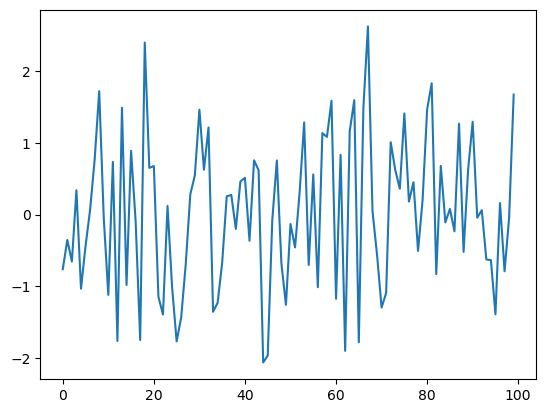

In [13]:
import torch 
import matplotlib.pyplot as plt


device = 'cpu'
data = torch.normal(mean=0, std=1, size=(100,), dtype=torch.float32, device=device)
print(data)
plt.figure()
plt.plot(data)

# 8. <a id='toc8_'></a>[神经网络-训练八股](#toc0_)

|步骤|计算|操作|
|:-|:-|:-|
|1|定义网络模型|->计算出`y_hat`|
|2|选择损失函数|->计算`loss值`、求梯度|
|3|选择优化器|->`更新`网络权重参数|
|4|训练|->实施1、2、3|

## 8.1. <a id='toc8_1_'></a>[现线性回归模型于训练过程-从零开始](#toc0_)

### 8.1.1. <a id='toc8_1_1_'></a>[虚拟出数据](#toc0_)

In [14]:
import torch 
import random


def synthetic_data(w, b, num_examples):  
    """生成y=Xw+b+噪声"""
    X = torch.normal(mean=0, std=1, size=(num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(mean=0, std=0.01, size=y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0])
print('label:', labels[0])

features: tensor([1.6710, 0.3170])
label: tensor([6.4774])


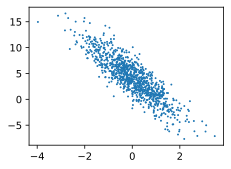

In [18]:
# 绘图，查看分布
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), 
                labels.detach().numpy(), 1);

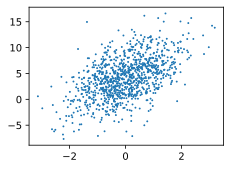

In [19]:
# 绘图，查看分布
d2l.set_figsize()
d2l.plt.scatter(features[:, (0)].detach().numpy(), 
                labels.detach().numpy(), 1);

### 8.1.2. <a id='toc8_1_2_'></a>[读取数据](#toc0_)

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)                                 # 把原来的indices顺序给打乱了
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.7269, -0.1631],
        [ 2.0933, -0.5410],
        [ 0.7562, -0.6686],
        [-0.4302,  0.3302],
        [-0.1591,  1.4465],
        [ 0.7235, -0.8781],
        [ 0.0123,  0.3597],
        [ 1.0409, -2.0936],
        [ 0.6744, -0.2588],
        [-0.2561, -0.4138]]) 
 tensor([[ 6.2141],
        [10.2228],
        [ 7.9691],
        [ 2.2033],
        [-1.0338],
        [ 8.6305],
        [ 2.9873],
        [13.3875],
        [ 6.4233],
        [ 5.0989]])


### 8.1.3. <a id='toc8_1_3_'></a>[初始化模型参数](#toc0_)

In [60]:
w = torch.normal(mean=0, std=0.01, size=(2,1), requires_grad=True)
b = torch.zeros(size=(1,), requires_grad=True)

### 8.1.4. <a id='toc8_1_4_'></a>[定义模型](#toc0_)

In [61]:
def linreg(X, w, b): 
    """线性回归模型"""
    return torch.matmul(X, w) + b

### 8.1.5. <a id='toc8_1_5_'></a>[定义损失函数](#toc0_)

In [62]:
def squared_loss(y_hat, y):  
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 8.1.6. <a id='toc8_1_6_'></a>[定义优化算法](#toc0_)

In [63]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 8.1.7. <a id='toc8_1_7_'></a>[训练](#toc0_)

In [64]:
lr = 0.5
num_epochs = 10
net = linreg
loss = squared_loss


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
        
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 0.000051
epoch 2, loss 0.000056
epoch 3, loss 0.000051
epoch 4, loss 0.000050
epoch 5, loss 0.000048
epoch 6, loss 0.000052
epoch 7, loss 0.000052
epoch 8, loss 0.000049
epoch 9, loss 0.000049
epoch 10, loss 0.000049
w的估计误差: tensor([-0.0010,  0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0013], grad_fn=<RsubBackward1>)


## 8.2. <a id='toc8_2_'></a>[现线性回归模型于训练过程-简洁实现](#toc0_)
### 8.2.1. <a id='toc8_2_1_'></a>[虚拟数据](#toc0_)

In [16]:
import numpy as np
import torch
from torch.utils import data


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

### 8.2.2. <a id='toc8_2_2_'></a>[读取数据](#toc0_)

In [17]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)


batch_size = 10
data_iter = load_array((features, labels), batch_size)

### 8.2.3. <a id='toc8_2_3_'></a>[定义模型](#toc0_)

In [18]:
# nn是神经网络的缩写
from torch import nn


net = nn.Sequential(nn.Linear(2, 1))

### 8.2.4. <a id='toc8_2_4_'></a>[初始化模型参数](#toc0_)

In [19]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 8.2.5. <a id='toc8_2_5_'></a>[定义损失函数](#toc0_)

In [20]:
import torch.nn as nn


loss_fn = nn.MSELoss()

### 8.2.6. <a id='toc8_2_6_'></a>[定义优化算法](#toc0_)

In [21]:
import torch.optim as optim


trainer = optim.SGD(net.parameters(), lr=0.03)

### 8.2.7. <a id='toc8_2_7_'></a>[训练](#toc0_)

In [71]:
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        y_hat = net(X)                  # 1. 计算y_hat
        loss = loss_fn(y_hat ,y)        # 2. 计算loss值
        trainer.zero_grad()
        loss.backward()                 # 2. 求梯度           
        trainer.step()                  # 3. 更新网络权重参数
    train_loss = loss_fn(net(features), labels)
    print(f'epoch {epoch + 1}, loss {train_loss:f}')


w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

epoch 1, loss 0.000298
epoch 2, loss 0.000098
epoch 3, loss 0.000099
epoch 4, loss 0.000098
epoch 5, loss 0.000100
epoch 6, loss 0.000099
epoch 7, loss 0.000099
epoch 8, loss 0.000099
epoch 9, loss 0.000100
epoch 10, loss 0.000098
w的估计误差： tensor([-0.0003,  0.0004])
b的估计误差： tensor([-0.0004])


### 8.2.8. <a id='toc8_2_8_'></a>[参数保存](#toc0_)

In [72]:
torch.save(
    {
        "epoch": num_epochs, 
        'mode_state_dict': net.state_dict(), 
        'opt_state_dict': trainer.state_dict(), 
        'loss': 'loss'
    }, 
    'Pytorch_params/line_params.pt'
)

### 8.2.9. <a id='toc8_2_9_'></a>[重载](#toc0_)

In [74]:
check_point = torch.load('./Pytorch_params/line_params.pt')

new_net = net = nn.Sequential(nn.Linear(2, 1))
new_net.load_state_dict(check_point['mode_state_dict'])

new_opt = optim.SGD(new_net.parameters(), lr=0.03)
new_opt.load_state_dict(check_point['opt_state_dict'])

# Stop BN、Dropout ...
new_net.eval()

# 停止计算梯度，节省运算和内存
with torch.no_grad():
    pre = new_net(torch.Tensor([3.0, 2.1]))
    print(pre)

tensor([3.0603])


/tmp/ipykernel_32820/1977999358.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load('./Pytorch_params/line_params.pt')


## 8.3. <a id='toc8_3_'></a>[分类-softmax](#toc0_)

### 8.3.1. <a id='toc8_3_1_'></a>[快速实现](#toc0_)

In [6]:
import torch 


x = torch.arange(3, dtype=torch.float32)
x_softmax = torch.nn.functional.softmax(x, dim=0)

x, x_softmax, x_softmax.sum()

(tensor([0., 1., 2.]), tensor([0.0900, 0.2447, 0.6652]), tensor(1.))

### 8.3.2. <a id='toc8_3_2_'></a>[从头实现](#toc0_)

In [9]:
import torch 


def softmax(x):
    x_exp = torch.exp(x)
    partition = x_exp.sum()
    return x_exp / partition 


x = torch.arange(3, dtype=torch.float32)
x_sf = softmax(x)

x, x_sf, x_sf.sum()

(tensor([0., 1., 2.]), tensor([0.0900, 0.2447, 0.6652]), tensor(1.))

### 8.3.3. <a id='toc8_3_3_'></a>[交叉熵损失](#toc0_)

In [16]:
# x = torch.arange(3, dtype=torch.float32)
y = torch.tensor([0, 2, 1], dtype=torch.float32)

y_hat = torch.tensor([0.1, 0.3, 0.6])

loss_fn = torch.nn.CrossEntropyLoss()

loss = loss_fn(y_hat, y)

loss


tensor(3.1599)

## 8.4. <a id='toc8_4_'></a>[专题-模型定义（计算预测值y_hat）](#toc0_)
PyTorch的`nn`模块，提供了`nn.Module`类，用于定义神经网络模型。`nn.Module`是所有神经网络模型的基类，提供了构建、初始化、前向传播等功能。有很多`nn.Module`的子类，如`nn.Sequential`、`nn.ModuleList`、`nn.ModuleDict`等，用于构建和组织神经网络模型。`nn`中有很多现成的模块可以直接调用，比如`nn.Linear`、`nn.Conv2d`、`nn.LSTM`等。当然，也可以自定义神经网络模型，如通过继承`nn.Module`类，并重写`__init__`和`forward`方法。

### 8.4.1. <a id='toc8_4_1_'></a>[块：torch.nn模块](#toc0_)
#### 8.4.1.1. <a id='toc8_4_1_1_'></a>[Sequential、ModuleList、ModuleDict](#toc0_)
1. nn.`Sequential`(module1, module2, module3, ...)
    1. .append()
    2. .extend()
    3. .insert()
    4. .pop()
    5. `.add_module()`

2. nn.`ModuleList`([module1, module2, modeul3, ...])
    1. .append()    # 追加
    2. .extend()    # 拼接两个ModuleList
    3. .insert()    # 指定位置插入
    4. `.add_module()`

3. nn.`ModuleDict`({'m1': module1, 'm2': module2, 'm3': module3, ...})
    1. clear()  # 清空ModuleDict
    2. items()  # 返回可迭代key: value
    3. keys()   # 返回keys
    4. values() # 返回values
    5. pop()    # 返回一对key: value，并从字典中删除
    6. `add_module()`

In [13]:
# help(nn.ModuleDict), help(nn.ModuleList), help(nn.Sequential)

In [61]:
from torch import nn


net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(786, 256), 
    nn.ReLU(), 
    nn.Linear(256, 256), 
    nn.Tanh(),
    nn.Linear(256, 10), 
    nn.Softmax()
)

net

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=786, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): Tanh()
  (5): Linear(in_features=256, out_features=10, bias=True)
  (6): Softmax(dim=None)
)

In [63]:
net1 = nn.ModuleList([net, net, net])

net1

ModuleList(
  (0-2): 3 x Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=786, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Tanh()
    (5): Linear(in_features=256, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
)

In [64]:
net2 = nn.ModuleDict(
    {
        'm1': net,
        'm2': net, 
        'm3': net
    }
)

net2

ModuleDict(
  (m1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=786, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Tanh()
    (5): Linear(in_features=256, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
  (m2): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=786, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Tanh()
    (5): Linear(in_features=256, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
  (m3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=786, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Tanh()
    (5): Linear(in_features=256, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
)

In [217]:
from torch import nn 


# Sequential 实现
model1 = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

# ModuleList 实现
class ModelWithModuleList(nn.Module):
    def __init__(self):
        super(ModelWithModuleList, self).__init__()
        self.layers = nn.ModuleList([
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        ])
    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

model2 = ModelWithModuleList()

# ModuleDict 实现
class ModelWithModuleDict(nn.Module):
    def __init__(self):
        super(ModelWithModuleDict, self).__init__()
        self.layers = nn.ModuleDict({
            'fc1': nn.Linear(10, 20),
            'activation': nn.ReLU(),
            'fc2': nn.Linear(20, 1)
        })
    
    def forward(self, x):
        x = self.layers['fc1'](x)
        x = self.layers['activation'](x)
        x = self.layers['fc2'](x)
        return x

model3 = ModelWithModuleDict()

print('model1:', model1, sep='\n')
print('model2:', model2, sep='\n')
print('model3:', model3, sep='\n')

model1:
Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)
model2:
ModelWithModuleList(
  (layers): ModuleList(
    (0): Linear(in_features=10, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=1, bias=True)
  )
)
model3:
ModelWithModuleDict(
  (layers): ModuleDict(
    (fc1): Linear(in_features=10, out_features=20, bias=True)
    (activation): ReLU()
    (fc2): Linear(in_features=20, out_features=1, bias=True)
  )
)


#### 8.4.1.2. <a id='toc8_4_1_2_'></a>[比较](#toc0_)

|特性|Sequential|ModuleList|ModuleDict|
|:---:|:---:|:---:|:---:|
|子模块组织方式|按顺序组织|按列表形式组织|按键值对形式组织|
|前向传播|自动实现，按顺序调用|需要手动实现，灵活|需要手动实现，可按键值灵活调用|
|灵活性|低|中|高|
|适用场景|简单顺序模型|动态模型、循环模型|非顺序复杂模型|
|动态添加子模块|不支持|支持|支持|
|子模块调用方式|固定顺序调用|按索引调用|按键名调用|


### 8.4.2. <a id='toc8_4_2_'></a>[块：自定义](#toc0_)
通过继承`nn.Module`类，并重写`__init__`和`forward`方法，可以自定义神经网络模型。

#### 8.4.2.1. <a id='toc8_4_2_1_'></a>[自定义块](#toc0_)

* 从编程的角度看：块就是Class

* `nn.Module`会自动调用`forward()`方法，我们也可以重写该方法，从而实现更加灵活的计算

In [65]:
import torch.nn.functional as F 
from torch import nn


class Net(nn.Module):
    def __init__(self):
        '''定义每个块或层'''
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.out = nn.Linear(256, 10)

    def forward(self, X):
        '''正向传播'''
        return self.out(F.relu(self.hidden(X)))

net = Net()

#### 8.4.2.2. <a id='toc8_4_2_2_'></a>[顺序块](#toc0_)
```
Sequential就是顺序块，这里我们自己从头实现一边Sequential这个方法
```

In [66]:
from torch import nn


class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args):
            self._modules[str(idx)] = module

    def forward(self, X):
        for block in self._modules.values():
            X = block(X)
        return X


net = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))

#### 8.4.2.3. <a id='toc8_4_2_3_'></a>[效率](#toc0_)

1. 一个块可以由许多层组成；一个块可以由许多块组成。
2. 块可以包含代码。
3. 块负责大量的内部处理，包括参数初始化和反向传播。
4. 层和块的顺序连接由Sequential块处理。

读者可能会开始担心操作效率的问题。 毕竟，我们在一个高性能的深度学习库中进行了大量的字典查找、 代码执行和许多其他的Python代码。 Python的问题全局解释器锁 是众所周知的。 在深度学习环境中，我们担心速度极快的GPU可能要等到CPU运行Python代码后才能运行另一个作业。

### 8.4.3. <a id='toc8_4_3_'></a>[模型结构/组成](#toc0_)

In [218]:
from torch import nn 


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        self.block = nn.Sequential(nn.Linear(3, 128))
        self.decode = nn.Linear(128, 2)

    def forward(self, X):
        y = self.linear(X)
        y = self.bloack(y)
        y = self.decode(y)
        return y


# Init the Net()
net = Net()

#### 8.4.3.1. <a id='toc8_4_3_1_'></a>[.children()](#toc0_)
列出`第一级别`的module权重。

In [32]:
# net
list(net.children())

[Linear(in_features=2, out_features=3, bias=True),
 Sequential(
   (0): Linear(in_features=3, out_features=128, bias=True)
 ),
 Linear(in_features=128, out_features=2, bias=True)]

#### 8.4.3.2. <a id='toc8_4_3_2_'></a>[.named_children()](#toc0_)
列出`第一级别`的module权重名称和权重。

In [33]:
for name, children in net.named_children():
    print(name, '\t', children)

linear 	 Linear(in_features=2, out_features=3, bias=True)
block 	 Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
)
decode 	 Linear(in_features=128, out_features=2, bias=True)


#### 8.4.3.3. <a id='toc8_4_3_3_'></a>[.modules()](#toc0_)
依次列出`所有`的module权重。

In [9]:
for module in net.modules():
    print( module)
    print('='*10)

Net(
  (linear): Linear(in_features=2, out_features=3, bias=True)
  (block): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
  )
  (decode): Linear(in_features=128, out_features=2, bias=True)
)
Linear(in_features=2, out_features=3, bias=True)
Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
)
Linear(in_features=3, out_features=128, bias=True)
Linear(in_features=128, out_features=2, bias=True)


#### 8.4.3.4. <a id='toc8_4_3_4_'></a>[.named_modules()](#toc0_)
依次列出`所有`的module权重名和权重。

In [34]:
for name, module in net.named_modules():
    print(name, '>>>', module)
    print('='*10)

 >>> Net(
  (linear): Linear(in_features=2, out_features=3, bias=True)
  (block): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
  )
  (decode): Linear(in_features=128, out_features=2, bias=True)
)
linear >>> Linear(in_features=2, out_features=3, bias=True)
block >>> Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
)
block.0 >>> Linear(in_features=3, out_features=128, bias=True)
decode >>> Linear(in_features=128, out_features=2, bias=True)


#### 8.4.3.5. <a id='toc8_4_3_5_'></a>[删除和添加](#toc0_)
先利用 net`.children()`迭代话模型第一层级，再`列表化 (list())` 并进行`索引提取`，最终实现删除或添加的操作。

In [35]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        self.block = nn.Sequential(nn.Linear(3, 128))
        self.decode = nn.Linear(128, 2)

    def forward(self, X):
        y = self.linear(X)
        y = self.bloack(y)
        y = self.decode(y)
        return y

class NetDel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.net = Net()                                              ## 会报错
        self.netdel_list = list(Net().children())[0:-1]                 # 删除最后一个结构
        self.netdel_list += [nn.Linear(128, 256), nn.Linear(256, 2)]    # 添加两个新的结构
        self.netdel = nn.Sequential(*self.netdel_list)

    def forward(self, X):
        return self.netdel(X)

netdel = NetDel()
# netdel
list(netdel.children())

[Sequential(
   (0): Linear(in_features=2, out_features=3, bias=True)
   (1): Sequential(
     (0): Linear(in_features=3, out_features=128, bias=True)
   )
   (2): Linear(in_features=128, out_features=256, bias=True)
   (3): Linear(in_features=256, out_features=2, bias=True)
 )]

#### 8.4.3.6. <a id='toc8_4_3_6_'></a>[替换](#toc0_)
直接访`问模型的具体层级`，`替换`即可。

* 当通过 `Sequential类` 定义模型时，我们可以通过 `索引 (下标)` 来访问模型的任意层；

* `自定义的重载nn.Module` 的layer1、layer2等等，需要net`.`layer1或net`.`layer2方式进行调用；

In [88]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        self.block = nn.Sequential(nn.Linear(3, 128))
        self.decode = nn.Linear(128, 2)

    def forward(self, X):
        y = self.linear(X)
        y = self.bloack(y)
        y = self.decode(y)
        return y

class NetMod(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = Net()
        in_features = self.model.decode.in_features
        self.model.decode = nn.Linear(in_features=in_features, out_features=10)

    def forward(self, X):
        return self.model(X)


netmod = NetMod()
netmod

NetMod(
  (model): Net(
    (linear): Linear(in_features=2, out_features=3, bias=True)
    (block): Sequential(
      (0): Linear(in_features=3, out_features=128, bias=True)
    )
    (decode): Linear(in_features=128, out_features=10, bias=True)
  )
)

#### 8.4.3.7. <a id='toc8_4_3_7_'></a>[add_module()](#toc0_)
`add_module()` 方法用于将子模块添加到当前模块中，并为其指定一个名称。

In [43]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        self.block = nn.Sequential(nn.Linear(3, 128))
        self.decode = nn.Linear(128, 2)

    def forward(self, X):
        y = self.linear(X)
        y = self.bloack(y)
        y = self.decode(y)
        return y


net = Net()
net.add_module(name='add_demo', module=nn.Linear(2, 256))
net.add_module(name='final_demo', module=nn.Sequential(nn.Linear(256, 128), nn.Linear(128, 2)))
net

Net(
  (linear): Linear(in_features=2, out_features=3, bias=True)
  (block): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
  )
  (decode): Linear(in_features=128, out_features=2, bias=True)
  (add_demo): Linear(in_features=2, out_features=256, bias=True)
  (final_demo): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=2, bias=True)
  )
)

### 8.4.4. <a id='toc8_4_4_'></a>[模型：参数管理](#toc0_)

* 其实可以将`nn.Sequential`视为Python的`list数据结构`，`按顺序`储存神经网络层

In [95]:
import torch
from torch import nn


net = nn.Sequential(
    nn.Linear(4, 8), 
    nn.ReLU(), 
    nn.Linear(8, 1)
)

X = torch.rand(size=(2, 4))

net(X)

tensor([[-0.0865],
        [-0.0746]], grad_fn=<AddmmBackward0>)

#### 8.4.4.1. <a id='toc8_4_4_1_'></a>[参数访问](#toc0_)

* 我们从已有模型中访问参数；

* 当通过 `Sequential类` 定义模型时，我们可以通过 `索引 (下标)` 来访问模型的任意层；

* `自定义的重载nn.Module` 的layer1、layer2等等，需要net`.`layer1或net`.`layer2方式进行调用；

* 这就像模型是一个列表一样，每层的参数都在其属性中。

##### 8.4.4.1.1. <a id='toc8_4_4_1_1_'></a>[state_dict](#toc0_)

In [96]:
net # nn.Sequential类，可以直接用下标进行索引

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [97]:
net[0], net[1], net[2] # nn.Sequential类，可以直接用下标进行索引

(Linear(in_features=4, out_features=8, bias=True),
 ReLU(),
 Linear(in_features=8, out_features=1, bias=True))

In [98]:
net[0].state_dict()

OrderedDict([('weight',
              tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
                      [-0.1280, -0.2531, -0.0131, -0.2696],
                      [ 0.0538,  0.1759, -0.1103, -0.3805],
                      [-0.2477, -0.0914,  0.1431,  0.2419],
                      [ 0.1345, -0.0516, -0.0536, -0.4364],
                      [ 0.1144, -0.3585, -0.2615,  0.1957],
                      [ 0.2924,  0.0015,  0.4087,  0.3759],
                      [ 0.4440, -0.2937, -0.0911, -0.4929]])),
             ('bias',
              tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880]))])

In [99]:
net[0].weight

Parameter containing:
tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]], requires_grad=True)

In [100]:
net[0].weight.data # 访问目标参数

tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]])

In [101]:
net[0].bias

Parameter containing:
tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880],
       requires_grad=True)

In [102]:
net[0].bias.data # 访问目标参数

tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880])

In [103]:
# 也可以直接输出神经网络的所有层参数信息，net[1]是relu激活函数，没有参数，所以就显示无
# 后续，torch.save(net.state_dict(), 'Pytorch_datasets/net_params)

net.state_dict() 

OrderedDict([('0.weight',
              tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
                      [-0.1280, -0.2531, -0.0131, -0.2696],
                      [ 0.0538,  0.1759, -0.1103, -0.3805],
                      [-0.2477, -0.0914,  0.1431,  0.2419],
                      [ 0.1345, -0.0516, -0.0536, -0.4364],
                      [ 0.1144, -0.3585, -0.2615,  0.1957],
                      [ 0.2924,  0.0015,  0.4087,  0.3759],
                      [ 0.4440, -0.2937, -0.0911, -0.4929]])),
             ('0.bias',
              tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880])),
             ('2.weight',
              tensor([[-0.0894, -0.1603, -0.1185,  0.0858, -0.0592, -0.1632,  0.1876, -0.0784]])),
             ('2.bias', tensor([-0.1285]))])

##### 8.4.4.1.2. <a id='toc8_4_4_1_2_'></a>[parameters](#toc0_)

In [104]:
net.parameters(), net.parameters

(<generator object Module.parameters at 0x7f0dc565da80>,
 <bound method Module.parameters of Sequential(
   (0): Linear(in_features=4, out_features=8, bias=True)
   (1): ReLU()
   (2): Linear(in_features=8, out_features=1, bias=True)
 )>)

In [105]:
for param in net.parameters():
    print(type(param))
    print(param)
    print(param.requires_grad)
    print(param.grad)
    print(param.is_leaf)
    # break

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]], requires_grad=True)
True
None
True
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880],
       requires_grad=True)
True
None
True
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[-0.0894, -0.1603, -0.1185,  0.0858, -0.0592, -0.1632,  0.1876, -0.0784]],
       requires_grad=True)
True
None
True
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.1285], requires_grad=True)
True
None
True


In [106]:
for param  in net[0].parameters():
    print(param)
    print(param.requires_grad)
    print(param.grad)
    print(param.is_leaf)
    # break

Parameter containing:
tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]], requires_grad=True)
True
None
True
Parameter containing:
tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880],
       requires_grad=True)
True
None
True


##### 8.4.4.1.3. <a id='toc8_4_4_1_3_'></a>[named_parameters](#toc0_)

In [114]:
# list(net.named_parameters())
for name, param in net.named_parameters():
    print(name, '\t', param)

0.weight 	 Parameter containing:
tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]], requires_grad=True)
0.bias 	 Parameter containing:
tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880],
       requires_grad=True)
2.weight 	 Parameter containing:
tensor([[-0.0894, -0.1603, -0.1185,  0.0858, -0.0592, -0.1632,  0.1876, -0.0784]],
       requires_grad=True)
2.bias 	 Parameter containing:
tensor([-0.1285], requires_grad=True)


#### 8.4.4.2. <a id='toc8_4_4_2_'></a>[参数初始化](#toc0_)

* 初始化，主要是为了不要再一开始训练就炸掉了，其实不用太迷信了。

* 默认情况下，PyTorch会根据一个范围均匀地初始化权重和偏置矩阵， 这个范围是根据输入和输出维度计算出的。 

* PyTorch的nn.init模块提供了多种预置初始化方法。

##### 8.4.4.2.1. <a id='toc8_4_4_2_1_'></a>[内置初始化](#toc0_)

In [50]:
m = net[0]
nn.init.normal_(m.weight, mean=0, std=0.01)
nn.init.zeros_(m.bias)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

##### 8.4.4.2.2. <a id='toc8_4_4_2_2_'></a>[自定义初始化](#toc0_)

##### 8.4.4.2.3. <a id='toc8_4_4_2_3_'></a>[参数绑定](#toc0_)
```
有时我们希望在多个层间共享参数： 我们可以定义一个稠密层，然后使用它的参数来设置另一个层的参数。
```

In [ ]:
from torch import nn


# 我们需要给共享层一个名称，以便可以引用它的参数
shared = nn.Linear(8, 8)

net = nn.Sequential(
    nn.Linear(4, 8), 
    nn.ReLU(),
    shared, 
    nn.ReLU(),
    shared, 
    nn.ReLU(),
    nn.Linear(8, 1)
)

net(X)

# 检查参数是否相同
print(net[2].weight.data[0] == net[4].weight.data[0])

net[2].weight.data[0, 0] = 100

# 确保它们实际上是同一个对象，而不只是有相同的值
print(net[2].weight.data[0] == net[4].weight.data[0])

### 8.4.5. <a id='toc8_4_5_'></a>[层：自定义](#toc0_)
深度学习成功背后的一个因素是神经网络的灵活性：我们可以用创造性的方式组合不同的层，从而设计出适用于各种任务的架构。例如，研究人员发明了专门用于处理图像、文本、序列数据和执行动态规划的层。
有时我们会遇到或要自己发明一个现在在深度学习框架中还不存在的层。在这些情况下，必须构建自定义层。本节将展示如何构建自定义层。

```python
块和层其实并无本质的区别，因为都是torch.nn.Module的子类
e.g. 
    全连接层（FC）
    池化层（Pooling）
    BN层
    Dropout层
    ...
```

#### 8.4.5.1. <a id='toc8_4_5_1_'></a>[不带参数的层](#toc0_)

In [53]:
import torch
import torch.nn.functional as F
from torch import nn


class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()
    
layer = CenteredLayer()
layer(torch.FloatTensor([1, 2, 3]))

tensor([-1.,  0.,  1.])

In [54]:
# 现在，我们可以将层作为组件合并到更复杂的模型中。
net = nn.Sequential(
    nn.Linear(8, 128), 
    CenteredLayer()
)

Y = net(torch.rand(4, 8))
Y.mean()

tensor(-9.3132e-09, grad_fn=<MeanBackward0>)

#### 8.4.5.2. <a id='toc8_4_5_2_'></a>[带参数的层](#toc0_)

用到`nn.Parameter()`可以将参数加入神经网络中，便于自动管理

In [55]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units)) 
        self.bias = nn.Parameter(torch.randn(units,))
        
    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return F.relu(linear)
    
linear = MyLinear(5, 3)
# linear.weight

linear(torch.rand(2, 5))

tensor([[0.0000, 0.0000, 0.0000],
        [0.1466, 0.0000, 0.0000]])

In [ ]:
# 我们还可以使用自定义层构建模型，就像使用内置的全连接层一样使用自定义层。
net = nn.Sequential(
    MyLinear(64, 8), 
    MyLinear(8, 1)
)

net(torch.rand(2, 64))

## 8.5. <a id='toc8_5_'></a>[专题-损失函数 (loss_fn)](#toc0_)
损失函数的输入是 loss_fn(y_hat, y) ，即网络输出和真实标签对的数据，然后返回一个数值表示网络输出和真实标签的差距。

  1. 均方误差

  2. 交叉熵
  
  3. 自定义

### 8.5.1. <a id='toc8_5_1_'></a>[均方误差](#toc0_)
回归。

In [56]:
import torch


loss_fn = torch.nn.MSELoss()

### 8.5.2. <a id='toc8_5_2_'></a>[交叉熵](#toc0_)
分类。

#### 8.5.2.1. <a id='toc8_5_2_1_'></a>[快速实现](#toc0_)

In [25]:
import torch


loss_fn = torch.nn.CrossEntropyLoss()

# 3个样本，3个类别的索引
y = torch.tensor([0, 2, 1])

# 3个样本，3个类别，每个样本的概率
y_hat = torch.tensor([[0.1, 0.3, 0.6], 
                      [0.3, 0.2, 0.5], 
                      [0.0, 0.1, 0.9]])

y, y_hat, loss_fn(y_hat, y)

(tensor([0, 2, 1]),
 tensor([[0.1000, 0.3000, 0.6000],
         [0.3000, 0.2000, 0.5000],
         [0.0000, 0.1000, 0.9000]]),
 tensor(1.2372))

#### 8.5.2.2. <a id='toc8_5_2_2_'></a>[从头实现](#toc0_)

In [37]:
import torch 


def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])


# 3个样本，3个类别的索引
y = torch.tensor([0, 2, 1])

# 3个样本，3个类别，每个样本的概率
y_hat = torch.tensor([[0.1, 0.3, 0.6], 
                      [0.3, 0.2, 0.5], 
                      [0.0, 0.1, 0.9]])

y, y_hat, cross_entropy(y_hat, y)

(tensor([0, 2, 1]),
 tensor([[0.1000, 0.3000, 0.6000],
         [0.3000, 0.2000, 0.5000],
         [0.0000, 0.1000, 0.9000]]),
 tensor([2.3026, 0.6931, 2.3026]))

### 8.5.3. <a id='toc8_5_3_'></a>[自定义](#toc0_)
自己定义赏罚分。

In [58]:
def loss_fn(y, y_hat):
    '''例如真实值于预测值之差'''
    error_values = y - y_hat
    return error_values

## 8.6. <a id='toc8_6_'></a>[专题-反向传播（求梯度）](#toc0_)
```
求梯度（求偏导数）
```

In [ ]:
# 见autograd

## 8.7. <a id='toc8_7_'></a>[专题-更新权重（优化算法）](#toc0_)
- 优化算法，在深度学习中是非常重要的一环。在对损失函数进行优化的时候，比较关注损失函数的凹凸性的问题。  
- 可惜的是，在现有损失函数中，只有线性函数网络结构和softmax结构是凸函数，其它例如MLP、CNN、RNN、注意力等都是非凸函数。  
- 并且，在优化过程中通常只是得到了局部最小值，而不是全局最小值；
- 小批量随机梯度下降算法是最常用的优化算法；
- 冲量对梯度做平滑；
- Adam对梯度做平滑，且对梯度各纬度值重新做调整。

- 原函数图像

Text(0.5, 1.0, 'Function')

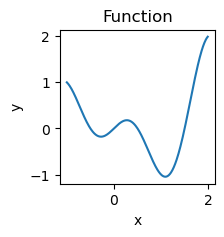

In [219]:
import torch 
import matplotlib.pyplot as plt 


x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = x * torch.cos(torch.pi * x)


plt.figure(figsize=(2,2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

- 导函数图像

Text(0.5, 1.0, 'grad')

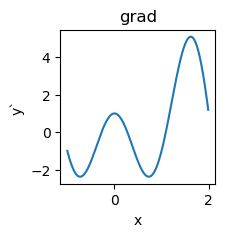

In [220]:
def y(x):
    y_hat = x * torch.cos(torch.pi * x)
    x_grad = torch.autograd.grad(outputs=y_hat, inputs=x)
    return x_grad[0].detach().cpu().numpy()


x_grads = [y(i) for i in x]

plt.figure(figsize=(2,2))
plt.plot(x.detach().cpu().numpy(), x_grads)
plt.xlabel('x')
plt.ylabel('y`')
plt.title('grad')

- 梯度下降

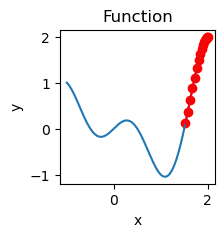

In [221]:
import torch
import matplotlib.pyplot as plt


def f(x):
    return x * torch.cos(torch.pi * x)

def gd(x, y=f, eta=0.01, iter:int=5):
    x_list = [x]    # 先存第一个数
    i = 1
    for _ in range(iter):
        x_tensor = torch.tensor(x, dtype=torch.float32, requires_grad=True)
        x_grad = torch.autograd.grad(outputs= f(x_tensor), inputs=x_tensor)
        x -= (eta * x_grad[0].item())
        x_list.append(x)
        i += 1
    return x_list

# 从x开始，迭代iter次
def demo(x, y, eta, iter, c):
    xx = gd(x=x, y=f, eta=eta, iter=iter )
    yy = f(torch.tensor(xx))
    return xx, yy.detach().cpu().numpy(), c


x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = f(x)

plt.figure(figsize=(2, 2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

x, y, c = demo(x=2, y=f, eta=0.01, iter=15, c='red')    # lr很小就接近收敛
plt.scatter(x=x, y=y, c=c)
plt.plot(x, y, c=c)

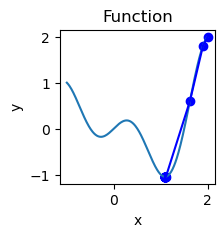

In [222]:
x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = f(x)

plt.figure(figsize=(2, 2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

x, y, c = demo(x=2, y=f, eta=0.1, iter=30, c='blue')    # lr很大就很快收敛
plt.scatter(x=x, y=y, c=c)
plt.plot(x, y, c=c)

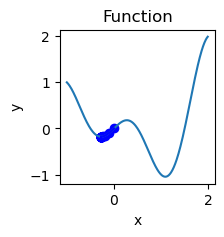

In [223]:
x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = f(x)

plt.figure(figsize=(2, 2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

x, y, c = demo(x=0, y=f, eta=0.1, iter=30, c='blue')    # 陷入0左侧附近的局部最小值点
plt.scatter(x=x, y=y, c=c)
plt.plot(x, y, c=c)

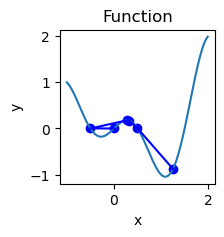

In [224]:
x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = f(x)

plt.figure(figsize=(2, 2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

x, y, c = demo(x=0, y=f, eta=0.5, iter=5, c='blue')   # lr太大就乱跳
plt.scatter(x=x, y=y, c=c)
plt.plot(x, y, c=c)

### 8.7.1. <a id='toc8_7_1_'></a>[小批量随机梯度下降（SGD）](#toc0_)
- 随机梯度下降法，利用单个样本进行估算所有样本的梯度，然后进行后续的优化。这是计算效率很低的方式，所有改成小批量的随机梯度下降，可以提高计算效率。  
- `小批量随机梯度下降法`是最常用的优化算法；
- batch_size是所有样本，就是`梯度下降`。
- `动量 (momentum)` 可以起到缓冲的作用，使得优化方向不会不停跳动，而是考虑之前几步的方向，具体考虑前多少步依赖于值的大小，一般取值为：0.5, 0.90, 0.99 等。

In [225]:
import torch


torch.optim.SGD(
    params=net.parameters(), 
    lr=0.01, 
    momentum=0.99, 
    # weight_decay=
)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.99
    nesterov: False
    weight_decay: 0
)

### 8.7.2. <a id='toc8_7_2_'></a>[adam](#toc0_)
- Adam其实就是非常平滑的SGD，只是其对lr不敏感；  
- Adam未必比SGD效果更好。

In [59]:
import torch


torch.optim.Adam(
    params=net.parameters(), 
    lr=0.01
)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

### 8.7.3. <a id='toc8_7_3_'></a>[RMSprop](#toc0_)

In [60]:
import torch


torch.optim.RMSprop(
    params=net.parameters(), 
    lr=0.01
)

RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)

### 8.7.4. <a id='toc8_7_4_'></a>[学习率调度器](#toc0_)

#### 8.7.4.1. <a id='toc8_7_4_1_'></a>[StepLR： 按照固定的步长调整学习率](#toc0_)

In [92]:
import torch
from torch.optim.lr_scheduler import StepLR


optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

for epoch in range(100):
    train(...)
    validate(...)
    scheduler.step()

#### 8.7.4.2. <a id='toc8_7_4_2_'></a>[MultiStepLR： 在指定的里程碑（milestones）上调整学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR


scheduler = MultiStepLR(optimizer, milestones=[30, 80], gamma=0.1)

#### 8.7.4.3. <a id='toc8_7_4_3_'></a>[ExponentialLR： 以指数衰减的方式调整学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import ExponentialLR


scheduler = ExponentialLR(optimizer, gamma=0.9)

#### 8.7.4.4. <a id='toc8_7_4_4_'></a>[CosineAnnealingLR： 余弦退火调整学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR


scheduler = CosineAnnealingLR(optimizer, T_max=50)

#### 8.7.4.5. <a id='toc8_7_4_5_'></a>[ReduceLROnPlateau： 当指标停止改善时，降低学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau


scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

for epoch in range(100):
    train(...)
    val_loss = validate(...)
    scheduler.step(val_loss)

#### 8.7.4.6. <a id='toc8_7_4_6_'></a>[LambdaLR： 使用自定义的函数来调整学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import LambdaLR


lambda1 = lambda epoch: 0.65 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda1)

#### 8.7.4.7. <a id='toc8_7_4_7_'></a>[自定义](#toc0_)

In [2]:
import torch


# torch.optim.lr_scheduler._LRScheduler

In [ ]:
help(torch.optim.lr_scheduler._LRScheduler)

## 8.8. <a id='toc8_8_'></a>[专题-训练](#toc0_)

![Train step via pure PyTorch](./Pytorch_Pictures/PyTorch_graphacial_demo/Train_step_via_pure_PyTorch.jpg)

```python
训练的模板代码
```
```python
net.train():
    启用 Batch Normalization 和 Dropout。
    如果模型中有BN层(Batch Normalization）和Dropout，需要在训练时添加model.train()
    model.train()作用： 
                        对BN层，保证BN层能够用到每一批数据的均值和方差，并进行计算更新；
                        对于Dropout，model.train()是随机取一部分网络连接来训练更新参数。

net.eval()
    不启用 Batch Normalization 和 Dropout。
    如果模型中有BN层(Batch Normalization）和Dropout，在测试时添加model.eval()。
    model.eval()是保证BN层直接利用之前训练阶段得到的均值和方差，即测试过程中要保证BN层的均值和方差不变；
                        对于Dropout，model.eval()是利用到了所有网络连接，即不进行随机舍弃神经元。
                        
with torch.no_grad():
    pass

    无论是train() 还是eval() 模式，各层的gradient计算和存储都在进行且完全一致，在forward的时候会保存中间结果和创建计算图以为后续的
    反向传播做准备。而with torch.no_grad()则主要是用于停止autograd模块的工作，在内存中不储存的forward计算结果和不构建计算图，以起到加速和节省显存的作用。它的作用是将该with语句包裹起来的部分停止梯度的更新，从而节省了GPU算力和显存，但是并不会影响dropout和BN层的行为。
    若想节约算力，可在test阶段带上torch.no_grad()，示例代码：
```

In [75]:
# 数据准备
import torch 
from torch import nn  
# import torch.nn.functional as F 
from torch.utils import data

import torchvision


dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(
    dataset=train_dataset, 
    batch_size=128, 
    shuffle=True
)

# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3659860.80it/s]


Extracting ./Pytorch_datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./Pytorch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 119645.04it/s]


Extracting ./Pytorch_datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./Pytorch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 912416.46it/s] 


Extracting ./Pytorch_datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Pytorch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 17224709.56it/s]

Extracting ./Pytorch_datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Pytorch_datasets/MNIST/raw



In [79]:
# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256), 
            nn.ReLU(),
            nn.Linear(256, 10), 
            nn.Softmax()
        )
        
    def forward(self, X):
        return self.network(X)

In [80]:
# 训练过程封装
import time
import matplotlib.pyplot as plt 
import IPython.display as display
import os


def train_steps(
        epochs, 
        train_dataset, 
        train_iter, 
        test_dataset, 
        net, 
        loss_fn, 
        opt, 
        device, 
        train_figure = False, 
        resume = False, 
        PATH = 'Pytorch_params/weights'
    ):
    '''
    参数记录:
            epochs = epochs                         # epoch
            train_dataset = train_dataset           # 全部train数据集
            train_iter = train_iter                 # batch之后的train数据集
            test_dataset = test_dataset             # 全部test数据集
            net = net                               # 网络模型
            loss_fn = loss_fn                       # 损失函数
            opt = opt                               # 优化器
            device = device                         # device GPU/CPU
            train_figure = False                    # 可视化训练过程
            resume = False                          # 断点续训
    '''
    # 拷贝数据和模型到device上
    print('='*100)
    print(f"Runing on {device}")
    print('='*100)
    ## 数据
    train_all_data_gpu = train_dataset.data.to(device)                                      # .to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)                                # .to(device)
    test_all_data_gpu = test_dataset.data.to(device)                                        # .to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)                                  # .to(device)
    ## 模型
    net.to(device)                                                                          # .to(device)

    def dl_plot(epochs:int, epoch_list:list, train_loss_list:list, train_acc_list:list, test_acc_list:list):
        '''绘图'''
        plt.rcParams['font.sans-serif']=['Times new roman', 'Arial', 'KaiTi']
        plt.style.context(['ggplot', 'seaborn'])
        
        plt.close()
        fig = plt.figure(figsize=(3.0, 3.0))

        # for y, label in zip([train_loss_list, train_acc_list, test_acc_list], ['train_loss', 'train_acc', 'test_acc']):
        for y, label in zip([train_acc_list, test_acc_list], ['train_acc', 'test_acc']):
            plt.plot(epoch_list, y, label=label)
        plt.grid()
        plt.legend()
        plt.xlabel('Epoch')
        plt.xlim((1, epochs))
        plt.ylabel('Values')
        plt.ylim((0, 1))
        plt.yticks(torch.arange(0, 1, 0.05).numpy())
        # plt.tight_layout()

        display.display(fig)
        display.clear_output(wait=True)

    # 开始迭代
    start = time.time()
    epoch_list = []
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    best_test_acc = 0

    # 断点续训
    start_epoch = 0
    if resume:
        if os.path.isfile(PATH+'/last.pt'):
            check_point = torch.load(PATH+'/last.pt')
            start_epoch = check_point['epoch']
            net.load_state_dict(check_point['model_state_dict'])
            opt.load_state_dict(check_point['opt_state_dict'])
        else:
            print(f'没有训练记录。')
        
    print('start_epoch: ', start_epoch)
    for epoch in range(start_epoch, epochs, 1):
        net.train()                             # 训练模式
        epoch_list.append(epoch+1)
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   ## 复制到device（GPU/CPU）上                    # .to(device)
            # print(X[0])
            # print(X[0].dtype)
            # break
            y_hat = net(X)                      # 计算y_hat
            loss = loss_fn(y_hat, y)            # 计算loss
            opt.zero_grad()                     # 默认是累加，此处从新求导
            loss.backward()                     # 计算梯度
            opt.step()                          # 更新网络参数

        net.eval()                              # 切换至评估模式
                                                # 模型默认是net.train()
                                                # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                                                # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad():                   # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            train_loss_list.append(train_loss.item())
            # print(train_loss)

            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) 
            train_acc_list.append(train_acc.item())
            # print(train_acc)

            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp))
            test_acc_list.append(test_acc.item())
            # print(test_acc)

            if train_figure:
                if epoch % 1 == 0:
                    dl_plot(epochs, epoch_list, train_loss_list, train_acc_list, test_acc_list)
            else:
                print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

        # 保存权重参数：last.pt和best.pt
        torch.save({'epoch':epoch, 'model_state_dict':net.state_dict(), 'opt_state_dict':opt.state_dict(), 'loss':test_acc}, PATH+'/last.pt') 
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save({'epoch':epoch, 'model_state_dict':net.state_dict(), 'opt_state_dict':opt.state_dict(), 'loss':test_acc}, PATH+'/best.pt') 

    stop = time.time()
    print('='*100)
    print(f"耗时： {stop - start} seconds.")
    return (train_loss, train_acc, test_acc)
    # return (epoch_list, train_loss_list, train_acc_list, test_acc_list)

In [ ]:
# 训练过程封装
import time
import matplotlib.pyplot as plt 
import IPython.display as display
import os

def training_step(
        epochs, 
        train_dataset, 
        train_iter, 
        test_dataset, 
        net, 
        loss_fn, 
        opt, 
        device, 
        train_figure = False, 
        resume = False, 
        PATH = 'Pytorch_params/weights'):
    '''
    训练过程
    params:
            epochs = epochs                         # epoch
            train_dataset = train_dataset           # 全部train数据集
            train_iter = train_iter                 # batch之后的train数据集
            test_dataset = test_dataset             # 全部test数据集
            net = net                               # 网络模型
            loss_fn = loss_fn                       # 损失函数
            opt = opt                               # 优化器
            device = device                         # device GPU/CPU
            train_figure = False                    # 可视化训练过程
            resume = False                          # 断点续训
    return:
            tra_loss, val_loss, val_acc, test_loss, test_acc
    '''
    # 拷贝数据和模型到device上
    print('='*100)
    print(f"Runing on {device}")
    print('='*100)
    ## 数据
    train_all_data_gpu = train_dataset.data.to(device)                                      # .to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)                                # .to(device)
    test_all_data_gpu = test_dataset.data.to(device)                                        # .to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)                                  # .to(device)
    ## 模型
    net.to(device)                                                                          # .to(device)

    def dl_plot(epochs:int, epoch_list:list, train_loss_list:list, train_acc_list:list, test_acc_list:list):
        '''绘图'''
        plt.rcParams['font.sans-serif']=['Times new roman', 'Arial', 'KaiTi']
        plt.style.context(['ggplot', 'seaborn'])
        
        plt.close()
        fig = plt.figure(figsize=(3.0, 3.0))

        # for y, label in zip([train_loss_list, train_acc_list, test_acc_list], ['train_loss', 'train_acc', 'test_acc']):
        for y, label in zip([train_acc_list, test_acc_list], ['train_acc', 'test_acc']):
            plt.plot(epoch_list, y, label=label)
        plt.grid()
        plt.legend()
        plt.xlabel('Epoch')
        plt.xlim((1, epochs))
        plt.ylabel('Values')
        plt.ylim((0, 1))
        plt.yticks(torch.arange(0, 1, 0.05).numpy())
        # plt.tight_layout()

        display.display(fig)
        display.clear_output(wait=True)

    # 开始迭代
    start = time.time()
    epoch_list = []
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    best_test_acc = 0

    # 断点续训
    start_epoch = 0
    if resume:
        if os.path.isfile(PATH+'/last.pt'):
            check_point = torch.load(PATH+'/last.pt')
            start_epoch = check_point['epoch']
            net.load_state_dict(check_point['model_state_dict'])
            opt.load_state_dict(check_point['opt_state_dict'])
        else:
            print(f'没有训练记录。')
        
    print('start_epoch: ', start_epoch)
    for epoch in range(start_epoch, epochs, 1):
        net.train()                             # 训练模式
        epoch_list.append(epoch+1)
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   ## 复制到device（GPU/CPU）上                    # .to(device)
            # print(X[0])
            # print(X[0].dtype)
            # break
            y_hat = net(X)                      # 计算y_hat
            loss = loss_fn(y_hat, y)            # 计算loss
            opt.zero_grad()                     # 默认是累加，此处从新求导
            loss.backward()                     # 计算梯度
            opt.step()                          # 更新网络参数

        net.eval()                              # 切换至评估模式
                                                # 模型默认是net.train()
                                                # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                                                # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad():                   # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            train_loss_list.append(train_loss.item())
            # print(train_loss)

            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) 
            train_acc_list.append(train_acc.item())
            # print(train_acc)

            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp))
            test_acc_list.append(test_acc.item())
            # print(test_acc)

            if train_figure:
                if epoch % 1 == 0:
                    dl_plot(epochs, epoch_list, train_loss_list, train_acc_list, test_acc_list)
            else:
                print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

        # 保存权重参数：last.pt和best.pt
        torch.save({'epoch':epoch, 'model_state_dict':net.state_dict(), 'opt_state_dict':opt.state_dict(), 'loss':test_acc}, PATH+'/last.pt') 
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save({'epoch':epoch, 'model_state_dict':net.state_dict(), 'opt_state_dict':opt.state_dict(), 'loss':test_acc}, PATH+'/best.pt') 

    stop = time.time()
    print('='*100)
    print(f"耗时： {stop - start} seconds.")
    return (train_loss, train_acc, test_acc)
    # return (epoch_list, train_loss_list, train_acc_list, test_acc_list)

### 8.8.1. <a id='toc8_8_1_'></a>[开始训练](#toc0_)

耗时： 59.95664095878601 seconds.


(tensor(1.7594, device='cuda:0'),
 tensor(0.7902, device='cuda:0'),
 tensor(0.8000, device='cuda:0'))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found

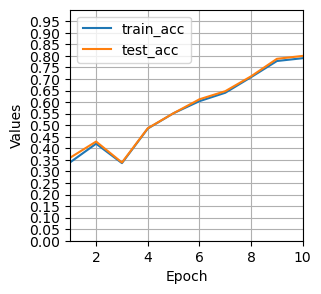

In [82]:
# 开始训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.01)

train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device, 
    train_figure=True, 
    resume = False, 
    PATH = './Pytorch_params/weights'
) 

In [83]:
best = torch.load('./Pytorch_params/weights/best.pt')
best['epoch'], best['loss'], best['model_state_dict']

/tmp/ipykernel_32820/198423743.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best = torch.load('./Pytorch_params/weights/best.pt')


(9,
 tensor(0.8000, device='cuda:0'),
 OrderedDict([('network.1.weight',
               tensor([[-0.0241, -0.0069,  0.0088,  ..., -0.0267, -0.0129, -0.0065],
                       [ 0.0302, -0.0323,  0.0237,  ..., -0.0168,  0.0240,  0.0341],
                       [-0.0151,  0.0176, -0.0027,  ...,  0.0083, -0.0131,  0.0065],
                       ...,
                       [ 0.0030,  0.0136, -0.0048,  ..., -0.0145, -0.0219, -0.0337],
                       [-0.0136, -0.0261,  0.0065,  ..., -0.0004,  0.0057,  0.0013],
                       [-0.0356, -0.0046, -0.0026,  ..., -0.0298,  0.0247,  0.0137]],
                      device='cuda:0')),
              ('network.1.bias',
               tensor([ 3.9702e-02,  3.4285e-02,  4.3656e-02, -7.5687e-04,  4.5628e-02,
                       -1.5764e-03,  9.1527e-03,  1.2884e-02,  5.1464e-02,  1.3203e-02,
                        3.2777e-02,  2.3281e-02, -7.0645e-07, -2.0750e-02,  1.0967e-02,
                        1.6538e-02, -3.8702e-02,  

耗时： 70.18707489967346 seconds.


(tensor(1.7867), tensor(0.7317), tensor(0.7402))

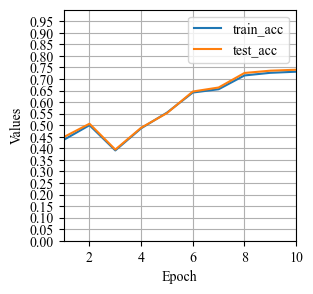

In [98]:
# 再试一次，会不会造成net的parameter的累加，结果表明不会
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()   
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.01)  
    
train_steps(epochs=10, 
            train_dataset=train_dataset, 
            train_iter=train_iter, 
            test_dataset=test_dataset, 
            net=net,                        
            loss_fn=loss_fn, 
            opt=opt, 
            device=device, 
            train_figure=True, 
            resume = False
) 

### 8.8.2. <a id='toc8_8_2_'></a>[自己探索](#toc0_)
#### 8.8.2.1. <a id='toc8_8_2_1_'></a>[lr的影响](#toc0_)

耗时： 69.80070853233337 seconds.


(tensor(1.4991), tensor(0.9673), tensor(0.9614))

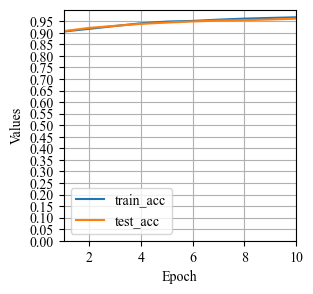

In [99]:
# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()      
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device, 
    train_figure=True
) 

#### 8.8.2.2. <a id='toc8_8_2_2_'></a>[不同模型的效率](#toc0_)

耗时： 87.9712917804718 seconds.


(tensor(1.4962), tensor(0.9704), tensor(0.9643))

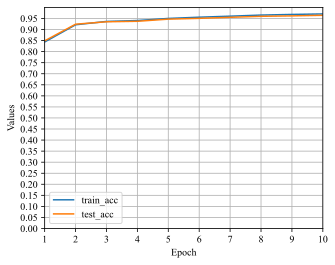

In [119]:
# test_acc一直在92%左右，如何才能提高？
# 使用CNN会好一点吗？
# 我们来试一试：

class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net1()  
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device, 
    train_figure=True
) 

耗时： 210.56247329711914 seconds.


(tensor(1.4977), tensor(0.9650), tensor(0.9571))

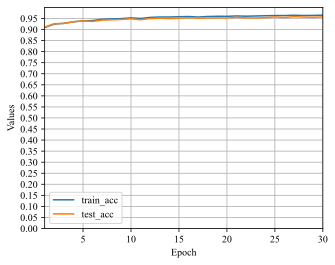

In [120]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 


# 开始训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # self.network = nn.Sequential(nn.Flatten(),
        #                              nn.Linear(28*28, 2**5), nn.ReLU(),
        #                              nn.Linear(2**5, 10), nn.Softmax())
        self.num_hidden = 2**5
        self.layer1 = nn.Flatten()
        self.layer2 = nn.Linear(28*28, self.num_hidden)
        self.layer3 = nn.Linear(self.num_hidden, self.num_hidden)
        self.ac = nn.ReLU()
        # self.ac = nn.Tanh()
        self.dp = nn.Dropout()
        self.bn = nn.BatchNorm1d(self.num_hidden)
        self.layer4 = nn.Linear(self.num_hidden, 10)
        self.layer5 = nn.Softmax()


    def forward(self, X):
        y = self.layer1(X)
        y = self.layer2(y)
        
        for i in range(2):
            y = y + self.dp(self.ac(self.bn(self.layer3(y))))
                   
        y = self.layer4(y)
        y = self.layer5(y)
        return y

net = Net()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)

train_steps(
    epochs=30, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device, 
    train_figure=True
) 

### 8.8.3. <a id='toc8_8_3_'></a>[K折交叉验证](#toc0_)
- 简述：把数据分成K份，分别只取1份做Test_data，（K-1）做Train_data，做K次，计算Test_acc的平均值

In [90]:
def get_k_fold_data(k, i, X, y):
    assert k > 1 # k必须大于1
    fold_size = X.shape[0] // k # 窗口大小：X一维数据长度除以k向下取整数
    print('fold_size: ', fold_size)
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size) # 切片范围 (窗口大小)
        print(idx)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [85]:
X = torch.arange(15).reshape(5, 3)
y = torch.negative(torch.arange(15).reshape(5, 3))

X, y

(tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]),
 tensor([[  0,  -1,  -2],
         [ -3,  -4,  -5],
         [ -6,  -7,  -8],
         [ -9, -10, -11],
         [-12, -13, -14]]))

In [92]:
get_k_fold_data(2, 1, X, y)

fold_size:  2
slice(0, 2, None)
slice(2, 4, None)


(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[ 0, -1, -2],
         [-3, -4, -5]]),
 tensor([[ 6,  7,  8],
         [ 9, 10, 11]]),
 tensor([[ -6,  -7,  -8],
         [ -9, -10, -11]]))

## 8.9. <a id='toc8_9_'></a>[可视化训练过程](#toc0_)
* 清理上一次
    * figure plt.clf() # 只是清理figure内容
    * figure `plt.colse()` # 关闭（释放）figure
    * axes plt.cla() # 只是清理axes内容
* 绘图plot
* 用jupyter的display来显示
* 保持yupyter上的display直至下一次展示再清理

打印图片耗时： 2.1511104106903076 seconds


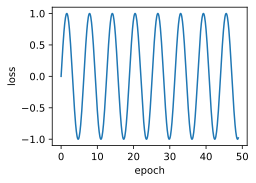

In [15]:
from IPython import display

from matplotlib import pyplot as plt

import torch

import time


def dl_plot(x, y):
    '''再jupyter中持续刷新展示图片'''
    plt.close()                                 # close figure （推荐）
    fig = plt.figure(figsize=(3.5, 2.5))

    plt.plot(x, y)
    plt.xlabel('epoch')
    plt.ylabel('loss')

    # plt.show()                                # 普通展示
    display.display(fig)                        # 在jupyter中展示 （推荐）
    display.clear_output(wait=True)             # 等待 （必须）

    
start = time.time()
for epoch in range(50):
    x = torch.arange(0, epoch+1, 0.1)
    y = torch.sin(x)
    if epoch % 2 == 0:
        dl_plot(x, y)
stop = time.time()
print(f"打印图片耗时： {stop - start} seconds")

In [16]:
start = time.time()
for epoch in range(10):
    x = torch.arange(0, epoch+1, 0.1)
    y = torch.sin(x)
    # dl_plot(x, y)
    print(f"{epoch+1}/{10}: \t train_loss={x[-1]} \t train_acc={y[-1]}")
    
stop = time.time()
print(f"打印数值耗时： {stop - start} seconds")

1/10: 	 train_loss=0.8999999761581421 	 train_acc=0.7833268642425537
2/10: 	 train_loss=1.899999976158142 	 train_acc=0.9463000893592834
3/10: 	 train_loss=2.9000000953674316 	 train_acc=0.23924924433231354
4/10: 	 train_loss=3.9000000953674316 	 train_acc=-0.6877662539482117
5/10: 	 train_loss=4.900000095367432 	 train_acc=-0.9824525713920593
6/10: 	 train_loss=5.900000095367432 	 train_acc=-0.37387657165527344
7/10: 	 train_loss=6.900000095367432 	 train_acc=0.5784398317337036
8/10: 	 train_loss=7.899999618530273 	 train_acc=0.9989413619041443
9/10: 	 train_loss=8.899999618530273 	 train_acc=0.5010212063789368
10/10: 	 train_loss=9.899999618530273 	 train_acc=-0.4575355648994446
打印数值耗时： 0.0017552375793457031 seconds


# 9. <a id='toc9_'></a>[在 GPU 上训练](#toc0_)
- 要实行运算的Tensor`必须`在同一张GPU卡上：

|操作|函数|
|:-|:-|
|1. 张量传到GPU上 |x_gpu = x`.to`('cuda:0')|
|2. 神经网络传到GPU上|net = net`.to`('cuda:0')|

- CPU和GPU之间数据传输总结：

|对象|方法一|方法二|
|:-|:-|:-|
|模型上GPU：|model.cuda()|model.`to(device)`|
|数据上GPU：|data.cuda()|data.`to(device)`|
|输出下GPU：|output=model(data)|output`.detach().cpu().numpy()`|
||解释：||
||output`.detach()`|将变量output从计算图中分离，使其不具有梯度，不进行反向传播|
||`.cpu()`|将GPU数据转CPU|
||.numpy()|将Tensor转numpy|
||`.item()`|将只有`一个元素`的Tensor转为python数值|

## 9.1. <a id='toc9_1_'></a>[查看GPU配置](#toc0_)
都在`torch.cuda`模块中.

In [226]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device

device(type='cuda', index=0)

In [227]:
# 是否有可用的GPU
torch.cuda.is_available()           
# True, False

True

In [228]:
# 可用的GPU数量
torch.cuda.device_count()     
# 1

2

In [229]:
# 返回gpu名字，设备索引默认从0开始；
torch.cuda.get_device_name(0)
# "Tesla T4"

'NVIDIA A100-SXM4-40GB'

In [230]:
# 返回当前设备索引；
torch.cuda.current_device()
# 0, 1, 2

0

In [231]:
def check_device():
    '''判断是否有GPU，并列出GPU的代号/名称'''
    if torch.cuda.is_available(): # 判断是否支持cuda/GPU
        gpu_num = torch.cuda.device_count() # cuda/GPU计数
        if gpu_num == 1:
            print(f"单机单卡: {[torch.cuda.get_device_name(gpu_name) for gpu_name in range(gpu_num)]}")
        else:
            print(f"单机{gpu_num}卡: {[torch.cuda.get_device_name(gpu_name) for gpu_name in range(gpu_num)]}")
    else:
        print(f"只有CPU")
    return None 

check_device()

单机2卡: ['NVIDIA A100-SXM4-40GB', 'NVIDIA A100-SXM4-40GB']


In [232]:
# device = [ 'cpu' if not torch.cuda.is_available() else ]
device = [f'cuda:{i}' for i in range(torch.cuda.device_count())] if torch.cuda.is_available() else ['cpu']

device

['cuda:0', 'cuda:1']

## 9.2. <a id='toc9_2_'></a>[单机单卡（GPU）](#toc0_)
所有的张量必须存在于同一个设备上（同一个CPU或同一个GPU），才能正确计算，否则可能会出现异常错误。  
1. 模型上GPU：model.cuda() 或 model.to(device)   
2. 数据上GPU：data_gpu = data.cuda() 或 data_gpu = data.to(device)   
3. 输出下GPU：output = model(data)  output.detach().cpu().numpy()，

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda', index=0)

In [19]:
x = torch.ones((2, 1))
y = torch.ones((2, 1))

x, y, x.device, y.device

(tensor([[1.],
         [1.]]),
 tensor([[1.],
         [1.]]),
 device(type='cpu'),
 device(type='cpu'))

In [20]:
x1 = x.to(device)
y1 = y.to(device)

x1, y1, x1.device, y1.device

(tensor([[1.],
         [1.]], device='cuda:0'),
 tensor([[1.],
         [1.]], device='cuda:0'),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

## 9.3. <a id='toc9_3_'></a>[单机多卡（GPU）](#toc0_)

目前PyTorch的单机多卡训练，主要有两种方式：

|方法|函数|注释|
|:-|:-|:-|
|第一种：|torch.nn.`DataParallel`(module=net, device_ids=[0, 1], output_device=[0])|# 单机两卡|
|第二种：|torch.nn.parallel.`DistributedDataParallel`()|# 单机多卡、多机多卡|


DataParallel (DP) 和 DistributedDataParallel (DDP) 都是用于在多GPU上进行训练的工具，但它们有一些关键的区别：

1. **目标环境：**
   - `DataParallel` 适用于单机多卡的情况，通过将模型复制到每个GPU上，每个GPU计算不同的批次，最后通过梯度累积或平均来更新模型参数。
   - `DistributedDataParallel` 适用于分布式环境，可以在单机或多台机器上的多个GPU上运行，每个GPU计算不同的批次，并通过分布式通信来同步梯度和更新模型参数。

2. **通信方式：**
   - `DataParallel` 使用单个进程内的多个GPU，通信相对较简单，仅涉及到进程内的数据传输。
   - `DistributedDataParallel` 通过分布式通信协议，如NCCL或Gloo，实现跨进程和可能跨机器的通信，因此需要更复杂的设置。

3. **启动方式：**
   - `DataParallel` 只需在模型实例上调用 `nn.DataParallel(model)` 即可。
   - `DistributedDataParallel` 需要在训练脚本中设置分布式环境变量，如`torch.distributed.launch` 或手动设置`os.environ`。

4. **维护性：**
   - `DataParallel` 更容易使用，因为它不涉及复杂的分布式设置。
   - `DistributedDataParallel` 适用于更复杂的分布式场景，但需要更多的设置和管理。

在单机多卡的情况下，如果简单性和易用性是首要考虑的因素，可以使用 DataParallel。在需要更高级的分布式设置时，或者在多机多卡的环境中，DistributedDataParallel 提供了更大的灵活性。

### 9.3.1. <a id='toc9_3_1_'></a>[DP](#toc0_)
- 单机多线程

- 参数详情
```python
torch.nn.DataParallel(module, device_ids, output_device)  

Parameters
    module (Module) – module to be parallelized                                                 # 神经网络
    device_ids (list of int or torch.device) – CUDA devices (default: all devices)              # 默认使用所用GPU
    output_device (int or torch.device) – device location of output (default: device_ids[0])    # 在cuda:0上进行参数分配、计算、汇总、更新
Variables
    module (Module) – the module to be parallelized
```

- 前提
 
    1. 有一个前提: net模型被复制到cuda:[0, 1, 2等等]上，但是X, y必须提前在cuda:0上，而不能在cuda:1、cuda:2等等上；

    2. 那如果cuda:0有其他人占满了，怎么办？那就需要手动指定其他GPU为cuda:0了：

        - os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"      # 一定一定要放在所有访问显卡的代码之前，否则则无效，给我困扰了好一段时间才发现了。我之前看到有一个说法是放到import os之后并且在import torch之前。

        - os.environ["CUDA_VISIBLE_DEVICES"] = "2, 3"         # 只识别2、3而抛弃了其他GPU，把2当成pytorch逻辑上的cuda:0

In [103]:
import torch 
import torch.nn as nn 
import torch.utils.data as data
import torchvision
import time 


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [

            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(dataset=train_dataset, batch_size=128,  shuffle=True)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''
    print('='*100, '\n', f"Runing on {device}", '\n','='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net = nn.DataParallel(module=net)
    # net = nn.DataParallel(module=net, device_ids=[0, 1], output_device=[0]) # 多GPU并行计算，等价于net = nn.DataParallel(module=net)
    net.to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                     # 默认是累加，此处从新求导
            y_hat = net(X)          # 计算y_hat
            loss = loss_fn(y_hat, y)# 计算loss
            loss.backward()         # 计算梯度
            opt.step()              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
net = Net()  
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
) 

 Runing on cuda:0 
epoch 1/10: train_loss=1.5717055797576904, train_acc=90.85833740234375, test_acc=90.91999816894531
epoch 2/10: train_loss=1.5450035333633423, train_acc=92.63500213623047, test_acc=92.77999877929688
epoch 3/10: train_loss=1.5318394899368286, train_acc=93.75666809082031, test_acc=93.83999633789062
epoch 4/10: train_loss=1.5233505964279175, train_acc=94.5, test_acc=94.18000030517578
epoch 5/10: train_loss=1.5167455673217773, train_acc=95.13500213623047, test_acc=94.83999633789062
epoch 6/10: train_loss=1.5123507976531982, train_acc=95.55833435058594, test_acc=95.25
epoch 7/10: train_loss=1.5058631896972656, train_acc=96.14500427246094, test_acc=95.44000244140625
epoch 8/10: train_loss=1.502568006515503, train_acc=96.41999816894531, test_acc=95.80000305175781
epoch 9/10: train_loss=1.4993404150009155, train_acc=96.69999694824219, test_acc=96.18000030517578
epoch 10/10: train_loss=1.4963492155075073, train_acc=97.02667236328125, test_acc=96.30000305175781
 Total：0.0 d/ 0.

### 9.3.2. <a id='toc9_3_2_'></a>[DDP](#toc0_)
```shell
1. 与 DataParallel 的单进程控制多 GPU 不同，在 distributed 的帮助下，我们只需要编写一份代码，torch 就会自动将其分配给 
 个进程，分别在 n 个 GPU 上运行。
2. 单机多进程
```
```python
详解
torch.nn.parallel.DistributedDataParallel(module, device_ids, output_device)
    
```

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.distributed as dist
import torch.multiprocessing as mp
import os 


def ddp_setup(rank, world_size):
    '''
    Args:
        rank: unique identifier of each process
        world_size: Total number of process
    '''
    os.environ["MASTER_ADDR"] = "localhost"
    os.environ["MASTER_PORT"] = "12357"
    dist.init_process_group(backend='nccl', rank=rank, world_size=world_size)
    torch.cuda.set_device(rank)

#### 9.3.2.1. <a id='toc9_3_2_1_'></a>[在colab上测试可用](#toc0_)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.distributed as dist
import torch.multiprocessing as mp
from torch.multiprocessing import Process
import os


# 定义卷积神经网络模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(local_rank, world_size):
  
  os.environ["MASTER_PORT"] = "12357"
  os.environ["MASTER_ADDR"] = "localhost"

  # 设置每个进程的GPU
  torch.cuda.set_device(local_rank)
  device = torch.device("cuda", local_rank)

  # 初始化进程组
  dist.init_process_group(backend='nccl', world_size=world_size, rank=local_rank)

  # 数据预处理和加载
  transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
  trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

  # 使用DistributedSampler来对数据进行分布式采样
  train_sampler = torch.utils.data.distributed.DistributedSampler(trainset)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, sampler=train_sampler)

  # 创建CNN模型实例，并放入多个GPU上
  model = CNN().to(device)
  model = nn.parallel.DistributedDataParallel(model, device_ids=[local_rank])

  # 定义损失函数和优化器
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # 训练模型
  num_epochs = 5

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0

      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          optimizer.zero_grad()

          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      print(f"Local Rank {local_rank}, Epoch {epoch + 1}/{num_epochs}, Training Loss: {running_loss / len(trainloader):.4f}")

  dist.destroy_process_group()

# Process格式：
if __name__ == "__main__":
  # size = torch.cuda.device_count()
  size = 10
  processes = []
  world_size = 1
  for rank in range(size):
      p = Process(target=train, args=(rank, world_size))
      p.start()
      processes.append(p)

  for p in processes:
      p.join()


## 9.4. <a id='toc9_4_'></a>[多机多卡（GPU）- 分布式训练](#toc0_)
```shell
目前PyTorch的多机多卡训练，主要有两种方式：   
    1. torch.nn.parallel.DistributedDataParallel()
```

# 10. <a id='toc10_'></a>[模型和参数的保存与加载](#toc0_)

* torch.save( 张量名, 位置 )

* 张量名称 = torch.load( 位置 )

* torch.save会保存数据的`很多关系`，会有条件限制。

## 10.1. <a id='toc10_1_'></a>[加载和保存-张量](#toc0_)

In [167]:
import torch 


x = torch.ones((3, 5))

x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [168]:
# torch.save()
torch.save(x, './Pytorch_params/tensor.pt')

In [170]:
# torch.load()
x1 = torch.load('./Pytorch_params/tensor.pt', weights_only=True)

x1

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

## 10.2. <a id='toc10_2_'></a>[加载和保存-模型参数](#toc0_)
保存单个权重向量（或其他张量）确实有用， 但是如果我们想保存整个模型，并在以后加载它们， 单独保存每个向量则会变得很麻烦。 毕竟，我们可能有数百个参数散布在各处。 因此，深度学习框架提供了内置函数来保存和加载整个网络。 需要注意的一个重要细节是，这将保存模型的参数而不是保存整个模型。 例如，如果我们有一个3层多层感知机，我们需要单独指定架构。 因为模型本身可以包含任意代码，所以模型本身难以序列化。 因此，为了恢复模型，我们需要用代码生成架构， 然后从磁盘加载参数。

1. save和load函数可用于张量对象的文件读写。
2. 我们可以通过参数字典保存和加载网络的全部参数。
3. 保存架构必须在代码中完成，而不是在参数中完成。

In [171]:
import torch 
import torch.nn.functional as F
from torch import nn


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))


net = MLP()
X = torch.randn(size=(2, 20))
Y = net(X)

In [172]:
# torch.save()
# 接下来，我们将模型的参数存储在一个叫做“mlp.params”的文件中。
torch.save(net.state_dict(), './Pytorch_params/mlp.params')

In [174]:
# torch.load()
# 为了恢复模型，我们实例化了原始多层感知机模型的一个备份。 
# 这里我们不需要随机初始化模型参数，而是直接读取文件中存储的参数。
net_params = torch.load('./Pytorch_params/mlp.params', weights_only=True)
clone = MLP()

clone.load_state_dict(net_params)
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

- 完整的代码

In [175]:
# 保存
torch.save(
    {
        'epoch': '10', 
        'model_state_dict': net.state_dict(), 
        # 'opt_state_dict': opt.state_dict(), 
        'loss': 'loss'
    }, 
    './Pytorch_params/ckpt.pt'
)

# 重载
check_point = torch.load('./Pytorch_params/ckpt.pt')

check_point['model_state_dict']
check_point['loss']
check_point['epoch']

/tmp/ipykernel_3885055/2144141008.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load('./Pytorch_params/ckpt.pt')


'10'

## 10.3. <a id='toc10_3_'></a>[safetensor](#toc0_)
是有huggingface推出的格式。

In [20]:
import safetensors
import torch 
from torch import nn 


class DemoModel(nn.Module):
    def __init__(self):
        super().__init__()
        net = nn.Sequential(nn.Linear(12, 128), nn.ReLU(), nn.Linear(128, 2))

    def forward(self, X):
        return net(X)
    

net = DemoModel()

state_dicts1 = net.state_dict()

safetensors.torch.save_file(state_dicts1, './Pytorch_params/demo.safetensors')

In [21]:
import safetensors 


state_dicts2 = safetensors.torch.load_file('./Pytorch_params/demo.safetensors')

state_dicts2

{}

# 11. <a id='toc11_'></a>[神经网络类型](#toc0_)

## 11.1. <a id='toc11_1_'></a>[CNN](#toc0_)


### 11.1.1. <a id='toc11_1_1_'></a>[概述](#toc0_)


CBAPD: 卷积，批量归一化，激活，池化，丢弃

卷积层就是特征提取，随后将特征传入FC（全连接层）；

卷积本身是线性的，但是经过激活函数后可以编程非线性的。

- 为什么要用CNN？
  - 利用MLP处理图片像素矩阵，太占内存
  - 解决办法，顶层设计一个新的算法具备如下特点：
    - 局部性
    - 平移不变性
  - 刚好来自“信号处理中的卷积”符合此类特征：
    - 局部性 （固定/通用的卷积核）
    - 平移不变性 （特征图在整个图片的位置不固定，可以平移）

### 11.1.2. <a id='toc11_1_2_'></a>[简单CNN](#toc0_)

#### 11.1.2.1. <a id='toc11_1_2_1_'></a>[从头实现](#toc0_)

##### 11.1.2.1.1. <a id='toc11_1_2_1_1_'></a>[卷积计算过程](#toc0_)

 <img src="./Pytorch_Pictures/convolution/conv.gif" width = "500" height = "300" alt="图片名称" align=center />

- 内积后求和

- 输出大小：(Xh - Kh + 1, Xw - Kw + 1)

In [6]:
import torch 


def cov2d(X, kernel)-> torch.Tensor:
    '''
    手写二维convolution计算过程 (二维互关运算)
    
    Args: 
        X (2d): 输入图片像素矩阵
        kernel (int): 卷积核

    Return: 
        Y: 卷积计算结果
    '''
    h, w = kernel.shape
    Y = torch.zeros(size=(X.shape[0] - h + 1, X.shape[1] - w + 1))   # 输出形状，暂时用0填充
    # print(Y)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * kernel).sum()      # X取子集 * kernel 最后在求和
    return Y

In [7]:
X = torch.arange(9, dtype=torch.float32).reshape(3, 3)

X

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [8]:
kernel = torch.arange(4, dtype=torch.float32).reshape(2, 2)

kernel

tensor([[0., 1.],
        [2., 3.]])

In [9]:
cov2d(X=X, kernel=kernel)

tensor([[19., 25.],
        [37., 43.]])

##### 11.1.2.1.2. <a id='toc11_1_2_1_2_'></a>[从头卷积层](#toc0_)
- 卷积层对输入和卷积核进行互关运算，并添加偏置；
- 所以卷积层中两个被训练的参数是卷积核与偏置。

In [60]:
import torch.nn as nn


class Cov2d(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.kernel = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
        # self.bias = nn.Parameter(torch.ones(1))

    def forward(self, X):
        return cov2d(X, kernel=self.kernel) + self.bias                   # 将conv2d计算添加进来

In [61]:
cov2d1 = Cov2d(kernel_size=(2, 2))

X, cov2d1(X=X), cov2d1.kernel, cov2d1.bias

(tensor([[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]]),
 tensor([[ 4.2942,  6.8109],
         [11.8445, 14.3613]], grad_fn=<AddBackward0>),
 Parameter containing:
 tensor([[0.7042, 0.7619],
         [0.6707, 0.3800]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True))

#### 11.1.2.2. <a id='toc11_1_2_2_'></a>[简洁实现](#toc0_)

In [68]:
import torch 
import torch.nn as nn 


conv2d = nn.Conv2d(
    in_channels = 1, 
    out_channels = 1, 
    kernel_size = (2, 2), 
    bias = True
)


# nn.Conv2d的输入和输出都是：批量大小、通道数、高度和宽度
conv2d(X.reshape(shape=(1,1,3,3)))

tensor([[[[-0.5187, -0.3951],
          [-0.1480, -0.0244]]]], grad_fn=<ConvolutionBackward0>)

#### 11.1.2.3. <a id='toc11_1_2_3_'></a>[填充和步幅](#toc0_)

- 填充 (padding)

  - 输出大小：(Xh - Kh + Ph + 1, Xw - Kw + Pw + 1)

  - 一般情况下Kh和Kw为奇数(1,3,5,7) 可得 (输入和输出形状一致)：

    - Ph设置为：Kh - 1

    - Pw设置为：Kw - 1

  - padding填写时写一半 (输入和输出形状一致)：
    - padding = (Ph/2, Pw/2)

In [70]:
import torch 
from torch import nn  


conv2d1 = nn.Conv2d(
    in_channels = 1, 
    out_channels = 1, 
    kernel_size = (3, 3), 
    bias = True, 
    padding = (1, 1),           # ((3 - 1)/2, (3 - 1)/2)
    stride = 1
)


# nn.Conv2d的输入和输出都是：批量大小、通道数、高度和宽度
X = torch.arange(9, dtype=torch.float32).reshape(3, 3)
Y = conv2d1(X.reshape(shape=(1,1,3,3)))

X, X.reshape(shape=(1,1,3,3)).shape, Y, Y.shape

(tensor([[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]]),
 torch.Size([1, 1, 3, 3]),
 tensor([[[[-0.8907, -0.1869,  0.2284],
           [-0.5685,  0.4497,  0.2547],
           [ 4.9647,  3.9560,  0.3975]]]], grad_fn=<ConvolutionBackward0>),
 torch.Size([1, 1, 3, 3]))

- 步幅 (stride)

  - 输出大小为：( (Xh - Kh + Ph + Sh)/Sh, (Xw - Kw + Pw + Sw)/Sw)

In [71]:
import torch 
from torch import nn


conv2d1 = nn.Conv2d(
    in_channels = 1, 
    out_channels = 1, 
    kernel_size = (3, 3), 
    bias = True, 
    padding = (1, 1),           # ((3 - 1)/2, (3 - 1)/2)
    stride = 2                  # (8 - 3 + 1 + 2 )/2 = 4
)

# nn.Conv2d的输入和输出都是：批量大小、通道数、高度和宽度
X = torch.arange(64, dtype=torch.float32).reshape(8, 8)
Y = conv2d1(X.reshape((1,1,8,8)))

X, X.reshape((1,1,8,8)).shape, Y, Y.shape

(tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11., 12., 13., 14., 15.],
         [16., 17., 18., 19., 20., 21., 22., 23.],
         [24., 25., 26., 27., 28., 29., 30., 31.],
         [32., 33., 34., 35., 36., 37., 38., 39.],
         [40., 41., 42., 43., 44., 45., 46., 47.],
         [48., 49., 50., 51., 52., 53., 54., 55.],
         [56., 57., 58., 59., 60., 61., 62., 63.]]),
 torch.Size([1, 1, 8, 8]),
 tensor([[[[ -2.2047,  -5.6431,  -6.8988,  -8.1545],
           [-13.6358, -17.9951, -19.6276, -21.2601],
           [-28.1641, -31.0550, -32.6875, -34.3200],
           [-42.6923, -44.1149, -45.7474, -47.3799]]]],
        grad_fn=<ConvolutionBackward0>),
 torch.Size([1, 1, 4, 4]))

#### 11.1.2.4. <a id='toc11_1_2_4_'></a>[多输入和多输出通道](#toc0_)

In [72]:
import torch 
from torch import nn


conv2d1 = nn.Conv2d(
    in_channels = 1, 
    out_channels = 3, 
    kernel_size = (3, 3), 
    bias = True, 
    padding = (1, 1),           # ((3 - 1)/2, (3 - 1)/2)
    stride = 2                  # (8 - 3 + 1 + 2 )/2 = 4
)

# nn.Conv2d的输入和输出都是：批量大小、通道数、高度和宽度
X = torch.arange(64, dtype=torch.float32).reshape(8, 8)
Y = conv2d1(X.reshape((1,1,8,8)))

X, X.reshape((1,1,8,8)).shape, Y, Y.shape

(tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11., 12., 13., 14., 15.],
         [16., 17., 18., 19., 20., 21., 22., 23.],
         [24., 25., 26., 27., 28., 29., 30., 31.],
         [32., 33., 34., 35., 36., 37., 38., 39.],
         [40., 41., 42., 43., 44., 45., 46., 47.],
         [48., 49., 50., 51., 52., 53., 54., 55.],
         [56., 57., 58., 59., 60., 61., 62., 63.]]),
 torch.Size([1, 1, 8, 8]),
 tensor([[[[ -2.3830,  -4.8751,  -5.6074,  -6.3396],
           [ -4.1800,  -7.9979,  -8.1388,  -8.2797],
           [ -4.5518,  -9.1252,  -9.2662,  -9.4071],
           [ -4.9237, -10.2526, -10.3935, -10.5344]],
 
          [[ -0.6794,  -3.0746,  -3.6831,  -4.2917],
           [  2.9294,  -2.9314,  -2.5534,  -2.1754],
           [  8.4542,   0.0925,   0.4705,   0.8484],
           [ 13.9789,   3.1163,   3.4943,   3.8723]],
 
          [[ -1.6030,  -2.0202,  -2.3736,  -2.7271],
           [ -5.1094,  -4.1152,  -4.3205,  -4.5257],
           [ -8.3311,  -5.7

#### 11.1.2.5. <a id='toc11_1_2_5_'></a>[Pooling (汇聚层)](#toc0_)
pooling层不包含参数


##### 11.1.2.5.1. <a id='toc11_1_2_5_1_'></a>[平均Pooling](#toc0_)

In [73]:
import torch 
from torch import nn


nn.AvgPool2d(
    kernel_size = (2, 2), 
    padding = 0, 
    stride = 1
)

AvgPool2d(kernel_size=(2, 2), stride=1, padding=0)

##### 11.1.2.5.2. <a id='toc11_1_2_5_2_'></a>[最大Pooling](#toc0_)

In [81]:
import torch 
from torch import nn


nn.MaxPool2d(
    kernel_size = (2, 2), 
    padding = 0, 
    stride = 1
)

MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)

### 11.1.3. <a id='toc11_1_3_'></a>[LeNet](#toc0_)

- 最早被Yann LeCun用来识别手写数字的算法

<img src="./Pytorch_Pictures/convolution/LeNet.jpg" width = "700" height = "300" alt="图片名称" align=center >

In [74]:
import torch 
from torch import nn


class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2), 
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), 
            nn.Sigmoid(), 
            nn.AvgPool2d(kernel_size=2, stride=2), 
            nn.Flatten(), 
            nn.Linear(16 * 5 * 5, 120), 
            nn.Sigmoid(), 
            nn.Linear(120, 84), 
            nn.Sigmoid(), 
            nn.Linear(84, 10)
        )
    
    def forward(self, X):
        return self.net(X)


# 测试
lenet = LeNet()

X = torch.arange(28*28, dtype=torch.float32).reshape((1, 1, 28, 28))
# X = torch.rand(size=(1,1,28,28), dtype=torch.float32)
# X.shape

lenet(X)

tensor([[ 0.4869, -0.4271, -0.2250,  0.0145, -0.0824, -0.5031, -0.2721,  0.5979,
         -0.1851, -0.4968]], grad_fn=<AddmmBackward0>)

### 11.1.4. <a id='toc11_1_4_'></a>[AlexNet](#toc0_)

- 第一个在大规模视觉比赛 (ImageNet) 中战胜传统给算法 (如支持向量机 supportvectormachines) 的**大型神经网络**

- 证明算法学习的特征可以超越手动设计的特征

<img src="./Pytorch_Pictures/convolution/AlexNet.jpg" width = "500" height = "700" alt="图片名称" align=center >  

- LeNet VS AlexNet：

<img src="./Pytorch_Pictures/convolution/LeNetVSAlexNet.jpg" width = "1000" height = "300" alt="图片名称" align=center >

In [75]:
from torchvision.models import AlexNet


alexnet = AlexNet()

alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### 11.1.5. <a id='toc11_1_5_'></a>[VGG](#toc0_)

- 利用重复的神经网络块

  - 卷积层，如Conv2d()
  - 非线性激活，如nn.Relu()
  - 汇聚层，如nn.MaxPooling()

<img src="./Pytorch_Pictures/convolution/VGG.jpg" width = "500" height = "500" alt="图片名称" align=center >  

- 模块设计

In [76]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)


conv_arch = (
    (1, 64), 
    (1, 128), 
    (2, 256), 
    (2, 512), 
    (2, 512)
)

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
        
    return nn.Sequential(
        *conv_blks, 
        nn.Flatten(), 
        # 全连接部分
        nn.Linear(out_channels*7*7, 4096), 
        nn.ReLU(), 
        nn.Dropout(p=0.5), 
        nn.Linear(4096, 4096), 
        nn.ReLU(), 
        nn.Dropout(p=0.5), 
        nn.Linear(4096, 10)
    )


net = vgg(conv_arch)

net

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (4):

- vgg11

In [77]:
from torchvision.models import vgg11


vgg = vgg11()

vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

### 11.1.6. <a id='toc11_1_6_'></a>[NiN](#toc0_)

- 使用1 x 1卷积层来替代全连接层

### 11.1.7. <a id='toc11_1_7_'></a>[GoogLeNet](#toc0_)

- 2014年的ImageNet挑战赛中，GoogLeNet大放异彩；

- 解决了到底选多大的卷积核的问题？结论是：使用不同大小的卷积核组合更加有利。

### 11.1.8. <a id='toc11_1_8_'></a>[批量规范化](#toc0_)

- batch normalization

In [ ]:
nn.BatchNorm2d()

### 11.1.9. <a id='toc11_1_9_'></a>[ResNet](#toc0_)
```shell
如果，CNN只需要弄懂一个神经网络模型的话，那就是ResNet。
```

#### 11.1.9.1. <a id='toc11_1_9_1_'></a>[从头实现](#toc0_)

In [99]:
import torch 
from torch import nn
import torch.nn.functional as F 


class MyResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(), 
            nn.LSTM(), 
            nn.ReLU()
        )

    def forward(self, X):
        return self.net(X)

In [78]:
from torchvision.models import resnet34 


resnet = resnet34()

resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 11.2. <a id='toc11_2_'></a>[序列数据](#toc0_)
### 11.2.1. <a id='toc11_2_1_'></a>[什么是序列](#toc0_)

在深度学习中，**序列**是一段具有连续关系的数据，通常带有时间先后顺序。例如，文本、语音、股票价格、气温、DNA序列等都可以被视为序列数据。为了处理不定长的数据，我们常常使用循环神经网络（RNN）来处理序列信息。总之，序列数据在许多领域中都有广泛的应用，包括自然语言处理、时间序列分析、音频处理和图像处理等。

### 11.2.2. <a id='toc11_2_2_'></a>[语言模型](#toc0_)

语言模型 (language model) 是定义在单词序列上的概率模型，可以用来计算一个句子或一段文字的概率。

常见的语言模型包括：
  - `n-gram模型`：基于统计的方法，通过计算n个连续词出现的概率来预测下一个词。
  - `神经网络语言模型`：使用神经网络（如RNN、LSTM、Transformer等）来捕捉语言的复杂模式和长距离依赖关系。
  - `预训练语言模型`：如GPT（生成式预训练变换器）和BERT（双向编码器表示）等，这些模型在大量文本上进行预训练，然后可以通过微调应用于特定任务。

### 11.2.3. <a id='toc11_2_3_'></a>[文本预处理](#toc0_)
* token：最小单位（字符/单词/词组）
* vocab：（token：indice）对照（查询）列表
* cropus：token转化为indice后的文本，也称之为语料库

#### 11.2.3.1. <a id='toc11_2_3_1_'></a>[下载《Time machine》并读取数据](#toc0_)
首先，我们从H.G.Well的[时光机器](https://www.gutenberg.org/ebooks/35)中加载文本。
这是一个相当小的语料库，只有30000多个单词，但足够我们小试牛刀，
而现实中的文档集合可能会包含数十亿个单词。
下面的函数 (**将数据集读取到由多条文本行组成的列表中**)，其中每条文本行都是一个字符串。
为简单起见，我们在这里忽略了标点符号和字母大写。

In [13]:
import collections
import re
from d2l import torch as d2l


#@save
# 下载到../data/timemachine.txt
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt', '090b5e7e70c295757f55df93cb0a180b9691891a')

def read_time_machine():  #@save
    """将时间机器数据集加载到文本行的列表中"""
    with open(d2l.download('time_machine'), 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]


# ['The machine is haha', '', '', ...]
lines = read_time_machine()

print('lines:', lines)
print(f'# 文本总行数: {len(lines)}')

for i, line in enumerate(lines):
    print(f'{i}: {line}')
    if i == 25:
        break

lines: ['the time machine by h g wells', '', '', '', '', 'i', '', '', 'the time traveller for so it will be convenient to speak of him', 'was expounding a recondite matter to us his grey eyes shone and', 'twinkled and his usually pale face was flushed and animated the', 'fire burned brightly and the soft radiance of the incandescent', 'lights in the lilies of silver caught the bubbles that flashed and', 'passed in our glasses our chairs being his patents embraced and', 'caressed us rather than submitted to be sat upon and there was that', 'luxurious after dinner atmosphere when thought roams gracefully', 'free of the trammels of precision and he put it to us in this', 'way marking the points with a lean forefinger as we sat and lazily', 'admired his earnestness over this new paradox as we thought it', 'and his fecundity', '', 'you must follow me carefully i shall have to controvert one or two', 'ideas that are almost universally accepted the geometry for', 'instance they taught you at 

#### 11.2.3.2. <a id='toc11_2_3_2_'></a>[词元化（Tokenization）](#toc0_)
分词的方法
  - 基于`规则`的分词：使用预定义的规则或词典进行分割，适用于规则明确的语言（如英语）。  
  - `统计学`分词：基于词频和共现统计进行分割，适用于无明显分词标志的语言（如中文）。
  - `机器学习`分词：利用监督学习模型进行分割，能够学习上下文信息进行更准确的分词。

词元化的类型
  * 基于`词`的分词（Word-Based Tokenization）：按照word拆分成列表格式
  * `子词`分词（Subword Tokenization）：词根表示。
    - BPE（Byte Pair Encoding）
    - WordPiece，主要用于Google的模型，如BERT。
    - Unigram，主要用于BERT。
  * 基于`字符`的分词（Character-Based Tokenization）：按照char拆分成列表格式。
  * `语素`分词（Morpheme-Based Tokenization）

In [14]:
# 按照word
def tokenize(lines, token='word'):  #@save
    """将文本行拆分为单词或字符词元"""
    if token == 'word':
        return [line.split() for line in lines]
    elif token == 'char':
        return [list(line) for line in lines]
    else:
        print('错误：未知词元类型：' + token)


# [['The', 'machine', 'is', 'haha'], [], [], ...]
tokens = tokenize(lines, token='word')
# tokens = tokenize(lines, token='char')

print('tokens:', tokens)

for i, token in enumerate(tokens):
    print(f'{i}: {token}')
    if i == 25:
        break

tokens: [['the', 'time', 'machine', 'by', 'h', 'g', 'wells'], [], [], [], [], ['i'], [], [], ['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him'], ['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and'], ['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the'], ['fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent'], ['lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and'], ['passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and'], ['caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that'], ['luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully'], ['free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in', 'this'

#### 11.2.3.3. <a id='toc11_2_3_3_'></a>[词表（Vocabulary）](#toc0_)
* 构建(token：索引)查询元组
* 并将文本的token替换成索引

    |token|indice|annotation|
    |---|---|---|
    |unk|0|unknown|
    |PAD|1|padding|
    |SOS|2|start of sentence|
    |EOS|3|end of sentence| 
    |...|...|...|


* id_to_token：索引到token的映射，列表格式
* token_to_id：token到索引的映射，字典格式


In [17]:
class Vocab():  #@save
    """文本词表"""
    
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []

        # 按出现频率排序
        counter = count_corpus(tokens)                                                      # 统计词频
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1], reverse=True)       # 词频从高到低排序
        # 未知词元的索引为0
        self.idx_to_token = ['<unk>'] + reserved_tokens                                     # 列表格式 ['<unk>', ...]
        self.token_to_idx = {token: idx for idx, token in enumerate(self.idx_to_token)}     # 字典格式 {token: idx}
        
        for token, freq in self._token_freqs:
            if freq < min_freq:                                         # 如果词语的频率低于 min_freq，则停止添加。
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)                                 # 字典追加
                self.token_to_idx[token] = len(self.idx_to_token) - 1           # 字典更新

    def __len__(self):
        '''魔法函数，返回词表的长度'''
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        '''魔法函数，返回词表的索引'''
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        '''
        单个索引：如果传入的是单个词语（不是列表或元组），则返回对应的索引。如果词语未在词汇表中出现，则返回 <unk> 的索引（默认为 0）。
        批量词语查询：如果传入的是词语列表或元组，则返回对应的索引列表。
        '''
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # 未知词元的索引为0
        '''属性方法，返回未知词元的索引'''
        return 0

    @property
    def token_freqs(self):
        '''属性方法，返回词频'''
        return self._token_freqs


def count_corpus(tokens):  #@save
    """统计词元的频率"""
    # 这里的tokens是1D列表或2D列表
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # 将词元列表展平成一个列表
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)


vocab = Vocab(tokens)

print(f'vocab type: {type(vocab)}')
print(f'vocab size: {len(vocab)}')
print('vocab[0:5]:', list(vocab.token_to_idx.items())[:5], sep='\n')

for i in [0, 11]:
    print("="*100)
    print('文本:', tokens[i])
    print('索引:', vocab[tokens[i]])

vocab type: <class '__main__.Vocab'>
vocab size: 4580
vocab[0:5]:
[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4)]
文本: ['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
索引: [1, 19, 50, 40, 2183, 2184, 400]
文本: ['fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent']
索引: [148, 588, 825, 3, 1, 244, 2187, 4, 1, 2188]


#### 11.2.3.4. <a id='toc11_2_3_4_'></a>[整合所有功能](#toc0_)
* 读取数据
* 分割成token
* 并构建(token, indice)查询表
* 替换token成indice，从而构成corpus

In [18]:
# 按照char进行词元化 
def load_corpus_time_machine(max_tokens=-1):  #@save
    """返回时光机器数据集的词元索引列表和词表"""
    # 读取数据，返回 ['The machine is haha', '', '', ...]
    lines = read_time_machine()

    # 分词数据，返回 [['The', 'machine', 'is', 'haha'], [], [], ...]
    tokens = tokenize(lines, 'char')      # char
    # tokens = tokenize(lines, token='word')  # word

    # 构建词表 vocab.__getitem__(token_to_idx.get(token)) 在字典中查找
    # 列表：idx_to_token = ['<unk>', reserved_tokens, 'the', 'i', 'and', ...]
    # 字典：token_to_idx = {'<unk>': indice, reserved_tokens: indice, 'the': indice, 'i': indice, 'and': indice, ...}
    vocab = Vocab(tokens)

    # 因为时光机器数据集中的每个文本行不一定是一个句子或一个段落，
    # 所以将所有文本行展平到一个列表中，构成语料库 (corpus) 
    # 展开为一维列表：corpus是[indice, indice, indice, ...]
    corpus = [vocab[token] for line in tokens for token in line]

    if max_tokens > 0:  # 如果max_tokens大于0，则截断corpus
        corpus = corpus[:max_tokens]

    return corpus, vocab


corpus, vocab = load_corpus_time_machine()

# 语料库长度，词表长度
len(corpus), len(vocab)

(170580, 28)

#### 11.2.3.5. <a id='toc11_2_3_5_'></a>[文本编码与向量化](#toc0_)
文本编码的目的
文本编码是将文本数据转换为数值形式，以便机器学习模型能够处理。常见的编码方法包括：
  - 独热编码（One-Hot Encoding）
  - 词袋模型（Bag-of-Words）
  - TF-IDF（Term Frequency-Inverse Document Frequency）
  - 词嵌入（Word Embeddings）： 词嵌入通过将词汇映射到高维连续向量空间，捕捉词汇之间的语义关系。常见的词嵌入方法包括Word2Vec、GloVe和FastText。

##### 11.2.3.5.1. <a id='toc11_2_3_5_1_'></a>[word2vec](#toc0_)

In [ ]:
from gensim.models import Word2Vec




### 11.2.4. <a id='toc11_2_4_'></a>[语言模型数据集](#toc0_)
#### 11.2.4.1. <a id='toc11_2_4_1_'></a>[顺序采样 (Sequential Sampling)](#toc0_)

- 顺序采样的

In [19]:
import random
import torch 


def seq_data_iter_sequential(corpus, batch_size, num_steps):  #@save
    """使用顺序分区生成一个小批量子序列"""
    # 从随机偏移量开始划分序列，起始点。
    # 生成一个随机偏移量 offset，范围在 0 到 num_steps 之间。这样做的目的是为了随机化数据的起始位置，避免模型过于依赖数据的开始部分，提高泛化能力。
    offset = random.randint(0, num_steps)   
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size  # 计算可以形成完整批次数(取整) * batch_size = 可以形成完整批次的所有token
    Xs = torch.tensor(corpus[offset: offset + num_tokens])  # 提取 X 序列
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])  # 提取 Y 序列，只是X右移一位
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)  # 重塑形状
    num_batches = Xs.shape[1] // num_steps  # 计算批次数
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps] # batch_size, num_steps
        Y = Ys[:, i: i + num_steps] # batch_size, num_steps
        yield X, Y

In [20]:
for X, Y in seq_data_iter_sequential(corpus=corpus, batch_size=2, num_steps=5):
    print('X: \n', X)
    print('Y: \n', Y)
    break

X: 
 tensor([[ 1,  3,  5, 13,  2],
        [ 4,  3,  1,  3,  9]])
Y: 
 tensor([[ 3,  5, 13,  2,  1],
        [ 3,  1,  3,  9,  5]])


#### 11.2.4.2. <a id='toc11_2_4_2_'></a>[随机采样 (Random Sampling)](#toc0_)

- 随机采样

In [21]:
import random 
import torch 


def seq_data_iter_random(corpus, batch_size, num_steps):  #@save
    """使用随机抽样生成一个小批量子序列"""
    # 从随机偏移量开始对序列进行分区，随机范围包括num_steps-1
    corpus = corpus[random.randint(0, num_steps - 1):]
    # 减去1，是因为我们需要考虑标签
    num_subseqs = (len(corpus) - 1) // num_steps
    # 长度为num_steps的子序列的起始索引
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    # 在随机抽样的迭代过程中，
    # 来自两个相邻的、随机的、小批量中的子序列不一定在原始序列上相邻
    random.shuffle(initial_indices)

    def data(pos):
        # 返回从pos位置开始的长度为num_steps的序列
        return corpus[pos: pos + num_steps]

    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        # 在这里，initial_indices包含子序列的随机起始索引
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)

In [22]:
for X, Y in seq_data_iter_random(corpus=corpus, batch_size=2, num_steps=5):
    print('X: \n', X)
    print('Y: \n', Y)
    break

X: 
 tensor([[ 9,  2,  1,  3,  5],
        [ 3,  9,  2,  1, 17]])
Y: 
 tensor([[ 2,  1,  3,  5, 13],
        [ 9,  2,  1, 17,  4]])


#### 11.2.4.3. <a id='toc11_2_4_3_'></a>[PyTorch分装的顺序或随机采样](#toc0_)

In [23]:
import torch 
from torch.utils import data 


class TextDataset(data.Dataset):
    def __init__(self, corpus:list, num_steps:int):
        self.datas = self._get_data_list(corpus, num_steps)

    def _get_data_list(self, corpus:list, num_steps:int):
        datas = []
        # 在corpus中随机选择一个起始位置，范围在0到num_steps之间
        start_position = torch.randint(low=0, high=num_steps, size=(1,))
        corpus = corpus[start_position:]
        num_subseqs = len(corpus) // num_steps 
        for num in range(0, (num_subseqs-1) * num_steps, num_steps):
            x = torch.tensor(corpus[num: num + num_steps])
            y = torch.tensor(corpus[num + 1: num + 1 + num_steps])
            datas.append((x, y))
        return datas 
    
    def __len__(self):
        return len(self.datas)
    
    def __getitem__(self, idx):
        return self.datas[idx]
    

# datasets
datasets = TextDataset(corpus=corpus, num_steps=5)

# 顺序采样, 不shuffle
sequential_train_loader = data.DataLoader(datasets, batch_size=2, shuffle=False)

# 随机采样, shuffle
random_train_loader = data.DataLoader(datasets, batch_size=2, shuffle=True)


In [24]:
datasets[0]

(tensor([ 2,  1,  3,  5, 13]), tensor([ 1,  3,  5, 13,  2]))

In [25]:
for X, y in sequential_train_loader:
    print(X, y, sep='\n')
    break

tensor([[ 2,  1,  3,  5, 13],
        [ 2,  1, 13,  4, 15]])
tensor([[ 1,  3,  5, 13,  2],
        [ 1, 13,  4, 15,  9]])


In [26]:

for x, y in random_train_loader:
    print(x, y, sep='\n')
    break

tensor([[ 2,  1,  7, 16,  1],
        [ 9,  4, 22,  2,  1]])
tensor([[ 1,  7, 16,  1, 15],
        [ 4, 22,  2,  1, 21]])


#### 11.2.4.4. <a id='toc11_2_4_4_'></a>[总结](#toc0_)

| 特性 | 顺序采样 | 随机采样 |
| -------------- | --------------------------------- | --------------------------------- |
| 采样方式 | 按照数据顺序选择 | 随机选择 |
| 代表性 | 可能不具备良好代表性 | 通常具有较好代表性 |
| 适用场景 | 时间序列数据、在线学习 | 大部分机器学习任务、模型评估 |
| 优点 | 保留数据顺序、实现简单 | 减少偏差、适用于更多算法 |
| 缺点 | 可能存在偏差、无法处理Non-IID数据 | 可能打破时间序列信息、实现复杂度较高 |


#### 11.2.4.5. <a id='toc11_2_4_5_'></a>[包装](#toc0_)

In [27]:
class SeqDataLoader:  #@save
    """加载序列数据的迭代器"""
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            # self.data_iter_fn = d2l.seq_data_iter_random
            self.data_iter_fn = seq_data_iter_random
        else:
            # self.data_iter_fn = d2l.seq_data_iter_sequential
            self.data_iter_fn = seq_data_iter_sequential

        # self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.corpus, self.vocab = load_corpus_time_machine(max_tokens)

        self.batch_size, self.num_steps = batch_size, num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

In [28]:
def load_data_time_machine(batch_size, num_steps, use_random_iter=False, max_tokens=10000):
    """
    返回时光机器数据集的迭代器和词表
    """
    data_iter = SeqDataLoader(batch_size, num_steps, use_random_iter, max_tokens) 
       
    return data_iter, data_iter.vocab

## 11.3. <a id='toc11_3_'></a>[RNN](#toc0_)
可以处理有顺序的数据

### 11.3.1. <a id='toc11_3_1_'></a>[RNN-循环神经网络原理](#toc0_)
* 结构：
    * 有一层（或多层）隐藏结构；
    * 当前隐藏结构由上一侧隐藏结构和当前输入决定
    * 依次类推

<!-- <img src="./Pytorch_Pictures/RNN//Simple-RNN.jpg" width = "500" height = "300" alt="图片名称" align=center /> -->
![Simple-RNN](./Pytorch_Pictures/RNN/base-RNN.jpg)

更新隐藏状态：      
$\mathbf{h}_t=\phi(\mathbf{W}_{hh}\mathbf{h}_{t-1}+\mathbf{W}_{hx}\mathbf{x}_{t}+\mathbf{b}_h)$  
输出：             
$\mathbf{o}_t=\phi(\mathbf{W}_\textit{ho}\mathbf{h}_t+\mathbf{b}_o)$

#### 11.3.1.1. <a id='toc11_3_1_1_'></a>[从头实现网络](#toc0_)

In [29]:
# 网络结构
import torch 
from torch import nn
import torch.nn.functional as F


# 初始化模型    
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01

    # 隐藏层参数
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = torch.zeros(num_hiddens, device=device)
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # 附加梯度
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params


def init_rnn_state(batch_size, num_hiddens, device):                        
    # 初始化第一个隐变量的值, (num_layers, batch_size, num_hiddens)，此时num_layers=1, num_layers=1
    return (torch.zeros((batch_size, num_hiddens), device=device), )


def rnn(inputs, state, params):
    # inputs的形状：(时间步数量，批量大小，词表大小), (num_steps, batch_size, vocab_size)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # X的形状：(batch_size, vocab_size))
    for X in inputs:    # 依次在num_steps中遍历，X的形状：(batch_size, vocab_size),依序列顺序展开
        # X: (batch_size, vocab_size)
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)         # 隐藏变量: (batch_size, num_hiddens)
        # H: (batch_size, num_hiddens)

        Y = torch.mm(H, W_hq) + b_q                                         # 输出: (batch_size, num_outputs) 此时num_outputs=vocab_size
        # Y: (batch_size, num_outputs/vocab_size)

        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)  # 返回所有时间步的输出，以及最终的隐藏状态, (num_steps, batch_size, num_outputs)


class RNNModelScratch: #@save
    """从零开始实现的循环神经网络模型"""
    def __init__(self, vocab_size, num_hiddens, device, get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn

    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32) # (num_steps, batch_size, vocab_size)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)

In [30]:
# 测试
batch_size, num_steps = 2, 5

X = torch.arange(10).reshape((batch_size, num_steps))

X.shape, X.T.shape, F.one_hot(X.T, len(vocab)).shape    # 此时，vocab_size=len(vocab) = 28

(torch.Size([2, 5]), torch.Size([5, 2]), torch.Size([5, 2, 28]))

In [31]:
num_hiddens = 512
net = RNNModelScratch(
    vocab_size=len(vocab), 
    num_hiddens=num_hiddens, 
    device=d2l.try_gpu(), 
    get_params=get_params,
    init_state=init_rnn_state, 
    forward_fn=rnn
)

state = net.begin_state(X.shape[0], d2l.try_gpu())

Y, new_state = net(X.to(d2l.try_gpu()), state)

Y.shape, len(new_state), new_state[0].shape

(torch.Size([10, 28]), 1, torch.Size([2, 512]))

#### 11.3.1.2. <a id='toc11_3_1_2_'></a>[简洁实现](#toc0_)

In [32]:
import torch 
from torch import nn
import torch.nn.functional as F 


class RNNModel(nn.Module):
    """循环神经网络模型"""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size

        # 如果RNN是双向的（之后将介绍），num_directions应该是2，否则应该是1
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)

    def forward(self, inputs, state):
        X = F.one_hot(inputs.T.long(), num_classes=self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        # 全连接层首先将Y的形状改为(时间步数*批量大小,隐藏单元数)
        # 它的输出形状是(时间步数*批量大小,词表大小)。
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, state

    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # nn.GRU以张量作为隐状态
            return  torch.zeros((self.num_directions * self.rnn.num_layers, batch_size, self.num_hiddens), device=device)
        else:
            # nn.LSTM以元组作为隐状态,hiddens=(h, c)
            return (torch.zeros((self.num_directions * self.rnn.num_layers, batch_size, self.num_hiddens), device=device),
                    torch.zeros((self.num_directions * self.rnn.num_layers, batch_size, self.num_hiddens), device=device))


# 测试
batch_size, num_steps, num_hiddens = 2, 5, 128

# 用PyTorch直接实现
rnn_layer = nn.RNN(
    input_size=len(vocab),          # 输入特征的维度, vocab_size
    hidden_size=num_hiddens,         # 隐藏层大小
    num_layers=1,                    # 深层神经网络，默认是1层
    bidirectional=False,            # 双向神经网络，默认是单向
    batch_first=False
)

# 我们(**使用张量来初始化隐状态**)，它的形状是（隐藏层数，批量大小，隐藏单元数），
# (num_layers, batch_size, num_hiddens)
state = torch.zeros((1, batch_size, num_hiddens))

# [**通过一个隐状态和一个输入，我们就可以用更新后的隐状态计算输出。**]
# 需要强调的是，`rnn_layer`的“输出”（`Y`）不涉及输出层的计算：
# 它是指每个时间步的隐状态，这些隐状态可以用作后续输出层的输入。
X = torch.rand(size=(num_steps, batch_size, len(vocab)))    # (num_steps, batch_size, vocab_size)

Y, state_new = rnn_layer(X, state)
# Y: (num_steps, batch_size, num_hiddens)
# state_new: (num_layers, batch_size, num_hiddens)
print(f'Y.shape: {Y.shape}')
print(f'state_new.shape: {state_new.shape}')

device = d2l.try_gpu()
net = RNNModel(rnn_layer, vocab_size=len(vocab)).to(device)

net

Y.shape: torch.Size([5, 2, 128])
state_new.shape: torch.Size([1, 2, 128])


RNNModel(
  (rnn): RNN(28, 128)
  (linear): Linear(in_features=128, out_features=28, bias=True)
)

#### 11.3.1.3. <a id='toc11_3_1_3_'></a>[训练和预测](#toc0_)

#### 11.3.1.4. <a id='toc11_3_1_4_'></a>[warm-up 预热期](#toc0_)
* 预热期：在预测之前，先输入一些字符，让模型逐渐进入状态
* 预热期长度：num_steps
* 预测长度：num_preds

In [33]:
# 预测
def predict_ch8(prefix, num_preds, net, vocab, device):  #@save
    """在prefix后面生成新字符"""
    state = net.begin_state(batch_size=1, device=device)
    # print(f'prefix: {prefix}')
    # print(f'prefix[0]: {prefix[0]}')
    outputs = [vocab[prefix[0]]]
    # print(f'outputs: {outputs}')
    # print(f'outputs[-1]: {outputs[-1]}')

    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape(shape=(1, 1))  # (batch_size, num_steps)

    for y in prefix[1:]:  # 预热期
        # print(f'y: {y}')
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
        # print(f'outputs: {[vocab.idx_to_token[i] for i in outputs]}')

    for _ in range(num_preds):  # 预测num_preds步
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])


# 测试以下
predict_ch8('time traveller ', 50, net, vocab, d2l.try_gpu())

'time traveller qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq'

- 梯度剪裁（Gradient Clipping）
梯度剪裁（Gradient Clipping）是深度学习中用于控制梯度爆炸（Gradient Explosion）的一种技术。通过限制梯度的大小，梯度剪裁帮助稳定模型的训练过程，特别是在处理深层网络或复杂模型时。

```python
def train(model, optimizer, criterion, data, targets, clip_value=None):
    model.train()
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, targets)
    loss.backward()
    
    if clip_value is not None:
        # 基于梯度范数的剪裁
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
        # 或者基于梯度值的剪裁
        # torch.nn.utils.clip_grad_value_(model.parameters(), clip_value)
    
    optimizer.step()
    return loss.item()


 # 防止梯度爆炸
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
```

In [34]:
# 梯度剪裁
def grad_clipping(net, theta):  #@save
    """裁剪梯度"""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

困惑度 5.2, 478202.3 词元/秒 cuda:0
time traveller soun and her the time traveller and thisk d an th
travellerso he hat he thithe thimenstore whon this thes sou


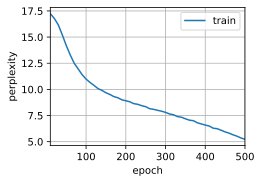

In [35]:
# 训练
import math 


def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """训练网络一个迭代周期（定义见第8章）"""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # 训练损失之和,词元数量
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # 在第一次迭代或使用随机抽样时初始化state
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                # state对于nn.GRU是个张量
                state.detach_()
            else:
                # state对于nn.LSTM或对于我们从零开始实现的模型是个张量,
                # 对于nn.LSTM, state是个元组, state=(h, c)
                for s in state:
                    s.detach_()
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        l = loss(y_hat, y.long()).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # 因为已经调用了mean函数
            updater(batch_size=1)
            
        metric.add(l * y.numel(), y.numel())

    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()


#@save
def train_ch8(net, train_iter, vocab, lr, num_epochs, device,
              use_random_iter=False):
    """训练模型（定义见第8章）"""
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[10, num_epochs])
    # 初始化
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab, device)
    # 训练和预测
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller'))
            animator.add(epoch + 1, [ppl])
    print(f'困惑度 {ppl:.1f}, {speed:.1f} 词元/秒 {str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))


# 加载数据
batch_size, num_steps = 32, 35
# train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
train_iter, vocab = load_data_time_machine(batch_size, num_steps)

num_epochs, lr = 500, 0.1
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu())

#### 11.3.1.5. <a id='toc11_3_1_5_'></a>[深层RNN](#toc0_)
* 有多个隐藏层
* 深层神经网络，默认是1层
* 所以hiddens的形状是(num_layers, batch_size, num_hiddens)

In [36]:
from torch import nn 


batch_size, num_steps, vocab_size = 2, 5, 1

num_layers, num_hiddens = 2, 512


rnn_layer = nn.RNN(
    input_size=vocab_size,            # 输入特征的维度
    hidden_size=num_hiddens,           # 隐藏层大小
    bidirectional=False,     # 双向神经网络，默认是单向
    num_layers=num_layers,             # 深层神经网络，默认是1层
    batch_first=True
)


# dir(rnn_layer)      # 查看属性
# help(rnn_layer)   # 查看方法

# 输入
# input: (batch_size, num_steps, vocab_size)
input = torch.randn(size=(batch_size, num_steps, vocab_size))

# Initial state 
# (num_layers, batch_size, num_hiddens)
state = torch.zeros(size=(num_layers, batch_size, num_hiddens))

# output: (num_steps, batch_size, num_hiddens)
# new_state: (num_layers, batch_size, num_hiddens)
y, new_state = rnn_layer(input, state)

y.shape, new_state.shape

(torch.Size([2, 5, 512]), torch.Size([2, 2, 512]))

#### 11.3.1.6. <a id='toc11_3_1_6_'></a>[双向RNN](#toc0_)
* 双向（其实就是将输入倒过来再输入）
* 不能用双向循环神经网络来预测未来，因为从一开始就透露未来的信息。
* 那实际引用场景是什么？
    * 翻译
    * 文本句子分类
* 双向神经网络，所以是2倍
* 所以hiddens的形状是(num_layers*2, batch_size, num_hiddens)

In [37]:
from torch import nn 


batch_size, num_steps, vocab_size = 2, 5, 1

num_layers, num_hiddens = 2, 512

rnn_layer = nn.RNN(
    input_size = vocab_size,            # 输入特征维度
    hidden_size = num_hiddens,           # 隐藏层大小
    bidirectional = True,     # 双向神经网络，默认是单向
    num_layers = num_layers,             # 深层神经网络，默认是1层 
    batch_first = True
)

# dir(rnn_layer)      # 查看属性
# help(rnn_layer)   # 查看方法

# input: (batch_size, num_steps, vocab_size)
input = torch.zeros(size=(batch_size, num_steps, vocab_size))

# Initial state
# 双向神经网络，所以是2倍
# (num_layers*2, batch_size, num_hiddens)
state = torch.zeros(size=(num_layers*2, batch_size, num_hiddens))

# output: (num_steps, batch_size, num_hiddens*2)
# new_state: (num_layers*2, batch_size, num_hiddens)
y, new_state = rnn_layer(input, state)

y.shape, new_state.shape

(torch.Size([2, 5, 1024]), torch.Size([4, 2, 512]))

### 11.3.2. <a id='toc11_3_2_'></a>[GRU](#toc0_)
* GRU实际晚于LSTM，但是作用效果相当而更容易理解

#### 11.3.2.1. <a id='toc11_3_2_1_'></a>[从头实现](#toc0_)

#### 11.3.2.2. <a id='toc11_3_2_2_'></a>[简洁实现](#toc0_)

In [38]:
from torch import nn 


batch_size, num_steps, vocab_size = 2, 5, 1

num_layers, num_hiddens = 2, 512 


gru_layer = nn.GRU(
    input_size = vocab_size, 
    hidden_size = num_hiddens, 
    num_layers =  num_layers, 
    bidirectional = False,
    batch_first = True
)

# input     
# input: (batch_size, num_steps, vocab_size)
input = torch.zeros(size=(batch_size, num_steps, vocab_size))

# Initial state 
# (num_layers, batch_size, num_hiddens)
state = torch.zeros(size=(num_layers, batch_size, num_hiddens))

# output: (num_steps, batch_size, num_hiddens)
# new_state: (num_layers, batch_size, num_hiddens)
y, new_state = gru_layer(input, state)

y.shape, new_state.shape

(torch.Size([2, 5, 512]), torch.Size([2, 2, 512]))

### 11.3.3. <a id='toc11_3_3_'></a>[LSTM](#toc0_)

#### 11.3.3.1. <a id='toc11_3_3_1_'></a>[从头实现](#toc0_)

#### 11.3.3.2. <a id='toc11_3_3_2_'></a>[简洁实现](#toc0_)

In [39]:
from torch import nn 
from torch.nn import functional as F


batch_size, num_steps, vocab_size = 2, 5, 1

num_layers, num_hiddens = 2, 512


lstm_layer = nn.LSTM(
    input_size = vocab_size,  # 输入特征维度  
    hidden_size = num_hiddens, 
    num_layers = num_layers, 
    bidirectional = False,
    batch_first = True
)


# input
# input: (batch_size, num_steps, vocab_size)
input = torch.zeros(size=(batch_size, num_steps, vocab_size))

# Initial state 
# hidden_state 和 cell_state 
# (num_layers, batch_size, num_hiddens)
hidden_state = torch.zeros(size=(num_layers, batch_size, num_hiddens))
cell_state = torch.zeros(size=(num_layers, batch_size, num_hiddens))

# output: (num_steps, batch_size, num_hiddens)
# new_state: (num_layers, batch_size, num_hiddens)
y, new_state = lstm_layer(input, (hidden_state, cell_state))

y.shape, new_state[0].shape, new_state[1].shape

(torch.Size([2, 5, 512]), torch.Size([2, 2, 512]), torch.Size([2, 2, 512]))

### 11.3.4. <a id='toc11_3_4_'></a>[Encoder-Decoder框架](#toc0_)
Encoder-Decoder 架构是一种用于序列到序列（Seq2Seq）任务的常用结构，广泛应用于机器翻译、文本摘要、图像标注等任务。

Encoder: 编码器将输入序列 𝑋=(𝑥1,𝑥2,...,𝑥𝑛) 转换为固定长度的上下文向量 𝐶 或一系列隐状态。

Decoder: 解码器接收上下文向量 𝐶 和自身的历史输出，生成目标序列 𝑌=(𝑦1,𝑦2,...,𝑦𝑚)。

一般来说，Encoder 和 Decoder 都基于 RNN、GRU、LSTM 或 Transformer。

```shell
输入-Encoder-中间状态-Decoder-输出
                       输入
```

#### 11.3.4.1. <a id='toc11_3_4_1_'></a>[Encoder部分](#toc0_)
编码器（Encoder）：将输入序列转换为一个固定长度的上下文向量（或一系列上下文向量）。
```shell
可变长度的输入，固定长度的输出中间状态
```

In [40]:
from torch import nn 


#@save
class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

#### 11.3.4.2. <a id='toc11_3_4_2_'></a>[Decoder部分](#toc0_)
解码器（Decoder）：根据上下文向量生成目标序列。
```shell
固定长度中间状态
```

In [41]:
#@save
class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接口"""
    
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        raise NotImplementedError

    def forward(self, X, state):
        raise NotImplementedError

#### 11.3.4.3. <a id='toc11_3_4_3_'></a>[Encoder-Decoder（合并编码器和解码器）](#toc0_)
```shell
Encoder-Decoder
```

In [42]:
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

## 11.4. <a id='toc11_4_'></a>[seq2seq (Sequence to sequence learning)](#toc0_)
Seq2Seq 模型最早由 Google 提出，用于机器翻译任务。其核心思想是使用两个递归神经网络（RNN）组成的架构：一个编码器（Encoder）将输入序列编码成上下文向量，另一个解码器（Decoder）根据该上下文向量生成输出序列。近年来，随着注意力机制（Attention）的引入，Seq2Seq 模型在各类序列转换任务中表现出了更强的性能。
```shell
基于RNN的编码器-解码器框架(Encoder-Decoder)
```


### 11.4.1. <a id='toc11_4_1_'></a>[机器翻译与数据集](#toc0_)
机器翻译的数据集是由源语言和目标语言的文本序列对组成的，不是单个文本序列。

#### 11.4.1.1. <a id='toc11_4_1_1_'></a>[下载和预处理数据集](#toc0_)

In [43]:
import os
from d2l import torch as d2l


#@save
d2l.DATA_HUB['fra-eng'] = (d2l.DATA_URL + 'fra-eng.zip', '94646ad1522d915e7b0f9296181140edcf86a4f5')

#@save
def read_data_nmt():    
    """载入“英语－法语”数据集"""
    data_dir = d2l.download_extract('fra-eng')
    with open(os.path.join(data_dir, 'fra.txt'), 'r', encoding='utf-8') as f:
        return f.read()


raw_text = read_data_nmt()
# raw_text[:100]
for line_num, content in enumerate(raw_text.split('\n')):
    if line_num < 10:
        print(f'{line_num} : {content}')
    else:
        break

0 : Go.	Va !
1 : Hi.	Salut !
2 : Run!	Cours !
3 : Run!	Courez !
4 : Who?	Qui ?
5 : Wow!	Ça alors !
6 : Fire!	Au feu !
7 : Help!	À l'aide !
8 : Jump.	Saute.
9 : Stop!	Ça suffit !


In [44]:
'''
下载数据集后，原始文本数据需要经过几个预处理步骤。
例如，我们用空格代替不间断空格（non‐breaking space），
使用小写字母替换大写字母，并在单词和标点符号之间插入空格。
'''
#@tab all
#@save
def preprocess_nmt(text):
    """Preprocess the English-French dataset."""
    def no_space(char, prev_char):
        return char in set(',.!?') and prev_char != ' '

    # Replace non-breaking space with space, and convert uppercase letters to
    # lowercase ones
    text = text.replace('\u202f', ' ').replace('\xa0', ' ').lower()
    # Insert space between words and punctuation marks
    out = [' ' + char if i > 0 and no_space(char, text[i - 1]) else char for i, char in enumerate(text)]
    return ''.join(out)

text = preprocess_nmt(raw_text)

for line_num, content in enumerate(text.split('\n')):
    if line_num < 10:
        print(f'{line_num} : {content}')
    else:
        break   

0 : go .	va !
1 : hi .	salut !
2 : run !	cours !
3 : run !	courez !
4 : who ?	qui ?
5 : wow !	ça alors !
6 : fire !	au feu !
7 : help !	à l'aide !
8 : jump .	saute .
9 : stop !	ça suffit !


#### 11.4.1.2. <a id='toc11_4_1_2_'></a>[词元化](#toc0_)
在机器翻译中，我们更喜欢单词级词元化（最先进的模型可能使用更高级的词元化技术。

In [45]:
'''
此函数返回两个词元列表,source和target：
source[i]是源语言（这里是英语）第i个文本序列的词元列表，
target[i]是目标语言（这里是法语）第i个文本序列的词元列表。
'''
#@tab all
#@save
def tokenize_nmt(text, num_examples=None):
    """Tokenize the English-French dataset."""
    
    # 源语言和目标语言的词元列表
    source, target = [], []
    for i, line in enumerate(text.split('\n')):
        if num_examples and i > num_examples:
            break
        parts = line.split('\t')
        if len(parts) == 2:
            source.append(parts[0].split(' '))
            target.append(parts[1].split(' '))
    return source, target


source, target = tokenize_nmt(text)
# source[:6], target[:6]
for line_num, (src, tgt) in enumerate(zip(source, target)):
    if line_num < 10:
        print(f'{line_num} : {src}, {tgt}')
    else:
        break

0 : ['go', '.'], ['va', '!']
1 : ['hi', '.'], ['salut', '!']
2 : ['run', '!'], ['cours', '!']
3 : ['run', '!'], ['courez', '!']
4 : ['who', '?'], ['qui', '?']
5 : ['wow', '!'], ['ça', 'alors', '!']
6 : ['fire', '!'], ['au', 'feu', '!']
7 : ['help', '!'], ['à', "l'aide", '!']
8 : ['jump', '.'], ['saute', '.']
9 : ['stop', '!'], ['ça', 'suffit', '!']


#### 11.4.1.3. <a id='toc11_4_1_3_'></a>[词表](#toc0_)
为`source`和`target`分别构建词表。

In [46]:
#@tab all
src_vocab = d2l.Vocab(source, min_freq=2, reserved_tokens=['<pad>', '<bos>', '<eos>'])

print(len(src_vocab))

10012


In [47]:
src_vocab['unk'], src_vocab['<pad>'], src_vocab['<bos>'], src_vocab['<eos>']

(0, 1, 2, 3)

In [48]:
src_vocab.token_to_idx  # dict

{'<unk>': 0,
 '<pad>': 1,
 '<bos>': 2,
 '<eos>': 3,
 '.': 4,
 'i': 5,
 'you': 6,
 'to': 7,
 'the': 8,
 '?': 9,
 'a': 10,
 'is': 11,
 'tom': 12,
 'that': 13,
 'he': 14,
 'do': 15,
 'of': 16,
 'it': 17,
 'this': 18,
 'in': 19,
 'me': 20,
 'have': 21,
 "don't": 22,
 ',': 23,
 'was': 24,
 'my': 25,
 'are': 26,
 'for': 27,
 'your': 28,
 'what': 29,
 "i'm": 30,
 'we': 31,
 'be': 32,
 'want': 33,
 'she': 34,
 'not': 35,
 'know': 36,
 'like': 37,
 'on': 38,
 'with': 39,
 'can': 40,
 'his': 41,
 'all': 42,
 'did': 43,
 'at': 44,
 "you're": 45,
 'how': 46,
 'go': 47,
 'they': 48,
 'him': 49,
 'think': 50,
 'and': 51,
 "it's": 52,
 'about': 53,
 'time': 54,
 "can't": 55,
 'here': 56,
 'very': 57,
 "didn't": 58,
 'get': 59,
 'there': 60,
 'her': 61,
 'were': 62,
 'as': 63,
 'will': 64,
 'had': 65,
 'if': 66,
 'why': 67,
 'just': 68,
 'up': 69,
 'out': 70,
 'no': 71,
 'has': 72,
 'one': 73,
 'going': 74,
 'would': 75,
 'so': 76,
 'good': 77,
 'need': 78,
 'tell': 79,
 'an': 80,
 'see': 81,
 "i'll":

In [49]:
src_vocab.idx_to_token  # list

['<unk>',
 '<pad>',
 '<bos>',
 '<eos>',
 '.',
 'i',
 'you',
 'to',
 'the',
 '?',
 'a',
 'is',
 'tom',
 'that',
 'he',
 'do',
 'of',
 'it',
 'this',
 'in',
 'me',
 'have',
 "don't",
 ',',
 'was',
 'my',
 'are',
 'for',
 'your',
 'what',
 "i'm",
 'we',
 'be',
 'want',
 'she',
 'not',
 'know',
 'like',
 'on',
 'with',
 'can',
 'his',
 'all',
 'did',
 'at',
 "you're",
 'how',
 'go',
 'they',
 'him',
 'think',
 'and',
 "it's",
 'about',
 'time',
 "can't",
 'here',
 'very',
 "didn't",
 'get',
 'there',
 'her',
 'were',
 'as',
 'will',
 'had',
 'if',
 'why',
 'just',
 'up',
 'out',
 'no',
 'has',
 'one',
 'going',
 'would',
 'so',
 'good',
 'need',
 'tell',
 'an',
 'see',
 "i'll",
 'come',
 'when',
 'from',
 'by',
 'really',
 'mary',
 'help',
 'who',
 'please',
 'us',
 "that's",
 'should',
 'could',
 'been',
 "i've",
 'never',
 'more',
 'now',
 'where',
 'take',
 'something',
 'got',
 'too',
 'than',
 'much',
 'make',
 'some',
 "i'd",
 "we're",
 'right',
 'but',
 'work',
 'am',
 'money',
 'an

#### 11.4.1.4. <a id='toc11_4_1_4_'></a>[截断和填充](#toc0_)
truncation和padding

In [50]:
#@tab all
#@save
def truncate_pad(line, num_steps, padding_token):
    """Truncate or pad sequences."""
    if len(line) > num_steps:
        return line[:num_steps]                                     # Truncate
    else:
        return line + [padding_token] * (num_steps - len(line))     # Pad

truncate_pad(line=src_vocab[source[0]], num_steps=10, padding_token=src_vocab['<pad>'])      # return list

[47, 4, 1, 1, 1, 1, 1, 1, 1, 1]

In [51]:
'''
现在我们定义一个函数，可以将文本序列转换成小批量数据集用于训练。
我们将特定的“<eos>”词元添加到所有序列的末尾，用于表示序列的结束。
当模型通过一个词元接一个词元地生成序列进行预测时，生成的“<eos>”词元说明完成了序列输出工作。
此外，我们还记录了每个文本序列的长度，统计长度时排除了填充词元，在稍后将要介绍的一些模型会需要这个长度信息。
'''
#@tab all
#@save
def build_array_nmt(lines, vocab, num_steps):
    """Transform text sequences of machine translation into minibatches."""
    
    lines = [vocab[l] for l in lines]
    lines = [l + [vocab['<eos>']] for l in lines]
    array = torch.tensor([truncate_pad(l, num_steps, vocab['<pad>']) for l in lines])
    # 计算每个序列中非填充 <pad> 标记的数量，得到每个序列的有效长度。
    # array != vocab['<pad>']：创建一个布尔张量，标识哪些位置不是填充标记。
    # d2l.astype(..., d2l.int32)：将布尔值转换为整数类型（1 和 0）。
    # d2l.reduce_sum(..., 1)：沿着序列长度的维度求和，得到每个序列的有效长度。
    valid_len = d2l.reduce_sum(d2l.astype(array != vocab['<pad>'], torch.int32), 1)
    
    return array, valid_len

In [52]:
src_vocab['<pad>']

1

#### 11.4.1.5. <a id='toc11_4_1_5_'></a>[集合](#toc0_)

In [53]:
import torch


#@tab all
#@save
def load_data_nmt(batch_size, num_steps, num_examples=600):
    """Return the iterator and the vocabularies of the translation dataset."""

    text = preprocess_nmt(read_data_nmt())
    source, target = tokenize_nmt(text, num_examples)

    src_vocab = d2l.Vocab(source, min_freq=2, reserved_tokens=['<pad>', '<bos>', '<eos>'])
    tgt_vocab = d2l.Vocab(target, min_freq=2, reserved_tokens=['<pad>', '<bos>', '<eos>'])

    src_array, src_valid_len = build_array_nmt(source, src_vocab, num_steps)
    tgt_array, tgt_valid_len = build_array_nmt(target, tgt_vocab, num_steps)
    
    # 数据集顺序：源语言序列、源语言序列有效长度、目标语言序列、目标语言序列有效长度
    data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)      
    data_iter = d2l.load_array(data_arrays, batch_size)
    
    return data_iter, src_vocab, tgt_vocab


#@tab all
train_iter, src_vocab, tgt_vocab = load_data_nmt(batch_size=2, num_steps=8)

for X, X_valid_len, Y, Y_valid_len in train_iter:
    print('X:', d2l.astype(X, torch.int32))
    print('valid lengths for X:', X_valid_len)
    print('Y:', d2l.astype(Y, torch.int32))
    print('valid lengths for Y:', Y_valid_len)
    break

X: tensor([[ 7, 84,  4,  3,  1,  1,  1,  1],
        [90, 19,  4,  3,  1,  1,  1,  1]], dtype=torch.int32)
valid lengths for X: tensor([4, 4])
Y: tensor([[ 0, 16, 17,  4,  3,  1,  1,  1],
        [ 0, 12,  5,  3,  1,  1,  1,  1]], dtype=torch.int32)
valid lengths for Y: tensor([5, 4])


In [54]:
src_vocab['<pad>'], tgt_vocab['<pad>']  # 用1填充

(1, 1)

### 11.4.2. <a id='toc11_4_2_'></a>[编码器-解码器架构](#toc0_)
机器翻译是序列转换模型的一个核心问题，其输入和输出都是长度可变的序列。为了处理这种类型的输入和输出，我们可以设计一个包含两个主要组件的架构：  
  * 第一个组件是一个编码器（encoder）：它接受一个`长度可变的序列作为输入`，并将其转换为具有`固定形状的编码状态`。
  * 第二个组件是解码器（decoder）：它将`固定形状的编码状态`映射到`长度可变的输出序列`。

我们以英语到法语的机器翻译为例：给定一个英文的输入序列：“They”“are”“watching”“.”。首先，这种“编码器－解码器”架构将长度可变的输入序列编码成一个“状态”，然后对该状态进行解码，一个词元接着一个词元地生成翻译后的序列作为输出：“Ils”“regordent”“.”

In [55]:
'''
编码器
'''
from torch import nn 


class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

In [56]:
'''
解码器
'''
from torch import nn 


class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接口"""
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        '''我们新增一个init_state函数，用于将编码器的输出（enc_outputs）转换为编码后的状态。注意，此步骤可能需要额外的输入，例如：输入序列的有效长度'''
        raise NotImplementedError

    def forward(self, X, state):
        raise NotImplementedError

In [57]:
'''
编码器-解码器架构
'''
from torch import nn 


class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder 

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

### 11.4.3. <a id='toc11_4_3_'></a>[序列到序列学习](#toc0_)
我们将使用两个循环神经网络的编码器和解码器，并将其应用于序列到序列（sequencetosequence，seq2seq）类的学习任务.

![序列到序列学习](./Pytorch_Pictures/seq2seq/seq2seq_learning.jpg)

In [58]:
from torch import nn 
import torch


class Seq2SeqEncoder(nn.Module):
    '''编码器'''

    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers, dropout=0, **kwargs):
        super().__init__(**kwargs)
        # 嵌入层
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(input_size=embed_size, hidden_size=num_hiddens, num_layers=num_layers, dropout=dropout)

    def forward(self, X, *args):
        # X 的形状：(batch_size, num_steps, embed_size)
        X = self.embedding(X)
        # 在循环神经网络模型中，第一个时间步的输入需要使用形状为(num_layers, batch_size, num_hiddens)的初始化隐藏状态
        X = X.permute(1, 0, 2)
        # 如果未提及初始化隐藏状态，则默认为0
        output, state = self.rnn(X)
        # output的形状:(num_steps, batch_size, num_hiddens)
        # state的形状:(num_layers, batch_size, num_hiddens)，num_steps的最后一个时刻的hidden state
        return output, state
        

# Test
encoder = Seq2SeqEncoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2, dropout=0)
encoder.eval()

batch_size = 4
num_steps = 7

# 输入：(batch_size, num_steps)
X = torch.ones(size=(batch_size, num_steps), dtype=torch.long)

# output: (num_steps, batch_size, num_hiddens)
# state: (num_layers, batch_size, num_hiddens)
output, state = encoder(X)

X.shape, output.shape, state.shape

(torch.Size([4, 7]), torch.Size([7, 4, 16]), torch.Size([2, 4, 16]))

In [59]:
from torch import nn 
import torch 


class Seq2SeqDecoder(nn.Module):
    '''解码器'''

    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers, dropout=0, **kwargs):
        super().__init__(**kwargs)
        self.embedding = nn.Embedding(vocab_size, embed_size)
        # 将enc_outputs的hidden state的最后一层与dec_x拼接起来
        self.rnn = nn.GRU(input_size=embed_size + num_hiddens, hidden_size=num_hiddens, num_layers=num_layers, dropout=dropout)
        self.dense = nn.Linear(in_features=num_hiddens, out_features=vocab_size)

    def init_state(self, enc_outputs, *args):
        return enc_outputs[1]

    def forward(self, X, state):
        # 输入的X形状：(batch_size, num_steps)
        # 经过embedding后，X的形状：(batch_size, num_steps, embed_size)
        # 输出'X'的形状：(num_steps, batch_size, embed_size)
        X = self.embedding(X).permute(1, 0, 2)

        # state: (num_layers, batch_size, num_hiddens)  
        # state[-1]: hidden state最后一层的hidden state，形状：(batch_size, num_hiddens)
        # state[-1].repeat(X.shape[0], 1, 1)，形状：(num_steps, batch_size, num_hiddens)
        # 广播context，使其具有与X相同的num_steps
        context = state[-1].repeat(X.shape[0], 1, 1)
        # 将X和context在最后一维上连接
        # X: (num_steps, batch_size, embed_size) + context: (num_steps, batch_size, num_hiddens) = (num_steps, batch_size, embed_size + num_hiddens)
        X_and_context = torch.cat((X, context), dim=2)
        # 通过时间步展开
        output, state = self.rnn(X_and_context, state)
        output = self.dense(output).permute(1, 0, 2)
        # output的形状:(batch_size, num_steps, vocab_size)
        # state的形状:(num_layers, batch_size, num_hiddens)
        return output, state


decoder = Seq2SeqDecoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2, dropout=0)
decoder.eval()

batch_size = 4
num_steps = 7

# 输入：(batch_size, num_steps)
X = torch.zeros(size=(batch_size, num_steps), dtype=torch.long)

# state: (num_layers, batch_size, num_hiddens)
state = decoder.init_state(encoder(X))
print(f'encoder_out state: {state.shape}')
print(f'encoder_out state[-1]: {state[-1].shape}')
print(f'encoder_out state[-1].repeat(X.shape[0], 1, 1): {state[-1].repeat(num_steps, 1, 1).shape}')

# output: (batch_size, num_steps, num_hiddens), 经过permute转置后的结果
# state: (num_layers, batch_size, num_hiddens)
output, state = decoder(X, state)

X.shape, output.shape, state.shape

encoder_out state: torch.Size([2, 4, 16])
encoder_out state[-1]: torch.Size([4, 16])
encoder_out state[-1].repeat(X.shape[0], 1, 1): torch.Size([7, 4, 16])


(torch.Size([4, 7]), torch.Size([4, 7, 10]), torch.Size([2, 4, 16]))

### 11.4.4. <a id='toc11_4_4_'></a>[损失函数](#toc0_)

#### 11.4.4.1. <a id='toc11_4_4_1_'></a>[掩码](#toc0_)

In [68]:
x = torch.tensor([1, 2, 3])

# [:, None] 和 [None, :] 是用于在张量的维度上添加一个新的维度，以便进行广播操作。
# 在二维张量中，[:, None] 表示在列维度上添加一个维度，[None, :] 表示在行维度上添加一个维度。
x1 = x[:, None]
x2 = x[None, :]

print(x, x.shape, sep='\n')
print(x1, x1.shape, sep='\n')
print(x2, x2.shape, sep='\n')

tensor([1, 2, 3])
torch.Size([3])
tensor([[1],
        [2],
        [3]])
torch.Size([3, 1])
tensor([[1, 2, 3]])
torch.Size([1, 3])


In [69]:
# tokenize
X = [['a', 'b', 'c', 'pad', 'pad'],
     ['d', 'e', 'f', 'g', 'h'], 
     ['i', 'j', 'pad', 'pad', 'pad']]

# corpus
X = [[1, 2, 3, 0, 0], 
     [4, 5, 6, 7, 8], 
     [9, 10, 0, 0, 0]]

X = torch.tensor(X)

# mask
mask = [[True, True, True, False, False], 
        [True, True, True, True, True], 
        [True, True, False, False, False]]

mask = torch.tensor(mask)

# ~表示取反操作
X[~mask] = -1

X

tensor([[ 1,  2,  3, -1, -1],
        [ 4,  5,  6,  7,  8],
        [ 9, 10, -1, -1, -1]])

In [70]:
def sequence_mask(X, valid_len, value=0):
    '''
    为序列生成掩码，将无效/填充位置的值替换为指定值
    '''

    maxlen = X.size(1)

    # 作用：生成一个布尔掩码，用于标识每个序列中有效的时间步。
    # [None, :] 和 [:, None]：通过添加新的维度，将一维张量扩展为二维，以便进行广播操作
    # < valid_len[:, None]：比较操作，将生成一个布尔张量，当位置索引小于 valid_len 时为 True，否则为 False。valid_len 是一个包含每个序列实际长度的张量。
    mask = torch.arange(maxlen, dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
    
    # 将无效位置的值替换为指定值
    # ~mask：取反，将无效位置的值替换为指定值
    X[~mask] = value 

    return X 


# tokens with padding
X = torch.tensor([[1, -1, -1], 
                  [4, 5, -1]])

# tokens 有效长度
valid_len = torch.tensor([1, 2])

# 输出：(batch_size, num_steps)
X, sequence_mask(X=X, valid_len=valid_len, value=0)

(tensor([[1, 0, 0],
         [4, 5, 0]]),
 tensor([[1, 0, 0],
         [4, 5, 0]]))

In [71]:
# tokens with padding
X = torch.ones(size=(2, 3, 4))

X, sequence_mask(X=X, valid_len=torch.tensor([1, 2]), value=0)

(tensor([[[1., 1., 1., 1.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [0., 0., 0., 0.]]]),
 tensor([[[1., 1., 1., 1.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [0., 0., 0., 0.]]]))

#### 11.4.4.2. <a id='toc11_4_4_2_'></a>[带掩码的softmax交叉熵损失](#toc0_)
我们可以通过扩展softmax交叉熵损失函数来遮蔽不相关的预测。最初，所有预测词元的掩码都设置为1。一旦给定了有效长度，与填充词元对应的掩码将被设置为0。最后，将所有词元的损失乘以掩码，以过滤掉损失中填充词元产生的不相关预测。

In [72]:
from torch import nn 


#@tab pytorch
#@save
class MaskedSoftmaxCELoss(nn.CrossEntropyLoss):
    """The softmax cross-entropy loss with masks."""
    # `pred` shape: (`batch_size`, `num_steps`, `vocab_size`)
    # `label` shape: (`batch_size`, `num_steps`)
    # `valid_len` shape: (`batch_size`,)
    def forward(self, pred, label, valid_len):
        weights = torch.ones_like(label)
        weights = sequence_mask(weights, valid_len)
        self.reduction='none'
        unweighted_loss = super(MaskedSoftmaxCELoss, self).forward(pred.permute(0, 2, 1), label)
        # 将损失乘以掩码，以过滤掉损失中填充词元产生的不相关预测 (0乘以任何数为0，达到过滤的作用)   
        weighted_loss = (unweighted_loss * weights).mean(dim=1)
        return weighted_loss
    

loss = MaskedSoftmaxCELoss()

loss(
    pred = torch.ones(size=(3, 4, 10)), 
    label = torch.ones(size=(3, 4), dtype=torch.long), 
    valid_len = torch.tensor([4, 2, 0])
)


tensor([2.3026, 1.1513, 0.0000])

### 11.4.5. <a id='toc11_4_5_'></a>[训练](#toc0_)

loss 0.019, 10052.5 tokens/sec on cuda:0


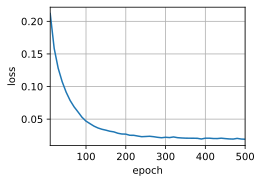

In [73]:
#@tab pytorch
#@save
def train_seq2seq(net, data_iter, lr, num_epochs, tgt_vocab, device):
    """Train a model for sequence to sequence."""
    def xavier_init_weights(m):
        if type(m) == nn.Linear:
            nn.init.xavier_uniform_(m.weight)                       # 对于每个线性层 nn.Linear，应用 xavier_uniform_ 初始化。
        if type(m) == nn.GRU:
            for param in m._flat_weights_names:
                if "weight" in param:
                    nn.init.xavier_uniform_(m._parameters[param])   # 模型中的线性层和GRU层应用Xavier均匀初始化，以确保权重在训练开始时处于合适的范围，促进梯度流动。
    
    net.apply(xavier_init_weights)
    net.to(device)

    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = MaskedSoftmaxCELoss()                                    # 使用带掩码的Softmax交叉熵损失 MaskedSoftmaxCELoss，适用于序列到序列任务，可以处理不同长度的序列。
    net.train()
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[10, num_epochs])

    for epoch in range(num_epochs):
        timer = d2l.Timer()
        metric = d2l.Accumulator(2)  # Sum of training loss, no. of tokens
        for batch in data_iter:
            X, X_valid_len, Y, Y_valid_len = [x.to(device) for x in batch]
            # 为每个目标序列添加开始符 <bos>，并去除原序列的最后一个标记，以实现教师强制（Teacher Forcing），即使用真实的目标标记作为下一个时间步的输入。
            # Y: (batch_size, num_steps)
            bos = torch.tensor([tgt_vocab['<bos>']] * Y.shape[0], device=device).reshape(-1, 1)
            dec_input = d2l.concat([bos, Y[:, :-1]], dim=1)  # Teacher forcing
            Y_hat, _ = net(X, dec_input, X_valid_len)   # X_valid_len没有被用上？
            # Y_hat, _ = net(X, dec_input)
            l = loss(Y_hat, Y, Y_valid_len)
            l.sum().backward()  # Make the loss scalar for `backward`
            d2l.grad_clipping(net, 1)
            num_tokens = Y_valid_len.sum()
            optimizer.step()
            with torch.no_grad():
                metric.add(l.sum(), num_tokens)

        if (epoch + 1) % 10 == 0:
            animator.add(epoch + 1, (metric[0] / metric[1],))
    print(f'loss {metric[0] / metric[1]:.3f}, {metric[1] / timer.stop():.1f} '
          f'tokens/sec on {str(device)}')
    

#@tab all
embed_size, num_hiddens, num_layers, dropout = 32, 32, 2, 0.1
batch_size, num_steps = 64, 10
lr, num_epochs, device = 0.005, 500, d2l.try_gpu()

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)
encoder = Seq2SeqEncoder(len(src_vocab), embed_size, num_hiddens, num_layers, dropout)
decoder = Seq2SeqDecoder(len(tgt_vocab), embed_size, num_hiddens, num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder)
train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

### 11.4.6. <a id='toc11_4_6_'></a>[预测](#toc0_)

In [75]:
#@tab pytorch
#@save
def predict_seq2seq(net, src_sentence, src_vocab, tgt_vocab, num_steps, device, save_attention_weights=False):
    """Predict for sequence to sequence."""
    # Set `net` to eval mode for inference
    net.eval()
    src_tokens = src_vocab[src_sentence.lower().split(' ')] + [src_vocab['<eos>']]
    enc_valid_len = torch.tensor([len(src_tokens)], device=device)
    src_tokens = d2l.truncate_pad(src_tokens, num_steps, src_vocab['<pad>'])
    # Add the batch axis
    enc_X = torch.unsqueeze(torch.tensor(src_tokens, dtype=torch.long, device=device), dim=0)
    enc_outputs = net.encoder(enc_X, enc_valid_len)
    dec_state = net.decoder.init_state(enc_outputs, enc_valid_len)
    # Add the batch axis
    dec_X = torch.unsqueeze(torch.tensor([tgt_vocab['<bos>']], dtype=torch.long, device=device), dim=0)
    output_seq, attention_weight_seq = [], []
    for _ in range(num_steps):
        Y, dec_state = net.decoder(dec_X, dec_state)
        # We use the token with the highest prediction likelihood as the input
        # of the decoder at the next time step
        dec_X = Y.argmax(dim=2)
        pred = dec_X.squeeze(dim=0).type(torch.int32).item()
        # Save attention weights (to be covered later)
        if save_attention_weights:
            attention_weight_seq.append(net.decoder.attention_weights)
        # Once the end-of-sequence token is predicted, the generation of the
        # output sequence is complete
        if pred == tgt_vocab['<eos>']:
            break
        output_seq.append(pred)
    return ' '.join(tgt_vocab.to_tokens(output_seq)), attention_weight_seq

In [76]:
#@tab all
def bleu(pred_seq, label_seq, k):  #@save
    """Compute the BLEU."""
    pred_tokens, label_tokens = pred_seq.split(' '), label_seq.split(' ')
    len_pred, len_label = len(pred_tokens), len(label_tokens)
    score = math.exp(min(0, 1 - len_label / len_pred))
    for n in range(1, k + 1):
        num_matches, label_subs = 0, collections.defaultdict(int)
        for i in range(len_label - n + 1):
            label_subs[''.join(label_tokens[i: i + n])] += 1
        for i in range(len_pred - n + 1):
            if label_subs[''.join(pred_tokens[i: i + n])] > 0:
                num_matches += 1
                label_subs[''.join(pred_tokens[i: i + n])] -= 1
        score *= math.pow(num_matches / (len_pred - n + 1), math.pow(0.5, n))
    return score

In [78]:
#@tab all
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']
for eng, fra in zip(engs, fras):
    translation, attention_weight_seq = predict_seq2seq(net, eng, src_vocab, tgt_vocab, num_steps, device)
    print(f'{eng} => {translation}, bleu {bleu(translation, fra, k=2):.3f}')

go . => va !, bleu 1.000
i lost . => j'ai tom <unk> ., bleu 0.000
he's calm . => il est riche ., bleu 0.658
i'm home . => je suis en retard ., bleu 0.548


## 11.5. <a id='toc11_5_'></a>[Attention](#toc0_)

- 不是一个新的概念，很早之前就已经出现，只是在Google发表论文[Attention is all you need](https://arxiv.org/abs/1706.03762)后，越来越知名； 
- 如果非要找一个依据，从心理学上讲： 
 
    1. 之前学习的神经网络（CNN、RNN等）都是提取特征->全连接网络，属于“非随意识注意力”-即非主观，如一排黑色咖啡杯中有一个红色的就会很吸引人；  
    2. Attention提出的是“随意识注意力”即主观的去注意那个物体，如喝完咖啡后想去找一本关于Attention方面的书去看。

        Query:人主动去查询（注意）  
        Key:  物体的属性  
        Value:  物体的属性  

- `说白了，注意力就是加权平均数，首先计算query与key的相似度，越相似就给越高的权重，最后用权重乘以value再求和，即得注意力值。`

<img src="./Pytorch_Pictures/Attention//Attention_principle.jpg" width = "700" height = "300" alt="图片名称" align=center />

### 11.5.1. <a id='toc11_5_1_'></a>[实例数据](#toc0_)

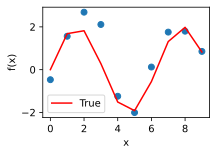

In [267]:
import matplotlib.pyplot as plt  
import torch 


def f(x):
    '''真实函数'''
    return 2 * torch.sin(x)


def f_noise(x):
    '''添加噪声'''
    return f(x) + torch.normal(mean=0, std=1, size=x.shape)


# 生成数据
x = torch.arange(start=0, end=10, step=1)
y = f_noise(x)

# 绘图
plt.figure(figsize=(3, 2))
plt.scatter(x, y)
plt.plot(x, f(x), color='red', linestyle='-', label='True')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

### 11.5.2. <a id='toc11_5_2_'></a>[无注意力的方式-如平均汇聚](#toc0_)
如直接就平均y值，得到的结果就是一条平滑的曲线，及所有数据的加权信息都一样。

其实就是注意力汇聚的平均值，即所有数据都一样。

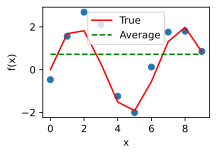

In [268]:
import matplotlib.pyplot as plt  
import torch 


def average_pooling(y):
    '''平均汇聚后再复制len(y)次'''
    # return torch.mean(y) * torch.ones_like(y)
    return torch.repeat_interleave(torch.mean(y),  len(y)) # repeat_interleave 重复元素


# 平均汇聚
y_avg = average_pooling(y)


# 绘图
plt.figure(figsize=(3, 2))
plt.scatter(x, y)
plt.plot(x, f(x), color='red', linestyle='-', label='True')
plt.plot(x, y_avg, color='green', linestyle='--', label='Average')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

### 11.5.3. <a id='toc11_5_3_'></a>[非参数注意力汇聚（Attention Pooling）-计算q和k相似度](#toc0_)
在以前，统计学家计算机用的不是很溜。用统计模型进行预测，而不是利用计算机的计算资源进行迭代优化逼近真实分布。所得的结果就是只是利用统计模型进行预测的曲线会比较平滑但是准确性不高，可能随着数据量的增高可以提高准确性，但是，现实中能有那么多够用的数据吗？而利用计算迭代优化逼近的方法可以很准确的拟合现有的数据，虽然不是很平滑，优点是数据虽少但可以被充分利用。

如Nadraya-Watson核回归，利用核函数计算x和x'的相似度，即权重，然后利用权重对y进行加权求和，得到最终的结果。


NW_PY: 0.03251147270202637 s, NW_PYT: 0.0012345314025878906 s, NW_PYT_B: 0.0010378360748291016 s


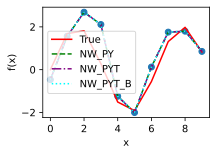

In [269]:
import matplotlib.pyplot as plt  
import torch 
import time


def Nadraya_Watson_kernel(x, y):
    '''用Python的for循环实现Nadraya-Watson核回归'''
    y_hat = []
    for x_i, y_i in zip(x, y):        
        div = 0 
        for i in x:
            div_term = 0
            for j in x:
                div_term += torch.exp(-0.5 * (x_i - j)** 2)
            div_up = torch.exp(-0.5 * (x_i - i) ** 2)
            div += (div_up / div_term) * y_i
        y_hat.append(div)
    return y_hat


def Nadraya_Watson_kernel_matrix(x, y):
    '''用Pytorch的矩阵（广播之后的）实现Nadraya-Watson核回归'''
    sub = x.unsqueeze(dim=1).repeat(1, len(x)) - x.repeat(len(x), 1)
    attention_scores = torch.exp(-0.5 * sub** 2)
    attention_weights = torch.nn.functional.softmax(attention_scores, dim=-1)
    attention_output = (attention_weights * y.unsqueeze(dim=1).repeat(1, len(x))).sum(dim=-1)
    return attention_output


def Nadraya_Watson_kernel_broadcast(x, y):
    '''用Pytorch的广播实现Nadraya-Watson核回归'''
    sub = x.unsqueeze(dim=1) - x.unsqueeze(dim=0)
    attention_scores = torch.exp(-0.5 * sub**2)
    attention_weights = torch.nn.functional.softmax(attention_scores, dim=-1)
    attention_output = (attention_weights * y.unsqueeze(dim=1)).sum(dim=-1)
    return attention_output


plt.figure(figsize=(3, 2))
plt.scatter(x, y)
plt.plot(x, f(x), color='red', linestyle='-', label='True')
t1 = time.time()
# 很慢
plt.plot(x, Nadraya_Watson_kernel(x, y), color='green', linestyle='--', label='NW_PY')
t2 = time.time()
# 展开后，速度快
plt.plot(x, Nadraya_Watson_kernel_matrix(x, y), color='purple', linestyle='-.', label='NW_PYT')
t3 = time.time()
# 广播后，速度更快
plt.plot(x, Nadraya_Watson_kernel_broadcast(x, y), color='cyan', linestyle=':', label='NW_PYT_B')
t4 = time.time()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

print(f'NW_PY: {t2 - t1} s, NW_PYT: {t3 - t2} s, NW_PYT_B: {t4 - t3} s')

### 11.5.4. <a id='toc11_5_4_'></a>[参数注意力汇聚（Attention Pooling）-计算q和k相似度](#toc0_)
加入可学习的参数w。

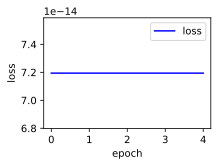

In [270]:
import torch 


class Nadraya_Watson_kernel_w(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.randn(size=(1,), requires_grad=True))

    def forward(self, x, y):
        sub = x.unsqueeze(dim=1) - x.unsqueeze(dim=0)
        attention_scores = torch.exp(-0.5 * (sub * self.w)** 2)
        attention_weights = torch.nn.functional.softmax(attention_scores, dim=-1)
        attention_output = (attention_weights * y.unsqueeze(dim=1)).sum(dim=-1)
        return attention_output


net = Nadraya_Watson_kernel_w()
loss_fn = torch.nn.MSELoss(reduction='none')
opt = torch.optim.SGD(net.parameters(), lr=0.001) 


epochs = 5
loss_list = []
for epoch in range(epochs):
    opt.zero_grad()
    y_hat = net(x, y)
    loss = loss_fn(y_hat, y).sum()
    loss.backward()
    opt.step()
    loss_list.append(loss.item())
    # print(f'epoch {epoch + 1}, loss {loss:.3f}')


plt.figure(figsize=(3, 2))
plt.plot(loss_list, color='blue', linestyle='-', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

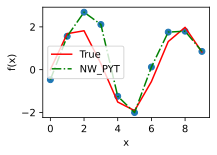

In [271]:
net.eval()
with torch.no_grad():
    plt.figure(figsize=(3, 2))
    plt.scatter(x, y)
    plt.plot(x, f(x), color='red', linestyle='-', label='True')
    plt.plot(x, net(x, y), color='green', linestyle='-.', label='NW_PYT')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

In [272]:
# 学习的参数w
net.w

Parameter containing:
tensor([-0.2220], requires_grad=True)

### 11.5.5. <a id='toc11_5_5_'></a>[注意力分数函数-计算q和k相似度](#toc0_)

<img src="./Pytorch_Pictures/Attention/Attention_score.jpg" width = "500" height = "300" alt="图片名称" align=center />

原理：
- 本质上`Attention机制是Source中元素的Value值进行加权求和，而Query和Key用来计算对应Value的权重系数`；
- 首先利用`注意力分数函数`计算`Query`和`Key`的`相似度 (注意力分数)`；
- 利用`softmax`计算相似度 (注意力分数)后，得到`加权数值` (`注意力权重`，query和key越相似该权重越大，即获取的注意力越大)；
- 利用注意力权重对value进行`加权求和`，即最终的`注意力值`。

解释：
  |注释|公式|
  |:-|:-|
  |注意力评分函数|$a(q, k)$|
  |注意力权重|$softmax( a(q, k) )$|
  |注意力|$softmax( a(q, k) ) * v$|

注意力评分函数：
  - `加性注意力 (Additive Attention)`
  - `缩放点积注意力 (Scaled Dot-Product Attention)`
  - 乘性注意力 (Multiplicative Attention)
  - 位置注意力 (Location-based Attention)
  - 线性注意力 (Linear Attention)
  - 自适应注意力 (Adaptive Attention)
  - 稀疏注意力 (Sparse Attention)

总结: 
 - 不同的注意力机制在计算注意力分数时采用了不同的方法，以适应不同的任务需求和计算资源。选择合适的注意力机制可以提高模型的性能和效率。随着研究的不断深入，新的注意力机制也在不断涌现，为各种应用场景提供了更多的选择。

#### 11.5.5.1. <a id='toc11_5_5_1_'></a>[加性注意力 (Additive Attention)-计算q、k相似度](#toc0_)
加性注意力最早由 Bahdanau 等人在 2014 年的论文中提出，通常用于序列到序列模型中。其核心思想是通过一个小型的前馈神经网络来计算注意力权重。
计算过程:
  - 对于给定的查询（query）和键（key），首先通过线性变换将它们`映射到相同的维度`。
  - 将映射后的查询和键`相加`，并通过一个激活函数（如 tanh）进行`非线性变换`。
  - 使用一个`可学习的参数向量`对变换后的结果进行`线性变换`，得到注意力得分。
  - 对所有注意力得分进行 softmax 操作，得到注意力权重。

公式：$\mathrm{score}(q,k)=v^T\cdot\mathrm{tanh}(W_qq+W_kk)$，其中，$W_q$和$W_k$是可学习的线性变换矩阵，$v$是可学习的参数向量。  
​
优点：
  - 能够处理不同维度的查询和键。
  - 适用于较小的序列长度。

缺点：
  - 计算复杂度较高，尤其在序列长度较大时。

---

动手学深度学习：
- 当`查询`和`键`是`不同长度`的`矢量`时，可以使用`加性注意力作为评分函数`。
- 注意力评分函数：$a(\mathbf{q},\mathbf{k})=\mathbf{w}_v^\top\tanh(\mathbf{W}_q\mathbf{q}+\mathbf{W}_k\mathbf{k})\in\mathbb{R}$
- $\mathbf{q}\in\mathbb{R}^q\text{和 键}\mathbf{k}\in\mathbb{R}^k,$
- $\mathbf{W}_q\in\mathbb{R}^{h\times q}\mathrm{、}\mathbf{W}_k\in\mathbb{R}^{h\times k}\text{和 }\mathbf{w}_v\in\mathbb{R}^h$, `投影`到`相同维度h`上
- `有可学习的参数`，效果会好一些。



<img src="./Pytorch_Pictures/Attention/Additive_attention.jpg" width = "800" height = "600"/>


- 使用:
```python
# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num, key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
            # query_size, key_size, value_size 可以不一样
    # Output:                           (batch_size, num_query, value_size)
```

---

- 参考案例-李沐
  - 带有掩码 (masked) 和Dropout

In [310]:
import torch
from torch import nn
from d2l import torch as d2l


def sequence_mask(X, valid_len, value=0):
    """
    为序列生成掩码，将无效/填充位置的值替换为指定值
    
    参数:
        X: 输入张量，形状为 (batch_size, seq_len, ...)
        valid_len: 每个序列的有效长度，形状为 (batch_size,)
        value: 用于替换无效位置的值，默认为0
        
    返回:
        掩码后的张量，形状与输入X相同
        
    实现步骤:
        1. 获取序列最大长度maxlen
        2. 生成掩码矩阵:
           - torch.arange生成[0,1,...,maxlen-1]
           - [None,:]增加batch维度变为(1,maxlen) 
           - valid_len[:,None]将(batch_size,)变为(batch_size,1)
           - 比较生成(batch_size,maxlen)的布尔掩码
        3. 将~mask位置(无效位置)的值替换为value
    """
    # 获取序列最大长度
    maxlen = X.size(1)
    
    # 生成掩码矩阵: (batch_size, maxlen)
    # 其中True表示有效位置,False表示无效位置

    ## 实现方式一：
    mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
    ## 实现方式二：
    # mask = torch.arange(maxlen, dtype=torch.float32, device=X.device).reshape(1, -1) < valid_len.reshape(-1, 1)
    
    # 将无效位置(~mask)替换为value，取反
    X[~mask] = value

    return X


#@save
def masked_softmax(X, valid_lens):
    """
    通过在最后一个轴上掩蔽元素来执行softmax操作     
    参数:
        X: 3D张量, shape为(batch_size, seq_len, feature_dim)
        valid_lens: 1D或2D张量,指定每个序列的有效长度
            - 1D时shape为(batch_size,),表示每个batch中所有序列的有效长度
            - 2D时shape为(batch_size, seq_len),可以为每个序列的每个位置指定不同的有效长度
    返回:
        经过masked softmax后的张量,shape与输入X相同
    """
    # 如果没有指定valid_lens,直接在最后一维上做softmax
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        # 如果valid_lens是1D
        if valid_lens.dim() == 1:
            ## 以dim=0方向按元素个数重复shape[1] (seq_len) 次, 
            ## e.g., [1, 2] -> [1, 1, 1, 2, 2, 2]
            valid_lens = torch.repeat_interleave(input=valid_lens, repeats=shape[1])
        else:
            # 如果是2D,按顺序将其展平为1D
            ## e.g., [[2, 3, 4], [3, 2, 1]] -> [2, 3, 4, 3, 2, 1]
            valid_lens = valid_lens.reshape(-1)
            
        # 使用sequence_mask生将超出有效长度的位置用一个很小的负值(-1e6)或者-inf替换,使其softmax后接近0
        ## X重塑为:(batch_size * seq_len, feature_dim)  
        X = sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=-1e6)

        # 重塑回原始形状并做softmax
        ## X: (batch_size, seq_len, feature_dim)
        output = nn.functional.softmax(X.reshape(shape), dim=-1)

        return output 


#@save
class AdditiveAttention(nn.Module):
    """加性注意力"""
    def __init__(self, key_size, query_size, num_hiddens, dropout, **kwargs):
        super().__init__(**kwargs)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=False)         # (key_size, num_hiddens)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=False)       # (query_size, num_hiddens)
        self.w_v = nn.Linear(num_hiddens, 1, bias=False)                # (num_hiddens, 1)

        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens=None):
        queries, keys = self.W_q(queries), self.W_k(keys)
        # queries:              (batch_size, num_query, num_hiddens)
        # keys:                 (batch_size, k_v_pair_num, num_hiddens)

        # 在维度扩展后，使用广播方式进行求和
        # queries的形状：       (batch_size，num_query，        1，        num_hiddens)
        # key的形状：           (batch_size，    1，    k_v_pair_num，  num_hiddens)
        # (batch_size, num_query, 1, num_hiddens) + (batch_size, 1, k_v_pair_num, num_hiddens) 
        # = (batch_size, num_query, k_v_pair_num, num_hiddens)
        features = queries.unsqueeze(2) + keys.unsqueeze(1)
        features = torch.tanh(features)
        # features的形状：(batch_size, num_query, k_v_pair_num, num_hiddens)
        
        # self.w_v: (num_hiddens, 1)
        # scores的形状：(batch_size，num_query，k_v_pair_num, 1)
        # 移除最后一个维度squeeze(-1)
        # scores的形状：(batch_size，num_query，k_v_pair_num)
        scores = self.w_v(features).squeeze(-1)

        # 注意力权重
        ## 使用masked_softmax计算注意力权重, 有效长度为valid_lens
        ## attention_weights的形状：(batch_size, num_query, k_v_pair_num)
        self.attention_weights = masked_softmax(scores, valid_lens)
        ## 使用dropout
        self.attention_weights = self.dropout(self.attention_weights)

        # 注意力输出值
        ## values的形状：(batch_size，k_v_pair_num，value_size)
        attention_output = torch.bmm(self.attention_weights, values)

        return attention_output
    

# 测试
batch_size = 2
num_query, query_size = 1, 20
k_v_pair_num, key_size, value_size = 10, 2, 4


# 查询的小批量 (batch_size, num_query, query_size)
# queries = torch.normal(mean=0, std=1, size=(batch_size, num_query, query_size))
queries = torch.ones(size=(batch_size, num_query, query_size))
# 键的小批量 (batch_size, k_v_pair_num, key_size)
keys = torch.ones(size=(batch_size, k_v_pair_num, key_size))
# 值的小批量 (batch_size, k_v_pair_num, value_size)
values = torch.randn(size=(batch_size, k_v_pair_num, value_size))

# 每个batch中序列的有效长度 (batch_size,)
valid_lens = torch.tensor([2, 6])   # 每个batch中序列的有效长度

attention = AdditiveAttention(key_size=2, query_size=20, num_hiddens=8, dropout=False)
attention.eval()

attention(queries=queries, keys=keys, values=values, valid_lens=valid_lens).shape

# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)

torch.Size([2, 1, 4])

In [311]:
attention.attention_weights

tensor([[[0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000]],

        [[0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000,
          0.0000, 0.0000]]], grad_fn=<SoftmaxBackward0>)

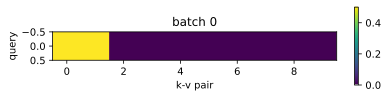

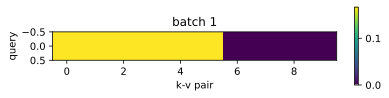

In [312]:
'''valid_lens：[2, 6], 切query和key的1是相似的，所有注意力权重都平等'''
import matplotlib.pyplot as plt

plt.figure()
for batch in range(attention.attention_weights.shape[0]):
    plt.subplot(3, 1, batch + 1)
    plt.imshow(attention.attention_weights[batch, :].detach().numpy())
    plt.title(f'batch {batch}')
    plt.xlabel('k-v pair')
    plt.ylabel('query')
    plt.colorbar()
    plt.show()

- (详细) 从头手写-逐步分析“加性注意力机制代码”
  - 无掩码和Dropout

In [306]:
import torch 


# ------------------------------------------------------
# 测试数据
# ------------------------------------------------------
batch_size = 2
num_query = 1
query_size = 20             # 一个query的向量长度

num_key = 10                # “键－值”对的个数
key_size = 2                # 一个key的向量长度

num_value = num_key         # “键－值”对的个数
value_size = 4              # 一个value的向量长度

# queries = torch.randn(size=(batch_size, num_query, query_size))
queries = torch.ones(size=(batch_size, num_query, query_size))
print('queries size: ', queries.size())
# batch_size, num_query, query_size
# 2, 1, 20

keys = torch.ones(size=(batch_size, num_key, key_size))
print('keys size: ', keys.size())
# batch_size, kv_pair_num, key_size
# 2, 10, 2

values = torch.randn(size=(batch_size, num_value, value_size))
print('values size: ', values.size())
# batch_size, kv_pair_num, value_size
# 2, 10, 4

# ------------------------------------------------------
# 投影 (可学习的参数W)
# ------------------------------------------------------
## 全部投影到value_size一致的维度，便于计算
num_hiddens = value_size
bias = False
W_q = nn.Linear(query_size, num_hiddens, bias=bias)     # 20 , 4
W_k = nn.Linear(key_size, num_hiddens, bias=bias)       # 2, 4
w_v = nn.Linear(num_hiddens, 1, bias=bias)              # 4, 1

Q = W_q(queries)                    # (batch_size，查询的个数，num_hidden) 3维
# 2, 1, 20 * 20, 4 = 2, 1, 4
Q = Q.unsqueeze(2)                  # (batch_size，查询的个数，1，num_hidden) 插入一个维度  (重要) 4维
# 2, 1, (1), 4                        # 为什么要插入一个维度？便于后续做广播
print('Q size: ', Q.size())

K = W_k(keys)                       # (batch_size，“键－值”对的个数，num_hiddens)   3维
# 2, 10, 2 * 2, 4 = 2, 10, 4
K = K.unsqueeze(1)                  # (batch_size，1，“键－值”对的个数，num_hiddens) 插入一个维度 (重要) 4维度
# 2, (1), 10, 4                       # 为什么要插入一个维度？便于后续做广播
print('K size: ', K.size())


features = Q + K                    # 自动做广播后做加法    (重要)                                  (2,1,(1),4) + (2,(1),10,4) = (2,1,10,4)
# 2, 1, 10, 4                       # (batch_size，查询个数，“键－值”对的个数，num_hiddens) 广播后   (2,1,(10),4)+ (2,(1),10,4) = (2,1,10,4)
print('features size: ', features.size())

features = torch.tanh(features)
# 2, 1, 10, 4
print('features size (tanh): ', features.size())

scores = w_v(features)              # 自动做广播后做乘法    (2,1,10,4) @ (    4,1) = (2,1,10,1)
                                    #                      (2,1,10,4) @ (2,1,4,1) = (2,1,10,1)
# 2, 1, 10, 1
print('scores size: ', scores.size())

# w_v仅有一个输出，因此从形状中移除最后那个维度
# scores的形状：(batch_size，查询的个数，“键-值”对的个数)
scores = scores.squeeze(-1) 
# 2, 1, 10
print('scores size squeeze: ', scores.size())

attention_weights = torch.softmax(scores, dim=-1)
# 2, 1, 10
print('attention_weights: ', attention_weights.size())
# attention_weights

attention = torch.bmm(attention_weights, values)    # (2,1,10) @ (  10,4) = (2,1,4)
                                                    # (2,1,10) @ (2,10,4) = (2,1,4) 广播后
print('attention: ', attention.size())
# batch_size, num_query, value_size
# 2, 1, 4

# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)


# 添加dropout
dropout = nn.Dropout(p=0.1)     # 0.1的概率失活
attention_weights_droputed = dropout(attention_weights)
# attention_weights_droputed.shape = 2, 1, 10    dropout后不改变attention_weights的形状
print('attention_wights_droputed size: ', attention_weights_droputed.size())

attention_droputed = torch.bmm(attention_weights_droputed, values)

attention_droputed.shape

queries size:  torch.Size([2, 1, 20])
keys size:  torch.Size([2, 10, 2])
values size:  torch.Size([2, 10, 4])
Q size:  torch.Size([2, 1, 1, 4])
K size:  torch.Size([2, 1, 10, 4])
features size:  torch.Size([2, 1, 10, 4])
features size (tanh):  torch.Size([2, 1, 10, 4])
scores size:  torch.Size([2, 1, 10, 1])
scores size squeeze:  torch.Size([2, 1, 10])
attention_weights:  torch.Size([2, 1, 10])
attention:  torch.Size([2, 1, 4])
attention_wights_droputed size:  torch.Size([2, 1, 10])


torch.Size([2, 1, 4])

- 注意力权重可视化

In [307]:
# attention_weights的形状：(batch_size, num_query, k_v_pair_num)
attention_weights

tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]]], grad_fn=<SoftmaxBackward0>)

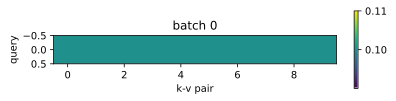

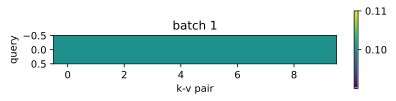

In [308]:
'''没有使用valid_lens, 且query和key的1是相似的，所有注意力权重都平等'''
import matplotlib.pyplot as plt   


plt.figure()
for batch in range(attention_weights.shape[0]):
    plt.subplot(3, 1, batch + 1)
    plt.imshow(attention_weights[batch, :].detach().numpy())
    plt.title(f'batch {batch}')
    plt.xlabel('k-v pair')
    plt.ylabel('query')
    plt.colorbar()
    plt.show()

#### 11.5.5.2. <a id='toc11_5_5_2_'></a>[缩放点积注意力 (Scaled Dot-Product Attention)-计算q、k相似度](#toc0_)
缩放点积注意力是由 Vaswani 等人在 2017 年的 Transformer 论文中提出的。它通过点积计算注意力得分，并对得分进行缩放以提高数值稳定性。
计算过程：
  - 对于给定的查询和键，计算它们的`点积`。
  - 将点积结果`除以键的维度的平方根`，以避免数值过大。
  - 对缩放后的得分进行 `softmax` 操作，得到注意力权重。

公式：$\mathrm{Attention}(Q,K,V)=\mathrm{softmax} (\frac{QK^T}{\sqrt{d_k}}) V$, 其中，$d_k$是键的维度。

优点：
  - 计算效率高，适合并行化。
  - 在大多数现代深度学习模型中广泛使用。

缺点：
  - 对于不同维度的查询和键，需要进行额外的线性变换。

---

- q和k的长度`一致`，为`d`
- 注意力评分函数：$a(\mathbf{q},\mathbf{k})=\mathbf{q}^\top\mathbf{k}/\sqrt{d}$
- 向量版本注意力权重：$\mathrm{softmax}\left(\frac{\mathrm{QK}^\top}{\sqrt{d}}\right)\mathbf{V}\in\mathbb{R}^{n\times v}$
- $\text{查询}\mathbf{Q}\in\mathbb{R}^{n\times d}\text{、键}\mathbf{K}\in\mathbb{R}^{m\times d}\text{和 值}\mathbf{V}\in\mathbb{R}^{m\times v}$
- `无可学习`参数



<img src="./Pytorch_Pictures/Attention/scale-dot-product.png" width = "300" height = "300" alt="图片名称" align=center />

- 使用：
```python
# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
            # query_size, key_size必须一样，最好是等于value_size
    # Output:                           (batch_size, num_query, value_size)
```

---

- PyTorch简洁实现  
query_size = key_size = value_size

In [313]:
import torch 
from torch import nn


batch_size, num_query, query_size = 2, 1, 4
k_v_pair_num, key_size = 10, 4
value_size = 4

# queries = torch.randn(size=(batch_size, num_query, query_size))
queries = torch.ones(size=(batch_size, num_query, query_size))
keys = torch.ones(size=(batch_size, k_v_pair_num, key_size))
values = torch.randn(size=(batch_size, k_v_pair_num, value_size))

# num_heads = 1
att = nn.MultiheadAttention(embed_dim=value_size, num_heads=1, batch_first=True)
out, weights = att(queries, keys, values)

out.shape

torch.Size([2, 1, 4])

In [314]:
weights

tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]]], grad_fn=<MeanBackward1>)

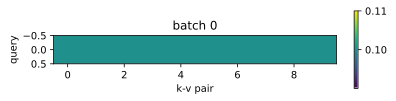

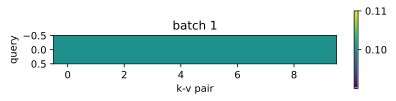

In [316]:
'''没有使用valid_lens, 且query和key的1是相似的，所有注意力权重都平等'''
import matplotlib.pyplot as plt

plt.figure()
for batch in range(weights.shape[0]):
    plt.subplot(3, 1, batch + 1)
    plt.imshow(weights[batch, :].detach().numpy())
    plt.title(f'batch {batch}')
    plt.xlabel('k-v pair')
    plt.ylabel('query')
    plt.colorbar()
    plt.show()


- 案例-李沐
  - 掩码 (masked) 和Dropout

In [322]:
import torch 
from torch import nn 
import math


#@save
class DotProductAttention(nn.Module):
    """缩放点积注意力"""
    def __init__(self, query_size, key_size, value_size, num_hiddens, dropout, **kwargs):
        super().__init__(**kwargs)
        # queries的形状：(batch_size，查询的个数，d)
        self.W_q = nn.Linear(query_size, num_hiddens) 
        # keys的形状：(batch_size，“键－值”对的个数，d)
        self.W_k = nn.Linear(key_size, num_hiddens)
        # values的形状：(batch_size，“键－值”对的个数，值的维度)
        self.w_v = nn.Linear(value_size, num_hiddens)
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens=None):
        queries, keys, values = self.W_q(queries), self.W_k(keys), self.w_v(values)
        # queries: (batch_size, num_query, num_hiddens)
        # keys: (batch_size, k_v_pair_num, num_hiddens)
        # values: (batch_size, k_v_pair_num, value_size)
        d = queries.shape[-1]

        # 设置transpose_b=True为了交换keys的最后两个维度
        # (batch_size, num_query, num_hiddens) @ (batch_size, num_hiddens, k_v_pair_num) = (batch_size, num_query, k_v_pair_num)
        scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)

        # valid_lens的形状:(batch_size，)或者(batch_size，查询的个数)
        # 使用masked_softmax计算注意力权重
        # attention_weights的形状：(batch_size, num_query, k_v_pair_num)
        self.attention_weights = masked_softmax(scores, valid_lens)

        # (batch_size, num_query, k_v_pair_num) @ (batch_size, k_v_pair_num, value_size) = (batch_size, num_query, value_size)
        return torch.bmm(self.dropout(self.attention_weights), values)
    

# Test   
batch_size, num_query, query_size = 2, 1, 4
k_v_pair_num, key_size = 10, 4
value_size = 4
num_hiddens = 8
dropout = 0.1

queries = torch.ones(size=(batch_size, num_query, query_size))
keys = torch.ones(size=(batch_size, k_v_pair_num, key_size))
values = torch.randn(size=(batch_size, k_v_pair_num, value_size))

attention = DotProductAttention(query_size=query_size, key_size=key_size, value_size=value_size, num_hiddens=num_hiddens, dropout=dropout)
attention.eval()

# batch_size, 1
## 依次的每个批次中所有num_steps有效个数一致
valid_lens = torch.tensor([2, 6])

attention(queries, keys, values, valid_lens).shape

torch.Size([2, 1, 8])

In [323]:
attention.attention_weights

tensor([[[0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000]],

        [[0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000,
          0.0000, 0.0000]]], grad_fn=<SoftmaxBackward0>)

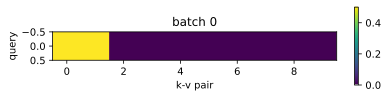

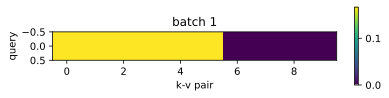

In [324]:
'''valid_lens：[2, 6], 切query和key的1是相似的，所有注意力权重都平等'''
import matplotlib.pyplot as plt


plt.figure()
for batch in range(attention.attention_weights.shape[0]):
    plt.subplot(3, 1, batch + 1)
    plt.imshow(attention.attention_weights[batch, :].detach().numpy())
    plt.title(f'batch {batch}')
    plt.xlabel('k-v pair')
    plt.ylabel('query')
    plt.colorbar()
    plt.show()

- (详细) 从头手写
  - 无掩码和Dropout

In [325]:
from torch import nn 


# 示例数据  
batch_size = 2
num_query = 1
query_size = 4             # 一个query的向量长度，d

num_key = 10                    # “键－值”对的个数，m
key_size = 4                # 一个key的向量长度，d

num_value = num_key             # “键－值”对的个数，m
value_size = 4              # 一个value的向量长度，v

# queries = torch.randn(size=(batch_size, num_query, query_size))
queries = torch.ones(size=(batch_size, num_query, query_size))
print('queries size: ', queries.size())
# (batch_size, num_query, query_size)
# (2, 1, 20)

keys = torch.ones(size=(batch_size, num_key, key_size))
print('keys size: ', keys.size())
# (batch_size, num_key, key_size)
# (2, 10, 20)

values = torch.randn(size=(batch_size, num_value, value_size))
print('values size: ', values.size())
# (batch_size, num_value, value_size)
# (2, 10, 4)

features = (queries @ keys.transpose(1, 2)) 
# features = torch.bmm(queries, keys.transpose(1, 2))               # 同上，都可以
# (2, 1, 20) @ (2, 20, 10) = (2, 1, 10)
print(f'features size: {features.shape}')

scores = features / torch.sqrt(torch.tensor(queries.shape[2]))
# (2, 1, 10)
print(f'scores size: {scores.shape}')

attention_weights = torch.softmax(scores, dim=-1)
# (2, 1, 10) / 标量 = (2, 1, 10)
print(f'attention_weights size: {attention_weights.shape}')

attention = torch.bmm(attention_weights, values)
# (2, 1, 4)
print(f'attention size: {attention.shape}')

# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)

queries size:  torch.Size([2, 1, 4])
keys size:  torch.Size([2, 10, 4])
values size:  torch.Size([2, 10, 4])
features size: torch.Size([2, 1, 10])
scores size: torch.Size([2, 1, 10])
attention_weights size: torch.Size([2, 1, 10])
attention size: torch.Size([2, 1, 4])


In [326]:
attention_weights

tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]]])

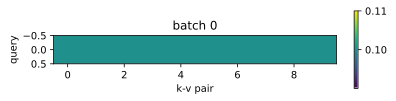

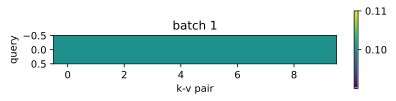

In [330]:
import matplotlib.pyplot as plt

plt.figure()
for batch in range(attention_weights.shape[0]):
    plt.subplot(3, 1, batch + 1)
    plt.imshow(attention_weights[batch, :].detach().numpy())
    plt.title(f'batch {batch}')
    plt.xlabel('k-v pair')
    plt.ylabel('query')
    plt.colorbar()
    plt.show()


### 11.5.6. <a id='toc11_5_6_'></a>[自注意力机制-q、k和v相同](#toc0_)

自注意力机制：就是用同一个`X`分别于`W_q`、`W_k`和`W_v`矩阵相乘得到`Q`、`K`和`V` `向量/矩阵`。因为用的是同一个X同时作为q、k和v，所以得名为 `自注意力` 。

- 使用：
```python
# self-attention:                       queries = keys = values
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)
```

In [328]:
import torch 
from torch import nn 
import torch.utils.data as data
import torchvision
import time 


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [

            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(dataset=train_dataset, batch_size=128,  shuffle=True)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

In [341]:
# 网络结构1:CNN
class MLPMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
    
# 构建模型2:Additive attention
class SelfAttentionMNISTModel(nn.Module):
    def __init__(self, attention_type):
        super().__init__()
        # 输入层
        self.input = nn.Sequential(nn.Flatten(), nn.Linear(28 * 28, 128), nn.ReLU())

        # 注意力层
        if attention_type == 'add':
            self.attention = AdditiveAttention(query_size=128, key_size=128, num_hiddens=128, dropout=False)
        elif attention_type == 'dot':
            self.attention = DotProductAttention(query_size=128, key_size=128, value_size=128, num_hiddens=128, dropout=False)
        else:
            raise ValueError(f"Invalid attention type: {attention_type}")
        
        # 输出层
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # x: (batch_size, 28*28)
        x = self.input(x)
        ## x: (batch_size, 128) -> (batch_size, 1, 128)
        x = x.unsqueeze(1)  # dim=1增加一个维度，即表示一个query维度是(1, 128)

        # 自注意力即q、k、v相同
        ## queries: (batch_size, 1, 128)
        ## keys: (batch_size, 1, 128)
        ## values: (batch_size, 1, 128)
        ## 输出维度(batch_size, num_query, value_size) -> (batch_size, 1, 128) -> (batch_size, 128)
        x = self.attention(queries=x, keys=x, values=x).squeeze(1) # dim=1的维度取消，只剩128

        # 输出层
        ## x: (batch_size, 128) -> (batch_size, 10)
        x = self.fc2(x)

        return x
    

# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''
    print('='*100, '\n', f"Runing on {device}", '\n','='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net = nn.DataParallel(module=net).to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上      
            opt.zero_grad()                     # 默认是累加，此处从新求导
            y_hat = net(X)          # 计算y_hat
            loss = loss_fn(y_hat, y)# 计算loss
            loss.backward()         # 计算梯度
            opt.step()              # 更新网络参数
        net.eval() 
        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

In [334]:
# CNN
net = MLPMNISTModel()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)  

train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
) 

 Runing on cuda:0 
epoch 1/10: train_loss=1.6284608840942383, train_acc=84.38166809082031, test_acc=84.72999572753906
epoch 2/10: train_loss=1.5520281791687012, train_acc=92.09333801269531, test_acc=92.5999984741211
epoch 3/10: train_loss=1.532891869544983, train_acc=93.72167205810547, test_acc=93.73999786376953
epoch 4/10: train_loss=1.5224930047988892, train_acc=94.61666870117188, test_acc=94.38999938964844
epoch 5/10: train_loss=1.5171533823013306, train_acc=95.10333251953125, test_acc=94.72000122070312
epoch 6/10: train_loss=1.5102174282073975, train_acc=95.7249984741211, test_acc=95.1199951171875
epoch 7/10: train_loss=1.5049973726272583, train_acc=96.2316665649414, test_acc=95.65999603271484
epoch 8/10: train_loss=1.5015963315963745, train_acc=96.56500244140625, test_acc=96.04000091552734
epoch 9/10: train_loss=1.4988125562667847, train_acc=96.78500366210938, test_acc=96.23999786376953
epoch 10/10: train_loss=1.4956179857254028, train_acc=97.11166381835938, test_acc=96.4300003051

In [338]:
# AdditiveAttention
net = SelfAttentionMNISTModel(attention_type='add')
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)  

train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
) 

 Runing on cuda:0 


epoch 1/10: train_loss=0.15667781233787537, train_acc=95.52166748046875, test_acc=95.30999755859375
epoch 2/10: train_loss=0.10943424701690674, train_acc=96.82833862304688, test_acc=96.33000183105469
epoch 3/10: train_loss=0.08049079775810242, train_acc=97.67333221435547, test_acc=97.1500015258789
epoch 4/10: train_loss=0.06135227158665657, train_acc=98.26499938964844, test_acc=97.38999938964844
epoch 5/10: train_loss=0.04637853428721428, train_acc=98.6866683959961, test_acc=97.50999450683594
epoch 6/10: train_loss=0.03937253728508949, train_acc=98.89167022705078, test_acc=97.62999725341797
epoch 7/10: train_loss=0.03307609632611275, train_acc=99.14167022705078, test_acc=97.72999572753906
epoch 8/10: train_loss=0.0306411050260067, train_acc=99.13333892822266, test_acc=97.75
epoch 9/10: train_loss=0.02732059732079506, train_acc=99.26499938964844, test_acc=97.72999572753906
epoch 10/10: train_loss=0.02051992528140545, train_acc=99.53666687011719, test_acc=97.9699935913086
 Total：0.0 d/ 0

In [337]:
# DotProductAttention
net = SelfAttentionMNISTModel(attention_type='dot')
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)  

train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
) 

 Runing on cuda:0 
epoch 1/10: train_loss=0.1637280136346817, train_acc=94.80833435058594, test_acc=94.56999969482422
epoch 2/10: train_loss=0.08692066371440887, train_acc=97.27999877929688, test_acc=96.77000427246094
epoch 3/10: train_loss=0.06666596978902817, train_acc=97.86500549316406, test_acc=96.94999694824219
epoch 4/10: train_loss=0.05956593155860901, train_acc=98.12000274658203, test_acc=96.87999725341797
epoch 5/10: train_loss=0.03826556354761124, train_acc=98.80500030517578, test_acc=97.7699966430664
epoch 6/10: train_loss=0.0370258092880249, train_acc=98.836669921875, test_acc=97.47999572753906
epoch 7/10: train_loss=0.037295542657375336, train_acc=98.7066650390625, test_acc=97.29000091552734
epoch 8/10: train_loss=0.027073809877038002, train_acc=99.1116714477539, test_acc=97.58999633789062
epoch 9/10: train_loss=0.016789773479104042, train_acc=99.47167205810547, test_acc=97.77999877929688
epoch 10/10: train_loss=0.029497196897864342, train_acc=99.05166625976562, test_acc=9

### 11.5.7. <a id='toc11_5_7_'></a>[多头注意力机制-h个q、k和v对](#toc0_)
上述只求一次注意力的过程可以叫做单头注意力。多头注意力就是对同样的Q, K, V求多次注意力，并行计算h个得到h个不同的attention，再把这些不同的h个attention连接起来得到最终的attentions，每一个attention都是一个head（头），总共有h个head（头）。  

<img src="./Pytorch_Pictures/Attention/multi_head.jpg" width = "300" height = "350" alt="多头注意力机制" align=center />

在实现过程中通常选择`缩放点积注意力`作为每一个注意力头，除以根号d可以使计算数值减小。

```python
# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)

# 先 transpose_input()
# 后 transpose_output()
# 终 self.W_o = nn.Linear(num_hiddens, num_hiddens, bias=exitBias)   # 最后concat所有head的结果 (其实就是投影)
```


---

- 简洁实现  
query_size = key_size = value_size = d  
nn.MultiheadAttention(embed_dim=value_size, num_heads=num_heads, batch_first=True)

In [342]:
import torch
import torch.nn as nn


# 定义参数
batch_size = 2
query_num, query_size = 1, 4
k_v_pair_num, key_size = 10, 4
value_size = 4

num_heads = 2
# 创建多头注意力模块
multihead_attention = nn.MultiheadAttention(embed_dim=value_size, num_heads=num_heads, batch_first=True)
# 使用缩放点积注意力机制，所以 query_size = key_size = value_size = d

# 创建输入张量
# 输入形状为 (批次大小, 序列长度, 嵌入维度)
query = torch.ones(batch_size, query_num, query_size)
key = torch.ones(batch_size, k_v_pair_num, key_size)
value = torch.rand(batch_size, k_v_pair_num, value_size)

# 可选的注意力掩码
# mask = torch.zeros(batch_size, seq_length, seq_length).type(torch.bool)

# 计算多头注意力
# 如果需要掩码，可以传入 mask 参数
output, attention_weights = multihead_attention(query, key, value)

print("输出形状:", output.shape)  # 输出形状: (batch_size, query_num, value_size)
print("注意力权重形状:", attention_weights.shape)  # 注意力权重形状: (batch_size, num_query, k_v_pair_num)

输出形状: torch.Size([2, 1, 4])
注意力权重形状: torch.Size([2, 1, 10])


In [343]:
attention_weights

tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]]], grad_fn=<MeanBackward1>)

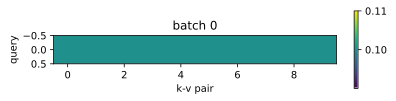

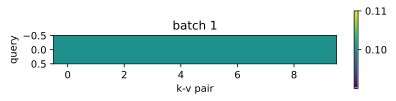

In [344]:
import matplotlib.pyplot as plt 


plt.figure()
for batch in range(attention_weights.shape[0]):
    plt.subplot(3, 1, batch + 1)
    plt.imshow(attention_weights[batch, :].detach().numpy())
    plt.title(f'batch {batch}')
    plt.xlabel('k-v pair')
    plt.ylabel('query')
    plt.colorbar()
    plt.show()


- 案例-李沐 (修改)
  - 去除掩码和Dropout

In [345]:
import torch 
from torch import nn  
import math 


# 加性注意力
class AdditiveAttentionForMultiHeadAttention(nn.Module):
    """加性注意力"""
    def __init__(self, num_hiddens, dropout):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        self.w_v = nn.Linear(num_hiddens, 1)

    def forward(self, queries, keys, values, valid_lens=None):
        # queries, keys = self.W_q(queries), self.W_k(keys)
        # queries:              (batch_size, num_query, num_hiddens)
        # keys:                 (batch_size, k_v_pair_num, num_hiddens)
        # 在维度扩展后，
        # queries的形状：       (batch_size，num_query，        1，        num_hiddens)
        # key的形状：           (batch_size，    1，    k_v_pair_num，  num_hiddens)
        # 使用广播方式进行求和  (batch_size, num_query, 1, num_hiddens) + (batch_size, 1, k_v_pair_num, num_hiddens) = (batch_size, num_query, k_v_pair_num, num_hiddens)
        features = queries.unsqueeze(2) + keys.unsqueeze(1)
        features = torch.tanh(features)
        # features的形状：(batch_size, num_query, k_v_pair_num, num_hiddens)
        
        # self.w_v: (num_hiddens, 1)
        # scores的形状：(batch_size，num_query，k_v_pair_num, 1)
        # 移除最后一个维度squeeze(-1)
        # scores的形状：(batch_size，num_query，k_v_pair_num)
        scores = self.w_v(features).squeeze(-1)

        # 注意力权重
        # 使用masked_softmax计算注意力权重, 有效长度为valid_lens
        # attention_weights的形状：(batch_size, num_query, k_v_pair_num)
        self.attention_weights = masked_softmax(scores, valid_lens)

        # values的形状：(batch_size，k_v_pair_num，value_size)
        return torch.bmm(self.dropout(self.attention_weights), values)


# 点积注意力
class DotProductAttentionForMultiHeadAttention(nn.Module):
    def __init__(self, dropout=False):
        super().__init__()
        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens=None):
        # queries, keys, values = self.W_q(queries), self.W_k(keys), self.w_v(values)
        # queries: (batch_size, num_query, num_hiddens)
        # keys: (batch_size, k_v_pair_num, num_hiddens)
        # values: (batch_size, k_v_pair_num, value_size)
        d = queries.shape[-1]

        # 设置transpose_b=True为了交换keys的最后两个维度
        # (batch_size, num_query, num_hiddens) @ (batch_size, num_hiddens, k_v_pair_num) = (batch_size, num_query, k_v_pair_num)
        scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)

        # valid_lens的形状:(batch_size，)或者(batch_size，查询的个数)
        # 使用masked_softmax计算注意力权重
        # attention_weights的形状：(batch_size, num_query, k_v_pair_num)
        self.attention_weights = masked_softmax(scores, valid_lens)

        # (batch_size, num_query, k_v_pair_num) @ (batch_size, k_v_pair_num, value_size) = (batch_size, num_query, value_size)
        return torch.bmm(self.dropout(self.attention_weights), values)


# 多头注意力机制
class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, query_size, key_size, num_hiddens, value_size, attention_type, dropout=False):
        super().__init__()
        self.num_heads = num_heads
        self.W_q = nn.Linear(query_size, num_hiddens)
        self.W_k = nn.Linear(key_size, num_hiddens)
        self.W_v = nn.Linear(value_size, num_hiddens)
        if num_hiddens % num_heads != 0:
            # raise ValueError(f'num_hiddens must be divisible by num_heads, but got num_hiddens={num_hiddens} and num_heads={num_heads}')
            raise ValueError(f'num_hiddens必须能整除num_heads，但是接受的num_hiddens={num_hiddens}，num_heads={num_heads}')
        
        # 选择注意力机制
        if attention_type == 'add':
            # self.attention = AdditiveAttention(query_size=query_size, key_size=key_size, num_hiddens=num_hiddens, dropout=dropout)
            self.attention = AdditiveAttentionForMultiHeadAttention(num_hiddens=int(num_hiddens/num_heads), dropout=dropout)
        elif attention_type == 'dot':
            # self.attention = DotProductAttention(query_size=query_size, key_size=key_size, value_size=value_size, num_hiddens=num_hiddens, dropout=dropout)
            self.attention = DotProductAttentionForMultiHeadAttention(dropout=dropout)
        else:
            raise ValueError(f'Invalid attention type: {attention_type}')        

        # 最后concat所有head的结果 (其实就是投影)
        self.W_o = nn.Linear(num_hiddens, num_hiddens)   

    def transpose_input(self, X, num_heads):
        """为了多注意力头的并行计算而变换形状"""
        # 输入X的形状:(batch_size，查询或者“键－值”对的个数，num_hiddens)
        # 输出X的形状:(batch_size，查询或者“键－值”对的个数，`num_heads`，num_hiddens/num_heads)
        X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)

        # 输出X的形状:(batch_size，`num_heads`，查询或者“键－值”对的个数，num_hiddens/num_heads)
        X = X.permute(0, 2, 1, 3)                                                                   # 调整顺序以便做广播 (向量化并行计算multi heads)

        # 最终输出的形状:(batch_size*`num_heads`,查询或者“键－值”对的个数，num_hiddens/num_heads)
        return X.reshape(-1, X.shape[2], X.shape[3])

    def transpose_output(self, X, num_heads):
        """逆转transpose_qkv函数的操作"""
        # 输入X的形状:(batch_size*`num_heads`,查询或者“键－值”对的个数，num_hiddens/num_heads)
        # 输出X的形状:(batch_size,`num_heads``,查询或者“键－值”对的个数，num_hiddens/num_heads)
        X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])

        # 输出X的形状:(batch_size,查询或者“键－值”对的个数，`num_heads`,num_hiddens/num_heads)                                        # 不改变顺序
        X = X.permute(0, 2, 1, 3)

        # 最终输出X的形状:(batch_size,查询或者“键－值”对的个数，num_hiddens)
        return X.reshape(X.shape[0], X.shape[1], -1)

    def forward(self, queries, keys, values, valid_lens=None):
        # queries: (batch_size, num_query, query_size)
        queries = self.W_q(queries)
        # queries: (batch_size, num_query, num_hiddens)
        queries = self.transpose_input(queries, self.num_heads)
        # queries: (batch_size*num_heads, num_query, num_hiddens/num_heads)

        # keys: (batch_size, k_v_pair_num, key_size)    
        keys = self.W_k(keys)
        # keys: (batch_size, k_v_pair_num, num_hiddens)
        keys = self.transpose_input(keys, self.num_heads)
        # keys: (batch_size*num_heads, k_v_pair_num, num_hiddens/num_heads)

        # values: (batch_size, k_v_pair_num, value_size)
        values = self.W_v(values)    
        # values: (batch_size, k_v_pair_num, num_hiddens)     
        values = self.transpose_input(values, self.num_heads)
        # values: (batch_size*num_heads, k_v_pair_num, num_hiddens/num_heads)

        if valid_lens is not None:
            # 在0轴，将第一项（标量或者矢量）复制num_heads次，
            # 然后如此复制第二项，然后诸如此类。
            valid_lens = torch.repeat_interleave(valid_lens, repeats=self.num_heads, dim=0)

        # output的形状:(batch_size*num_heads，num_query，num_hiddens/num_heads)
        output = self.attention(queries=queries, keys=keys, values=values, valid_lens=valid_lens)

        # output_concat的形状:(batch_size，num_query，num_hiddens) 
        output_concat = self.transpose_output(output, self.num_heads)

        return self.W_o(output_concat)


# Test
batch_size = 2
num_query, query_size = 1, 4
k_v_pair_num, key_size = 10, 4
value_size = 4 
num_hiddens = 128
num_heads = 2

# 实例化
multiHeadAttention = MultiHeadAttention(
    num_heads = num_heads, 
    query_size = query_size, 
    key_size = key_size, 
    num_hiddens = num_hiddens, 
    value_size = value_size,
    attention_type='add'
).eval()
print(multiHeadAttention)

# 传参
query = torch.ones((batch_size, num_query, query_size)); print('raw queries size: ', query.shape)
key = torch.ones((batch_size, k_v_pair_num, key_size)); print('raw keys size: ', key.shape)
value = torch.randn((batch_size, k_v_pair_num, value_size)); print('raw values size: ', value.shape)

attention_values = multiHeadAttention(queries=query, keys=key, values=value); print('attention_values size: ', attention_values.shape)

MultiHeadAttention(
  (W_q): Linear(in_features=4, out_features=128, bias=True)
  (W_k): Linear(in_features=4, out_features=128, bias=True)
  (W_v): Linear(in_features=4, out_features=128, bias=True)
  (attention): AdditiveAttentionForMultiHeadAttention(
    (dropout): Dropout(p=False, inplace=False)
    (w_v): Linear(in_features=64, out_features=1, bias=True)
  )
  (W_o): Linear(in_features=128, out_features=128, bias=True)
)
raw queries size:  torch.Size([2, 1, 4])
raw keys size:  torch.Size([2, 10, 4])
raw values size:  torch.Size([2, 10, 4])
attention_values size:  torch.Size([2, 1, 128])


In [346]:
multiHeadAttention.attention.attention_weights

tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]]], grad_fn=<SoftmaxBackward0>)

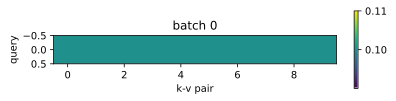

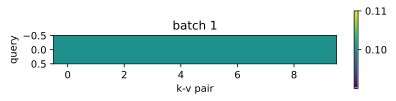

In [347]:
import matplotlib.pyplot as plt 


plt.figure()
for batch in range(attention_weights.shape[0]):
    plt.subplot(3, 1, batch + 1)
    plt.imshow(attention_weights[batch, :].detach().numpy())
    plt.title(f'batch {batch}')
    plt.xlabel('k-v pair')
    plt.ylabel('query')
    plt.colorbar()
    plt.show()


- 从头手写
  - 无掩码和Dropout

In [350]:
import torch 
from torch import nn  
import torch.utils.data as data

import torchvision

import time 


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [

            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(dataset=train_dataset, batch_size=128,  shuffle=True)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

  
# 4
class MultiHeadAttentionMNISTModel(nn.Module):
    def __init__(self, num_heads, attention_type):
        super().__init__()
        self.input = nn.Sequential(
                nn.Flatten(), 
                nn.Linear(28 * 28, 128),
                nn.ReLU()
            )
        num_hiddens = 128
        # 多头注意力机制 from PyTorch
        # self.attention = nn.MultiheadAttention(embed_dim=num_hiddens, num_heads=num_heads, batch_first=True)

        # 选择注意力机制 from 自己
        if attention_type == 'add': 
            self.attention = MultiHeadAttention(
                num_heads = num_heads, 
                query_size = num_hiddens, 
                key_size = num_hiddens, 
                num_hiddens = num_hiddens, 
                value_size = num_hiddens,
                attention_type='add'
            )
        elif attention_type == 'dot':
            self.attention = MultiHeadAttention(
                num_heads = num_heads, 
                query_size = num_hiddens, 
                key_size = num_hiddens, 
                num_hiddens = num_hiddens, 
                value_size = num_hiddens,
                attention_type='dot'
            )
        else:
            raise ValueError(f'Invalid attention type: {attention_type}')
        self.fc2 = nn.Linear(128, 10)

    def forward(self, X):
        x = self.input(X)
        x = x.unsqueeze(1)
        x = self.attention(queries=x, keys=x, values=x)
        # x, weights = self.attention(query=x, key=x, value=x)
        x = x.squeeze(1)
        x = self.fc2(x)
        return x


# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''
    print('='*100, '\n', f"Runing on {device}", '\n','='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net = nn.DataParallel(module=net).to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                     # 默认是累加，此处从新求导
            y_hat = net(X)          # 计算y_hat
            loss = loss_fn(y_hat, y)# 计算loss
            loss.backward()         # 计算梯度
            opt.step()              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
net = MultiHeadAttentionMNISTModel(num_heads=2, attention_type='add')
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
)

 Runing on cuda:0 


/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


epoch 1/10: train_loss=0.1438291221857071, train_acc=95.59166717529297, test_acc=95.43000030517578
epoch 2/10: train_loss=0.11071320623159409, train_acc=96.6016616821289, test_acc=95.88999938964844
epoch 3/10: train_loss=0.06381400674581528, train_acc=98.07500457763672, test_acc=97.23999786376953
epoch 4/10: train_loss=0.06747393310070038, train_acc=97.86500549316406, test_acc=96.91000366210938
epoch 5/10: train_loss=0.03673125430941582, train_acc=98.8116683959961, test_acc=97.57999420166016
epoch 6/10: train_loss=0.037261512130498886, train_acc=98.79166412353516, test_acc=97.43000030517578
epoch 7/10: train_loss=0.03205549716949463, train_acc=98.95166778564453, test_acc=97.27999877929688
epoch 8/10: train_loss=0.03736620396375656, train_acc=98.77666473388672, test_acc=97.19000244140625
epoch 9/10: train_loss=0.02184496819972992, train_acc=99.31666564941406, test_acc=97.6199951171875
epoch 10/10: train_loss=0.033308517187833786, train_acc=98.88500213623047, test_acc=97.25
 Total：0.0 d/

In [349]:
net = MultiHeadAttentionMNISTModel(num_heads=2, attention_type='dot')
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.01)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
)

 Runing on cuda:0 
epoch 1/10: train_loss=1.7392207384109497, train_acc=54.72500228881836, test_acc=54.97999954223633
epoch 2/10: train_loss=0.6780784726142883, train_acc=81.1933364868164, test_acc=81.5199966430664
epoch 3/10: train_loss=0.48317480087280273, train_acc=86.11333465576172, test_acc=86.43999481201172
epoch 4/10: train_loss=0.41290122270584106, train_acc=88.25333404541016, test_acc=88.36000061035156
epoch 5/10: train_loss=0.3759009540081024, train_acc=89.16666412353516, test_acc=89.41999816894531
epoch 6/10: train_loss=0.3502875566482544, train_acc=89.97333526611328, test_acc=90.25
epoch 7/10: train_loss=0.3304363787174225, train_acc=90.50333404541016, test_acc=90.76000213623047
epoch 8/10: train_loss=0.31311121582984924, train_acc=91.0250015258789, test_acc=91.22999572753906
epoch 9/10: train_loss=0.29658740758895874, train_acc=91.57666778564453, test_acc=91.80999755859375
epoch 10/10: train_loss=0.28062403202056885, train_acc=91.98833465576172, test_acc=92.0999984741211
 

In [360]:
net.attention.attention.attention_weights

AttributeError: 'AdditiveAttentionForMultiHeadAttention' object has no attribute 'attention_weights'

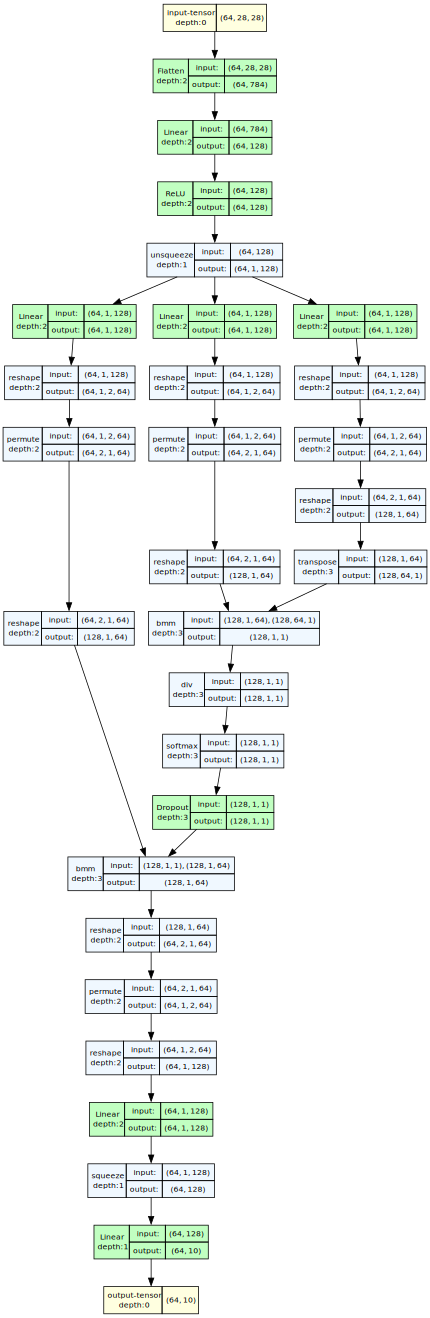

In [361]:
from torchview import draw_graph


model_graph = draw_graph(
    model=MultiHeadAttentionMNISTModel(num_heads=2, attention_type='dot'), 
    input_size=(64, 28, 28),
    device="cuda:0"
)
model_graph.visual_graph

### 11.5.8. <a id='toc11_5_8_'></a>[attention-seq2seq](#toc0_)

- 加入attention机制的Seq2Seq；

- 基于Attention的Seq2Seq。

![attention_seq2seq](./Pytorch_Pictures/Attention/seq2seq_attention.jpg)

In [362]:
#@tab all
#@save
class AttentionDecoder(d2l.Decoder):
    """The base attention-based decoder interface."""
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    @property
    def attention_weights(self):
        raise NotImplementedError

In [370]:
#@tab pytorch
class Seq2SeqAttentionDecoder(AttentionDecoder):
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers, dropout=0, **kwargs):
        super().__init__(**kwargs)
        self.attention = d2l.AdditiveAttention(num_hiddens, num_hiddens, num_hiddens, dropout)
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size + num_hiddens, num_hiddens, num_layers, dropout=dropout)
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        # Shape of `outputs`: (`num_steps`, `batch_size`, `num_hiddens`).
        # Shape of `hidden_state[0]`: (`num_layers`, `batch_size`,
        # `num_hiddens`)
        outputs, hidden_state = enc_outputs
        return (outputs.permute(1, 0, 2), hidden_state, enc_valid_lens)

    def forward(self, X, state):
        # Shape of `enc_outputs`: (`batch_size`, `num_steps`, `num_hiddens`).
        # Shape of `hidden_state[0]`: (`num_layers`, `batch_size`,
        # `num_hiddens`)
        enc_outputs, hidden_state, enc_valid_lens = state
        # Shape of the output `X`: (`num_steps`, `batch_size`, `embed_size`)
        X = self.embedding(X).permute(1, 0, 2)
        outputs, self._attention_weights = [], []
        for x in X:
            # 解码器输入，query是编码器输出最后时刻、最后层的隐状态，key和value是编码器输出所有时刻、所有层的隐状态
            # hidden_state: (num_layers, batch_size, num_hiddens)
            # hidden_state[-1]: (batch_size, num_hiddens)
            # hidden_state[-1].unsqueeze(1): (batch_size, 1, num_hiddens) 
            query = torch.unsqueeze(hidden_state[-1], dim=1)
            # Shape of `context`: (`batch_size`, 1, `num_hiddens`)
            context = self.attention(queries=query, keys=enc_outputs, values=enc_outputs, valid_lens=enc_valid_lens)

            # Concatenate on the feature dimension
            x = torch.cat((context, torch.unsqueeze(x, dim=1)), dim=-1)
            # Reshape `x` as (1, `batch_size`, `embed_size` + `num_hiddens`)
            out, hidden_state = self.rnn(x.permute(1, 0, 2), hidden_state)
            outputs.append(out)
            self._attention_weights.append(self.attention.attention_weights)
        # After fully-connected layer transformation, shape of `outputs`:
        # (`num_steps`, `batch_size`, `vocab_size`)
        outputs = self.dense(torch.cat(outputs, dim=0))
        return outputs.permute(1, 0, 2), [enc_outputs, hidden_state, enc_valid_lens]
    
    @property
    def attention_weights(self):
        return self._attention_weights
    

# test
#@tab pytorch
encoder = Seq2SeqEncoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2)
encoder.eval()

decoder = Seq2SeqAttentionDecoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2)
decoder.eval()

X = d2l.zeros((4, 7), dtype=torch.long)  # (`batch_size`, `num_steps`)

state = decoder.init_state(encoder(X), None)

output, state = decoder(X, state)

output.shape, len(state), state[0].shape, len(state[1]), state[1][0].shape

(torch.Size([4, 7, 10]), 3, torch.Size([4, 7, 16]), 2, torch.Size([4, 16]))

loss 0.021, 7160.9 tokens/sec on cuda:0


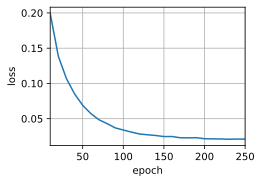

In [371]:
#@tab all
embed_size, num_hiddens, num_layers, dropout = 32, 32, 2, 0.1
batch_size, num_steps = 64, 10
lr, num_epochs, device = 0.005, 250, d2l.try_gpu()

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)
encoder = d2l.Seq2SeqEncoder(len(src_vocab), embed_size, num_hiddens, num_layers, dropout)
decoder = Seq2SeqAttentionDecoder(len(tgt_vocab), embed_size, num_hiddens, num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder)
d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

In [374]:
#@tab all
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']

for eng, fra in zip(engs, fras):
    translation, dec_attention_weight_seq = d2l.predict_seq2seq(net, eng, src_vocab, tgt_vocab, num_steps, device, True)
    print(f'{eng} => {translation}, ', f'bleu {d2l.bleu(translation, fra, k=2):.3f}')

go . => va !,  bleu 1.000
i lost . => j'ai perdu .,  bleu 1.000
he's calm . => il est paresseux .,  bleu 0.658
i'm home . => je suis chez moi .,  bleu 1.000


In [375]:
#@tab all
attention_weights = d2l.reshape(d2l.concat([step[0][0][0] for step in dec_attention_weight_seq], 0), (1, 1, -1, num_steps))

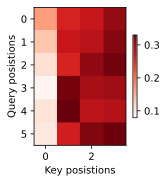

In [376]:
#@tab pytorch
# Plus one to include the end-of-sequence token
d2l.show_heatmaps(attention_weights[:, :, :, :len(engs[-1].split()) + 1].cpu(), xlabel='Key posistions', ylabel='Query posistions')

## 11.6. <a id='toc11_6_'></a>[Transformer](#toc0_)
Transformer是一种神经网络架构，最初由Vaswani等人在2017年的论文《Attention is All You Need》中提出。它主要用于处理序列到序列的任务，如机器翻译。Transformer架构的核心是自注意力机制（Self-Attention），它能够捕捉序列中不同位置之间的依赖关系。
```python
完全基于注意力机制的Encoder-Decoder架构。
1.多头自注意力机制；
2.掩码；
3.Encoder-Decoder框架。
```

![Transformer](./Pytorch_Pictures/Transformer/Transformer.jpg)

### 11.6.1. <a id='toc11_6_1_'></a>[简洁实现](#toc0_)
PyTorch中提供了nn.Transformer类，可以方便地实现Transformer模型。同时，nn.TransformerEncoder和nn.TransformerDecoder类分别用于实现编码器和解码器。以及nn.TransformerEncoderLayer和nn.TransformerDecoderLayer类分别用于实现编码器和解码器的每一层。

In [397]:
import torch 
from torch import nn 


trans = nn.Transformer(
    d_model = 512, 
    nhead = 8, 
    num_encoder_layers = 6, 
    num_decoder_layers = 6, 
    dim_feedforward = 2048, 
    dropout = 0.1, 
    batch_first = True
)


# 创建输入张量
src = torch.rand(2, 32, 512)  # (batch_size, seq_len, embed_size)
tgt = torch.rand(2, 32, 512)  # (batch_size, seq_len, embed_size)

# 前向传播
output = trans(src, tgt)

print("输出形状:", output.shape)  # 输出形状: (batch_size, seq_len, embed_size)

输出形状: torch.Size([2, 32, 512])


In [419]:
import torch 
from torch import nn 


# ----------------
# parameters
# ----------------
d_model = 512 
nhead = 8
dim_feedforward = 2048 
dropout = 0.1
batch_first = True 
num_layers = 6


# ----------------
# model
# ----------------
encoder = nn.TransformerEncoder(
    nn.TransformerEncoderLayer(
        d_model = d_model, 
        nhead = nhead, 
        dim_feedforward = dim_feedforward, 
        dropout = dropout, 
        batch_first = batch_first
    ), 
    num_layers = num_layers
)

decoder = nn.TransformerDecoder(
    nn.TransformerDecoderLayer(
        d_model = d_model, 
        nhead = nhead, 
        dim_feedforward = dim_feedforward, 
        dropout = dropout, 
        batch_first = batch_first
    ), 
    num_layers = num_layers
)

class Seq2SeqModel(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder 
        self.decoder = decoder 

    def forward(self, src, tgt):
        enc_outputs = self.encoder(src)
        dec_state = self.init_state(enc_outputs)
        dec_outputs, dec_state = self.decoder(tgt, dec_state)
        return dec_outputs, dec_state 
    
    def init_state(self, enc_outputs):
        '''直接在Seq2SeqModel中实现对Decoder的初始化'''
        return enc_outputs, [[None] * self.decoder.num_layers]

### 11.6.2. <a id='toc11_6_2_'></a>[位置编码](#toc0_)
为什么需要位置编码？  
  - 在Transformer中，所有输入数据是并行处理的，因此模型并不直接知道每个单词或元素在序列中的顺序。例如，输入序列 [A, B, C] 和 [C, B, A] 对于Transformer的自注意力机制来说，如果没有位置编码，将会完全一样。 
  
位置编码的原理：
  - 位置编码将位置信息通过某种方式编码为向量，添加到每个输入元素的表示中，使得每个元素不仅包含其自身的特征，还包括它在序列中的位置。 


常见的两种位置编码方式
  - 绝对位置编码（Absolute Positional Encoding）：每个位置都有唯一的编码，通常采用正弦和余弦函数生成。Google一帮人发明了利用sin和cos函数编码位置信息并添加到输入X中。
  - 相对位置编码（Relative Positional Encoding）：编码的是元素间的相对位置关系，而非具体的绝对位置。

#### 11.6.2.1. <a id='toc11_6_2_1_'></a>[绝对位置编码](#toc0_)

$\begin{aligned}&\text{假设输入序列的长度为 }L,\text{ 每个输入的词问量维度为 }d,\text{ 那么对于位置 }pos\text{ 和维度 }i\text{ 的位置编码}\\&PE(pos,i)\text{,定义如下:}\\&PE(pos,2i)=\sin\left(\frac{pos}{10000\frac{2i}{d}}\right)\\&PE(pos,2i+1)=\cos\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)\\&\bullet\quad pos:\text{ 表示序列中每个元素的位置。}\\&\bullet\quad i:\text{ 向量的维度索引。}\\&\bullet\quad d:\quad\text{嵌入向量的维度，偶数维度使用正弦，奇数维度使用余弦。}\end{aligned}$

假设我们有一个序列长度 𝐿=4，embedding维度𝑑=4。用简单的正弦和余弦函数计算得出位置编码的矩阵：

|Position|	PE(pos, 0) (sin)|	PE(pos, 1) (cos)|	PE(pos, 2) (sin)|	PE(pos, 3) (cos)|
|-|-|-|-|-|
|0	|0	|1	|0	|1|
|1	|0.8415	|0.5403	|0.00999	|0.99995|
|2	|0.9093	|-0.4161	|0.01998	|0.9998|
|3	|0.1411	|-0.98999	|0.02997	|0.99955|

最终，Transformer会将这些位置编码与输入embedding相加，得到位置敏感的嵌入表示。

In [398]:
pos_len = 4
num_hiddens = 4

# 创建一个位置编码矩阵框架
# shape: (pos_len, num_hiddens)
pos_matrix = torch.zeros(size=(pos_len, num_hiddens))

# 创建位置索引
pos = torch.arange(pos_len).reshape(-1, 1) 
# 创建位置编码的除数
div_term = torch.pow(10000, torch.arange(0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
# 计算位置除以除数，自动横向做了广播
pos_div_term = pos / div_term

# 计算位置编码
## 偶数列使用正弦函数
pos_matrix[:, 0::2] = torch.sin(pos_div_term)
## 奇数列使用余弦函数
pos_matrix[:, 1::2] = torch.cos(pos_div_term)

pos, div_term, pos_div_term, pos_matrix

(tensor([[0],
         [1],
         [2],
         [3]]),
 tensor([  1., 100.]),
 tensor([[0.0000, 0.0000],
         [1.0000, 0.0100],
         [2.0000, 0.0200],
         [3.0000, 0.0300]]),
 tensor([[ 0.0000,  1.0000,  0.0000,  1.0000],
         [ 0.8415,  0.5403,  0.0100,  0.9999],
         [ 0.9093, -0.4161,  0.0200,  0.9998],
         [ 0.1411, -0.9900,  0.0300,  0.9996]]))

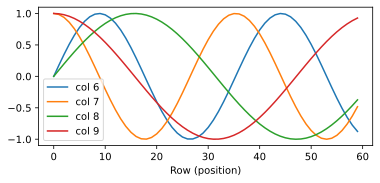

In [402]:
from torch import nn
from matplotlib import pyplot as plt 


#@save
class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        # shape: (1, max_len, num_hiddens)
        self.P = torch.zeros(size=(1, max_len, num_hiddens))

        # pos / 10000^(2i/d)
        X = torch.arange(max_len, dtype=torch.float32).reshape(-1, 1) / torch.pow(10000, (torch.arange(0, num_hiddens, 2, dtype=torch.float32) / num_hiddens))
        
        # 计算位置编码
        ## 偶数列使用正弦函数
        self.P[:, :, 0::2] = torch.sin(X)
        ## 奇数列使用余弦函数
        self.P[:, :, 1::2] = torch.cos(X)

    def forward(self, X):
        # X: (batch_size, seq_len, embedding_dim) = (batch_size, pos_len, num_hiddens)
        # P[:, :X.shape[1], :] : (1, pos_len, num_hiddens)
        # 自动广播了batch维度：(batch_size, pos_len, num_hiddens) + (1, pos_len, num_hiddens) = (batch_size, pos_len, num_hiddens)
        X = X + self.P[:, :X.shape[1], :].to(X.device)  # On the same device
        return self.dropout(X)


# 测试
batch_size, num_steps, encoding_dim = 32, 60, 32
pos_encoding = PositionalEncoding(num_hiddens=encoding_dim, max_len=10000, dropout=0.1)
pos_encoding.eval()

# 创建一个随机输入张量
X = torch.rand(size=(batch_size, num_steps, encoding_dim))

# 对输入张量进行位置编码
X = pos_encoding(X=X)

# 获取位置编码矩阵
batch_size, num_steps, encoding_dim = X.shape
P = pos_encoding.P[:, :num_steps, :encoding_dim]

# Draw a plot picture
plt.figure(figsize=(6, 2.5))
# num_steps: torch.arange(num_steps)
# P[0, :, 6:10].T[0]: 取P的第0个batch，num_hiddens的第6到10列，并转置
plt.plot(torch.arange(num_steps), P[0, :, 6:10].T[0], label='col 6')
plt.plot(torch.arange(num_steps), P[0, :, 6:10].T[1], label='col 7')
plt.plot(torch.arange(num_steps), P[0, :, 6:10].T[2], label='col 8')
plt.plot(torch.arange(num_steps), P[0, :, 6:10].T[3], label='col 9')
plt.xlabel('Row (position)')
plt.legend()

#### 11.6.2.2. <a id='toc11_6_2_2_'></a>[相对位置编码](#toc0_)
相对位置编码（Relative Positional Encoding）可以通过学习矩阵或嵌入层来表示位置差值。相对位置编码不直接关心位置 𝑝𝑜𝑠 的绝对位置，而是关心两个位置之间的距离 𝑝𝑜𝑠𝑖−𝑝𝑜𝑠𝑗。这在长序列中非常有用，因为它不局限于特定位置，而是考虑相对距离。

In [403]:
import torch
from torch import nn 


class RelativePositionalEncoding(nn.Module):
    def __init__(self, num_hiddens, max_len=1000):
        super().__init__()
        self.num_hiddens = num_hiddens
        self.max_len = max_len

        # 创建一个足够长的相对位置编码矩阵
        self.relative_positions = torch.zeros(size=(max_len, max_len, num_hiddens))
        for i in range(max_len):
            for j in range(max_len):
                relative_position = i - j
                self.relative_positions[i, j, :] = self._get_relative_position_encoding(relative_position)

    def _get_relative_position_encoding(self, relative_position):
        # 使用正弦和余弦函数计算相对位置编码
        encoding = torch.zeros(self.num_hiddens)
        for i in range(0, self.num_hiddens, 2):
            encoding[i] = torch.sin(torch.tensor(relative_position / (10000 ** (i / self.num_hiddens))))
            if i + 1 < self.num_hiddens:
                encoding[i + 1] = torch.cos(torch.tensor(relative_position / (10000 ** ((i + 1) / self.num_hiddens))))
        return encoding

    def forward(self, X):
        batch_size, seq_len, _ = X.size()
        relative_positions = self.relative_positions[:seq_len, :seq_len, :].to(X.device)
        return X + relative_positions


# 测试相对位置编码
batch_size, encoding_dim, num_steps = 32, 60, 32
relative_pos_encoding = RelativePositionalEncoding(num_hiddens=encoding_dim, max_len=num_steps)
relative_pos_encoding.eval()

# 创建一个随机输入张量
X = torch.zeros(size=(batch_size, num_steps, encoding_dim))
X_encoded = relative_pos_encoding(X=X)

print(X_encoded.shape)  # 应输出: torch.Size([32, 60, 32])

torch.Size([32, 32, 60])


#### 11.6.2.3. <a id='toc11_6_2_3_'></a>[可学习的位置编码](#toc0_)

In [404]:
import torch 
from torch import nn 


class LearnedPositionalEncoding(nn.Module):
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super().__init__()
        # 可学习的参数
        self.position_encoding = nn.Parameter(torch.zeros(size=(max_len, num_hiddens)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, X):
        # X: (batch_size, seq_len, embedding_dim)
        seq_len = X.size(1)
        X = X + self.position_encoding[:seq_len, :].unsqueeze(0)
        return self.dropout(X)
    

# Test
batch_size, num_steps, encoding_dim = 32, 60, 32

learned_pos_encoding = LearnedPositionalEncoding(num_hiddens=encoding_dim, dropout=0, max_len=num_steps)
learned_pos_encoding.eval()

X = torch.zeros(size=(batch_size, num_steps, encoding_dim))
X = learned_pos_encoding(X=X)

print(X.shape)  # 应输出: torch.Size([32, 60, 32])

torch.Size([32, 60, 32])


### 11.6.3. <a id='toc11_6_3_'></a>[基于位置的前馈网络](#toc0_)

In [408]:
from torch import nn


#@save
class PositionWiseFFN(nn.Module):
    """基于位置的前馈网络"""

    def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs, **kwargs):
        super().__init__(**kwargs)
        self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_outputs)

    def forward(self, X):
        return self.dense2(self.relu(self.dense1(X)))


# 测试
batch_size, seq_len, embed_size = 2, 3, 4

# 实例化对象
ffn = PositionWiseFFN(ffn_num_input=embed_size, ffn_num_hiddens=4, ffn_num_outputs=embed_size)
ffn.eval()

# (batch_size, seq_len, embed_size)
x = torch.ones(size=(batch_size, seq_len, embed_size))

# (batch_size, seq_len, ffn_num_outputs)
y = ffn(x)

x.shape, y.shape

(torch.Size([2, 3, 4]), torch.Size([2, 3, 4]))

### 11.6.4. <a id='toc11_6_4_'></a>[残差连接和层规范化](#toc0_)

In [385]:
ln = nn.LayerNorm(2)
bn = nn.BatchNorm1d(2)


# 测试
X = torch.tensor([[1, 2], 
                  [2, 3]], dtype=torch.float32)

# 在训练模式下计算X的均值和方差
print('layer norm:', ln(X), '\nbatch norm:', bn(X))

layer norm: tensor([[-1.0000,  1.0000],
        [-1.0000,  1.0000]], grad_fn=<NativeLayerNormBackward0>) 
batch norm: tensor([[-1.0000, -1.0000],
        [ 1.0000,  1.0000]], grad_fn=<NativeBatchNormBackward0>)


In [412]:
#@save
class AddNorm(nn.Module):
    """残差连接后进行层规范化"""
    def __init__(self, normalized_shape, dropout, **kwargs):
        super(AddNorm, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)
        self.ln = nn.LayerNorm(normalized_shape)

    def forward(self, X, Y):
        return self.ln(self.dropout(Y) + X)


# 测试
batch_size, seq_len, embed_size = 2, 3, 4

# 实例化对象
add_norm = AddNorm(normalized_shape=embed_size, dropout=0.5)
add_norm.eval()

# 测试
X = torch.ones(size=(batch_size, seq_len, embed_size))

add_norm(X=X, Y=X).shape

torch.Size([2, 3, 4])

### 11.6.5. <a id='toc11_6_5_'></a>[编码器](#toc0_)

In [415]:
from torch import nn
from d2l import torch as d2l


#@save
class EncoderBlock(nn.Module):
    """Transformer编码器块"""
    def __init__(self, key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, use_bias=False, **kwargs):
        super(EncoderBlock, self).__init__(**kwargs)
        # From d2l
        # self.attention = d2l.MultiHeadAttention(
        #     key_size, query_size, value_size, num_hiddens, num_heads, dropout,
        #     use_bias)

        # From 自己
        self.attention = MultiHeadAttention(
            num_heads = num_heads, 
            query_size = query_size, 
            key_size = key_size, 
            num_hiddens = num_hiddens, 
            value_size = value_size,
            attention_type='dot',
            dropout = dropout
        )
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens, num_hiddens)
        self.addnorm2 = AddNorm(norm_shape, dropout)

    def forward(self, X, valid_lens=None):
        Y = self.addnorm1(X=X, Y=self.attention(queries=X, keys=X, values=X, valid_lens=valid_lens))
        return self.addnorm2(X=Y, Y=self.ffn(Y))


# 测试
batch_size, seq_len, embed_size = 2, 100, 24
key_size, query_size, value_size, num_heads, num_hiddens, dropout = 24, 24, 24, 8, 24, 0.5 
norm_shape = [100, 24]
ffn_num_input, ffn_num_hiddens = 24, 48
 
encoder_blk = EncoderBlock(key_size=key_size, query_size=query_size, value_size=value_size, num_hiddens=num_hiddens, norm_shape=norm_shape, ffn_num_input=ffn_num_input, ffn_num_hiddens=ffn_num_hiddens, num_heads=num_heads, dropout=dropout)
encoder_blk.eval()

X = torch.ones(size=(batch_size, seq_len, embed_size))

encoder_blk(X).shape

torch.Size([2, 100, 24])

In [388]:
#@save
class TransformerEncoder(nn.Module):
    """Transformer编码器"""
    def __init__(self, vocab_size, key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, use_bias=False, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i), EncoderBlock(key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, use_bias))

    def forward(self, X, *args):
        # 因为位置编码值在-1和1之间，
        # 因此嵌入值乘以嵌入维度的平方根进行缩放，
        # 然后再与位置编码相加。
        # X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        X = self.pos_encoding(self.embedding(X) * torch.sqrt(torch.tensor(self.num_hiddens)))
        self.attention_weights = [None] * len(self.blks)
        for i, blk in enumerate(self.blks):
            X = blk(X)
            # self.attention_weights[i] = blk.attention.attention.attention_weights_numpy
        return X


# 测试
encoder = TransformerEncoder(
    vocab_size=200, 
    key_size=24, 
    query_size=24, 
    value_size=24, 
    num_hiddens=24, 
    norm_shape=[100, 24], 
    ffn_num_input=24, 
    ffn_num_hiddens=48, 
    num_heads=8, 
    num_layers=2, 
    dropout=0.5
)
encoder.eval()

encoder(torch.ones((2, 100), dtype=torch.long)).shape

torch.Size([2, 100, 24])

### 11.6.6. <a id='toc11_6_6_'></a>[解码器](#toc0_)

In [418]:
#@tab pytorch
class DecoderBlock(nn.Module):
    # The `i`-th block in the decoder
    def __init__(self, key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, i, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)
        self.i = i
        # self.attention1 = d2l.MultiHeadAttention(key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.attention1 = MultiHeadAttention(
            num_heads = num_heads, 
            query_size = query_size, 
            key_size = key_size, 
            num_hiddens = num_hiddens, 
            value_size = value_size,
            attention_type='dot',
            dropout = dropout
        )   
        self.addnorm1 = AddNorm(norm_shape, dropout)
        # self.attention2 = d2l.MultiHeadAttention(key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.attention2 = MultiHeadAttention(
            num_heads = num_heads, 
            query_size = query_size, 
            key_size = key_size, 
            num_hiddens = num_hiddens, 
            value_size = value_size,
            attention_type='dot'
        )
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens, num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)

    def forward(self, X, state):
        enc_outputs, enc_valid_lens = state[0], state[1]
        # During training, all the tokens of any output sequence are processed
        # at the same time, so `state[2][self.i]` is `None` as initialized.
        # When decoding any output sequence token by token during prediction,
        # `state[2][self.i]` contains representations of the decoded output at
        # the `i`-th block up to the current time step
        # X: (batch_size, seq_len, embed_size)
        if state[2][self.i] is None:
            key_values = X
        else:
            key_values = torch.cat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        
        if self.training:  
            batch_size, num_steps, _ = X.shape
            # Shape of `dec_valid_lens`: (`batch_size`, `num_steps`), where
            # every row is [1, 2, ..., `num_steps`]
            dec_valid_lens = torch.arange(1, num_steps + 1, device=X.device).repeat(batch_size, 1)
        else:
            dec_valid_lens = None

        # Self-attention
        X2 = self.attention1(X, key_values, key_values, dec_valid_lens)
        Y = self.addnorm1(X, X2)
        # Encoder-decoder attention. Shape of `enc_outputs`:
        # (`batch_size`, `num_steps`, `num_hiddens`)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs, enc_valid_lens)
        Z = self.addnorm2(Y, Y2)
        return self.addnorm3(Z, self.ffn(Z)), state
    

# 测试
decoder_blk = DecoderBlock(
    key_size=key_size, 
    query_size=query_size, 
    value_size=value_size, 
    num_hiddens=num_hiddens, 
    norm_shape=norm_shape, 
    ffn_num_input=ffn_num_input, 
    ffn_num_hiddens=ffn_num_hiddens, 
    num_heads=num_heads, 
    dropout=dropout, 
    i=0
)
decoder_blk.eval()

X = d2l.ones((2, 100, 24))

state = [encoder_blk(X, valid_lens), valid_lens, [None]]

decoder_blk(X, state)[0].shape

torch.Size([2, 100, 24])

In [390]:
#@tab pytorch
class TransformerDecoder(nn.Module):
    def __init__(self, vocab_size, key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, **kwargs):
        super().__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i), DecoderBlock(key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, i))
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        return [enc_outputs, enc_valid_lens, [None] * self.num_layers]

    def forward(self, X, state):
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self._attention_weights = [[None] * len(self.blks) for _ in range (2)]
        for i, blk in enumerate(self.blks):
            X, state = blk(X, state)
            # Decoder self-attention weights
            self._attention_weights[0][i] = blk.attention1.attention.attention_weights
            # Encoder-decoder attention weights
            self._attention_weights[1][i] = blk.attention2.attention.attention_weights
        return self.dense(X), state

    @property
    def attention_weights(self):
        return self._attention_weights
    

# 测试
decoder = TransformerDecoder(
    vocab_size=200, 
    key_size=24, 
    query_size=24, 
    value_size=24, 
    num_hiddens=24, 
    norm_shape=[100, 24], 
    ffn_num_input=24, 
    ffn_num_hiddens=48, 
    num_heads=8, 
    num_layers=2, 
    dropout=0.5
)

decoder.eval()

TransformerDecoder(
  (embedding): Embedding(200, 24)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (blks): Sequential(
    (block0): DecoderBlock(
      (attention1): MultiHeadAttention(
        (W_q): Linear(in_features=24, out_features=24, bias=True)
        (W_k): Linear(in_features=24, out_features=24, bias=True)
        (W_v): Linear(in_features=24, out_features=24, bias=True)
        (attention): DotProductAttentionForMultiHeadAttention(
          (dropout): Dropout(p=0.5, inplace=False)
        )
        (W_o): Linear(in_features=24, out_features=24, bias=True)
      )
      (addnorm1): AddNorm(
        (dropout): Dropout(p=0.5, inplace=False)
        (ln): LayerNorm((100, 24), eps=1e-05, elementwise_affine=True)
      )
      (attention2): MultiHeadAttention(
        (W_q): Linear(in_features=24, out_features=24, bias=True)
        (W_k): Linear(in_features=24, out_features=24, bias=True)
        (W_v): Linear(in_features=24, out_feat

### 11.6.7. <a id='toc11_6_7_'></a>[基于Transformer的Seq2Seq网络](#toc0_)
```shell
基于Transformer的Seq2Seq神经网络框架。
```

loss 0.029, 7064.6 tokens/sec on cuda:0


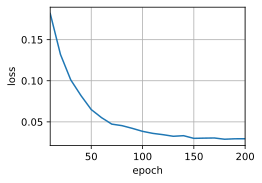

In [391]:
#@tab pytorch
num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 64, 10
lr, num_epochs, device = 0.005, 200, d2l.try_gpu()
ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [32]

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)

encoder = TransformerEncoder(
    vocab_size=len(src_vocab), 
    key_size=key_size, 
    query_size=query_size, 
    value_size=value_size, 
    num_hiddens=num_hiddens, 
    norm_shape=norm_shape, 
    ffn_num_input=ffn_num_input, 
    ffn_num_hiddens=ffn_num_hiddens, 
    num_heads=num_heads, 
    num_layers=num_layers, 
    dropout=dropout
)
decoder = TransformerDecoder(
    vocab_size=len(tgt_vocab), 
    key_size=key_size, 
    query_size=query_size, 
    value_size=value_size, 
    num_hiddens=num_hiddens, 
    norm_shape=norm_shape, 
    ffn_num_input=ffn_num_input, 
    ffn_num_hiddens=ffn_num_hiddens, 
    num_heads=num_heads, 
    num_layers=num_layers, 
    dropout=dropout
)
net = EncoderDecoder(encoder, decoder)
d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

In [392]:
#@tab all
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']

for eng, fra in zip(engs, fras):
    translation, dec_attention_weight_seq = d2l.predict_seq2seq(net, eng, src_vocab, tgt_vocab, num_steps, device, True)
    print(f'{eng} => {translation}, ',
          f'bleu {d2l.bleu(translation, fra, k=2):.3f}')

go . => va !,  bleu 1.000
i lost . => j'ai perdu .,  bleu 1.000
he's calm . => il est calme .,  bleu 1.000
i'm home . => je suis chez moi .,  bleu 1.000


## 11.7. <a id='toc11_7_'></a>[BERT](#toc0_)
BERT（Bidirectional Encoder Representations from Transformers）是基于Transformer架构的一种预训练语言模型，由Google在2018年提出。BERT使用了Transformer的编码器部分，并通过双向训练来捕捉上下文信息。BERT的主要创新在于它的预训练任务（如Masked Language Model和Next Sentence Prediction），使其在各种自然语言处理任务中表现出色。

- 就是Encoder部分

- Base：12层，768维，12个注意力头，110M参数

- Large：24层，1024维，16个注意力头，340M参数

### 11.7.1. <a id='toc11_7_1_'></a>[BERT encode block](#toc0_)


![BERT](./Pytorch_Pictures/BERT/BERT.jpg)

1. 词元化：将原始文本转化为词元列表（tokenization）。
2. 添加特殊标记：在词元列表前后添加 '<cls>' 和 '<sep>'。
3. 生成段标识：为每个词元分配相应的段标识。
4. 转换为ID：使用词汇表（vocab）将词元转换为对应的ID。
5. 位置编码：为每个词元添加位置编码。
6. 输入模型：将处理后的序列输入到 BERT 模型中进行训练或推理。

In [40]:
#@tab all
#@save
def get_tokens_and_segments(tokens_a, tokens_b=None):
    """
    Get tokens of the BERT input sequence and their segment IDs.
    Args:
        tokens_a: List[str] 第一段文本的词元列表（即第一句话的分词结果）。
        tokens_b: List[str] （可选）第二段文本的词元列表（即第二句话的分词结果）。在单句任务中，此参数可以省略。
    Returns:
        tokens: List[str] 词元列表，其中第一个词元是'<cls>'，表示序列的开始，最后一个词元是'<sep>'，表示序列的结束。
        segments: List[int] 段标识列表，其中0表示第一段，1表示第二段。
    """
    # classification (cls) and separator (sep) tokens are added
    tokens = ['<cls>'] + tokens_a + ['<sep>']
    # 0 and 1 are marking segment A and B, respectively
    segments = [0] * (len(tokens_a) + 2)
    if tokens_b is not None:
        tokens += tokens_b + ['<sep>']
        segments += [1] * (len(tokens_b) + 1)
    return tokens, segments


# 测试
tokens_a = ['You', 'are', 'the', 'best']
tokens_b = ['You', 'are', 'the', 'worst']

tokens, segments = get_tokens_and_segments(tokens_a, tokens_b)

print(f'tokens: {tokens}')
print(f'segments: {segments}')

tokens: ['<cls>', 'You', 'are', 'the', 'best', '<sep>', 'You', 'are', 'the', 'worst', '<sep>']
segments: [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [41]:
from torch import nn 
import torch 
from d2l import torch as d2l


#@tab pytorch
#@save
class BERTEncoder(nn.Module):
    """BERT encoder."""
    def __init__(self, vocab_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, max_len=1000, key_size=768, query_size=768, value_size=768, **kwargs):
        super(BERTEncoder, self).__init__(**kwargs)
        self.token_embedding = nn.Embedding(vocab_size, num_hiddens)
        self.segment_embedding = nn.Embedding(2, num_hiddens)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            # 此处调用TransformerEncoder中的EncoderBlock
            self.blks.add_module(f"{i}", d2l.EncoderBlock(key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, True))
        # In BERT, positional embeddings are learnable, thus we create a
        # parameter of positional embeddings that are long enough
        # 此处用nn.Parameter来创建一个可学习的参数，用于存储位置编码, 形状为(1, max_len, num_hiddens)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_len, num_hiddens))

    def forward(self, tokens, segments, valid_lens):
        # Shape of `X` remains unchanged in the following code snippet:
        # (batch size, max sequence length, `num_hiddens`)
        # 词元嵌入和段嵌入相加
        # (batch_size, seq_len, num_hiddens) + (batch_size, seq_len, num_hiddens) = (batch_size, seq_len, num_hiddens)
        X = self.token_embedding(tokens) + self.segment_embedding(segments)
        # 位置编码
        # (batch_size, seq_len, num_hiddens) + (1, seq_len, num_hiddens) = (batch_size, seq_len, num_hiddens)
        X = X + self.pos_embedding.data[:, :X.shape[1], :]
        for blk in self.blks:
            X = blk(X, valid_lens)
        # X: (batch_size, seq_len, num_hiddens)
        return X
    

# 测试
#@tab pytorch
vocab_size, num_hiddens, ffn_num_hiddens, num_heads = 10000, 768, 1024, 4
norm_shape, ffn_num_input, num_layers, dropout = [768], 768, 2, 0.2
encoder = BERTEncoder(vocab_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout)

#@tab pytorch
batch_size = 2
seq_len = 8

tokens = torch.randint(low=0, high=vocab_size, size=(batch_size, seq_len))
segments = torch.tensor([[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1]])

encoded_X = encoder(tokens, segments, None) 
# encoded_X: (batch_size, seq_len, num_hiddens)

# tokens.shape, segments.shape, encoded_X.shape
print(f'tokens.shape: {tokens.shape}')
print(f'segments.shape: {segments.shape}')
print(f'encoded_X.shape: {encoded_X.shape}')

tokens.shape: torch.Size([2, 8])
segments.shape: torch.Size([2, 8])
encoded_X.shape: torch.Size([2, 8, 768])


### 11.7.2. <a id='toc11_7_2_'></a>[Masked Language Modeling](#toc0_)
MaskLM 类通过多层感知机（MLP）对被遮蔽的位置进行预测，输出每个被遮蔽位置的词汇表概率分布。这是 BERT 模型在预训练阶段的核心任务之一，旨在让模型学习上下文关系和词汇之间的语义联系。通过这样的设计，模型能够在处理自然语言理解任务时表现出色，因为它已经通过大量的无监督数据学习到了丰富的语言表示。

- 选择一些位置进行预测，这些位置被称为被遮蔽的位置。
- 被遮蔽的位置上的词元被替换为特殊的“<mask>”词元。
- 模型需要预测这些被遮蔽位置上的原始词元。
- `从经过BERTEncoder编码后的序列中，提取出被遮蔽位置（<mask>, mlm_positions）上的子序列，然后通过多层感知机（MLP）进行预测。`


In [42]:
from torch import nn 
import torch 


#@tab pytorch
#@save
class MaskLM(nn.Module):
    """The masked language model task of BERT."""
    
    def __init__(self, vocab_size, num_hiddens, num_inputs=768, **kwargs):
        super(MaskLM, self).__init__(**kwargs)
        self.mlp = nn.Sequential(nn.Linear(num_inputs, num_hiddens),
                                 nn.ReLU(),
                                 nn.LayerNorm(num_hiddens),
                                 nn.Linear(num_hiddens, vocab_size)) # 输出： (batch_size, num_pred_positions, vocab_size)

    def forward(self, X, pred_positions):
        # pred_positions: (batch_size, num_pred_positions)
        num_pred_positions = pred_positions.shape[1]
        # 将预测位置展平成一维，用于后续的索引操作, 形状为 (batch_size * num_pred_positions), e.g., torch.tensor([1, 5, 2, 6, 1, 5])
        pred_positions = pred_positions.reshape(-1)

        # 生成批次索引
        ## X: (batch_size, seq_len, num_hiddens)
        batch_size = X.shape[0]
        ## 创建一个包含batch_size个元素的索引            
        batch_idx = torch.arange(0, batch_size) 
        ## Suppose that `batch_size` = 2, `num_pred_positions` = 3, then `batch_idx` is `torch.tensor([0, 0, 0, 1, 1, 1])`
        batch_idx = torch.repeat_interleave(batch_idx, num_pred_positions)

        # 根据batch_idx和pred_positions从X中提取出对应的子序列
        ## masked_X: (batch_size * num_pred_positions, num_hiddens), 索引：encoded_X[[0, 0, 0, 1, 1, 1], [1, 5, 2, 6, 1, 5]]
        masked_X = X[batch_idx, pred_positions]
        ## masked_X: (batch_size, num_pred_positions, num_hiddens)
        masked_X = masked_X.reshape((batch_size, num_pred_positions, -1))
        ## (batch_size, num_pred_positions, vocab_size)
        mlm_Y_hat = self.mlp(masked_X)
        return mlm_Y_hat
    

# 测试
#@tab pytorch
mlm = MaskLM(vocab_size, num_hiddens)

mlm_positions = torch.tensor([[1, 5, 2], [6, 1, 5]])    # (batch_size, num_pred_positions)

# encoded_X: (batch_size, seq_len, num_hiddens)
# mlm_positions: (batch_size, num_pred_positions)
# mlm_Y_hat: (batch_size, num_pred_positions, vocab_size)
mlm_Y_hat = mlm(encoded_X, mlm_positions)               

print(f'encoded_X.shape: {encoded_X.shape}')
print(f'mlm_positions.shape: {mlm_positions.shape}')
print(f'mlm_Y_hat.shape: {mlm_Y_hat.shape}')


encoded_X.shape: torch.Size([2, 8, 768])
mlm_positions.shape: torch.Size([2, 3])
mlm_Y_hat.shape: torch.Size([2, 3, 10000])


In [43]:
#@tab pytorch
mlm_Y = torch.tensor([[7, 8, 9], [10, 20, 30]])

loss = nn.CrossEntropyLoss(reduction='none')

mlm_l = loss(mlm_Y_hat.reshape((-1, vocab_size)), mlm_Y.reshape(-1))

mlm_l.shape

torch.Size([6])

### 11.7.3. <a id='toc11_7_3_'></a>[Next Sentence Prediction](#toc0_)
NextSentencePred 类通常与 BERT 模型的编码器部分结合使用。在预训练 BERT 模型时，除了进行 Masked Language Modeling（MLM）任务，还会同时进行 NSP 任务。通过 NSP 任务，模型能够学习句子之间的关系，这对于诸如问答系统、自然语言推理等下游任务具有重要意义。

In [44]:
#@tab pytorch
#@save
class NextSentencePred(nn.Module):
    """The next sentence prediction task of BERT."""
    
    def __init__(self, num_inputs, **kwargs):
        super(NextSentencePred, self).__init__(**kwargs)
        self.output = nn.Linear(num_inputs, 2)

    def forward(self, X):
        # `X` shape: (batch size, `num_hiddens`)
        return self.output(X)
    

# 测试
# PyTorch by default won't flatten the tensor as seen in mxnet where, if flatten=True, all but the first axis of input data are collapsed together
## encoded_X: (batch_size, seq_len, num_hiddens)
## flattened_encoded_X: (batch_size, seq_len * num_hiddens)
encoded_X = torch.flatten(encoded_X, start_dim=1)

# input_shape for NSP: (batch size, `num_hiddens`)
nsp = NextSentencePred(encoded_X.shape[-1])

# encoded_X: (batch_size, seq_len * num_hiddens)
# nsp_Y_hat: (batch_size, 2)
nsp_Y_hat = nsp(encoded_X) 

print(f'encoded_X.shape: {encoded_X.shape}')
print(f'nsp_Y_hat.shape: {nsp_Y_hat.shape}')


encoded_X.shape: torch.Size([2, 6144])
nsp_Y_hat.shape: torch.Size([2, 2])


In [45]:
#@tab pytorch
nsp_y = torch.tensor([0, 1])

nsp_l = loss(nsp_Y_hat, nsp_y)

nsp_l.shape

torch.Size([2])

### 11.7.4. <a id='toc11_7_4_'></a>[BERT模型](#toc0_)

![BERT模型](./Pytorch_Pictures/BERT/BERT_model.jpg)

In [46]:
#@tab pytorch
#@save
class BERTModel(nn.Module):
    """The BERT model."""
    
    def __init__(self, vocab_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, max_len=1000, key_size=768, query_size=768, value_size=768, hid_in_features=768, mlm_in_features=768, nsp_in_features=768):
        super(BERTModel, self).__init__()
        self.encoder = BERTEncoder(vocab_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, max_len=max_len, key_size=key_size, query_size=query_size, value_size=value_size)
        self.hidden = nn.Sequential(nn.Linear(hid_in_features, num_hiddens), nn.Tanh())
        self.mlm = MaskLM(vocab_size, num_hiddens, mlm_in_features)
        self.nsp = NextSentencePred(nsp_in_features)

    def forward(self, tokens, segments, valid_lens=None, pred_positions=None):
        # tokens: (batch_size, seq_len)
        # segments: (batch_size, seq_len)
        # valid_lens: (batch_size,)
        # pred_positions: (batch_size, num_pred_positions)
        # encoded_X: (batch_size, seq_len, num_hiddens)
        encoded_X = self.encoder(tokens, segments, valid_lens)
        if pred_positions is not None:
            # mlm_Y_hat: (batch_size, num_pred_positions, vocab_size)
            mlm_Y_hat = self.mlm(encoded_X, pred_positions)
        else:
            mlm_Y_hat = None
        # The hidden layer of the MLP classifier for next sentence prediction. 0 is the index of the '<cls>' token
        nsp_Y_hat = self.nsp(self.hidden(encoded_X[:, 0, :]))
        # encoded_X: (batch_size, seq_len, num_hiddens)
        # mlm_Y_hat: (batch_size, num_pred_positions, vocab_size)
        # nsp_Y_hat: (batch_size, 2)
        return encoded_X, mlm_Y_hat, nsp_Y_hat
    

# 测试

### 11.7.5. <a id='toc11_7_5_'></a>[Datasets for Pre-training](#toc0_)

In [48]:
import pandas as pd 
import os 
import random


#@tab all
#@save
d2l.DATA_HUB['wikitext-2'] = (
    'https://s3.amazonaws.com/research.metamind.io/wikitext/'
    'wikitext-2-v1.zip', '3c914d17d80b1459be871a5039ac23e752a53cbe')

#@save
def _read_wiki(data_dir):
    # file_name = os.path.join(data_dir, 'wiki.train.tokens')
    # with open(file_name, 'r') as f:
    #     lines = f.readlines()
    file_name = os.path.join(data_dir, 'train-00000-of-00001.parquet')
    df = pd.read_parquet(data_dir)
    lines = df['text'].tolist()
    # 大写字母转换为小写字母
    paragraphs = [line.strip().lower().split(' . ') for line in lines if len(line.split(' . ')) >= 2]
    random.shuffle(paragraphs)
    return paragraphs

#### 11.7.5.1. <a id='toc11_7_5_1_'></a>[生成下一句预测任务的数据](#toc0_)
下一句预测任务 是BERT预训练的两个主要任务之一（另一个是遮蔽语言模型）。NSP任务的目的是让模型理解句子之间的关系，判断一个句子是否是另一个句子的真实下一句。这对于下游任务如问答系统、自然语言推理等具有重要意义。  

函数 _get_next_sentence 的具体作用：
  - 正样本生成：以50%的概率，函数返回的 next_sentence 是 sentence 的真实下一句，对应标签 is_next=True。
  - 负样本生成：以另外50%的概率，函数返回的 next_sentence 是随机选择的其他段落中的句子，对应标签 is_next=False。
通过这种方式，模型在训练过程中能够接触到正负两类样本，从而学习句子之间的逻辑关系和上下文关联。

函数 _get_nsp_data_from_paragraph 的主要作用是从给定的段落中生成用于下一句预测任务的训练数据。具体步骤包括遍历段落中的句子对、生成句子对及其标签、过滤超长的句子对、格式化词元和段落标记，并将符合条件的句子对数据收集起来。通过这种方式，模型在训练过程中能够学习到句子之间的逻辑关系和上下文关联，从而提高其在诸如问答系统、自然语言推理等下游任务中的表现。

In [49]:
#@tab all
#@save
def _get_next_sentence(sentence, next_sentence, paragraphs):
    '''
    生成下一句预测任务的数据
    Args:
        sentence: 当前句子
        next_sentence: 下一句句子
        paragraphs: 段落列表
    Returns:
        sentence: 当前句子
        next_sentence: 下一句句子
        is_next: 是否是下一句
    '''
    # 1. 随机决定是否使用真实的下一句：使用 random.random() 生成一个 [0,1) 之间的随机数，如果随机数小于 0.5，则 is_next 设置为 True，表示使用真实的下一句
    if random.random() < 0.5:
        is_next = True
    else:
        # 生成负样本（不真实的下一句）：从 paragraphs 中随机选择一个段落，再从中随机选择一句作为 next_sentence。
        ## 设置 is_next 为 False，表示 next_sentence 不是 sentence 的真实下一句。
        # paragraphs是三重列表的嵌套
        next_sentence = random.choice(random.choice(paragraphs))
        is_next = False
    return sentence, next_sentence, is_next


# 测试
paragraphs = [
    [["句子1A"], ["句子1B"], ["句子1C"]],
    [["句子2A"], ["句子2B"], ["句子2C"]],
    [["句子3A"], ["句子3B"], ["句子3C"]]
]
sentence = ["句子1A"]
next_sentence = ["句子1B"]
result = _get_next_sentence(sentence, next_sentence, paragraphs)

print(result)

(['句子1A'], ['句子1B'], True)


In [50]:
#@tab all
#@save
def _get_nsp_data_from_paragraph(paragraph, paragraphs, vocab, max_len):
    ''' 
    生成下一句预测任务的数据
    Args:
        paragraph: 段落, 当前处理的段落，通常是由多个句子组成的列表。
        paragraphs: 段落列表, 所有段落的集合，用于在生成负样本时随机选择其他句子。
        vocab: 词汇表, 用于将词元转换为对应的索引或其他形式。
        max_len: 最大长度, 模型接受的最大句子对长度，包含了特殊词元 <cls> 和 <sep>。
    Returns:
        nsp_data_from_paragraph: 下一句预测任务的数据
    '''
    nsp_data_from_paragraph = []
    # 遍历当前段落中的每一个句子，除了最后一个句子，因为需要成对处理句子与下一句的关系。
    for i in range(len(paragraph) - 1):
        tokens_a, tokens_b, is_next = _get_next_sentence(sentence=paragraph[i], next_sentence=paragraph[i + 1], paragraphs=paragraphs)
        # 考虑1个'<cls>'词元和2个'<sep>'词元
        if len(tokens_a) + len(tokens_b) + 3 > max_len:
            continue
        tokens, segments = get_tokens_and_segments(tokens_a, tokens_b)
        nsp_data_from_paragraph.append((tokens, segments, is_next))
    return nsp_data_from_paragraph


# 测试
paragraphs = [
    [["句子1A"], ["句子1B"], ["句子1C"]],
    [["句子2A"], ["句子2B"], ["句子2C"]],
    [["句子3A"], ["句子3B"], ["句子3C"]]
]
result = _get_nsp_data_from_paragraph(paragraph=paragraphs[0], paragraphs=paragraphs, vocab=None, max_len=100)

print(f'nsp_data_from_paragraph: {result}')

nsp_data_from_paragraph: [(['<cls>', '句子1A', '<sep>', '句子2C', '<sep>'], [0, 0, 0, 1, 1], False), (['<cls>', '句子1B', '<sep>', '句子2C', '<sep>'], [0, 0, 0, 1, 1], False)]


#### 11.7.5.2. <a id='toc11_7_5_2_'></a>[生成遮蔽语言模型任务的数据](#toc0_)
函数 _replace_mlm_tokens 的主要功能是为遮蔽语言模型（Masked Language Model, MLM）任务生成新的输入词元序列，其中部分词元被替换为特殊的 <mask> 词元或随机词元。这是BERT等预训练模型在进行自监督学习时常用的策略。  
函数 _replace_mlm_tokens 实现了MLM任务中词元的随机替换，按照BERT的策略进行：
- 80% 的词元被替换为 <mask>。
- 10% 的词元保持不变。
- 10% 的词元被替换为随机词元。  

通过这种方式，模型在训练过程中能够学习到预测被遮蔽词元的能力，从而理解上下文关系和词汇之间的语义联系。

In [51]:
#@tab all
#@save
def _replace_mlm_tokens(tokens, candidate_pred_positions, num_mlm_preds, vocab):
    ''' 
    为遮蔽语言模型的输入创建新的词元副本，其中输入可能包含替换的“<mask>”或随机词元
    Args:
        tokens :list: 输入词元序列列表，通常是一个句子的词元化结果。
        candidate_pred_positions :list: 候选预测位置列表，表示哪些词元有可能被遮蔽和预测。
        num_mlm_preds :int: 需要遮蔽和预测的词元数量。
        vocab :Vocab: 词汇表对象，包含词元到索引的映射（idx_to_token）。
    Returns:
        mlm_input_tokens: 返回修改后的词元序列，包含被替换的词元。
        pred_positions_and_labels: 返回被替换词元的位置及其对应的原始词元，用于模型训练时的预测目标。
    '''
    # 创建一个输入词元的副本，准备在其中进行替换操作。
    mlm_input_tokens = [token for token in tokens]
    # 初始化一个空列表，用于存储被遮蔽词元的位置及其原始标签。
    pred_positions_and_labels = []
    # 打乱后用于在遮蔽语言模型任务中获取15%的随机词元进行预测
    random.shuffle(candidate_pred_positions)
    for mlm_pred_position in candidate_pred_positions:
        # 如果已经替换了所需数量的词元（num_mlm_preds），则退出循环。
        if len(pred_positions_and_labels) >= num_mlm_preds:
            break
        masked_token = None
        # 80%的时间：将词替换为“<mask>”词元
        if random.random() < 0.8:
            masked_token = '<mask>'
        else:
            # 10%的时间：保持词不变
            if random.random() < 0.5:
                masked_token = tokens[mlm_pred_position]
            # 10%的时间：用随机词替换该词
            else:
                masked_token = random.choice(vocab.idx_to_token)
        # 替换操作: 根据上述概率策略，对指定位置的词元进行替换。
        mlm_input_tokens[mlm_pred_position] = masked_token
        # 将预测位置 及其 原始标签添 加到列表中，用于后续的损失计算和模型训练。
        pred_positions_and_labels.append((mlm_pred_position, tokens[mlm_pred_position]))
    return mlm_input_tokens, pred_positions_and_labels


# 测试
tokens = ['<cls>', '我', '爱', '中', '国', '的', '美', '食', '<sep>', '我', '爱', '中', '国', '<sep>']
# 候选预测位置，需要遮蔽和预测的词元位置，1，2，3，4表示列表索引位置
candidate_pred_positions = [1, 2, 3, 4]
# 需要遮蔽和预测的词元数量
num_mlm_preds = 3
vocab = d2l.Vocab()
result = _replace_mlm_tokens(tokens=tokens, candidate_pred_positions=candidate_pred_positions, num_mlm_preds=num_mlm_preds, vocab=vocab)

print(f'tokens: \t {tokens}')
print(f'mlm_input_tokens: \t {result[0]}')
print(f'pred_positions_and_labels: \t {result[1]}')

tokens: 	 ['<cls>', '我', '爱', '中', '国', '的', '美', '食', '<sep>', '我', '爱', '中', '国', '<sep>']
mlm_input_tokens: 	 ['<cls>', '<mask>', '<mask>', '中', '<mask>', '的', '美', '食', '<sep>', '我', '爱', '中', '国', '<sep>']
pred_positions_and_labels: 	 [(2, '爱'), (1, '我'), (4, '国')]


- 只是替换15%的词元：
  - 在这被替换的15%词元中，有80%被替换为`<mask>`，
  - 有10%被替换为`其他词元`，
  - 有10%`保持不变`。

In [52]:
#@tab all
#@save
def _get_mlm_data_from_tokens(tokens, vocab):
    ''' 
    生成遮蔽语言模型任务的数据
    Args:
        tokens :list: 输入词元序列列表，通常是一个句子的词元化结果。
        vocab :Vocab: 词汇表对象，包含词元到索引的映射（idx_to_token）。
    Returns:
        vocab[mlm_input_tokens]：经过遮蔽处理后的词元序列，通常会被转换为词汇表中的索引。
        pred_positions：被遮蔽词元的位置索引列表。
        vocab[mlm_pred_labels]：被遮蔽词元的原始标签，通常也是词汇表中的索引。
    '''
    # 初始化候选预测位置列表
    candidate_pred_positions = []
    # 过滤特殊词元
    ## tokens是一个字符串列表
    for i, token in enumerate(tokens):
        # 在遮蔽语言模型任务中不会预测特殊词元
        if token in ['<cls>', '<sep>']:
            continue
        candidate_pred_positions.append(i)
    # 遮蔽语言模型任务中预测15%的随机词元
    num_mlm_preds = max(1, round(len(tokens) * 0.15))
    # 生成遮蔽后的词元和标签
    mlm_input_tokens, pred_positions_and_labels = _replace_mlm_tokens(tokens, candidate_pred_positions, num_mlm_preds, vocab)
    # 对被遮蔽的位置和标签进行排序,按照位置索引进行排序，确保顺序的一致性。这对于后续处理和训练时的批量操作非常重要。
    pred_positions_and_labels = sorted(pred_positions_and_labels, key=lambda x: x[0])
    # 分离位置索引和标签
    ## pred_positions：仅包含被遮蔽词元的位置索引。
    pred_positions = [v[0] for v in pred_positions_and_labels]
    ## mlm_pred_labels：包含这些位置上被遮蔽词元的原始标签。
    mlm_pred_labels = [v[1] for v in pred_positions_and_labels]
    return vocab[mlm_input_tokens], pred_positions, vocab[mlm_pred_labels]


# 测试
tokens = ['<cls>', '我', '爱', '中', '国', '的', '美', '食', '<sep>', '我', '爱', '中', '国', '<sep>']
result = _get_mlm_data_from_tokens(tokens=tokens, vocab=vocab)

print(f'mlm_input_tokens: \t {result[0]}')
print(f'pred_positions: \t {result[1]}')
print(f'mlm_pred_labels: \t {result[2]}')

mlm_input_tokens: 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
pred_positions: 	 [1, 5]
mlm_pred_labels: 	 [0, 0]


#### 11.7.5.3. <a id='toc11_7_5_3_'></a>[将文本转换为预训练数据集](#toc0_)
函数 _pad_bert_inputs 的主要作用是为BERT模型的`预训练任务`（包括遮蔽语言模型任务 MLM 和下一句预测任务 NSP）准备和`填充`输入数据。

In [53]:
#@tab pytorch
#@save
def _pad_bert_inputs(examples, max_len, vocab):
    ''' 
    为BERT模型的预训练任务（包括遮蔽语言模型任务 MLM 和下一句预测任务 NSP）准备和填充输入数据
    Args:
        examples :list:  包含多个样本的数据集。每个样本是一个元组，通常包含以下内容：
                        - token_ids：词元ID列表，表示一个句子的词元序列。
                        - pred_positions：被遮蔽词元的位置索引列表。
                        - mlm_pred_label_ids：被遮蔽词元的原始标签列表。
                        - segments：段落ID列表，表示句子在段落中的位置。
                        - is_next：布尔值，表示是否为下一句预测任务的标签。
        max_len :int: 模型接受的最大句子对长度，包含了特殊词元 <cls> 和 <sep>,所有样本将被填充或截断到这个长度。
        vocab :Vocab: 词汇表对象，包含词元到索引的映射（idx_to_token）。
    Returns:
        all_token_ids, all_segments, valid_lens, all_pred_positions, all_mlm_weights, all_mlm_labels, nsp_labels
    '''
    # 根据最大长度 max_len 计算出最多可以进行遮蔽预测的词元数量，通常占总长度的15%。
    max_num_mlm_preds = round(max_len * 0.15)
    # 初始化列表，用于存储填充后的数据
    ## all_token_ids: 存储填充后的词元索引。
    ## all_segments: 存储填充后的段落ID。
    ## valid_lens: 存储每个样本的有效长度，不包括'<pad>'的计数。    
    all_token_ids, all_segments, valid_lens = [], [], []
    ## all_pred_positions: 存储填充后的被遮蔽词元的位置索引。
    ## all_mlm_weights: 存储填充后的被遮蔽词元的权重。
    ## all_mlm_labels: 存储填充后的被遮蔽词元的原始标签。
    all_pred_positions, all_mlm_weights, all_mlm_labels = [], [], []
    ## nsp_labels: 存储填充后的下一句预测任务的标签。
    nsp_labels = []
    for (token_ids, pred_positions, mlm_pred_label_ids, segments, is_next) in examples:
        # 词元索引填充: 若 token_ids 的长度小于 max_len，则使用 <pad> 词元的索引进行填充，确保每个序列长度一致。
        all_token_ids.append(torch.tensor(token_ids + [vocab['<pad>']] * (max_len - len(token_ids)), dtype=torch.long))
        # 段落ID填充: 若 segments 的长度小于 max_len，则使用0进行填充，确保每个序列长度一致。
        all_segments.append(torch.tensor(segments + [0] * (max_len - len(segments)), dtype=torch.long))
        # valid_lens: 记录每个样本中实际有效的词元数量，即不包括填充的 <pad> 词元的数量。
        valid_lens.append(torch.tensor(len(token_ids), dtype=torch.float32))
        # 被遮蔽词元的位置索引填充: 若 pred_positions 的长度小于 max_num_mlm_preds，则使用0进行填充，确保每个序列长度一致。
        all_pred_positions.append(torch.tensor(pred_positions + [0] * (max_num_mlm_preds - len(pred_positions)), dtype=torch.long))
        # MLM 权重填充: 对于实际的遮蔽词元位置，赋予权重 1.0；对于填充的位置，赋予权重 0.0。这样在计算损失时，填充部分不会影响结果。
        all_mlm_weights.append(torch.tensor([1.0] * len(mlm_pred_label_ids) + [0.0] * (max_num_mlm_preds - len(pred_positions)), dtype=torch.float32))
        # MLM 标签填充: 对于实际的遮蔽词元，使用其真实的词元索引作为标签；对于填充的位置，使用 0 作为占位符。
        all_mlm_labels.append(torch.tensor(mlm_pred_label_ids + [0] * (max_num_mlm_preds - len(mlm_pred_label_ids)), dtype=torch.long))
        # NSP 标签: 记录每个样本的下一句预测标签，通常为 0 或 1，表示是否为真实的下一句。
        nsp_labels.append(torch.tensor(is_next, dtype=torch.long))
    return (all_token_ids, all_segments, valid_lens, all_pred_positions, all_mlm_weights, all_mlm_labels, nsp_labels)


# 测试
examples = [
    ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], True)
]
result = _pad_bert_inputs(examples=examples, max_len=10, vocab=vocab)

print(f'all_token_ids: {result[0]}')
print(f'all_segments: {result[1]}')
print(f'valid_lens: {result[2]}')
print(f'all_pred_positions: {result[3]}')
print(f'all_mlm_weights: {result[4]}')
print(f'all_mlm_labels: {result[5]}')
print(f'nsp_labels: {result[6]}')

all_token_ids: [tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]
all_segments: [tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]
valid_lens: [tensor(10.)]
all_pred_positions: [tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]
all_mlm_weights: [tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
all_mlm_labels: [tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]
nsp_labels: [tensor(1)]


#### 11.7.5.4. <a id='toc11_7_5_4_'></a>[创建数据集](#toc0_)

In [54]:
#@tab pytorch
#@save
class _WikiTextDataset(torch.utils.data.Dataset):
    def __init__(self, paragraphs, max_len):
        # 输入paragraphs[i]是代表段落的句子字符串列表；
        # 而输出paragraphs[i]是代表段落的句子列表，其中每个句子都是词元列表
        paragraphs = [d2l.tokenize(paragraph, token='word') for paragraph in paragraphs]
        sentences = [sentence for paragraph in paragraphs for sentence in paragraph]
        self.vocab = d2l.Vocab(sentences, min_freq=5, reserved_tokens=['<pad>', '<mask>', '<cls>', '<sep>'])
        # 获取下一句子预测任务的数据
        examples = []
        for paragraph in paragraphs:
            examples.extend(_get_nsp_data_from_paragraph(paragraph, paragraphs, self.vocab, max_len))
        # 获取遮蔽语言模型任务的数据
        examples = [(_get_mlm_data_from_tokens(tokens, self.vocab) + (segments, is_next))
                     for tokens, segments, is_next in examples]
        # 填充输入
        (self.all_token_ids, 
         self.all_segments, 
         self.valid_lens,
         self.all_pred_positions, 
         self.all_mlm_weights,
         self.all_mlm_labels, 
         self.nsp_labels) = _pad_bert_inputs(examples, max_len, self.vocab)

    def __getitem__(self, idx):
        return (self.all_token_ids[idx], 
                self.all_segments[idx],
                self.valid_lens[idx], 
                self.all_pred_positions[idx],
                self.all_mlm_weights[idx], 
                self.all_mlm_labels[idx],
                self.nsp_labels[idx])

    def __len__(self):
        return len(self.all_token_ids)

In [55]:
#@tab pytorch
#@save
def load_data_wiki(batch_size, max_len):
    """加载WikiText-2数据集"""
    num_workers = d2l.get_dataloader_workers()
    # data_dir = d2l.download_extract('wikitext-2', 'wikitext-2')
    data_dir = './data/wikipedia_text'
    paragraphs = _read_wiki(data_dir)
    train_set = _WikiTextDataset(paragraphs, max_len)
    train_iter = torch.utils.data.DataLoader(train_set, batch_size, shuffle=True, num_workers=num_workers)
    return train_iter, train_set.vocab

In [56]:
#@tab all
batch_size, max_len = 512, 64
train_iter, vocab = load_data_wiki(batch_size, max_len)

for (tokens_X, segments_X, valid_lens_x, pred_positions_X, mlm_weights_X, mlm_Y, nsp_y) in train_iter:
    print(tokens_X.shape, 
          segments_X.shape, 
          valid_lens_x.shape,
          pred_positions_X.shape, 
          mlm_weights_X.shape, 
          mlm_Y.shape,
          nsp_y.shape)
    break

torch.Size([512, 64]) torch.Size([512, 64]) torch.Size([512]) torch.Size([512, 10]) torch.Size([512, 10]) torch.Size([512, 10]) torch.Size([512])


In [57]:
len(vocab)

20256

### 11.7.6. <a id='toc11_7_6_'></a>[预训练BERT](#toc0_)

In [58]:
batch_size, max_len = 512, 64
train_iter, vocab = load_data_wiki(batch_size, max_len)

In [60]:
#@tab pytorch
#@save
def _get_batch_loss_bert(net, loss, vocab_size, tokens_X, segments_X, valid_lens_x, pred_positions_X, mlm_weights_X, mlm_Y, nsp_y):
    ''' 
    计算BERT模型的遮蔽语言模型损失和下一句预测任务损失。
    Args:
        net :BERTModel: BERT模型实例。
        loss :nn.CrossEntropyLoss: 损失函数实例。
        vocab_size :int: 词汇表大小。
        tokens_X :torch.Tensor: 输入词元索引。
        segments_X :torch.Tensor: 输入段落ID。
        valid_lens_x :torch.Tensor: 有效长度。
    Returns:
        mlm_l :torch.Tensor: 遮蔽语言模型损失。
        nsp_l :torch.Tensor: 下一句预测任务损失。
        l :torch.Tensor: 总损失。
    '''
    # 前向传播
    _, mlm_Y_hat, nsp_Y_hat = net(tokens_X, segments_X, valid_lens_x.reshape(-1), pred_positions_X)
    # 计算遮蔽语言模型损失
    mlm_l = loss(mlm_Y_hat.reshape(-1, vocab_size), mlm_Y.reshape(-1)) * mlm_weights_X.reshape(-1, 1)
    mlm_l = mlm_l.sum() / (mlm_weights_X.sum() + 1e-8)
    # 计算下一句子预测任务的损失
    nsp_l = loss(nsp_Y_hat, nsp_y)
    l = mlm_l + nsp_l
    return mlm_l, nsp_l, l

In [3]:
str(123)

'123'

MLM loss 5.616, NSP loss 0.743
7495.3 sentence pairs/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


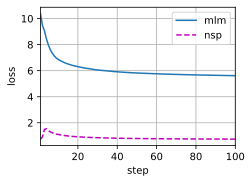

In [61]:
#@tab pytorch
def train_bert(train_iter, net, loss, vocab_size, devices, num_steps):
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    trainer = torch.optim.Adam(net.parameters(), lr=0.01)
    step, timer = 0, d2l.Timer()
    animator = d2l.Animator(xlabel='step', ylabel='loss', xlim=[1, num_steps], legend=['mlm', 'nsp'])
    # 遮蔽语言模型损失的和，下一句预测任务损失的和，句子对的数量，计数
    metric = d2l.Accumulator(4)
    num_steps_reached = False
    while step < num_steps and not num_steps_reached:
        for tokens_X, segments_X, valid_lens_x, pred_positions_X, mlm_weights_X, mlm_Y, nsp_y in train_iter:
            tokens_X = tokens_X.to(devices[0])
            segments_X = segments_X.to(devices[0])
            valid_lens_x = valid_lens_x.to(devices[0])
            pred_positions_X = pred_positions_X.to(devices[0])
            mlm_weights_X = mlm_weights_X.to(devices[0])
            mlm_Y, nsp_y = mlm_Y.to(devices[0]), nsp_y.to(devices[0])
            trainer.zero_grad()
            timer.start()
            mlm_l, nsp_l, l = _get_batch_loss_bert(net, loss, vocab_size, tokens_X, segments_X, valid_lens_x, pred_positions_X, mlm_weights_X, mlm_Y, nsp_y)
            l.backward()
            trainer.step()
            metric.add(mlm_l, nsp_l, tokens_X.shape[0], 1)
            timer.stop()
            animator.add(step + 1, (metric[0] / metric[3], metric[1] / metric[3]))
            step += 1
            if step == num_steps:
                num_steps_reached = True
                break

    print(f'MLM loss {metric[0] / metric[3]:.3f}, '
          f'NSP loss {metric[1] / metric[3]:.3f}')
    print(f'{metric[2] / timer.sum():.1f} sentence pairs/sec on '
          f'{str(devices)}')
    

#@tab mxnet, pytorch
# train_bert(train_iter, net, loss, len(vocab), devices, 100000)
train_bert(train_iter, net, loss, len(vocab), devices, 100)

In [110]:
# torch.save(net.state_dict(), 'Pytorch_params/BERT/bert_5000.pt')
# torch.save(net.state_dict(), 'Pytorch_params/BERT/bert_50000.pt')

### 11.7.7. <a id='toc11_7_7_'></a>[用BERT表示文本](#toc0_)

In [63]:
#@tab pytorch
def get_bert_encoding(net, tokens_a, tokens_b=None):
    ''' 
    获取BERT模型的文本表示。
    Args:
        net :BERTModel: BERT模型实例。
        tokens_a :list: 第一个文本的词元列表。
        tokens_b :list: 第二个文本的词元列表（可选）。
    Returns:
        encoded_X :torch.Tensor: 文本的BERT表示。
    '''
    tokens, segments = d2l.get_tokens_and_segments(tokens_a, tokens_b)
    token_ids = torch.tensor(vocab[tokens], device=devices[0]).unsqueeze(0)
    segments = torch.tensor(segments, device=devices[0]).unsqueeze(0)
    valid_len = torch.tensor(len(tokens), device=devices[0]).unsqueeze(0)
    encoded_X, _, _ = net(token_ids, segments, valid_len)
    return encoded_X

In [64]:
#@tab all
tokens_a = ['a', 'crane', 'is', 'flying']
encoded_text = get_bert_encoding(net, tokens_a)
# 词元：'<cls>','a','crane','is','flying','<sep>'
encoded_text_cls = encoded_text[:, 0, :]
encoded_text_crane = encoded_text[:, 2, :]

# encoded_text.shape, encoded_text_cls.shape, encoded_text_crane[0][:3]
print(f'encoded_text.shape: {encoded_text.shape}')
print(f'encoded_text_cls.shape: {encoded_text_cls.shape}')
print(f'encoded_text_crane.shape: {encoded_text_crane.shape}')
print(f'encoded_text_crane[0][:3]: {encoded_text_crane[0][:3]}')

encoded_text.shape: torch.Size([1, 6, 128])
encoded_text_cls.shape: torch.Size([1, 128])
encoded_text_crane.shape: torch.Size([1, 128])
encoded_text_crane[0][:3]: tensor([-0.6918, -0.0320,  0.0174], device='cuda:0', grad_fn=<SliceBackward0>)


In [65]:
#@tab all
tokens_a, tokens_b = ['a', 'crane', 'driver', 'came'], ['he', 'just', 'left']
encoded_pair = get_bert_encoding(net, tokens_a, tokens_b)
# 词元：'<cls>','a','crane','driver','came','<sep>','he','just','left','<sep>'
encoded_pair_cls = encoded_pair[:, 0, :]
encoded_pair_crane = encoded_pair[:, 2, :]

# encoded_pair.shape, encoded_pair_cls.shape, encoded_pair_crane[0][:3]
print(f'encoded_pair.shape: {encoded_pair.shape}')
print(f'encoded_pair_cls.shape: {encoded_pair_cls.shape}')
print(f'encoded_pair_crane.shape: {encoded_pair_crane.shape}')
print(f'encoded_pair_crane[0][:3]: {encoded_pair_crane[0][:3]}')

encoded_pair.shape: torch.Size([1, 10, 128])
encoded_pair_cls.shape: torch.Size([1, 128])
encoded_pair_crane.shape: torch.Size([1, 128])
encoded_pair_crane[0][:3]: tensor([-0.7072,  0.0097,  1.1122], device='cuda:0', grad_fn=<SliceBackward0>)


## 11.8. <a id='toc11_8_'></a>[用BERT做微调](#toc0_)

### 11.8.1. <a id='toc11_8_1_'></a>[情感分析](#toc0_)

In [2]:
from d2l import torch as d2l


#@tab all
#@save
d2l.DATA_HUB['aclImdb'] = (
    'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    '01ada507287d82875905620988597833ad4e0903')

data_dir = d2l.download_extract('aclImdb', 'aclImdb')

In [4]:
import os 


#@tab all
#@save
def read_imdb(data_dir, is_train):
    """Read the IMDb review dataset text sequences and labels."""
    data, labels = [], []
    for label in ('pos', 'neg'):
        folder_name = os.path.join(data_dir, 'train' if is_train else 'test', label)
        for file in os.listdir(folder_name):
            with open(os.path.join(folder_name, file), 'rb') as f:
                review = f.read().decode('utf-8').replace('\n', '')
                data.append(review)
                labels.append(1 if label == 'pos' else 0)
    return data, labels

train_data = read_imdb(data_dir, is_train=True)
print('# trainings:', len(train_data[0]))
for x, y in zip(train_data[0][:3], train_data[1][:3]):
    print('label:', y, 'review:', x[0:100])

# trainings: 25000
label: 1 review: Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postw
label: 1 review: Zentropa is the most original movie I've seen in years. If you like unique thrillers that are influe
label: 1 review: Lars Von Trier is never backward in trying out new techniques. Some of them are very original while 


In [5]:
#@tab all
train_tokens = d2l.tokenize(train_data[0], token='word')
vocab = d2l.Vocab(train_tokens, min_freq=5, reserved_tokens=['<pad>'])

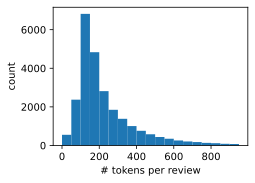

In [6]:
#@tab all
d2l.set_figsize()
d2l.plt.xlabel('# tokens per review')
d2l.plt.ylabel('count')
d2l.plt.hist([len(line) for line in train_tokens], bins=range(0, 1000, 50));

In [7]:
#@tab all
num_steps = 500  # sequence length
train_features = d2l.tensor([d2l.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in train_tokens])

print(train_features.shape)

torch.Size([25000, 500])


In [9]:
import torch


train_iter = d2l.load_array((train_features, torch.tensor(train_data[1])), 64)

for X, y in train_iter:
    print('X:', X.shape, ', y:', y.shape)
    break
print('# batches:', len(train_iter))

X: torch.Size([64, 500]) , y: torch.Size([64])
# batches: 391


In [10]:
#@tab pytorch
#@save
def load_data_imdb(batch_size, num_steps=500):
    """Return data iterators and the vocabulary of the IMDb review dataset."""
    data_dir = d2l.download_extract('aclImdb', 'aclImdb')
    train_data = read_imdb(data_dir, True)
    test_data = read_imdb(data_dir, False)
    train_tokens = d2l.tokenize(train_data[0], token='word')
    test_tokens = d2l.tokenize(test_data[0], token='word')
    vocab = d2l.Vocab(train_tokens, min_freq=5)
    train_features = torch.tensor([d2l.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in train_tokens])
    test_features = torch.tensor([d2l.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in test_tokens])
    train_iter = d2l.load_array((train_features, torch.tensor(train_data[1])), batch_size)
    test_iter = d2l.load_array((test_features, torch.tensor(test_data[1])), batch_size, is_train=False)
    return train_iter, test_iter, vocab

#### 11.8.1.1. <a id='toc11_8_1_1_'></a>[使用RNN](#toc0_)

In [11]:
import torch
from torch import nn
from d2l import torch as d2l


batch_size = 64
train_iter, test_iter, vocab = d2l.load_data_imdb(batch_size)

#### 11.8.1.2. <a id='toc11_8_1_2_'></a>[使用CNN](#toc0_)

### 11.8.2. <a id='toc11_8_2_'></a>[自然语言推断](#toc0_)

#### 11.8.2.1. <a id='toc11_8_2_1_'></a>[使用Attention](#toc0_)

#### 11.8.2.2. <a id='toc11_8_2_2_'></a>[微调BERT](#toc0_)

In [1]:
#@tab pytorch
from d2l import torch as d2l
import json
import multiprocessing
import torch
from torch import nn
import os


#@tab pytorch
d2l.DATA_HUB['bert.base'] = (d2l.DATA_URL + 'bert.base.torch.zip',
                             '225d66f04cae318b841a13d32af3acc165f253ac')
d2l.DATA_HUB['bert.small'] = (d2l.DATA_URL + 'bert.small.torch.zip',
                              'c72329e68a732bef0452e4b96a1c341c8910f81f')

In [2]:
#@tab pytorch
def load_pretrained_model(pretrained_model, num_hiddens, ffn_num_hiddens, num_heads, num_layers, dropout, max_len, devices, bert_type='small'):
    data_dir = d2l.download_extract(pretrained_model)
    # Define an empty vocabulary to load the predefined vocabulary
    vocab = d2l.Vocab()
    vocab.idx_to_token = json.load(open(os.path.join(data_dir, 'vocab.json')))
    vocab.token_to_idx = {token: idx for idx, token in enumerate(vocab.idx_to_token)}
    if bert_type == 'small':    
        # parameters of BERT-small
        bert = d2l.BERTModel(len(vocab), num_hiddens, norm_shape=[256],
                         ffn_num_input=256, ffn_num_hiddens=ffn_num_hiddens,
                         num_heads=num_heads, num_layers=num_layers, dropout=dropout,
                         max_len=max_len, key_size=256, query_size=256,
                         value_size=256, hid_in_features=256,
                         mlm_in_features=256, nsp_in_features=256)
    else:
        # parameters of BERT-base
        bert = d2l.BERTModel(len(vocab), num_hiddens, norm_shape=[768],
                         ffn_num_input=768, ffn_num_hiddens=ffn_num_hiddens,
                         num_heads=num_heads, num_layers=num_layers, dropout=dropout,
                         max_len=max_len, key_size=768, query_size=768,
                         value_size=768, hid_in_features=768,
                         mlm_in_features=768, nsp_in_features=768)
    # Load pretrained BERT parameters
    bert.load_state_dict(torch.load(os.path.join(data_dir, 'pretrained.params')))
    return bert, vocab

In [7]:
#@tab all
# BERT-small
devices = d2l.try_all_gpus()
bert, vocab = load_pretrained_model(
    pretrained_model='bert.small', 
    num_hiddens=256, 
    ffn_num_hiddens=512, 
    num_heads=4,
    num_layers=2, 
    dropout=0.1, 
    max_len=512, 
    devices=devices,
    bert_type='small')
parameter_size(bert, torch.float32)

32.100967 M parameters
122.46 MB


/tmp/ipykernel_509516/614722111.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bert.load_state_dict(torch.load(os.path.join(data_dir, 'pretrained.params')))


In [8]:
# BERT-base
bert, vocab = load_pretrained_model(
    pretrained_model='bert.base',
    num_hiddens=768, 
    ffn_num_hiddens=3072, 
    num_heads=12,
    num_layers=12, 
    dropout=0.1, 
    max_len=512, 
    devices=devices,
    bert_type='base')
parameter_size(bert, torch.float32)

/tmp/ipykernel_509516/614722111.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bert.load_state_dict(torch.load(os.path.join(data_dir, 'pretrained.params')))


178.861159 M parameters
682.30 MB


In [9]:
#@tab pytorch
class SNLIBERTDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, max_len, vocab=None):
        all_premise_hypothesis_tokens = [[p_tokens, h_tokens] for p_tokens, h_tokens in zip(*[d2l.tokenize([s.lower() for s in sentences]) for sentences in dataset[:2]])]
        
        self.labels = torch.tensor(dataset[2])
        self.vocab = vocab
        self.max_len = max_len
        (self.all_token_ids, self.all_segments, self.valid_lens) = self._preprocess(all_premise_hypothesis_tokens)
        print('read ' + str(len(self.all_token_ids)) + ' examples')

    def _preprocess(self, all_premise_hypothesis_tokens):
        pool = multiprocessing.Pool(4)  # Use 4 worker processes
        out = pool.map(self._mp_worker, all_premise_hypothesis_tokens)
        all_token_ids = [token_ids for token_ids, segments, valid_len in out]
        all_segments = [segments for token_ids, segments, valid_len in out]
        valid_lens = [valid_len for token_ids, segments, valid_len in out]
        return (torch.tensor(all_token_ids, dtype=torch.long),
                torch.tensor(all_segments, dtype=torch.long), 
                torch.tensor(valid_lens))

    def _mp_worker(self, premise_hypothesis_tokens):
        p_tokens, h_tokens = premise_hypothesis_tokens
        self._truncate_pair_of_tokens(p_tokens, h_tokens)
        tokens, segments = d2l.get_tokens_and_segments(p_tokens, h_tokens)
        token_ids = self.vocab[tokens] + [self.vocab['<pad>']] * (self.max_len - len(tokens))
        segments = segments + [0] * (self.max_len - len(segments))
        valid_len = len(tokens)
        return token_ids, segments, valid_len

    def _truncate_pair_of_tokens(self, p_tokens, h_tokens):
        # Reserve slots for '<CLS>', '<SEP>', and '<SEP>' tokens for the BERT
        # input
        while len(p_tokens) + len(h_tokens) > self.max_len - 3:
            if len(p_tokens) > len(h_tokens):
                p_tokens.pop()
            else:
                h_tokens.pop()

    def __getitem__(self, idx):
        return (self.all_token_ids[idx], self.all_segments[idx], self.valid_lens[idx]), self.labels[idx]

    def __len__(self):
        return len(self.all_token_ids)

In [10]:
#@tab pytorch
# Reduce `batch_size` if there is an out of memory error. In the original BERT model, `max_len` = 512
batch_size, max_len, num_workers = 512, 128, d2l.get_dataloader_workers()
data_dir = d2l.download_extract('SNLI')
train_set = SNLIBERTDataset(d2l.read_snli(data_dir, True), max_len, vocab)
test_set = SNLIBERTDataset(d2l.read_snli(data_dir, False), max_len, vocab)
train_iter = torch.utils.data.DataLoader(train_set, batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(test_set, batch_size, num_workers=num_workers)

read 549367 examples
read 9824 examples


In [11]:
#@tab pytorch
class BERTClassifier(nn.Module):
    def __init__(self, bert, bert_type='small'):
        super(BERTClassifier, self).__init__()
        self.encoder = bert.encoder
        self.hidden = bert.hidden
        if bert_type == 'small':
            self.output = nn.Linear(256, 3)
        else:
            self.output = nn.Linear(768, 3)

    def forward(self, inputs):
        tokens_X, segments_X, valid_lens_x = inputs
        encoded_X = self.encoder(tokens_X, segments_X, valid_lens_x)
        return self.output(self.hidden(encoded_X[:, 0, :]))


#@tab pytorch
net = BERTClassifier(bert, bert_type='base')

loss 0.022, train acc 0.993, test acc 0.860
386.6 examples/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


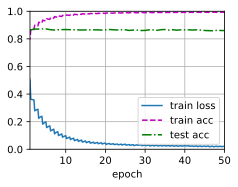

In [12]:
#@tab pytorch
lr, num_epochs = 1e-4, 50
trainer = torch.optim.Adam(net.parameters(), lr=lr)
loss = nn.CrossEntropyLoss(reduction='none')
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)

In [95]:
parameter_size(net, torch.float32)

132.125955 M parameters
504.02 MB


## 11.9. <a id='toc11_9_'></a>[GPT](#toc0_)
GPT（Generative Pre-trained Transformer）是OpenAI提出的基于Transformer架构的生成模型。GPT仅使用Transformer的解码器部分，通过单向训练（Unidirectional）进行预训练。GPT擅长文本生成任务，能够生成连贯且有意义的文本。GPT-1于2018年发布，随后是GPT-2（2019年）和GPT-3（2020年），每一代模型的生成能力都得到了显著提升。
```python
就是Transformer的Decoder部分。
```

## MoE
专家混合模型（Mixture of Experts, MoE）是一种用于处理大规模数据和模型的深度学习架构。MoE模型由多个专家网络和一个门控网络组成，专家网络负责处理不同的输入数据子集，门控网络负责动态地选择合适的专家网络。MoE模型能够有效地处理大规模数据和模型，提高模型的泛化能力和性能。

In [1]:
import torch
"""
This module implements a Mixture of Experts (MoE) model using PyTorch.

Classes:
    MoE: A PyTorch module implementing the Mixture of Experts model.

MoE class:
    __init__(self, input_dim, output_dim, num_experts, k=1):
        Initializes the MoE model.
        
        Args:
            input_dim (int): The dimension of the input features.
            output_dim (int): The dimension of the output features.
            num_experts (int): The number of expert networks.
            k (int): The number of experts to use for each input. Default is 1.

    forward(self, x):
        Forward pass of the MoE model.
        
        Args:
            x (torch.Tensor): The input tensor of shape (batch_size, input_dim).
        
        Returns:
            torch.Tensor: The output tensor of shape (batch_size, output_dim).

Example usage:


"""
from torch import nn

import torch.nn.functional as F

class MoE(nn.Module):
    def __init__(self, input_dim, output_dim, num_experts, k=1):
        super(MoE, self).__init__()
        self.num_experts = num_experts
        self.k = k  # Number of experts to use
        self.experts = nn.ModuleList([nn.Linear(input_dim, output_dim) for _ in range(num_experts)])
        self.gate = nn.Linear(input_dim, num_experts)

    def forward(self, x):
        # Compute the gating values
        gate_values = self.gate(x)
        gate_values = F.softmax(gate_values, dim=1)

        # Select top-k experts
        topk_gate_values, topk_indices = torch.topk(gate_values, self.k, dim=1)

        # Compute the output of the selected experts
        expert_outputs = torch.stack([self.experts[i](x) for i in range(self.num_experts)], dim=1)
        topk_expert_outputs = torch.stack([expert_outputs[:, i, :] for i in topk_indices], dim=1)

        # Compute the final output
        output = torch.sum(topk_gate_values.unsqueeze(2) * topk_expert_outputs, dim=1)
        return output


# Example usage
input_dim = 10
output_dim = 5
num_experts = 3
k = 2
batch_size = 4

moe = MoE(input_dim, output_dim, num_experts, k)
x = torch.randn(batch_size, input_dim)
output = moe(x)


print("Input:", x)
print("Output:", output)

Input: tensor([[-0.0175,  0.4796, -0.3629,  0.3384, -1.2579, -0.1807, -0.7914, -0.1752,
         -3.3145, -2.1341],
        [ 0.6781,  1.5992,  0.0348,  0.2335,  0.0074,  0.0514,  0.8723,  0.3556,
         -0.5605,  2.6458],
        [ 1.7146, -0.7278, -2.3194,  0.2181, -0.2695,  0.9692, -0.0338,  1.4140,
          0.2758, -0.4186],
        [ 1.0461, -1.0277,  0.4058,  0.2847, -0.4015, -0.0565, -1.6594, -0.6853,
         -0.1258, -0.1962]])
Output: tensor([[[-1.5784,  2.4017,  1.1923, -0.4639,  0.3437],
         [-1.2390,  1.8958,  0.9395, -0.3653,  0.2784]],

        [[ 0.6973, -0.4446, -0.9515,  1.1556,  0.0600],
         [ 0.5507, -0.3590, -0.7446,  0.9127,  0.0317]],

        [[ 0.2116,  0.2233, -0.5717,  0.1656, -0.5791],
         [ 0.1630,  0.1762, -0.4485,  0.1383, -0.4475]],

        [[-0.0688,  0.4920,  0.2282,  0.6065,  0.0124],
         [-0.0523,  0.3917,  0.1894,  0.4814,  0.0165]]],
       grad_fn=<SumBackward1>)


## 11.10. <a id='toc11_10_'></a>[Mamba](#toc0_)

In [ ]:
import torch
from torch import nn 
import torch.nn.functional as F


# 定义状态空间模型（SSM）模块
class SSM(nn.Module):
    def __init__(self, input_size, state_size):
        super(SSM, self).__init__()
        # 状态空间模型的参数矩阵 A, B, C, D
        self.A = nn.Parameter(torch.randn(state_size, state_size))
        self.B = nn.Parameter(torch.randn(state_size, input_size))
        self.C = nn.Parameter(torch.randn(input_size, state_size))
        self.D = nn.Parameter(torch.randn(input_size, input_size))
    
    def forward(self, x, h_prev):
        # 状态更新: h_t = A * h_{t-1} + B * x_t
        h_next = torch.tanh(self.A @ h_prev + self.B @ x)
        # 输出: y_t = C * h_t + D * x_t
        y = self.C @ h_next + self.D @ x
        return y, h_next

# 定义自注意力机制模块
class AttentionModule(nn.Module):
    def __init__(self, embed_size, num_heads):
        super(AttentionModule, self).__init__()
        self.attention = nn.MultiheadAttention(embed_size, num_heads)
    
    def forward(self, x):
        # x 的形状: [seq_len, batch_size, embed_size]
        attn_output, _ = self.attention(x, x, x)
        return attn_output

# 定义 Mamba 模型
class MambaModel(nn.Module):
    def __init__(self, input_size, state_size, embed_size, num_heads, num_layers, output_size, select_threshold=0.5):
        super(MambaModel, self).__init__()
        self.ssm = SSM(input_size, state_size)
        self.attention_module = AttentionModule(embed_size, num_heads)
        self.num_layers = num_layers
        self.fc = nn.Linear(embed_size, output_size)
        self.select_threshold = select_threshold
        self.embed_size = embed_size

    def forward(self, x):
        # x 的形状: [seq_len, batch_size, input_size]
        seq_len, batch_size, input_size = x.size()
        h = torch.zeros(batch_size, input_size).to(x.device)  # 初始化状态
        
        # 用于选择是否应用状态空间模型的掩码
        select_mask = (torch.rand(seq_len) > self.select_threshold).to(x.device)
        
        outputs = []
        for t in range(seq_len):
            if select_mask[t]:
                # 使用状态空间模型
                y, h = self.ssm(x[t], h)
            else:
                # 使用自注意力机制
                y = self.attention_module(x[t].unsqueeze(0)).squeeze(0)
            outputs.append(y)
        
        outputs = torch.stack(outputs, dim=0)
        
        # 将输出送入全连接层
        outputs = self.fc(outputs.mean(dim=0))
        return outputs


# 模型参数配置
input_size = 512     # 输入特征维度
state_size = 256     # 状态空间模型的状态维度
embed_size = 512     # 自注意力机制的嵌入维度
num_heads = 8        # 注意力头的数量
num_layers = 6       # 模型的层数
output_size = 10     # 输出类别的数量
select_threshold = 0.5  # 选择机制的阈值

# 创建模型实例
model = MambaModel(input_size, state_size, embed_size, num_heads, num_layers, output_size, select_threshold)

# 输入示例 (假设序列长度为 30，batch size 为 16)
input_data = torch.rand(30, 16, input_size)
output = model(input_data)

print(output.shape)  # 输出形状: [batch_size, output_size]


In [ ]:
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer
import torch


model_path = 'kuleshov-group/PlantCaduceus_l24'
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = AutoModelForMaskedLM.from_pretrained(model_path, trust_remote_code=True, device_map=device)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)

sequence = "ATGCGTACGATCGTAG"
encoding = tokenizer.encode_plus(
            sequence,
            return_tensors="pt",
            return_attention_mask=False,
            return_token_type_ids=False
        )
input_ids = encoding["input_ids"].to(device)
with torch.inference_mode():
    outputs = model(input_ids=input_ids, output_hidden_states=True)


# 12. <a id='toc12_'></a>[==============](#toc0_)

# 13. <a id='toc13_'></a>[炼丹心得](#toc0_)

## 13.1. <a id='toc13_1_'></a>[关于调参](#toc0_)
1. Pytorch没有变量、常量之分，不需要定义说明什么是变量，全部都是张量；

2. 因为变量定义后需要初始化，就相当于常量；

In [50]:
import torch 
from torch import nn 
import torch.nn.functional as F 


class MyLayer(nn.Module):
    '''带参数的，自定义层'''

    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(2, requires_grad=True))  # 变量，立即初始化，相当于常量
        self.bias = nn.Parameter(torch.zeros(1, requires_grad=True))    # 同上
    
    def forward(self, X):
        y_hat = self.weight.data@X + self.bias.data
        # y_hat = torch.matmul(self.weight.data, X) + self.bias.data    # 同上
        return F.relu(y_hat)


# Test
myLayer = MyLayer()

X = torch.ones(2)

myLayer(X)

tensor([1.5604])

In [51]:
myLayer.state_dict() # 访问神经网络参数

OrderedDict([('weight', tensor([ 2.0576, -0.4972])), ('bias', tensor([0.]))])

## 13.2. <a id='toc13_2_'></a>[模型选择](#toc0_)
模型的复杂度应该合适，不能太大，也不能太小。

## 13.3. <a id='toc13_3_'></a>[离散数据](#toc0_)
- 离散数据：数据是离散的，不能连续的，比如性别，颜色，类别等。
- 连续数据：数据是连续的，可以连续的，比如身高，体重，温度等。


在 PyTorch 中，one-hot 编码和embedding（嵌入）是两种常见的用于处理离散数据的方法，尤其是在自然语言处理（NLP）任务中。

### 13.3.1. <a id='toc13_3_1_'></a>[one-hot](#toc0_)
One-hot 编码将离散的分类变量（如单词、字符等）转换为高维稀疏向量，其中一个位置为 1，其余位置为 0。  
有向量无偏差表示；  
One-hot 编码生成的张量是稀疏的，随着类别数量增加，存储效率较低。

In [53]:
import torch 


# 先做广播，后比较即可
raw = [0, 1, 2, 3, 4]
raw = torch.tensor(raw)
col_raw = raw.reshape(5, 1)
col_raw == raw # （5， 1） 和 （1， 5）先广播后比较
torch.tensor(col_raw == raw) # 只是bool
one_hot = torch.tensor(col_raw == raw, dtype=torch.float32) # bool -> torch.float32

col_raw, one_hot

/tmp/ipykernel_3496130/1598271952.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(col_raw == raw) # 只是bool
/tmp/ipykernel_3496130/1598271952.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot = torch.tensor(col_raw == raw, dtype=torch.float32) # bool -> torch.float32


(tensor([[0],
         [1],
         [2],
         [3],
         [4]]),
 tensor([[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]))

In [67]:
import torch 
from torch.nn import functional as F


# 先做广播，后比较即可
raw = torch.tensor([0, 1, 2, 3, 4], dtype=torch.long)

# help(F.one_hot)
F.one_hot(raw, num_classes=5)

tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

### 13.3.2. <a id='toc13_3_2_'></a>[embedding](#toc0_)
Embedding 是一种将离散的索引映射为稠密向量的方式，用于学习类别之间的语义关系。  
相比 One-Hot 编码，Embedding 提供了一个低维的稠密向量表示（比如词向量）。  

Embedding 的特点：
- 输入是类别索引（通常是整数）。
- 输出是一个稠密向量，其维度由用户定义。
- 通常作为模型的一部分，通过反向传播自动更新。


#### 13.3.2.1. <a id='toc13_3_2_1_'></a>[使用 torch.nn.Embedding](#toc0_)

In [81]:
import torch 
from torch import nn 
from torch.nn import functional as F 


# 定义类别数量和嵌入维度
num_classes = 5 
embedding_dim = 3 

# 创建嵌入层
embedding = nn.Embedding(num_classes, embedding_dim)

# 输入类别索引
indices = torch.tensor([0, 2, 4])

# 获取嵌入向量
embedded = embedding(indices)

print(embedded)

tensor([[-0.3292, -0.7713,  0.6218],
        [-2.0660, -1.0436,  0.2645],
        [-0.3133,  0.4514, -0.9506]], grad_fn=<EmbeddingBackward0>)


#### 13.3.2.2. <a id='toc13_3_2_2_'></a>[初始化 Embedding 层](#toc0_)
嵌入层可以通过预训练向量（如 Word2Vec、GloVe）初始化。

In [83]:
from torch import nn  
from torch.nn import functional as F 


# 假设预训练向量
pretrained_weights = torch.tensor([
    [0.1, 0.2, 0.3],  # 类别 0
    [0.4, 0.5, 0.6],  # 类别 1
    [0.7, 0.8, 0.9],  # 类别 2
    [1.0, 1.1, 1.2],  # 类别 3
    [1.3, 1.4, 1.5]   # 类别 4
])

# 创建嵌入层并加载权重
embedding = nn.Embedding.from_pretrained(pretrained_weights)

# 输入类别索引
indices = torch.tensor([0, 2, 4])
embedded = embedding(indices)
print("Embedded Tensor:")
print(embedded)


Embedded Tensor:
tensor([[0.1000, 0.2000, 0.3000],
        [0.7000, 0.8000, 0.9000],
        [1.3000, 1.4000, 1.5000]])


## 13.4. <a id='toc13_4_'></a>[BN和LN](#toc0_)
Batch norm和Layer norm之间的区别  

* BatchNorm：在同一特征（同一列），不同样品之间（不同行）之间做的normalization？ standerlization？

* LayerNorm：在同一样品（同一行），不同特征（不同列）之间做的normalization？ standerlization？

In [ ]:
import torch 


torch.nn.BatchNorm1d()
torch.nn.LayerNorm()

In [166]:
from torch import nn 


x = torch.arange(10, dtype=torch.float32).reshape(2, 5)

ln = nn.LayerNorm(normalized_shape=x.shape)


x, ln(x)

(tensor([[0., 1., 2., 3., 4.],
         [5., 6., 7., 8., 9.]]),
 tensor([[-1.5667, -1.2185, -0.8704, -0.5222, -0.1741],
         [ 0.1741,  0.5222,  0.8704,  1.2185,  1.5667]],
        grad_fn=<NativeLayerNormBackward0>))

## 13.5. <a id='toc13_5_'></a>[掩码 (mask)](#toc0_)
在深度学习中，掩码（mask） 是一种用于选择性地处理或忽略数据元素的机制。掩码的常见形式是一个`布尔张量`或`数值张量`，与`目标张量的形状相匹配`，用来标记哪些元素应被关注或忽略。
掩码机制广泛应用于自然语言处理（NLP）、计算机视觉（CV）和其他深度学习任务中。  
```python 
scores: (3 x 5)
tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]])
        
mask: (3 x 5)
tensor([[ True,  True,  True, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True,  True,  True]])
```

掩码的作用和常见场景
1. 忽略无效数据  
在 NLP 中，序列可能具有不同的长度，为了对齐这些序列，通常会填充（padding）较短的序列。
掩码可以帮助模型忽略填充的部分，使得它们不会影响计算。
2. 选择性操作  
在计算损失或应用注意力机制时，掩码可以用来只关注有效的部分。
3. 实现自定义操作  
掩码还可以用于筛选数据、执行条件更新等操作。

### 13.5.1. <a id='toc13_5_1_'></a>[简单演示](#toc0_)

#### 13.5.1.1. <a id='toc13_5_1_1_'></a>[忽略填充](#toc0_)

In [40]:
import torch


# 序列张量，填充部分为 0
sequences = torch.tensor([
    [1, 2, 3, 0, 0],
    [4, 5, 0, 0, 0],
    [6, 7, 8, 9, 10]
])

# 创建掩码，标记非填充部分
# True 表示非填充部分，False 表示填充部分
mask = sequences != 0
print("Mask:", mask, sep='\n')

Mask:
tensor([[ True,  True,  True, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True,  True,  True]])


- 基于布尔掩码索引数据

In [41]:
# 使用掩码过滤张量，此处过滤掉0元素
sequences[mask]

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [42]:
# 使用掩码来选择指定张量，并进行替换操作
sequences[mask] = sequences[mask] * 2 

sequences

tensor([[ 2,  4,  6,  0,  0],
        [ 8, 10,  0,  0,  0],
        [12, 14, 16, 18, 20]])

- 基于掩码SoftMax计算

![基于掩码SoftMax计算](./Pytorch_Pictures/Mask/Masked_SoftMax.png)

In [49]:
# 基于掩码SoftMax计算
# 掩码通常与 PyTorch 的模块结合使用，例如注意力机制
from torch.nn import functional as F 


# 假设注意力分数
scores = torch.arange(15, dtype=torch.float32).reshape(3, 5)
print('scores:', scores, sep='\n')

# 创建掩码
## 数值掩码：序列张量，填充部分为 0
valid_length = torch.tensor([[1, 1, 1, 0, 0], 
                             [1, 1, 0, 0, 0], 
                             [1, 1, 1, 1, 1]], dtype=torch.float32)
print('valid_length:', valid_length, sep='\n')

## bool掩码：序列张量，填充部分为 False
mask = (valid_length != 0)
print('mask:', mask, sep='\n')

# 使用掩码填充分数
scores = scores.masked_fill(~mask, float('-inf')) # 填充部分设置为 -inf 
print('scores:', scores, sep='\n')

# 计算概率，-inf 会变成 0
probabilities = F.softmax(scores, dim=-1) # 计算概率
print('probabilities:', probabilities, sep='\n')

scores:
tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]])
valid_length:
tensor([[1., 1., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1.]])
mask:
tensor([[ True,  True,  True, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True,  True,  True]])
scores:
tensor([[ 0.,  1.,  2., -inf, -inf],
        [ 5.,  6., -inf, -inf, -inf],
        [10., 11., 12., 13., 14.]])
probabilities:
tensor([[0.0900, 0.2447, 0.6652, 0.0000, 0.0000],
        [0.2689, 0.7311, 0.0000, 0.0000, 0.0000],
        [0.0117, 0.0317, 0.0861, 0.2341, 0.6364]])


#### 13.5.1.2. <a id='toc13_5_1_2_'></a>[加权忽略](#toc0_)

In [7]:
import torch 


# 假设模型输出和目标值
output = torch.tensor([
    [0.1, 0.2, 0.3, 0.4, 0.5],
    [0.5, 0.6, 0.7, 0.8, 0.9],
    [0.9, 0.8, 0.7, 0.6, 0.5]
])

target = torch.tensor([
    [1, 2, 3, 0, 0],
    [4, 5, 0, 0, 0],
    [6, 7, 8, 9, 10]
])

mask = (target !=0)
print('mask:', mask, sep='\n')

# 损失函数
loss = (output - target.float())**2
print('loss:', loss, sep='\n')

# 使用掩码忽略填充部分
masked_loss = loss * mask
print('masked_loss:', masked_loss, sep='\n')

final_loss = masked_loss.sum() / mask.sum()  # 仅对非填充部分求平均
print("Final loss:", final_loss, sep='\n')


mask:
tensor([[ True,  True,  True, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True,  True,  True]])
loss:
tensor([[ 0.8100,  3.2400,  7.2900,  0.1600,  0.2500],
        [12.2500, 19.3600,  0.4900,  0.6400,  0.8100],
        [26.0100, 38.4400, 53.2900, 70.5600, 90.2500]])
masked_loss:
tensor([[ 0.8100,  3.2400,  7.2900,  0.0000,  0.0000],
        [12.2500, 19.3600,  0.0000,  0.0000,  0.0000],
        [26.0100, 38.4400, 53.2900, 70.5600, 90.2500]])
Final loss:
tensor(32.1500)


In [9]:
x = torch.arange(10).reshape(2, 5)

x, x.sum()

(tensor([[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]),
 tensor(45))

### 13.5.2. <a id='toc13_5_2_'></a>[注意力机制中的掩码](#toc0_)
在 Transformer 中，掩码常用于：
  1. Padding Mask：防止模型关注填充的部分。
  2. Causal Mask（未来掩码）：防止模型在自回归任务中关注未来的信息。

#### 13.5.2.1. <a id='toc13_5_2_1_'></a>[Padding Mask](#toc0_)

In [16]:
import torch 


# 0表示填充，1表示有效
valid_length = torch.tensor([
    [1, 1, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1]
])

mask = (valid_length !=0)
print('mask:', mask, sep='\n')
# 取反操作
print('~mask:', ~mask, sep='\n')


# 假设一批序列的注意力权重
attention_weights = torch.tensor([
    [0.1, 0.2, 0.3, 0.4, 0.5],
    [0.5, 0.6, 0.7, 0.8, 0.9],
    [0.9, 0.8, 0.7, 0.6, 0.5]
])

# 利用掩码设置填充部分的权重为 -inf
masked_attention = attention_weights.masked_fill(~mask, float('-inf'))
print("Masked Attention:", masked_attention, sep='\n')

mask:
tensor([[ True,  True,  True, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True,  True,  True]])
~mask:
tensor([[False, False, False,  True,  True],
        [False, False,  True,  True,  True],
        [False, False, False, False, False]])
Masked Attention:
tensor([[0.1000, 0.2000, 0.3000,   -inf,   -inf],
        [0.5000, 0.6000,   -inf,   -inf,   -inf],
        [0.9000, 0.8000, 0.7000, 0.6000, 0.5000]])


#### 13.5.2.2. <a id='toc13_5_2_2_'></a>[Causal Mask](#toc0_)
用于防止模型在解码时看到未来的词

In [20]:
seq_len = 5

# True 表示需要屏蔽的部分
causal_mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool()
print("Causal Mask:", causal_mask, sep='\n')

Causal Mask:
tensor([[False,  True,  True,  True,  True],
        [False, False,  True,  True,  True],
        [False, False, False,  True,  True],
        [False, False, False, False,  True],
        [False, False, False, False, False]])


### 13.5.3. <a id='toc13_5_3_'></a>[掩码注意力计算](#toc0_)

In [27]:
import torch 
from torch.nn import functional as F  


# 假设有一个批次的序列，长度为5
sequences = torch.tensor([[1, 2, 3, 0, 0],  # 0 表示填充
                          [4, 5, 0, 0, 0],
                          [6, 7, 8, 9, 0]])
sequences, sequences.shape

(tensor([[1, 2, 3, 0, 0],
         [4, 5, 0, 0, 0],
         [6, 7, 8, 9, 0]]),
 torch.Size([3, 5]))

In [43]:
# 创建一个mask，1表示有效部分，0表示填充部分
mask = (sequences != 0)
mask, mask.shape

(tensor([[ True,  True,  True, False, False],
         [ True,  True, False, False, False],
         [ True,  True,  True,  True, False]]),
 torch.Size([3, 5]))

In [46]:
# 假设有一个注意力得分矩阵
attention_scores = torch.rand(3, 5, 5)  # (batch_size, seq_length, seq_length)
attention_scores, attention_scores.shape

(tensor([[[0.1088, 0.1637, 0.7025, 0.6790, 0.9155],
          [0.2418, 0.1591, 0.7653, 0.2979, 0.8035],
          [0.3813, 0.7860, 0.1115, 0.2477, 0.6524],
          [0.6057, 0.3725, 0.7980, 0.8399, 0.1374],
          [0.2331, 0.9578, 0.3313, 0.3227, 0.0162]],
 
         [[0.2137, 0.6249, 0.4340, 0.1371, 0.5117],
          [0.1585, 0.0758, 0.2247, 0.0624, 0.1816],
          [0.9998, 0.5944, 0.6541, 0.0337, 0.1716],
          [0.3336, 0.5782, 0.0600, 0.2846, 0.2007],
          [0.5014, 0.3139, 0.4654, 0.1612, 0.1568]],
 
         [[0.2083, 0.3289, 0.1054, 0.9192, 0.4008],
          [0.9302, 0.6558, 0.0766, 0.8460, 0.3624],
          [0.3083, 0.0850, 0.0029, 0.6431, 0.3908],
          [0.6947, 0.0897, 0.8712, 0.1330, 0.4137],
          [0.6044, 0.7581, 0.9037, 0.9555, 0.1035]]]),
 torch.Size([3, 5, 5]))

In [45]:
# 使用masked_fill来忽略填充部分
# mask需要扩展到与attention_scores相同的形状
mask = mask.unsqueeze(1).expand(-1, sequences.size(1), -1)
mask, mask.shape

(tensor([[[ True,  True,  True, False, False],
          [ True,  True,  True, False, False],
          [ True,  True,  True, False, False],
          [ True,  True,  True, False, False],
          [ True,  True,  True, False, False]],
 
         [[ True,  True, False, False, False],
          [ True,  True, False, False, False],
          [ True,  True, False, False, False],
          [ True,  True, False, False, False],
          [ True,  True, False, False, False]],
 
         [[ True,  True,  True,  True, False],
          [ True,  True,  True,  True, False],
          [ True,  True,  True,  True, False],
          [ True,  True,  True,  True, False],
          [ True,  True,  True,  True, False]]]),
 torch.Size([3, 5, 5]))

In [93]:
~mask

tensor([[[False, False, False,  True,  True],
         [False, False, False,  True,  True],
         [False, False, False,  True,  True],
         [False, False, False,  True,  True],
         [False, False, False,  True,  True]],

        [[False, False,  True,  True,  True],
         [False, False,  True,  True,  True],
         [False, False,  True,  True,  True],
         [False, False,  True,  True,  True],
         [False, False,  True,  True,  True]],

        [[False, False, False, False,  True],
         [False, False, False, False,  True],
         [False, False, False, False,  True],
         [False, False, False, False,  True],
         [False, False, False, False,  True]]])

In [96]:
# 将填充部分的注意力得分设置为一个非常小的值
attention_scores = attention_scores.masked_fill(~mask, float('-inf'))
attention_scores

tensor([[[0.7284, 0.8325, 0.7335,   -inf,   -inf],
         [0.4551, 0.3431, 0.4233,   -inf,   -inf],
         [0.6648, 0.7469, 0.0081,   -inf,   -inf],
         [0.1827, 0.9752, 0.4536,   -inf,   -inf],
         [0.2960, 0.3019, 0.9114,   -inf,   -inf]],

        [[0.7884, 0.0216,   -inf,   -inf,   -inf],
         [0.7880, 0.1560,   -inf,   -inf,   -inf],
         [0.8611, 0.5480,   -inf,   -inf,   -inf],
         [0.0806, 0.9418,   -inf,   -inf,   -inf],
         [0.2446, 0.0949,   -inf,   -inf,   -inf]],

        [[0.0106, 0.8559, 0.8870, 0.3322,   -inf],
         [0.2074, 0.1152, 0.6055, 0.7251,   -inf],
         [0.3443, 0.9339, 0.3960, 0.9770,   -inf],
         [0.1821, 0.4533, 0.3604, 0.4188,   -inf],
         [0.3007, 0.6403, 0.9883, 0.0820,   -inf]]])

In [97]:
# 计算注意力权重
attention_weights = F.softmax(attention_scores, dim=-1)

print("注意力权重:\n", attention_weights)

注意力权重:
 tensor([[[0.3210, 0.3563, 0.3227, 0.0000, 0.0000],
         [0.3493, 0.3123, 0.3384, 0.0000, 0.0000],
         [0.3840, 0.4169, 0.1991, 0.0000, 0.0000],
         [0.2212, 0.4887, 0.2901, 0.0000, 0.0000],
         [0.2593, 0.2608, 0.4798, 0.0000, 0.0000]],

        [[0.6828, 0.3172, 0.0000, 0.0000, 0.0000],
         [0.6529, 0.3471, 0.0000, 0.0000, 0.0000],
         [0.5776, 0.4224, 0.0000, 0.0000, 0.0000],
         [0.2971, 0.7029, 0.0000, 0.0000, 0.0000],
         [0.5373, 0.4627, 0.0000, 0.0000, 0.0000]],

        [[0.1406, 0.3275, 0.3378, 0.1940, 0.0000],
         [0.1969, 0.1795, 0.2932, 0.3304, 0.0000],
         [0.1743, 0.3142, 0.1835, 0.3281, 0.0000],
         [0.2095, 0.2747, 0.2504, 0.2654, 0.0000],
         [0.1924, 0.2702, 0.3827, 0.1546, 0.0000]]])


## 13.6. <a id='toc13_6_'></a>[MLP、FC、FNN、CNN、RNN](#toc0_)
Linear()：线性网络，即没有非线性激活函数  
MLP()：多层感知机，有非线性激活函数  
FNN()：前馈神经网络，同MLP（）  
CNN()：卷积神经网络    
RNN()：循环神经网络

## 13.7. <a id='toc13_7_'></a>[优化显存使用](#toc0_)
PyTorch 在进行深度学习训练的时候，有 4 大部分的显存开销，分别是`模型参数(parameters)`，`模型参数的梯度(gradients)`，`优化器状态(optimizer states)` 以及 `中间激活值(intermediate activations) 或者叫中间结果(intermediate results)`。

### 13.7.1. <a id='toc13_7_1_'></a>[删除中间暂时不用的变量](#toc0_)

In [84]:
import torch 


x = torch.randn(1000, 1000)

# 删除变量
del x 

# 释放显存
torch.cuda.empty_cache()

### 13.7.2. <a id='toc13_7_2_'></a>[混合精度训练(Mixed Precision Training)](#toc0_)
使用半精度（FP16）或混合精度（AMP）可以减少显存占用，提高训练速度。


In [31]:
import torch
from torch import nn
from torch import optim
# from torch.cuda.amp import autocast, GradScaler
from torch.amp import autocast, GradScaler


# 定义一个简单的模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.layer1 = nn.Linear(1000, 1000)
        self.layer2 = nn.Linear(1000, 1000)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x


# 创建模型、损失函数和优化器
model = SimpleModel().cuda()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 创建输入数据和目标
input_data = torch.randn(10, 1000).cuda()
target = torch.randn(10, 1000).cuda()

# 创建GradScaler用于缩放梯度
scaler = GradScaler()

# 混合精度训练循环
for epoch in range(10):
    optimizer.zero_grad()
    
    # 使用autocast进行前向传播
    with autocast(device_type='cuda'):
        output = model(input_data)
        loss = criterion(output, target)
    
    # 使用GradScaler进行反向传播和优化
    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 1.1140599250793457
Epoch 1, Loss: 1.1137373447418213
Epoch 2, Loss: 1.1134288311004639
Epoch 3, Loss: 1.1131079196929932
Epoch 4, Loss: 1.1127952337265015
Epoch 5, Loss: 1.1124804019927979
Epoch 6, Loss: 1.112164855003357
Epoch 7, Loss: 1.11184823513031
Epoch 8, Loss: 1.111536979675293
Epoch 9, Loss: 1.1112210750579834


### 13.7.3. <a id='toc13_7_3_'></a>[梯度检查点（Gradient Checkpointing）](#toc0_)
- 时间换空间：通过在前向传播过程中保存较少的中间激活值，AlphaFold2可以在反向传播时重新计算这些值，从而减少显存占用。  

- 具体地来说，在前向传递中，传入的function将以torch.no_grad的方式运行，即不保存中间激活值。取而代之的是，前向传递保存了输入元组以及function参数。在反向传递中，保存下来的输入元组与function参数将会被重新取回，并且前向传递将会在function上重新计算，此时会追踪中间激活值，然后梯度将会根据这些中间激活值计算得到。


```python
torch.utils.checkpoint.checkpoint(function, *args, use_reentrant: Optional[bool] = None)
# function：在前向传播时调用的函数（通常是模型的某一部分）。
# *args：传递给 function 的输入参数。
```

In [9]:
import torch
from torch import nn 
from torch.utils import checkpoint


class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.layer1 = nn.Linear(1000, 1000)
        self.layer2 = nn.Linear(1000, 1000)

    def forward(self, x):
        # 使用梯度检查点来减少内存使用
        x = checkpoint.checkpoint(self.layer1, x)
        x = checkpoint.checkpoint(self.layer2, x)
        return x


# 创建模型和输入数据
model = SimpleModel().cuda()
input_data = torch.randn(10, 1000).cuda()

# 前向传播
output = model(input_data)

input_data.shape, output.shape

(torch.Size([10, 1000]), torch.Size([10, 1000]))

### 13.7.4. <a id='toc13_7_4_'></a>[分块计算 (Chunking)](#toc0_)
AlphaFold2将计算过程分成多个较小的块来处理。这种方法可以减少一次性需要加载到显存中的数据量，从而降低显存的使用。  
在 PyTorch 中，chunk 是一种用于将张量沿指定维度分割为多个小张量的操作。其主要功能是将一个大的张量分成多个`小块（chunk）`，以便于并行处理或其他需要分割数据的场景。

```python
torch.chunk(input, chunks, dim=0)
# input: 要分割的张量
# chunks: 分割的块数
# dim: 沿哪个维度进行分割，默认为0
# 返回：一个包含分割后的小张量的元组
```

#### 13.7.4.1. <a id='toc13_7_4_1_'></a>[简单演示](#toc0_)

In [13]:
# 示例 1：按行分割张量
import torch


# 创建一个 4x4 的张量
x = torch.arange(16).view(4, 4)
print("Original Tensor:")
print(x)

# 按行分割为 2 块
chunks = torch.chunk(x, chunks=2, dim=0)
print("\nChunks:")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i}:")
    print(chunk)

Original Tensor:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

Chunks:
Chunk 0:
tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])
Chunk 1:
tensor([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])


In [14]:
# 示例 2：按列分割张量
# 按列分割为 4 块
chunks = torch.chunk(x, chunks=4, dim=1)
print("\nChunks by Columns:")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i}:")
    print(chunk)


Chunks by Columns:
Chunk 0:
tensor([[ 0],
        [ 4],
        [ 8],
        [12]])
Chunk 1:
tensor([[ 1],
        [ 5],
        [ 9],
        [13]])
Chunk 2:
tensor([[ 2],
        [ 6],
        [10],
        [14]])
Chunk 3:
tensor([[ 3],
        [ 7],
        [11],
        [15]])


#### 13.7.4.2. <a id='toc13_7_4_2_'></a>[重要演示](#toc0_)

In [24]:
import torch
import torch.nn.functional as F


def chunked_attention(query, key, value, chunk_size):
    """
    计算分块的自注意力。
    """
    num_chunks = query.size(0) // chunk_size
    outputs = []

    for i in range(num_chunks):
        # 获取当前块的query, key, value
        q_chunk = query[i * chunk_size:(i + 1) * chunk_size]
        k_chunk = key[i * chunk_size:(i + 1) * chunk_size]
        v_chunk = value[i * chunk_size:(i + 1) * chunk_size]

        # 计算注意力得分
        scores = torch.matmul(q_chunk, k_chunk.transpose(-2, -1)) / (query.size(-1) ** 0.5)
        attn_weights = F.softmax(scores, dim=-1)

        # 计算注意力输出
        output = torch.matmul(attn_weights, v_chunk)
        outputs.append(output)

    # 将所有块的输出拼接在一起
    return torch.cat(outputs, dim=0)

# 示例输入
seq_length = 1024
d_model = 64
chunk_size = 256

query = torch.randn(seq_length, d_model)
key = torch.randn(seq_length, d_model)
value = torch.randn(seq_length, d_model)

# 使用分块注意力计算
output = chunked_attention(query, key, value, chunk_size)
print(output.shape)

torch.Size([1024, 64])


## 13.8. <a id='toc13_8_'></a>[模型参数量](#toc0_)

In [26]:
import torch
import torch.nn as nn


class SampleModel(nn.Module):
    def __init__(self):
        super(SampleModel, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def parameter_size(model, dtype=torch.float32):
    bytes_per_param = torch.tensor([], dtype=dtype).element_size()
    total_params = count_parameters(model)
    total_size = total_params * bytes_per_param
    return total_params, total_size


if __name__ == "__main__":
    model = SampleModel()
    params, size = parameter_size(model, dtype=torch.float32)
    print(f"参数总数: {params / 1000000:.2f} M")
    print(f"参数占用内存: {size / (1024 ** 2):.2f} MB")

参数总数: 0.20 M
参数占用内存: 0.78 MB


## 13.9. <a id='toc13_9_'></a>[大模型微调](#toc0_)

|特性|全模型微调（SFT）|参数高效微调（PEFT）|指令微调（Instruction Tuning）|强化学习微调（RLHF）|
|---|---|---|---|---|
|训练目标|优化单一任务|优化少量参数，提高训练效率|提高多任务能力，适应自然语言指令|生成符合人类反馈的内容|
|计算开销|高|低（训练少量参数）|中等，取决于任务复杂度|高，训练奖励模型和强化学习|
|数据需求|大量带标注的训练数据|训练数据较少，但任务数据需要多样|需要多样化的指令数据|需要人类反馈数据|
|适用场景|单一任务的优化|资源有限的场景，快速微调|多任务学习，灵活的指令处理|开放式任务生成，基于人类偏好的优化|
|优点|可以大幅提升单一任务性能|节省资源，减少训练成本|提升多任务能力和灵活性|增强生成质量，符合人类期望|
|缺点|计算资源消耗大，容易过拟合|微调效果可能不如全模型微调|数据准备复杂，训练时间长|实现复杂，资源需求高|


不需要更新参数：
 - 提示词微调（Promot tuning）
 
 更新参数：
 - 全量微调（Full Fine-Tuning）
 - 高效参数微调（Efficient Fine-Tuning）
 - 强化学习微调（RLHF）

## 13.10. <a id='toc13_10_'></a>[加速器](#toc0_)

数据并行、模型并行、混合并行与工具包的关系比较


|特性|数据并行|模型并行|混合并行|
|---|---|---|---|
|定义|将训练数据划分到多个设备（GPU/节点）上，并进行并行计算，最后合并梯度。|将模型划分为多个部分，并分配到多个设备（GPU/节点）上进行并行计算。|结合数据并行和模型并行，既拆分数据也拆分模型以提高训练效率。|
|适用场景|数据量大，但模型相对较小。适用于大规模数据训练，适合处理常见的深度学习任务。|模型大，单个设备无法存下整个模型，适用于非常大的模型（如Transformer、BERT类模型）。|适用于需要同时处理超大模型和大规模数据的训练任务，如训练GPT类模型等。|
|工具包支持|DeepSpeed（通过DistributedDataParallel和ZeRO），Horovod（基于Ring-AllReduce），TensorFlow（tf.distribute.Strategy）|Megatron-LM（张量并行），DeepSpeed（ZeRO阶段3），FairScale（FSDP）|DeepSpeed（结合数据并行和ZeRO），Megatron-LM（结合数据并行和模型并行）|
|性能优化|高效的梯度同步和数据拆分，适用于多GPU/多节点训练。|模型拆分，适合超大规模模型，减少单个设备内存压力。|综合了数据并行和模型并行的优势，适用于超大规模数据和模型训练。|
|内存优化|通过数据拆分来减少每个设备的内存需求。|通过模型拆分来减轻设备的内存压力。|结合了数据和模型并行的内存优化，特别适用于超大模型和数据的训练。|
|分布式训练支持|DeepSpeed（支持NCCL后端），Horovod（Ring-AllReduce），TensorFlow（MirroredStrategy）|Megatron-LM（张量并行），FairScale（FSDP），DeepSpeed（ZeRO阶段3）|DeepSpeed（支持两者的混合模式），Megatron-LM（数据和模型并行结合）|

|特性/工具|Hugging Face Trainer|DeepSpeed|Horovod|Megatron-LM|FairScale|
|---|---|---|---|---|---|
|功能|高层封装的训练API，简化训练过程（适用于NLP任务）|低层次优化，支持大规模模型训练和数据并行，提供多种内存优化方案|分布式训练框架，适用于大规模数据并行训练，基于Horovod接口|专注于超大规模模型（如GPT-3），通过张量并行进行大规模训练|专注于大模型训练的内存优化，支持模型并行和数据并行|
|适用场景|主要用于NLP任务，适用于Transformer类模型训练，方便与 Hugging Face 数据集和模型库集成|适用于大规模模型和数据的分布式训练，尤其适合超大模型（如GPT、BERT）|适用于大规模分布式训练，尤其是多节点环境中的数据并行|适用于需要极大计算和内存资源的超大规模模型训练（如GPT-3）|适用于内存受限的情况下进行大规模分布式训练（如BERT、GPT模型）|
|易用性|非常易用，高层API，少量代码即可完成训练、微调、评估等任务|需要较多配置，适合需要高度定制化训练的高级用户|需要较高的分布式训练经验，配置较为复杂|需要深入了解模型并行、数据并行的概念，配置复杂|相对复杂，需要开发者了解内存优化和并行训练技术|
|分布式训练支持|支持数据并行，集成了 Accelerate 库，支持多GPU训练|支持数据并行、模型并行和混合并行，尤其在大规模模型训练中表现优异|支持数据并行，分布式梯度同步（基于 Ring-AllReduce 或 NCCL）|支持模型并行和数据并行的结合，专门针对超大规模模型（如GPT-3）|支持数据并行和模型并行，内存优化，适合大规模训练
|模型并行支持|不支持复杂的模型并行，主要聚焦于数据并行和微调|支持模型并行，尤其是在 ZeRO 和混合并行模式下支持大规模模型训练|不直接支持模型并行，专注于数据并行|通过张量并行（Tensor Parallelism）支持模型并行|支持模型并行，尤其是通过 FSDP（Fully Sharded Data Parallel）模式优化内存
|内存优化|提供微调、自动混合精度（AMP）等基本优化|ZeRO（Zero Redundancy Optimizer）优化，支持多种内存优化技术|主要通过数据并行和全局梯度同步优化内存|张量并行和模型分片，通过分布式内存管理优化超大规模模型训练|通过 FSDP 和混合并行优化内存，减少训练时内存占用
|性能|性能主要依赖于配置，适用于中小规模模型训练和微调|在大规模模型和数据训练中提供显著性能提升，特别是在分布式环境下|在多节点环境下性能较强，尤其是在数据并行模式下|适合极大规模的模型训练，提供高效的张量并行支持|在模型并行和内存优化方面提供较好性能，适合内存受限的场景
|集成度|与 Hugging Face 模型库和数据集无缝集成，极大简化了训练过程|可以与 Hugging Face 集成，但需要更多配置和自定义|需要与 PyTorch 集成，配置较为复杂|可以与 Hugging Face 集成，但适用于大规模训练和模型开发者|适用于与 PyTorch 结合，专注于内存优化和并行训练
|自动化功能|自动保存、评估、调优、日志记录、早期停止等功能|提供 ZeRO、FP16、混合精度等自动优化功能，但配置较为复杂|通过 Horovod 提供分布式训练的自动化控制|支持大规模模型的自动优化，尤其是通过模型并行与数据并行的结合|提供分布式训练的内存优化和自动化控制，尤其是 FSDP 优化

### 13.10.1. <a id='toc13_10_1_'></a>[deepspeed](#toc0_)
DeepSpeed 是一个由 Microsoft 提供的深度学习优化库，旨在提高深度学习模型训练的效率，特别是对于超大规模模型的训练。它提供了多种性能优化技术，包括内存优化、分布式训练、混合精度训练和模型并行等。DeepSpeed 的目标是让研究人员和开发者能够训练更大规模的模型，同时保持高效的内存利用和计算速度。

#### 13.10.1.1. <a id='toc13_10_1_1_'></a>[数据并行](#toc0_)
在 DeepSpeed 中，数据并行使用 DeepSpeed 和 torch.nn.DataParallel 的结合来加速训练，特别是在多GPU环境中。

In [7]:
import deepspeed
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset


# 定义模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)


# 创建数据集
class SimpleDataset(Dataset):
    def __init__(self, data_size):
        self.data = torch.randn(data_size, 10)
        self.labels = torch.randint(0, 2, (data_size,))

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

    def __len__(self):
        return len(self.data)


# 分布式训练配置
def train():
    model = SimpleModel()

    # DeepSpeed配置
    config = {
        "train_batch_size": 32,
        "steps_per_print": 200,
        "zero_optimization": {
            "stage": 2
        },
        # "fp16": {
        #     "enabled": True
        # },
        # "cpu_offload": False
        "zero_allow_untested_optimizer": True
    }

    # 创建数据加载器
    dataset = SimpleDataset(1000)
    dataloader = DataLoader(dataset, batch_size=32)

    # 初始化DeepSpeed
    model, optimizer, _, _ = deepspeed.initialize(model=model, optimizer=optim.SGD(model.parameters(), lr=0.01), config_params=config)

    # 开始训练
    for epoch in range(10):
        model.train()
        for data, labels in dataloader:
            data, labels = data.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(data)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            model.backward(loss)
            model.step()

            print(f"Epoch {epoch}, Loss: {loss.item()}")


# 启动DeepSpeed训练
if __name__ == "__main__":
    train()

[2025-01-16 15:01:45,498] [INFO] [logging.py:128:log_dist] [Rank 0] DeepSpeed info: version=0.16.2, git-hash=056f307, git-branch=HEAD
[2025-01-16 15:01:45,499] [INFO] [config.py:733:__init__] Config mesh_device None world_size = 1
[2025-01-16 15:01:45,501] [INFO] [logging.py:128:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: False
[2025-01-16 15:01:45,502] [INFO] [logging.py:128:log_dist] [Rank 0] Using client Optimizer as basic optimizer
[2025-01-16 15:01:45,502] [INFO] [logging.py:128:log_dist] [Rank 0] Removing param_group that has no 'params' in the basic Optimizer
[2025-01-16 15:01:45,503] [INFO] [logging.py:128:log_dist] [Rank 0] DeepSpeed Basic Optimizer = SGD
[2025-01-16 15:01:45,503] [INFO] [utils.py:59:is_zero_supported_optimizer] Checking ZeRO support for optimizer=SGD type=<class 'torch.optim.sgd.SGD'>
[2025-01-16 15:01:45,504] [WARNING] [engine.py:1244:_do_optimizer_sanity_check] **** You are using ZeRO with an untested optimizer, proceed with caution *****
[2025-01-

AssertionError: Torch not compiled with CUDA enabled

#### 13.10.1.2. <a id='toc13_10_1_2_'></a>[模型并行](#toc0_)
在 DeepSpeed 中，模型并行允许将模型划分为多个部分并分配到不同的设备。通过这种方式，我们能够训练超大模型，超出单个GPU内存限制。

In [1]:
import deepspeed
import torch
import torch.nn as nn
import torch.optim as optim


# 定义模型的多个部分
class ModelPart1(nn.Module):
    def __init__(self):
        super(ModelPart1, self).__init__()
        self.fc1 = nn.Linear(10, 50)

    def forward(self, x):
        return torch.relu(self.fc1(x))


class ModelPart2(nn.Module):
    def __init__(self):
        super(ModelPart2, self).__init__()
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        return self.fc2(x)


# 模型组合
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.part1 = ModelPart1().to('cuda:0')
        self.part2 = ModelPart2().to('cuda:1')

    def forward(self, x):
        x = self.part1(x)
        return self.part2(x)


# 分布式训练配置
def train():
    model = Model()

    # DeepSpeed配置
    config = {
        "train_batch_size": 32,
        "steps_per_print": 200,
        "zero_optimization": {
            "stage": 2
        },
        "fp16": {
            "enabled": True
        }
    }

    # 初始化DeepSpeed
    model, optimizer, _, _ = deepspeed.initialize(model=model, optimizer=optim.SGD(model.parameters(), lr=0.01), config_params=config)

    # 开始训练
    data = torch.randn(32, 10).to('cuda:0')  # 模拟输入数据
    labels = torch.randint(0, 2, (32,)).to('cuda:1')  # 标签

    for epoch in range(10):
        model.train()
        optimizer.zero_grad()
        outputs = model(data)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        model.backward(loss)
        model.step()

        print(f"Epoch {epoch}, Loss: {loss.item()}")

# 启动DeepSpeed训练
if __name__ == "__main__":
    train()

[2025-01-16 14:34:38,491] [WARNING] [real_accelerator.py:181:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.
[2025-01-16 14:34:38,493] [INFO] [real_accelerator.py:222:get_accelerator] Setting ds_accelerator to cpu (auto detect)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/bmp/backup/zhaosy/miniconda3/envs/pytorch1/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/bmp/backup/zhaosy/miniconda3/envs/pytorch1/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/bmp/backup/zhaosy/miniconda3/envs/pytorch1/lib/python3.11/site-packages/ipykernel/kernelapp.py", 

AssertionError: Torch not compiled with CUDA enabled

#### 13.10.1.3. <a id='toc13_10_1_3_'></a>[混合并行](#toc0_)
混合并行结合了数据并行和模型并行的优势。数据被拆分到多个设备上，同时每个设备上存储模型的不同部分。DeepSpeed 提供了一个简单的API来实现这一点。

In [ ]:
import deepspeed
import torch
import torch.nn as nn
import torch.optim as optim


# 定义模型的多个部分
class ModelPart1(nn.Module):
    def __init__(self):
        super(ModelPart1, self).__init__()
        self.fc1 = nn.Linear(10, 50)

    def forward(self, x):
        return torch.relu(self.fc1(x))


class ModelPart2(nn.Module):
    def __init__(self):
        super(ModelPart2, self).__init__()
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        return self.fc2(x)


# 模型组合
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.part1 = ModelPart1().to('cuda:0')
        self.part2 = ModelPart2().to('cuda:1')

    def forward(self, x):
        x = self.part1(x)
        return self.part2(x)


# 分布式训练配置
def train():
    model = Model()

    # DeepSpeed配置
    config = {
        "train_batch_size": 32,
        "steps_per_print": 200,
        "zero_optimization": {
            "stage": 2
        },
        "fp16": {
            "enabled": True
        }
    }

    # 初始化DeepSpeed
    model, optimizer, _, _ = deepspeed.initialize(model=model, optimizer=optim.SGD(model.parameters(), lr=0.01), config_params=config)

    # 创建数据
    data = torch.randn(32, 10).to('cuda:0')
    labels = torch.randint(0, 2, (32,)).to('cuda:1')

    for epoch in range(10):
        model.train()
        optimizer.zero_grad()
        outputs = model(data)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        model.backward(loss)
        model.step()

        print(f"Epoch {epoch}, Loss: {loss.item()}")

# 启动DeepSpeed训练
if __name__ == "__main__":
    train()

### 13.10.2. <a id='toc13_10_2_'></a>[huggingface trainer and accelerate](#toc0_)
#### 13.10.2.1. <a id='toc13_10_2_1_'></a>[数据并行](#toc0_)
#### 13.10.2.2. <a id='toc13_10_2_2_'></a>[模型并行](#toc0_)
#### 13.10.2.3. <a id='toc13_10_2_3_'></a>[混合并行](#toc0_)


# 14. <a id='toc14_'></a>[PyTorch做迁移学习](#toc0_)
- 在今后的很长时间，深度学习的模型创新上会有很大的难度，基于已有的模型的微调（Fine-tuning）应用于新的可解决的问题是趋势。

- Fine-tuning in CV：

    - 1.用Pre-trained的参数初始化特征提取器如Encoder的参数，而不是随机初始化；

    - 2.用小的lerning-rate和小的epochs；

    - 3.固定模型层的（其实就是learning-rate为0）。

- 如何找到Pre-trained model？

    - TIMM（pytorch）-一个叫Ross的小哥自己维护的；

    - HugginFace - 一个早期只是东抄抄西抄抄的公司，逐渐发展为比较好的社区公司。

- Fine-tuning in NLP：

    - 1.Self-supervised pre-training;

## 14.1. <a id='toc14_1_'></a>[Fine-tuning](#toc0_)
- 目前已知两种方式进行Fine-tuning:
    - 设置非常小的lr
    - param.requires_grad = False

### 14.1.1. <a id='toc14_1_1_'></a>[小的lr](#toc0_)

In [34]:
from torch import optim 
from torch import nn 


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 1)
        self.hidden = nn.Linear(1, 128)
        self.output = nn.Linear(128, 10)
        self.fc = nn.Linear(10, 2)

    def forward(self, X):
        y = self.input(X)
        y = self.hidden(y)
        y = self.output(y)
        y = self.fc(y)
        return y


net = Net()

param_1x = [param for name, param in net.named_parameters() if name not in ['fc.weight', 'fc.bias']]    # 提取出fc以外的所有参数

learning_rate = 0.01

opt = optim.SGD(
    params=[
        {'params': param_1x},                                           # lr不变
        {'params': net.fc.parameters(), 'lr': learning_rate * 0.001}    # lr缩小
    ], 
    lr=learning_rate, 
    weight_decay=0.001
)

### 14.1.2. <a id='toc14_1_2_'></a>[停止计算梯度](#toc0_)

In [35]:
from torch import optim 
from torch import nn 


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 1)
        self.hidden = nn.Linear(1, 128)
        self.output = nn.Linear(128, 10)
        self.fc = nn.Linear(10, 2)

    def forward(self, X):
        y = self.input(X)
        y = self.hidden(y)
        y = self.output(y)
        y = self.fc(y)
        return y


net = Net()

print('默认参数信息：')
for name, param in net.named_parameters():
    print(name, '>>>', param.requires_grad)

print('='*10, '\n', '修改后参数信息：')
for name, param in net.named_parameters():
    if name not in ['fc.weight', 'fc.bias']:
        param.requires_grad = False
    print(name, '>>>', param.requires_grad)

默认参数信息：
input.weight >>> True
input.bias >>> True
hidden.weight >>> True
hidden.bias >>> True
output.weight >>> True
output.bias >>> True
fc.weight >>> True
fc.bias >>> True
 修改后参数信息：
input.weight >>> False
input.bias >>> False
hidden.weight >>> False
hidden.bias >>> False
output.weight >>> False
output.bias >>> False
fc.weight >>> True
fc.bias >>> True


## 14.2. <a id='toc14_2_'></a>[torchvision的应用案例](#toc0_)

## 14.3. <a id='toc14_3_'></a>[迁移学习案例](#toc0_)

- 加载数据

In [3]:
import torch
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

import os


class MyDataset(Dataset):
    '''重载torch.utils.data.Dataset类'''
    def __init__(self, dirname, transform=None):
        super(MyDataset, self).__init__() # 要不要都行
        self.classes = os.listdir(dirname)
        self.images = []
        self.transform = transform
        for i, classes in enumerate(self.classes):
            classes_path = os.path.join(dirname, classes)
            for image_name in os.listdir(classes_path):
                self.images.append((os.path.join(classes_path, image_name), i))

    def __len__(self):
        '''改写__len__()方法'''
        return len(self.images)
    
    def __getitem__(self, idx):
        '''改写__getitem__()方法'''
        image_name, classes = self.images[idx]
        image = Image.open(image_name)
        if self.transform:
            image = self.transform(image)
        return image, classes
    
    def get_claesses(self):
        return self.classes
    
# 分布实现训练和预测的transform
train_transform = transforms.Compose(
    [
        transforms.Grayscale(3),
        transforms.RandomResizedCrop(224), #随机裁剪一个area然后再resize
        transforms.RandomHorizontalFlip(), #随机水平翻转
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

val_transform = transforms.Compose(
    [
        transforms.Grayscale(3),
        transforms.Resize(size=(256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

# 分别实现loader
# ws = 'Pytorch_datasets/hymenoptera_data/'
train_dataset = MyDataset('Pytorch_datasets/hymenoptera_data/train/', train_transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=128)

val_dataset = MyDataset('Pytorch_datasets/hymenoptera_data/val/', val_transform)
val_loader = DataLoader(val_dataset, shuffle=True, batch_size=128)

- 选择预训练的模型

In [7]:
# 加载预训练的模型
model = models.resnet18(pretrained=True)

/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(


In [8]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
# 停止权重更新，并将model最后一层替换掉
only_train_fc = True
if only_train_fc:
    for param in model.parameters():
        param.requires_grad_(False)
        
fc_in_features = model.fc.in_features
model.fc = torch.nn.Linear(fc_in_features, 2, bias=True)

# 查看
for i in model.parameters():
    if i.requires_grad:
        print(i)

Parameter containing:
tensor([[ 0.0026, -0.0350, -0.0355,  ...,  0.0068,  0.0349,  0.0407],
        [-0.0257,  0.0340, -0.0237,  ..., -0.0052, -0.0351,  0.0249]],
       requires_grad=True)
Parameter containing:
tensor([-0.0364,  0.0310], requires_grad=True)


- 训练主体

In [33]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
device = 'cuda:0'

epochs = 2
model.to(device)
loss_fn = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(lr=0.01, params=model.parameters())
opt_step = torch.optim.lr_scheduler.StepLR(opt, step_size=20, gamma=0.1)
max_acc = 0
epoch_acc = []
epoch_loss = []
for epoch in range(epochs):
    for type_id, loader in enumerate([train_loader, val_loader]):
        # print('type_id:',type_id)
        mean_loss = []
        mean_acc = []
        for images, labels in loader:
            if type_id == 0:
                # opt_step.step()
                model.train()
            else:
                model.eval()
            images = images.to(device)
            labels = labels.to(device).long()
            opt.zero_grad()
            with torch.set_grad_enabled(type_id==0):
                outputs = model(images)
                _, pre_labels = torch.max(outputs, 1)
                loss = loss_fn(outputs, labels)
            if type_id == 0:
                loss.backward()
                opt.step()
            acc = torch.sum(pre_labels==labels) / torch.tensor(labels.shape[0], dtype=torch.float32)        
            mean_loss.append(loss.detach().cpu().numpy())
            mean_acc.append(acc.detach().cpu().numpy())
        if type_id == 1:
            epoch_acc.append(np.mean(mean_acc))
            epoch_loss.append(np.mean(mean_loss))
            if max_acc < np.mean(mean_acc):
                max_acc = np.mean(mean_acc)
        print(type_id, np.mean(mean_loss),np.mean(mean_acc))
print(max_acc)

0 0.31711972 0.88244045
1 0.30389076 0.85200006
0 0.33484977 0.858817
1 0.4615616 0.80550003
0.85200006


# 15. <a id='toc15_'></a>[Metrics](#toc0_)

- 图像分类任务中，需要计算各种评估指标，如准确率、精确率、召回率等。

- 文本分类任务中，需要计算评估指标，如 F1 分数。

- 生成对抗网络（GAN）的训练中，需要计算生成图片的质量指标，如 Frechet Inception Distance（FID）。

## 15.1. <a id='toc15_1_'></a>[TorchMetrics](#toc0_)

### 15.1.1. <a id='toc15_1_1_'></a>[准确率、精确率、召回率和F1分数](#toc0_)

In [19]:
import torch 
import torchmetrics 


# 模拟预测和真实标签
preds = torch.tensor([0, 2, 1, 3])
target = torch.tensor([0, 1, 2, 3])

# 准确率： Accuracy
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=4)
acc = accuracy(preds, target)
print('acc:', acc)

# 精确率： precision
precision = torchmetrics.Precision(task='multiclass', num_classes=4)
prec = precision(preds, target)
print('prec:', prec)

# 召回率： recall
recall = torchmetrics.Recall(task='multiclass', num_classes=4)
rec = recall(preds, target)
print('rec:', rec)

# F1分数
f1_score = torchmetrics.F1Score(task='multiclass', num_classes=4)
f1 = f1_score(preds, target)
print('F1 score:', f1)

acc: tensor(0.5000)
prec: tensor(0.5000)
rec: tensor(0.5000)
F1 score: tensor(0.5000)


### 15.1.2. <a id='toc15_1_2_'></a>[自定义计算指标](#toc0_)

In [ ]:
import torch 
import torchmetrics 


class CustomMetrics(torchmetrics.Metric):
    def __init__(self):
        super().__init__()

    def update(self):
        pass

    def compute(self):
        return 

### 15.1.3. <a id='toc15_1_3_'></a>[于PyTorch Lightning联合使用](#toc0_)

In [20]:
import torch 
import pytorch_lightning as L 
import torchmetrics  



In [12]:
import torch
# import our library
import torchmetrics

# simulate a classification problem
preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))
# target = torch.randn(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
preds, target, acc
# preds.dtype, target.dtype, acc.dtype

(tensor([[0.2903, 0.3722, 0.0199, 0.3067, 0.0109],
         [0.4634, 0.0822, 0.1153, 0.1082, 0.2309],
         [0.2371, 0.4400, 0.0101, 0.0359, 0.2770],
         [0.1717, 0.0242, 0.0344, 0.6931, 0.0766],
         [0.1555, 0.2979, 0.2756, 0.0383, 0.2328],
         [0.2484, 0.1408, 0.1883, 0.0630, 0.3596],
         [0.3829, 0.0814, 0.1469, 0.3578, 0.0310],
         [0.0218, 0.2064, 0.3804, 0.2019, 0.1896],
         [0.1798, 0.3152, 0.1579, 0.1464, 0.2007],
         [0.0955, 0.0309, 0.1288, 0.2167, 0.5280]]),
 tensor([0, 2, 1, 1, 1, 3, 1, 0, 2, 2]),
 tensor(0.2000))

## 15.2. <a id='toc15_2_'></a>[分类问题的评估指标](#toc0_)
分类问题的目标是将输入数据分配到预定义的类别中。评估指标主要基于模型预测的类别与实际类别的匹配程度。

### 15.2.1. <a id='toc15_2_1_'></a>[混淆矩阵](#toc0_)

#### 15.2.1.1. <a id='toc15_2_1_1_'></a>[二分类混淆矩阵](#toc0_)
1. 对于二分类问题，混淆矩阵可以表示为：

    |实际正例 (Positive)|实际负例 (Negative)|
    |:---:|:---:|
    |预测正例|真正例 (TP)|假正例 (FP)|
    |预测负例|假负例 (FN)|真负例 (TN)|

    - TP（True Positive）: 实际是正例，且预测为正例。

    - FP（False Positive）: 实际是负例，但预测为正例（误报）。

    - FN（False Negative）: 实际是正例，但预测为负例（漏报）。

    - TN（True Negative）: 实际是负例，且预测为负例。

#### 15.2.1.2. <a id='toc15_2_1_2_'></a>[多分类混淆矩阵](#toc0_)
2. 对于多分类任务，混淆矩阵会扩展为𝐶×𝐶的结构，其中𝐶是类别数。

    |预测\实际|类别 1|类别 2|类别 3|...|类别 𝐶|
    |:---:|:---:|:---:|:---:|:---:|:---:|
    |类别 1|TP|FP|FP|...|FP|
    |类别 2|FN|TP|FP|...|FP|
    |类别 3|FN|FN|TP|...|FP|
    |...|...|...|...|...|...|
    |类别 𝐶|FN|FN|FN|...|TP|

    - 对角线上的值为正确分类的数量。
    - 非对角线上的值为分类错误的数量。

#### 15.2.1.3. <a id='toc15_2_1_3_'></a>[可视化混淆矩阵](#toc0_)
通过热力图或颜色编码的矩阵图可以直观展示分类器的性能。Python 中可以使用 sklearn.metrics 模块生成混淆矩阵，并用 seaborn 可视化：

<Figure size 200x200 with 0 Axes>

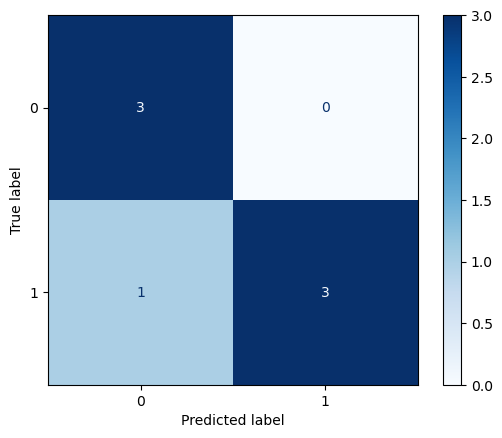

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 示例: 真实标签和预测标签
y_true = [0, 1, 1, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 0, 1]

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 可视化
plt.figure(figsize=(2, 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 15.2.1.4. <a id='toc15_2_1_4_'></a>[混淆矩阵的优点与局限性](#toc0_)
优点：
- 提供了分类结果的详细信息（TP、FP、FN、TN），帮助分析分类器的性能。
- 可用于计算多种指标（如 Precision、Recall、F1-Score 等）。
- 易于扩展到多分类任务。

局限性：
- 难以直接提供一个全局的性能评分（需要其他指标辅助）。
- 当类别过多或类别不平衡时，可能难以直观理解。

### 15.2.2. <a id='toc15_2_2_'></a>[准确率 (Accuracy)](#toc0_)
准确率是最基本的评估指标，表示模型预测正确的样本占总样本的比例。

$\text{公式: Accuracy}=\frac{\text{正确预测样本数}}{\text{总样本数}}$

适用场景: 数据类别分布均衡时效果较好。

缺点: 对类别不平衡的数据不敏感（如正例远多于负例时）


### 15.2.3. <a id='toc15_2_3_'></a>[精确率 (Precision)](#toc0_)

$\text{公式: Precision}=\frac{\text{真正例 }(\mathrm{TP})}{\text{真正例 }(\mathrm{TP})+\text{假正例 }(\mathrm{FP})}$

适用场景: 关注减少误报的场景（如垃圾邮件检测）。

### 15.2.4. <a id='toc15_2_4_'></a>[召回率 (Recall)](#toc0_)

$\text{公式: Recall}=\frac{\text{真正例 }(\mathrm{TP})}{\text{真正例 }(\mathrm{TP})+\text{假负例 }(\mathrm{FN})}$

适用场景: 关注尽可能找到所有正例的场景（如疾病筛查）。

### 15.2.5. <a id='toc15_2_5_'></a>[F1-Score](#toc0_)

$\text{公式: }F1=2\times\frac{\mathrm{Precision}\times\mathrm{Recall}}{\mathrm{Precision}+\mathrm{Recall}}$

适用场景: 在精确率和召回率之间需要平衡时。

特点: F1-Score 是精确率和召回率的调和平均值。

### 15.2.6. <a id='toc15_2_6_'></a>[ROC 曲线和 AUC (Area Under Curve)](#toc0_)
ROC 曲线: 通过绘制不同阈值下的 假正例率 (FPR) 和 真正例率 (TPR) 来评估分类器性能。

AUC: 曲线下面积，表示模型区分正负例的能力。

适用场景: 用于评估二分类模型，尤其是在类别分布不平衡的情况下。

### 15.2.7. <a id='toc15_2_7_'></a>[多分类问题指标](#toc0_)
Top-k Accuracy: 预测中真实标签出现在模型输出概率前 k 个类别中。

分类报告: 包含每个类别的 Precision、Recall 和 F1-Score，适用于多分类任务。

## 15.3. <a id='toc15_3_'></a>[回归问题的评估指标](#toc0_)
回归问题的目标是预测连续数值。评估指标衡量预测值与真实值之间的偏差。

### 15.3.1. <a id='toc15_3_1_'></a>[平均绝对误差 (MAE)](#toc0_)
公式: MAE = $\frac{1}{N}\sum_{i=1}^{N}|y_i-\hat{y}_i|$

特点: 衡量预测值与真实值之间的平均绝对差异。

优点: 对异常值较为鲁棒。

### 15.3.2. <a id='toc15_3_2_'></a>[均方误差 (MSE)](#toc0_)
公式: MSE = $\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2$

特点: 衡量预测值与真实值之间的平均平方差异。

优点: 对异常值较为敏感。


### 15.3.3. <a id='toc15_3_3_'></a>[均方根误差 (RMSE)](#toc0_)
公式: RMSE = $\sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2}$

特点: 是 MSE 的平方根，用于衡量预测值与真实值之间的平均误差。

优点: 对异常值较为敏感。


### 15.3.4. <a id='toc15_3_4_'></a>[R² (决定系数)](#toc0_)

$\text{公式: }R^2=1-\frac{\sum_{i=1}^{N}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{N}(y_i-\bar{y})^2}$

特点: 衡量模型解释数据变异的能力。

优点: 易于理解和解释。


# 16. <a id='toc16_'></a>[Benchmark](#toc0_)
Benchmark 是评估算法、模型、系统或硬件性能的关键步骤，通常用于比较不同方法的效率、准确性或资源消耗。

## 16.1. <a id='toc16_1_'></a>[确定 Benchmark 目标](#toc0_)
明确要评估的内容和目标。可能的目标包括：
  - 模型性能：例如准确率、召回率、F1-score 等。
  - 运行效率：如训练时间、推理时间、内存占用。
  - 可扩展性：系统对大规模数据或复杂任务的适应性。
  - 能耗：如 GPU 或 CPU 使用率。

Benchmark 注意事项
  - 公平性: 确保所有方法在相同条件下运行，消除外部干扰因素。
  - 可靠性: 结果需稳定，避免因随机性导致的显著偏差。
  - 多样性: 在不同数据集、不同任务上进行 Benchmark，提高结果的通用性。
  - 资源消耗: 注意方法的时间和硬件需求，避免忽略效率问题。

## 16.2. <a id='toc16_2_'></a>[Benchmark模板](#toc0_)

In [210]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import time
import tracemalloc
import numpy as np


# -----------------------------
# 1. 数据集定义
# -----------------------------
class DummyDataset(Dataset):
    def __init__(self, num_samples=1000, input_dim=100, num_classes=10):
        self.num_samples = num_samples
        self.data = torch.randn(num_samples, input_dim)
        self.labels = torch.randint(0, num_classes, (num_samples,))

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


# -----------------------------
# 2. 模型定义
# -----------------------------
class ModelA(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ModelA, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)


class ModelB(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ModelB, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.fc(x)
    

# -----------------------------
# 3. Benchmark 工具函数
# -----------------------------
def benchmark_training(model, dataloader, criterion, optimizer, device, num_epochs=5):
    """ 测量模型训练时间 """
    model.train()
    start_time = time.time()

    for epoch in range(num_epochs):
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    total_time = time.time() - start_time
    return total_time


def benchmark_inference(model, dataloader, device):
    """ 测量模型推理时间 """
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        for inputs, _ in dataloader:
            inputs = inputs.to(device)
            _ = model(inputs)
    total_time = time.time() - start_time
    return total_time


def measure_memory(model, dataloader, device):
    """ 测量模型内存占用 """
    tracemalloc.start()
    model.eval()
    with torch.no_grad():
        for inputs, _ in dataloader:
            inputs = inputs.to(device)
            _ = model(inputs)
            break  # 只测量一次前向传播
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return current / 10**6, peak / 10**6  # 转换为 MB


def evaluate_accuracy(model, dataloader, device):
    """ 测量模型准确性 """
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = outputs.argmax(dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    return correct / total


# -----------------------------
# 4. Benchmark 主流程
# -----------------------------
if __name__ == "__main__":
    # 配置参数
    INPUT_DIM = 100
    NUM_CLASSES = 10
    NUM_SAMPLES = 1000
    BATCH_SIZE = 32
    NUM_EPOCHS = 5
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 数据集和加载器
    dataset = DummyDataset(num_samples=NUM_SAMPLES, input_dim=INPUT_DIM, num_classes=NUM_CLASSES)
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    # 模型列表
    models = {
        "ModelA": ModelA(INPUT_DIM, NUM_CLASSES),
        "ModelB": ModelB(INPUT_DIM, NUM_CLASSES)
    }

    # 损失函数
    criterion = nn.CrossEntropyLoss()

    # Benchmark 结果
    results = []

    for model_name, model in models.items():
        print(f"Benchmarking {model_name}...")
        model = model.to(DEVICE)

        # 优化器
        optimizer = optim.Adam(model.parameters())

        # 测试训练时间
        train_time = benchmark_training(model, dataloader, criterion, optimizer, DEVICE, num_epochs=NUM_EPOCHS)

        # 测试推理时间
        inference_time = benchmark_inference(model, dataloader, DEVICE)

        # 测试内存占用
        current_memory, peak_memory = measure_memory(model, dataloader, DEVICE)

        # 测试准确性
        accuracy = evaluate_accuracy(model, dataloader, DEVICE)

        # 保存结果
        results.append({
            "Model": model_name,
            "Train Time (s)": train_time,
            "Inference Time (s)": inference_time,
            "Current Memory (MB)": current_memory,
            "Peak Memory (MB)": peak_memory,
            "Accuracy": accuracy
        })

    # 打印 Benchmark 结果
    print("\nBenchmark Results:")
    for result in results:
        print(result)


Benchmarking ModelA...
Benchmarking ModelB...

Benchmark Results:
{'Model': 'ModelA', 'Train Time (s)': 0.17575478553771973, 'Inference Time (s)': 0.01085042953491211, 'Current Memory (MB)': 0.00067, 'Peak Memory (MB)': 0.042011, 'Accuracy': 0.218}
{'Model': 'ModelB', 'Train Time (s)': 0.20154285430908203, 'Inference Time (s)': 0.012841463088989258, 'Current Memory (MB)': 0.00067, 'Peak Memory (MB)': 0.042011, 'Accuracy': 0.479}


# 17. <a id='toc17_'></a>[PyTorch lightning](#toc0_)

## 17.1. <a id='toc17_1_'></a>[训练逻辑](#toc0_)
- PyTorch lightning官方给的`PyTorch lightning`教程：[https://lightning.ai/docs/pytorch/stable/expertise_levels.html](https://lightning.ai/docs/pytorch/stable/expertise_levels.html)

- PyTorch lightning给的`PyTorch`教程：[https://lightning.ai/docs/pytorch/stable/tutorials.html](https://lightning.ai/docs/pytorch/stable/tutorials.html)

- PuTorch lightning给的`PyTorch code to PyTorchLightning`：[https://lightning.ai/docs/pytorch/stable/starter/converting.html](https://lightning.ai/docs/pytorch/stable/starter/converting.html)


![Frame](./Pytorch_Pictures/PyTorch_lightning/Frame1.jpg)
![Frame2](./Pytorch_Pictures/PyTorch_lightning/Frame2.jpg)
![Frame3](./Pytorch_Pictures/PyTorch_lightning/Frame3.jpg)
![Frame4](./Pytorch_Pictures/PyTorch_lightning/Frame4.jpg)
![Frame5](./Pytorch_Pictures/PyTorch_lightning/Frame5.jpg)
<!-- <img src="./Pytorch_Pictures/PyTorch_lightning/Frame1.jpg" width = 600 height = 600 /> -->

In [70]:
import lightning as L

print(f'Pytorch lightning version: {L.__version__}')

/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pytorch lightning version: 2.4.0


## 17.2. <a id='toc17_2_'></a>[Data.py](#toc0_)
数据部分应该单独处理，便于以后管理和维护。

In [1]:
# 虚拟出一些数据
# 仅供参考

import torch 

def syn_datas(
    w = torch.tensor([2.0, -3.0]),
    b = torch.tensor([3.4]), 
    nums = 10000):
    X = torch.normal(mean=0, std=0.1, size=(nums, w.shape[0]), dtype=torch.float32)
    y = X @ w + b
    y += torch.normal(mean=0, std=0.1, size=y.shape, dtype=torch.float)
    return X, y 

# 预设参数，注意 形状/维度
preset_weight = torch.tensor([2.0, -3.0], dtype=torch.float32).reshape(2, 1)
preset_bias = torch.tensor([3.4], dtype=torch.float32)

# 虚拟数据
features, labels = syn_datas(w=preset_weight, b=preset_bias, nums=10000)

# 初步查看
features.shape, labels.shape, features[0], labels[0]

(torch.Size([10000, 2]),
 torch.Size([10000, 1]),
 tensor([ 0.1441, -0.0539]),
 tensor([3.7984]))

In [10]:
from torch.utils import data 

datasets = data.TensorDataset(features, labels)

train_iter = data.DataLoader(dataset=datasets, shuffle=True, batch_size=128, num_workers=10)

## 17.3. <a id='toc17_3_'></a>[Model.py](#toc0_)
模型部分应该用纯PyTorch编写以便于理解和后续的维护。

In [59]:
# 用纯PyTorch构建模型的网络结构
from torch import nn


class AlphaFold2(nn.Module):
    def __init__(self, in_features=2, out_features=1):
        super().__init__()
        self.hidden = nn.Sequential(nn.Linear(in_features, out_features))

    def forward(self, X):
        return self.hidden(X)

## 17.4. <a id='toc17_4_'></a>[ModelWrapper.py](#toc0_)
利用PyTorch lightning训练框架进行训练只是方便调用，最后进行模型`魔改`后最好还是用纯PyTorch进行学习。  
都是固定框架（API信息如下）
- [L.LightningModule API](https://lightning.ai/docs/pytorch/stable/common/lightning_module.html#backward)
- [Trainer API](https://lightning.ai/docs/pytorch/stable/common/trainer.html)
    - Automatically enabling/disabling grads
    - Running the training, validation and test dataloaders
    - Calling the Callbacks at the appropriate times
    - Putting batches and computations on the correct devices
    
![Trainer_API](./Pytorch_Pictures/PyTorch_lightning/Trainer_API.jpg)

In [120]:
# 用PyTorch lightning构建训练步骤
from torch import nn 
from torch import optim

import lightning as L


class AlphaFold2Wrapper(L.LightningModule):
    def __init__(self, learning_rate=0.001):
        super().__init__()
        ## save hyperparameters
        self.save_hyperparameters()                                 # 超参数保存
        self.learning_rate = learning_rate                          # 超参数
        ## model initiate from model constructed by pure PyTorch
        self.demo_model = AlphaFold2(in_features=2, out_features=1)      ## 模型
        ## loss_fn
        self.loss_fn = torch.nn.MSELoss()                           ## 损失函数

    def forward(self, X):
        return self.demo_model(X)

    def configure_optimizers(self):                                 ## 优化函数
        opt = optim.SGD(self.parameters(), lr=self.learning_rate)
        return opt

    def training_step(self, batch, batch_idx):
        '''训练步骤'''
        X, y = batch 
        y_hat = self.forward(X)
        loss = self.loss_fn(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)                 # 在进度条上显示出来

        self.training_step_outputs.append(loss)                     # 保存结果，以备后续使用 (on_train_epoch_end(self))
        return loss
    
    # def on_train_batch_start(self, batch, batch_idx):
    #     '''
    #     Called in the training loop before anything happens for that batch.
    #     If you return -1 here, you will skip training for the rest of the current epoch.
    #     '''
    #     pass

    # def on_train_batch_end(self, outputs, batch, batch_idx):
    #     '''
    #     Called in the training loop after the batch.
    #     Parameters:
    #             outputs (Union[Tensor, Mapping[str, Any], None]) – The outputs of training_step(x)
    #             batch (Any) – The batched data as it is returned by the training DataLoader.
    #             batch_idx (int) – the index of the batch
    #     '''
    #     pass

    # def on_train_epoch_start(self):
    #     '''Called in the training loop at the very beginning of the epoch.'''
    #     pass

    def on_train_epoch_end(self):
        '''
        Called in the training loop at the very end of the epoch.
        To access all batch outputs at the end of the epoch, 
        you can cache step outputs as an attribute of the LightningModule and access them in this hook:
        '''
        # do something with all training_step outputs, for example:
        epoch_mean = torch.stack(self.training_step_outputs).mean() # 来自于training_step()计算结果
        self.log("training_epoch_mean", epoch_mean)
        # free up the memory
        self.training_step_outputs.clear()

    def validation_step(self, batch, batch_idx):
        '''验证步骤'''
        X, y = batch 
        y_hat = self.forward(X) 
        loss = self.loss_fn(y_hat, y)
        self.log('val_loss', loss, prog_bar=True)
        return loss
    
    # def on_validation_batch_start(self, batch, batch_idx, dataloader_idx=0):
    #     '''Called in the validation loop before anything happens for that batch.'''
    #     pass 

    # def on_validation_batch_end(self, outputs, batch, batch_idx, dataloader_idx=0):
    #     '''Called in the validation loop after the batch.
    #     Parameters:
    #             outputs (Union[Tensor, Mapping[str, Any], None]) – The outputs of validation_step(x)
    #             batch (Any) – The batched data as it is returned by the validation DataLoader.
    #             batch_idx (int) – the index of the batch
    #             dataloader_idx (int) – the index of the dataloader
    #     '''
    #     pass

    # def on_validation_epoch_start(self):
    #     '''Called in the validation loop at the very beginning of the epoch.'''
    #     pass

    def on_validation_epoch_end(self):
        '''Called in the validation loop at the very end of the epoch.'''
        pass

    def test_step(self, batch, batch_idx):
        '''测试步骤'''
        X, y = batch 
        y_hat = self.forward(X) 
        loss = self.loss_fn(y_hat, y)
        self.log('test_loss', loss)
        return loss

    def prediction_step(self, batch, batch_idx):
        '''预测步骤'''
        X, y = batch 
        y_hat = self.forward(X) 
        self.log('y_hat', y_hat)
        return y_hat

## 实例化一个对象
alphafold2 = AlphaFold2Wrapper(learning_rate=0.01)

trainer = L.Trainer(
    accelerator="gpu",              # cpu, gpu, tpu, auto
    devices=1, 
    # strategy="ddp",                 # ddp, ddp_spawn, ddp_notebook
    # num_nodes=1,                    # Number of GPU nodes for distributed training.

    # precision="32-true",            # There are two different techniques to set the mixed precision. “True” precision and “Mixed” precision.

    # callbacks = ,
    
    # min_epochs=1,
    max_epochs=10, 
    # min_steps=None,                 # Force training for at least this number of global steps. Trainer will train model for at least min_steps or min_epochs (latest).
    max_steps=-1,                   # Stop training after this number of global steps. Training will stop if max_steps or max_epochs have reached (earliest).
    log_every_n_steps=1,           ## How often to add logging rows (does not write to disk)
    check_val_every_n_epoch=1,      # default used by the Trainer

    # default_root_dir=os.getcwd(),   # os.getcwd()
    # enable_progress_bar=True,       # Whether to enable or disable the progress bar. Defaults to True.
    # enable_model_summary=True,      # Whether to enable or disable the model summarization. Defaults to True.

    profiler=None,                  # simple, advanced, None: To profile individual steps during training and assist in identifying bottlenecks.
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


### 17.4.1. <a id='toc17_4_1_'></a>[Training and vlidation](#toc0_)
Training的同时进行Validation。

In [98]:
trainer.fit(
    model=alphafold2, 
    train_dataloaders=train_iter, 
    val_dataloaders=train_iter
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name       | Type       | Params | Mode 
--------------------------------------------------
0 | demo_model | AlphaFold2 | 3      | train
1 | loss_fn    | MSELoss    | 0      | train
--------------------------------------------------
3         Trainable params
0         Non-trainable params
3         Total params
0.000     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Epoch 9: 100%|██████████| 79/79 [00:01<00:00, 75.30it/s, v_num=0, train_loss=0.217, val_loss=0.133] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 79/79 [00:01<00:00, 74.95it/s, v_num=0, train_loss=0.217, val_loss=0.133]


### 17.4.2. <a id='toc17_4_2_'></a>[Validation](#toc0_)
只进行validation。

In [99]:
trainer.validate(model=alphafold2, dataloaders=train_iter)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Validation DataLoader 0: 100%|██████████| 79/79 [00:00<00:00, 359.93it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.13269878923892975
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val_loss': 0.13269878923892975}]

### 17.4.3. <a id='toc17_4_3_'></a>[Test](#toc0_)
只进行test。

In [100]:
trainer.test(model=alphafold2, dataloaders=train_iter)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Testing DataLoader 0: 100%|██████████| 79/79 [00:00<00:00, 404.56it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.13269877433776855
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.13269877433776855}]

### 17.4.4. <a id='toc17_4_4_'></a>[Prediction](#toc0_)

进行预测。

![Prediction summary](./Pytorch_Pictures/PyTorch_lightning/Frame4.jpg)

#### 17.4.4.1. <a id='toc17_4_4_1_'></a>[PyTorch lightning自身Trainer直接predict](#toc0_)
调用PyTorch lightning自身Trainer的predict，程序会自动使用：  
- model.eval()
- with torch.no_grad():
- 或 torch.set_grad_enable(True/False)

In [101]:
trainer.predict(model=alphafold2, dataloaders=features)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting DataLoader 0: 100%|██████████| 10000/10000 [00:08<00:00, 1224.36it/s]


[tensor([3.4124]),
 tensor([3.3868]),
 tensor([3.3909]),
 tensor([3.3817]),
 tensor([3.4208]),
 tensor([3.3964]),
 tensor([3.3973]),
 tensor([3.3862]),
 tensor([3.3966]),
 tensor([3.4032]),
 tensor([3.4066]),
 tensor([3.3905]),
 tensor([3.3932]),
 tensor([3.3774]),
 tensor([3.3949]),
 tensor([3.3956]),
 tensor([3.3845]),
 tensor([3.3931]),
 tensor([3.3935]),
 tensor([3.3898]),
 tensor([3.4090]),
 tensor([3.4059]),
 tensor([3.3987]),
 tensor([3.3881]),
 tensor([3.3913]),
 tensor([3.4166]),
 tensor([3.3755]),
 tensor([3.4028]),
 tensor([3.4021]),
 tensor([3.4224]),
 tensor([3.3956]),
 tensor([3.3914]),
 tensor([3.3979]),
 tensor([3.3889]),
 tensor([3.3950]),
 tensor([3.3908]),
 tensor([3.4049]),
 tensor([3.4014]),
 tensor([3.3925]),
 tensor([3.3970]),
 tensor([3.4043]),
 tensor([3.4050]),
 tensor([3.4055]),
 tensor([3.4033]),
 tensor([3.3873]),
 tensor([3.3934]),
 tensor([3.4031]),
 tensor([3.4101]),
 tensor([3.3942]),
 tensor([3.3713]),
 tensor([3.3908]),
 tensor([3.3955]),
 tensor([3.3

#### 17.4.4.2. <a id='toc17_4_4_2_'></a>[PyTorch lightning加载权重后预测](#toc0_)
需要手动：
- model.eval()
- with torch.no_grad():

In [102]:
pretrained_alphafold2 = AlphaFold2Wrapper.load_from_checkpoint('./lightning_logs/version_0/checkpoints/epoch=9-step=790.ckpt')

# 进行预测/推理
pretrained_alphafold2.eval()
with torch.no_grad():
    y_hat = pretrained_alphafold2(features.to('cuda:0'))
y_hat

tensor([[3.4124],
        [3.3868],
        [3.3909],
        ...,
        [3.4022],
        [3.3898],
        [3.3934]], device='cuda:0')

#### 17.4.4.3. <a id='toc17_4_4_3_'></a>[提取权重后加载至纯PyTorch模型](#toc0_)
从checkpoint中`提取模型的权重参数`，`修改相关格式`后再加载到纯PyTorch的模型中，就是普通又熟悉的PyTorch的预测方式了。

In [103]:
checkpoint_path = './lightning_logs/version_0/checkpoints/epoch=9-step=790.ckpt'
checkpoint = torch.load(checkpoint_path)
checkpoint  # checkpoint的贮存格式，其中 'state_dict'就是模型权重信息

/tmp/ipykernel_268120/3329860571.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


{'epoch': 9,
 'global_step': 790,
 'pytorch-lightning_version': '2.4.0',
 'state_dict': OrderedDict([('demo_model.hidden.0.weight',
               tensor([[ 0.0967, -0.0567]], device='cuda:0')),
              ('demo_model.hidden.0.bias',
               tensor([3.3954], device='cuda:0'))]),
 'loops': {'fit_loop': {'state_dict': {},
   'epoch_loop.state_dict': {'_batches_that_stepped': 790},
   'epoch_loop.batch_progress': {'total': {'ready': 790,
     'completed': 790,
     'started': 790,
     'processed': 790},
    'current': {'ready': 79, 'completed': 79, 'started': 79, 'processed': 79},
    'is_last_batch': True},
   'epoch_loop.scheduler_progress': {'total': {'ready': 0, 'completed': 0},
    'current': {'ready': 0, 'completed': 0}},
   'epoch_loop.automatic_optimization.state_dict': {},
   'epoch_loop.automatic_optimization.optim_progress': {'optimizer': {'step': {'total': {'ready': 790,
       'completed': 790},
      'current': {'ready': 79, 'completed': 79}},
     'zero_grad': {

In [104]:
alphafold2, checkpoint['state_dict']    # with AlphaFold2Wrapper, 多了demo_model.

(AlphaFold2Wrapper(
   (demo_model): AlphaFold2(
     (hidden): Sequential(
       (0): Linear(in_features=2, out_features=1, bias=True)
     )
   )
   (loss_fn): MSELoss()
 ),
 OrderedDict([('demo_model.hidden.0.weight',
               tensor([[ 0.0967, -0.0567]], device='cuda:0')),
              ('demo_model.hidden.0.bias',
               tensor([3.3954], device='cuda:0'))]))

In [106]:
for param in checkpoint['state_dict']:
    print(param)

demo_model.hidden.0.weight
demo_model.hidden.0.bias


- `纯PyTorch的state_dict`如下，`如上的checkpoint`中的state_dict`不符合`相应格式，需要进行更改：

In [108]:
alphafold_with_pure_pytorch = AlphaFold2()
alphafold_with_pure_pytorch, alphafold_with_pure_pytorch.state_dict()

(AlphaFold2(
   (hidden): Sequential(
     (0): Linear(in_features=2, out_features=1, bias=True)
   )
 ),
 OrderedDict([('hidden.0.weight', tensor([[-0.5207,  0.0861]])),
              ('hidden.0.bias', tensor([0.0467]))]))

- 更改操作如下：

In [ ]:
model_weights = checkpoint['state_dict']

# 把demo_model.删除即可
for key in model_weights:
    model_weights[key.replace("demo_model.", "")] = model_weights.pop(key)

In [117]:
checkpoint['state_dict'], model_weights # 都更改了，什么鬼

(OrderedDict([('hidden.0.weight',
               tensor([[ 0.0967, -0.0567]], device='cuda:0')),
              ('hidden.0.bias', tensor([3.3954], device='cuda:0'))]),
 OrderedDict([('hidden.0.weight',
               tensor([[ 0.0967, -0.0567]], device='cuda:0')),
              ('hidden.0.bias', tensor([3.3954], device='cuda:0'))]))

In [118]:
# 重新实例化一个新的对象
alphafold_with_pure_pytorch = AlphaFold2()

# 加载修改后的权重
alphafold_with_pure_pytorch.load_state_dict(model_weights)  # 加载修改后的model_weights

# 进行预测/推理
alphafold_with_pure_pytorch.eval()
with torch.no_grad():
    y_hat = alphafold_with_pure_pytorch(features)
y_hat

tensor([[3.4124],
        [3.3868],
        [3.3909],
        ...,
        [3.4022],
        [3.3898],
        [3.3934]])

# 18. <a id='toc18_'></a>[Torchvision](#toc0_)
Torchvision Docs: [https://pytorch.org/vision/stable/models.html](https://pytorch.org/vision/stable/models.html)

In [36]:
import torchvision 


print('torchvision version:', torchvision.__version__)

torchvision version: 0.19.0


## 18.1. <a id='toc18_1_'></a>[Models](#toc0_)

### 18.1.1. <a id='toc18_1_1_'></a>[可用模型](#toc0_)
可用`模型`见：[https://pytorch.org/vision/stable/models.html](https://pytorch.org/vision/stable/models.html)

In [37]:
from torchvision import models 


models.list_models()    # List all models

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

### 18.1.2. <a id='toc18_1_2_'></a>[下载模型和权重](#toc0_)
可用`权重`见：[https://pytorch.org/vision/stable/models.html](https://pytorch.org/vision/stable/models.html)

In [38]:
# Get model
alexnet = models.get_model(name='alexnet')

# 1. Get weight
weights = models.get_weight('AlexNet_Weights.IMAGENET1K_V1')
# weights = models.get_weight('ResNet50_Weights.IMAGENET1K_V1')
# weights = models.get_weight('ResNet50_Weights.IMAGENET1K_V2')

# 2. (Recommendation) Get weight with model name
weights = models.get_model_weights(name='alexnet')

# Get the state_dict parameters from loaded weights wrapper
state_dict = weights.IMAGENET1K_V1.get_state_dict()

### 18.1.3. <a id='toc18_1_3_'></a>[模型加载权重](#toc0_)

In [39]:
import torch


alexnet.load_state_dict(state_dict=state_dict)
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### 18.1.4. <a id='toc18_1_4_'></a>[总结](#toc0_)

In [40]:
# wrapper to the following:
def get_pretrained_model(model_name:str)-> torch.nn.Module:
    '''Default to get: IMAGENET1K_V1'''
    model = models.get_model(name=model_name)
    weight_wrapper = models.get_model_weights(name=model_name)
    state_dict = weight_wrapper.IMAGENET1K_V1.get_state_dict()
    model.load_state_dict(state_dict=state_dict)
    return model

# pretrained_model = get_pretrained_model(model_name='resnet50')
pretrained_model = get_pretrained_model(model_name='alexnet')
pretrained_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 18.2. <a id='toc18_2_'></a>[Dataset](#toc0_)
torchvision Docs: [https://pytorch.org/vision/stable/datasets.html](https://pytorch.org/vision/stable/datasets.html)  

1. torchvision的datasets有很多，如：
  
    - Image classification
        - FashionMNIST(root[, train, transform, ...])
        - MNIST(root[, train, transform, ...])
    - Image detection or segmentation
        - CocoDetection(root, annFile[, transform, ...])
    - Video classification
        - HMDB51(root, annotation_path, frames_per_clip)
    - Video prediction
        - MovingMNIST(root[, split, split_ratio, ...])

2. 另外，还可以自定义数据集，函数如下：

    - Base classes for custom datasets
        - `DatasetFolder`(root, loader[, extensions, ...])    # A generic data loader.
        - `ImageFolder`(root, transform, ...)                 # A generic data loader where the images are arranged in this way by default: .
        - `VisionDataset`([root, transforms, transform, ...]) # Base Class For making datasets which are compatible with torchvision.

In [42]:
from torchvision import datasets 
from torchvision import transforms 


dbs = './Pytorch_datasets/'

trans = transforms.Compose([
    transforms.ToTensor(),                                  # PIL转换为tensor格式
    transforms.Normalize(mean=(0.5,), std=(1.0,))           # 标准化
])


train_datasets = datasets.FashionMNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=trans
)

test_datasets = datasets.FashionMNIST(
    root=dbs,  
    train=False, 
    download=True, 
    transform=trans
)

type(train_datasets), type(test_datasets)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

# 19. <a id='toc19_'></a>[Hugging face](#toc0_)
Hugging Face 是一个非常流行的自然语言处理（NLP）库，提供了大量预训练的模型和数据集，简化了 NLP 任务的实现。

Hugging Face 的 PyTorch 库提供了许多预训练的模型，包括用于文本分类、情感分析、命名实体识别、文本生成等任务的模型。这些模型通常具有良好的性能，并且可以轻松地在 PyTorch 中使用。

Hugging Face 还提供了许多数据集，包括用于文本分类、情感分析、命名实体识别、文本生成等任务的数据集。这些数据集通常具有良好的性能，并且可以轻松地在 PyTorch 中使用。


In [ ]:
from transformers import pipeline


classifier = pipeline("sentiment-analysis")
res = classifier("Today is a nice day.")
print(res)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


# 加载预训练的 BERT 模型和分词器
model_name = "bert-base-uncased"  # 你也可以选择其他模型
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 输入文本示例
text = "I love Hugging Face!"
inputs = tokenizer(text=text, return_tensors="pt")

# 前向推理 (inference)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# 输出分类结果
predicted_class = torch.argmax(logits, dim=1)
print(f"Predicted class: {predicted_class}")

# 20. <a id='toc20_'></a>[PyTorch hub](#toc0_)

In [ ]:
import torch 


# torch.hub.list()
# torch.hub.load()
# torch.hub.help()

# 21. <a id='toc21_'></a>[监督学习 (Supervised learning)](#toc0_)

In [2]:
import torch
from torch import nn 
from torch.utils.data import TensorDataset, dataloader

# 22. <a id='toc22_'></a>[半监督学习 (Semi-supervised learning)](#toc0_)

# 23. <a id='toc23_'></a>[无监督学习 (Unsupervised learning)](#toc0_)

# 24. <a id='toc24_'></a>[深度强化学习 (DRL, Deep Reforcement Learning)](#toc0_)
深度强化学习（Deep Reinforcement Learning, DRL） 是将`强化学习（Reinforcement Learning, RL）与深度学习（Deep Learning）`结合的一类方法，旨在通过智能体与环境的交互，学习如何采取最优行动策略，以最大化累积奖励。它在解决复杂、高维的决策问题方面表现出色，例如机器人控制、游戏 AI 和自动驾驶等。

## 24.1. <a id='toc24_1_'></a>[强化学习基础概念](#toc0_)
强化学习的核心思想是通过`试错（Trial and Error）`机制让智能体学习如何在环境中行动，逐步找到最优策略。它由以下几个主要元素构成：

  - 环境（Environment）：智能体所处的外部系统，负责接收智能体的动作并提供相应的奖励和状态。
  - 智能体（Agent）：在环境中行动的实体，目标是通过与环境交互获得奖励并学习如何行动。
  - 状态（State, 𝑆）：环境在某一时刻的描述，智能体根据当前状态决定行动。
  - 动作（Action, 𝐴）：智能体在当前状态下选择的行为，影响下一个状态。
  - 奖励（Reward, 𝑅）：环境根据智能体的动作给予反馈，用来衡量智能体行为的好坏。
  - 策略（Policy, 𝜋）：智能体根据当前状态选择动作的规则，可以是确定性策略或随机策略。
  - 值函数（Value Function）：用于评估某个状态或动作的好坏，通常包括状态值函数 𝑉(𝑠) 和 动作值函数𝑄(𝑠,𝑎)。
  
强化学习的目标是找到一个最优策略 𝜋∗π∗ ，使得智能体在与环境交互时获得的累计奖励最大化。

## 24.2. <a id='toc24_2_'></a>[深度强化学习的特点](#toc0_)
深度强化学习通过使用`深度神经网络（DNN）`来近似复杂的值函数或策略，解决传统强化学习在高维状态空间中的表现不佳问题。结合深度学习的表征能力，深度强化学习可以处理图像、视频等高维感知输入，并在此基础上做出决策。

主要特点：
  - 处理高维输入：通过深度神经网络，DRL 可以处理像素级图像输入、复杂的传感器数据等高维特征，传统强化学习方法无法有效应对这些情况。
  - 自动特征学习：无需手动设计特征，深度学习模型可以自动从输入数据中学习重要特征。
  - 扩展性强：DRL 可以扩展到大规模的状态和动作空间，解决复杂的实际问题。

## 24.3. <a id='toc24_3_'></a>[马尔可夫](#toc0_)

## 24.4. <a id='toc24_4_'></a>[深度强化学习的主要方法](#toc0_)
### 24.4.1. <a id='toc24_4_1_'></a>[深度 Q 网络（Deep Q-Network, DQN）](#toc0_)

### 24.4.2. <a id='toc24_4_2_'></a>[策略梯度方法（Policy Gradient Methods）](#toc0_)

### 24.4.3. <a id='toc24_4_3_'></a>[演员-评论家方法（Actor-Critic Methods）](#toc0_)

### 24.4.4. <a id='toc24_4_4_'></a>[深度确定性策略梯度（Deep Deterministic Policy Gradient, DDPG）](#toc0_)

## 24.5. <a id='toc24_5_'></a>[深度强化学习的应用](#toc0_)
深度强化学习已经在多个领域取得了成功：

  - 游戏 AI：最著名的例子是 AlphaGo，它通过强化学习击败了世界顶级围棋选手。DQN 和 A3C 也被广泛应用于 Atari 游戏、StarCraft 等复杂游戏环境中。
  - 自动驾驶：通过 DRL，智能体可以在虚拟环境中学习如何驾驶，并在现实世界中进行应用。
  - 机器人控制：DRL 可以帮助机器人学习复杂的控制任务，例如机械臂操作、无人机飞行等。
  - 推荐系统：通过深度强化学习，推荐系统可以动态调整推荐策略，个性化地满足用户需求。

# 25. <a id='toc25_'></a>[生成对抗网络 (GAN, Generative Adversarial Networks)](#toc0_)
生成对抗网络（Generative Adversarial Networks） 是由 Ian Goodfellow 等人在 2014 年提出的一种深度学习生成模型。GAN 通过两个神经网络——生成器（Generator）和判别器（Discriminator）——相互对抗来生成与真实数据分布相似的合成数据。GAN 在生成图像、视频、文本和音频等领域具有广泛的应用。

# 26. <a id='toc26_'></a>[扩散模型 (DM, Diffusion Models)](#toc0_)
扩散模型（Diffusion Models） 是近年来在生成模型领域非常流行的一类方法，尤其是在生成图像等数据方面取得了重要进展。它们已经成为了生成对抗网络（GAN）和变分自编码器（VAE）之外的一个有力替代方案。

# 27. <a id='toc27_'></a>[图神经网络 (GNN, Graph Neural Networks)](#toc0_)

In [2]:
import torch 
import torch_geometric 




# 28. <a id='toc28_'></a>[多模态 (ML, MultiModal Learning)](#toc0_)

## 28.1. <a id='toc28_1_'></a>[特征融合](#toc0_)

### 28.1.1. <a id='toc28_1_1_'></a>[concatenate融合](#toc0_)

In [150]:
import torch 
from torch import nn 


class ConcatenationFusion(nn.Module):
    def __init__(self, text_dim, hidden_dim, image_dim, num_classes): 
        super().__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, text, image):
        text_embed = self.text_fc(text)
        image_embed = self.image_fc(image)
        embed = torch.cat((text_embed, image_embed), dim=0)  # 拼接融合
        return self.classifier(embed)


# 测试
batch_size = 10
text_dim = 100
hidden_dim = 128
image_dim = 100
num_classes = 2

text = torch.randn(batch_size, text_dim)
image = torch.randn(batch_size, image_dim)

model = ConcatenationFusion(text_dim, hidden_dim, image_dim, num_classes)
model(text, image)

tensor([[ 0.1880,  0.7078],
        [ 0.1063, -0.2480],
        [-0.8586, -1.1807],
        [ 0.0430, -0.5358],
        [-0.1850,  0.2209],
        [-0.3914, -0.1025],
        [-0.1250,  0.0920],
        [-0.1198, -0.2499],
        [ 0.3329, -0.4342],
        [ 0.3291, -0.1004],
        [ 0.1111, -0.3002],
        [ 0.0725, -0.6321],
        [ 0.1208, -0.0259],
        [ 0.1791,  0.1676],
        [-0.0622,  0.1658],
        [-0.3677,  0.0363],
        [ 0.1491,  0.3804],
        [ 0.2784, -0.0216],
        [ 0.4644,  0.2349],
        [-0.2483, -0.2576]], grad_fn=<AddmmBackward0>)

### 28.1.2. <a id='toc28_1_2_'></a>[加权融合](#toc0_)

In [151]:
import torch
import torch.nn as nn


class WeightedFusionModel(nn.Module):
    def __init__(self, text_dim, image_dim, hidden_dim, output_dim):
        super(WeightedFusionModel, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.text_weight = nn.Parameter(torch.randn(1))
        self.image_weight = nn.Parameter(torch.randn(1))
        self.classifier = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text, image):
        text_feat = torch.relu(self.text_fc(text))
        image_feat = torch.relu(self.image_fc(image))
        combined = self.text_weight * text_feat + self.image_weight * image_feat  # 加权融合    
        output = self.classifier(combined)
        return output
    

# 测试
batch_size = 10
text_dim = 100
hidden_dim = 128
image_dim = 100
num_classes = 2

model = WeightedFusionModel(text_dim, image_dim, hidden_dim, num_classes)
model(text, image)

tensor([[ 0.0170,  0.1555],
        [ 0.0385, -0.1914],
        [ 0.1036, -0.0659],
        [-0.1466,  0.0531],
        [-0.6206, -0.1544],
        [-0.3399, -0.2346],
        [-0.4070, -0.4799],
        [-0.5645,  0.0331],
        [-0.1366,  0.0349],
        [-0.7428,  0.2844]], grad_fn=<AddmmBackward0>)

### 28.1.3. <a id='toc28_1_3_'></a>[元素级融合](#toc0_)

In [152]:
import torch
import torch.nn as nn


class ElementWiseFusionModel(nn.Module):
    def __init__(self, text_dim, image_dim, hidden_dim, output_dim):
        super(ElementWiseFusionModel, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.classifier = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text, image):
        text_feat = torch.relu(self.text_fc(text))
        image_feat = torch.relu(self.image_fc(image))
        combined = text_feat + image_feat  # 元素级融合
        output = self.classifier(combined)
        return output
    

# 测试
batch_size = 10
text_dim = 100
hidden_dim = 128
image_dim = 100
num_classes = 2

model = ElementWiseFusionModel(text_dim, image_dim, hidden_dim, num_classes)
model(text, image)

tensor([[-0.1509,  0.3871],
        [-0.8885, -0.3169],
        [-0.8079, -0.5716],
        [-0.7261, -0.1003],
        [-0.0701, -0.5493],
        [-0.8524, -0.3561],
        [-1.1294, -0.3606],
        [-0.8689, -0.3579],
        [-0.9081, -0.6309],
        [-1.0464, -0.4657]], grad_fn=<AddmmBackward0>)

### 28.1.4. <a id='toc28_1_4_'></a>[张量融合](#toc0_)
通过构建高纬度张量来表示不同模态之间的交互关系，捕捉多阶的特征交互信息。

In [153]:
import torch
from torch import nn 


class TensorFusionModel(nn.Module):
    def __init__(self, text_dim, image_dim, hidden_dim, output_dim):
        super(TensorFusionModel, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        # 双线性层进行张量融合
        self.bilinear = nn.Bilinear(hidden_dim, hidden_dim, hidden_dim)
        self.classifier = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text, image):
        text_feat = torch.relu(self.text_fc(text))  # (batch, hidden_dim)
        image_feat = torch.relu(self.image_fc(image))  # (batch, hidden_dim)
        # 张量融合
        fused_feat = self.bilinear(text_feat, image_feat)
        output = self.classifier(fused_feat)
        return output
    

# 测试
batch_size = 10
text_dim = 100
hidden_dim = 128
image_dim = 100
num_classes = 2

model = TensorFusionModel(text_dim, image_dim, hidden_dim, num_classes)
model(text, image)

tensor([[-0.6352, -0.3399],
        [-0.5262, -0.7934],
        [-0.8739,  0.2307],
        [ 0.1405,  0.0721],
        [-0.4297, -0.4880],
        [-1.2108, -0.8075],
        [ 0.0606,  0.8979],
        [ 0.2691,  0.4548],
        [-0.1921, -0.7102],
        [-0.3202,  0.6673]], grad_fn=<AddmmBackward0>)

### 28.1.5. <a id='toc28_1_5_'></a>[注意力机制融合](#toc0_)

In [154]:
# models/attention_fusion.py
import torch
import torch.nn as nn
import torch.nn.functional as F


class AttentionFusionModel(nn.Module):
    def __init__(self, text_dim, image_dim, hidden_dim, output_dim):
        super(AttentionFusionModel, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.classifier = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text, image):
        text_feat = torch.relu(self.text_fc(text))  # (batch, hidden_dim)
        image_feat = torch.relu(self.image_fc(image))  # (batch, hidden_dim)
        # 拼接特征用于计算注意力
        combined = torch.cat((text_feat, image_feat), dim=1)
        attention_weights = torch.sigmoid(self.attention(combined))  # (batch, 1)
        # 加权融合
        fused_feat = attention_weights * text_feat + (1 - attention_weights) * image_feat
        output = self.classifier(fused_feat)
        return output


# 测试
batch_size = 10
text_dim = 100
hidden_dim = 128
image_dim = 100
num_classes = 2

model = AttentionFusionModel(text_dim, image_dim, hidden_dim, num_classes)
model(text, image)

tensor([[-0.2901, -0.0059],
        [-0.0250,  0.1197],
        [-0.2061, -0.1256],
        [-0.3189,  0.2029],
        [-0.0152,  0.1354],
        [ 0.0839,  0.0148],
        [-0.1621,  0.0316],
        [ 0.0181,  0.2491],
        [-0.0624,  0.0125],
        [-0.2978, -0.0618]], grad_fn=<AddmmBackward0>)

### 28.1.6. <a id='toc28_1_6_'></a>[高阶融合](#toc0_)

In [156]:
# models/high_order_fusion.py
import torch
import torch.nn as nn


class HighOrderFusionModel(nn.Module):
    def __init__(self, text_dim, image_dim, hidden_dim, output_dim, order=2):
        super(HighOrderFusionModel, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.order = order
        # 高阶特征交互
        self.high_order_fc = nn.Linear(hidden_dim ** order, hidden_dim)
        self.classifier = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text, image):
        text_feat = torch.relu(self.text_fc(text))  # (batch, hidden_dim)
        image_feat = torch.relu(self.image_fc(image))  # (batch, hidden_dim)
        # 高阶交互，通过外积实现
        if self.order == 2:
            fused_feat = torch.bmm(text_feat.unsqueeze(2), image_feat.unsqueeze(1))  # (batch, hidden_dim, hidden_dim)
            fused_feat = fused_feat.view(fused_feat.size(0), -1)  # (batch, hidden_dim^2)
        else:
            raise NotImplementedError("当前仅支持二阶融合")
        fused_feat = torch.relu(self.high_order_fc(fused_feat))
        output = self.classifier(fused_feat)
        return output
    

# 测试
batch_size = 10
text_dim = 100
hidden_dim = 128
image_dim = 100
num_classes = 2

model = HighOrderFusionModel(text_dim, image_dim, hidden_dim, num_classes)
model(text, image)

tensor([[ 0.0248, -0.0359],
        [ 0.0652, -0.0690],
        [ 0.0805, -0.0663],
        [ 0.0584, -0.0093],
        [ 0.0452, -0.0590],
        [ 0.0372, -0.0490],
        [ 0.0078, -0.0247],
        [ 0.0474, -0.0621],
        [ 0.0738, -0.0500],
        [ 0.0369, -0.0351]], grad_fn=<AddmmBackward0>)

## 28.2. <a id='toc28_2_'></a>[简单示例](#toc0_)

In [157]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader


# 模拟的多模态数据，假设基因组、转录组、代谢组的数据分别有不同维度
np.random.seed(42)
genomics_data = np.random.rand(1000, 500)  # 基因组数据 (1000 samples, 500 features)
transcriptomics_data = np.random.rand(1000, 300)  # 转录组数据 (1000 samples, 300 features)
metabolomics_data = np.random.rand(1000, 100)  # 代谢组数据 (1000 samples, 100 features)

# 标签 (假设为二分类问题：健康或疾病)
labels = np.random.randint(0, 2, 1000)

# 归一化数据
scaler = StandardScaler()
genomics_data = scaler.fit_transform(genomics_data)
transcriptomics_data = scaler.fit_transform(transcriptomics_data)
metabolomics_data = scaler.fit_transform(metabolomics_data)

# 划分训练集和测试集
X_train_genomics, X_test_genomics, X_train_transcript, X_test_transcript, X_train_metabol, X_test_metabol, y_train, y_test = train_test_split(
    genomics_data, 
    transcriptomics_data, 
    metabolomics_data, 
    labels, 
    test_size = 0.2, 
    random_state = 42
)

# 转换为Tensor
X_train_genomics = torch.tensor(X_train_genomics, dtype=torch.float32)
X_test_genomics = torch.tensor(X_test_genomics, dtype=torch.float32)
X_train_transcript = torch.tensor(X_train_transcript, dtype=torch.float32)
X_test_transcript = torch.tensor(X_test_transcript, dtype=torch.float32)
X_train_metabol = torch.tensor(X_train_metabol, dtype=torch.float32)
X_test_metabol = torch.tensor(X_test_metabol, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [158]:
class MultiModalDataset(Dataset):
    def __init__(self, genomics, transcriptomics, metabolomics, labels):
        self.genomics = genomics
        self.transcriptomics = transcriptomics
        self.metabolomics = metabolomics
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return (self.genomics[idx], self.transcriptomics[idx], self.metabolomics[idx], self.labels[idx])


# 创建训练集和测试集的DataLoader
train_dataset = MultiModalDataset(X_train_genomics, X_train_transcript, X_train_metabol, y_train)
test_dataset = MultiModalDataset(X_test_genomics, X_test_transcript, X_test_metabol, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [159]:
import torch.nn as nn
import torch.nn.functional as F


class MultiModalNet(nn.Module):
    def __init__(self):
        super(MultiModalNet, self).__init__()
        
        # 基因组数据的网络分支
        self.genomics_fc1 = nn.Linear(500, 256)
        self.genomics_fc2 = nn.Linear(256, 128)

        # 转录组数据的网络分支
        self.transcript_fc1 = nn.Linear(300, 256)
        self.transcript_fc2 = nn.Linear(256, 128)

        # 代谢组数据的网络分支
        self.metabol_fc1 = nn.Linear(100, 128)
        self.metabol_fc2 = nn.Linear(128, 64)

        # 融合层
        self.fc1 = nn.Linear(128 + 128 + 64, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 2)  # 假设二分类问题

    def forward(self, genomics, transcriptomics, metabolomics):
        # 基因组网络
        x1 = F.relu(self.genomics_fc1(genomics))
        x1 = F.relu(self.genomics_fc2(x1))
        
        # 转录组网络
        x2 = F.relu(self.transcript_fc1(transcriptomics))
        x2 = F.relu(self.transcript_fc2(x2))
        
        # 代谢组网络
        x3 = F.relu(self.metabol_fc1(metabolomics))
        x3 = F.relu(self.metabol_fc2(x3))

        # 融合三种模态数据
        x = torch.cat((x1, x2, x3), dim=1)

        # 融合后的全连接层
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # 输出层 (softmax 在 loss 中计算)

        return x

In [160]:
from torch import optim


# 初始化模型、损失函数和优化器
model = MultiModalNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# 训练函数
def train_model(model, train_loader, criterion, optimizer, epochs=100):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for genomics, transcriptomics, metabolomics, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(genomics, transcriptomics, metabolomics)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

# 测试函数
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for genomics, transcriptomics, metabolomics, labels in test_loader:
            outputs = model(genomics, transcriptomics, metabolomics)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

# 训练模型
train_model(model, train_loader, criterion, optimizer)

# 测试模型
test_model(model, test_loader)

Epoch 1/100, Loss: 20.94676155090332
Epoch 2/100, Loss: 54.83552772283554
Epoch 3/100, Loss: 10.057543358802796
Epoch 4/100, Loss: 0.7026899170875549
Epoch 5/100, Loss: 0.6973190450668335
Epoch 6/100, Loss: 0.6928165507316589
Epoch 7/100, Loss: 0.6944693756103516
Epoch 8/100, Loss: 0.6974156284332276
Epoch 9/100, Loss: 0.6922244310379029
Epoch 10/100, Loss: 0.695613100528717
Epoch 11/100, Loss: 0.6915403628349304
Epoch 12/100, Loss: 0.6957681703567505
Epoch 13/100, Loss: 0.6990368723869324
Epoch 14/100, Loss: 0.7004756379127502
Epoch 15/100, Loss: 0.7100483918190003
Epoch 16/100, Loss: 0.7087678623199463
Epoch 17/100, Loss: 0.6971363520622254
Epoch 18/100, Loss: 0.6948053312301635
Epoch 19/100, Loss: 0.6938735198974609
Epoch 20/100, Loss: 0.695681836605072
Epoch 21/100, Loss: 0.6923375487327575
Epoch 22/100, Loss: 0.700504195690155
Epoch 23/100, Loss: 0.6940534663200378
Epoch 24/100, Loss: 0.6968497586250305
Epoch 25/100, Loss: 0.6928295707702636
Epoch 26/100, Loss: 0.6989257454872131


# 29. <a id='toc29_'></a>[argparse](#toc0_)
```python
import argparse

parser = argparse.ArgumentParser(description='PyTorch Multi-Modal Learning')
parser.add_argument('--batch_size', type=int, default=32, help='batch size')
args = parser.parse_args()

args
```

In [ ]:
import argparse 


# 创建ArgumentParser对象
parser = argparse.ArgumentParser(
    prog="argparse demo in PyTorch",
    description="demo for argparse which is used to parse command-line arguments",
    usage="python argparse_demo.py [options]",
    epilog="End of ArgumentParser demo",
    add_help=True   # 是否显示帮助信息
)

# 添加参数
parser.add_argument(
    '-b',                                               # 短选项   
    '--batch_size',                                      # 长选项
    type=int,                                           # 参数类型
    default=32,                                          # 默认值
    required=True,                                    # 是否必须
    choices=[4, 8, 16, 32, 64, 128, 256, 512],       # 可选值
    help='batch size for training or inference',          # 帮助信息
    action='store'                                      # 存储方式
)

# 解析参数
args = parser.parse_args()

args

# 30. <a id='toc30_'></a>[ml_collections](#toc0_)
[https://github.com/google/ml_collections](https://github.com/google/ml_collections)  
[https://ml-collections.readthedocs.io/en/latest/](https://ml-collections.readthedocs.io/en/latest/)

```python
# Install
pip install ml-collections 

# Module structure
mlc.ConfigDict()                # 可读写
mlc.FrozenConfigDict()          # 只读，不可改
mlc.FieldReference()            # 变量声明 (占位符)
mlc.config_dict()
```

In [162]:
import ml_collections as mlc

In [163]:
'''
演示ml_collections的使用
'''


# 1. ConfigDict: 以字典方式传参
config = mlc.ConfigDict(
    {
        'learning_rate': 0.01,
        'epochs': 100,
        'save_dir': {
            'dir_base': './bs/train/checkpoints',
            'prefix': 'demo', 
            'suffix': '.ckpt'
        }
    }
)

# 2. 直接添加
config.steps_counter = 0

# 以x.x的方式取值
config.learning_rate
config.epochs
config.save_dir
config.save_dir.dir_base
config.save_dir.prefix
config.save_dir.suffix
config.steps_counter

config

epochs: 100
learning_rate: 0.01
save_dir:
  dir_base: ./bs/train/checkpoints
  prefix: demo
  suffix: .ckpt
steps_counter: 0

In [164]:
config.learning_rate = 0    # 可修改

In [165]:
'''
FrozenConfigDict不可改动
'''


fc = mlc.FrozenConfigDict({
    'learning_rate': 0.001,
    'optm': 'optm'
})

fc

learning_rate: 0.001
optm: optm

In [ ]:
fc.learning_rate = 0    # 不可修改

In [131]:
'''
FieldReference的使用演示
'''


lr = mlc.FieldReference(default=0.001, field_type=float)
gama = mlc.FieldReference(default=0.01, field_type=float)

c = mlc.ConfigDict({
    'learning_rate': lr * gama  # 只保存逻辑
})

c.learning_rate
c

learning_rate: !!python/object:ml_collections.config_dict.config_dict.FieldReference
  _field_type: !!python/name:builtins.float ''
  _ops: []
  _required: false
  _value: 1.0e-05

# 31. <a id='toc31_'></a>[functools](#toc0_)

## 31.1. <a id='toc31_1_'></a>[partial](#toc0_)

In [166]:
from functools import partial


def add_fn(a, b):
    return a + b

a_add = partial(add_fn, a=1)    # 固定了a的值

a_add(b=2), a_add(b=3), a_add(b=5)

(3, 4, 6)

# 32. <a id='toc32_'></a>[copy](#toc0_)
直接赋值：其实就是对象的引用（别名）。

浅拷贝(copy)：拷贝父对象，不会拷贝对象的内部的子对象。

深拷贝(deepcopy)： copy 模块的 deepcopy 方法，完全拷贝了父对象及其子对象。

In [64]:
import copy 

## 32.1. <a id='toc32_1_'></a>[列表类型的拷贝](#toc0_)
列表**浅拷贝**即可

In [138]:
'''浅拷贝'''

a = [1, 2, 3]
b = a.copy()

a, b

([1, 2, 3], [1, 2, 3])

In [139]:
a.append(100)

a, b

([1, 2, 3, 100], [1, 2, 3])

## 32.2. <a id='toc32_2_'></a>[字典类型的拷贝](#toc0_)
字典必须**深拷贝**

In [146]:
'''浅拷贝'''

a_dict = {"k1": [1, 2, 3]}
b_dict = a_dict.copy()                      # copy.copy(a_dict)     浅拷贝
c_dict = copy.deepcopy(a_dict)              # copy.deepcopy(a_dict) 深拷贝

a_dict, b_dict, c_dict

({'k1': [1, 2, 3]}, {'k1': [1, 2, 3]}, {'k1': [1, 2, 3]})

In [147]:
a_dict['k1'].append(100)    # 只改a_dict

a_dict, b_dict, c_dict

({'k1': [1, 2, 3, 100]}, {'k1': [1, 2, 3, 100]}, {'k1': [1, 2, 3]})

# 33. <a id='toc33_'></a>[转格式](#toc0_)

In [2]:
# ipynb to html
!jupyter nbconvert --to html Learn-Pytorch.ipynb --output-dir=./Format

# browse translate html to pdf

[NbConvertApp] Converting notebook Learn-Pytorch.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 46 image(s).
[NbConvertApp] Writing 4788510 bytes to Format/Learn-Pytorch.html


In [3]:
# ipynb to markdown
!jupyter nbconvert --to markdown Learn-Pytorch.ipynb --output-dir=./Format

[NbConvertApp] Converting notebook Learn-Pytorch.ipynb to markdown
[NbConvertApp] Support files will be in Learn-Pytorch_files/
[NbConvertApp] Writing 1088323 bytes to Format/Learn-Pytorch.md
